<p style="font-size:2.2em; font-weight:bold">Fase de implementación: Predicción de clientes en un ecommerce con dataset altamente desbalanceado</p>

<h1>Índice</h1>
<ol>

  <li><a href="#indice">Índice</a></li>

  <li><a href="#introduccion">Introducción</a></li>

  <li><a href="#librerias">Librerías</a></li>

  <li>
    <details>
      <summary><a href="#datos-y-preparacion">Datos y preparación</a></summary>
      <ol>
        <li>Origen y estructura de los datos</li>
        <li>Calidad de los datos e integración</li>
        <li>Análisis exploratorio univariante</li>
        <li>Análisis exploratorio multivariante</li>
        <li>Evaluación de asociación: Pearson, T-Test y Chi²</li>
        <li>Preparación del dataset para el modelado</li>
        <li>Generación de conjuntos de entrenamiento y validación</li>
      </ol>
    </details>
  </li>

  <li>
    <details>
      <summary>
        <a href="#diseno-y-optimizacion-del-sist">
          Diseño y optimización del sistema predictivo
        </a>
      </summary>
      <ol>
        <li>Planteamiento general del problema de modelado</li>
        <li>Fase I – Screening inicial de modelos</li>
        <li>Fase II – Ciclos iterativos de optimización</li>
      </ol>
    </details>
  </li>

  <li>
    <details>
      <summary>
        <a href="#analisis-de-umbrales-de-probab">
          Análisis de umbrales de probabilidad
        </a>
      </summary>
      <ol>
        <li>Conclusiones</li>
      </ol>
    </details>
  </li>

  <li>
    <details>
      <summary><a href="#interpretabilidad-e-insights">Interpretabilidad e Insights</a></summary>
      <ol>
        <li>Insight 1 — Importancia global</li>
        <li>Insight 2 — Perfiles explicativos</li>
        <li>Insight 3 — Robustez y estabilidad</li>
        <li>Conclusiones del bloque</li>
      </ol>
    </details>
  </li>

  <li>
    <details>
      <summary>
        <a href="#aplicacionesdenegociodelmo">
          Aplicaciones de negocio del modelo
        </a>
      </summary>
      <ol>
        <li>Priorización de acciones comerciales</li>
        <li>Gestión dinámica de campañas</li>
        <li>Explotación de perfiles</li>
        <li>Apoyo a decisiones estratégicas</li>
      </ol>
    </details>
  </li>

  <li>
    <details>
      <summary><a href="#limitaciones-y-riesgos-del-enf">Limitaciones y riesgos</a></summary>
      <ol>
        <li>Sesgos de datos</li>
        <li>Riesgo de sobreajuste</li>
        <li>Dependencia de señales compuestas</li>
        <li>Variables sensibles y ética</li>
        <li>Qué no aprende el modelo</li>
        <li>Riesgos operativos</li>
      </ol>
    </details>
  </li>

  <li>
    <details>
      <summary><a href="#implementacion-y-escalabilidad">Implementación y escalabilidad</a></summary>
      <ol>
        <li>Coste computacional</li>
        <li>Despliegue</li>
        <li>Reentrenamiento</li>
        <li>Monitorización</li>
        <li>Escalabilidad</li>
      </ol>
    </details>
  </li>

  <li>
    <details>
      <summary><a href="#extensiones-y-proximos-pasos">Extensiones y próximos pasos</a></summary>
      <ol>
        <li>Segmentación en el modelo</li>
        <li>Análisis avanzado de perfiles</li>
        <li>Optimización del entrenamiento</li>
        <li>Refactorización</li>
        <li>Producción</li>
      </ol>
    </details>
  </li>

  <li><a href="#conclusiones-finales">Conclusiones finales</a></li>

  <li><a href="#bibliografia">Bibliografía</a></li>

</ol>


<h1 id="introduccion">Introducción</h1>
<p>
La presente fase de implementación aborda el problema de predecir la probabilidad de compra de un usuario en un entorno de comercio electrónico caracterizado por un <strong>fuerte desbalance de clases</strong>, donde aproximadamente el 1% de los usuarios realiza una conversión frente al 99% restante. Este tipo de escenarios es habitual en problemas de propensión de compra y supone un reto relevante tanto desde el punto de vista técnico como operativo, especialmente en términos de discriminación efectiva de la clase minoritaria y control de falsas alarmas.
</p>

<p>
El objetivo del trabajo no se limita a la obtención de un modelo con buen rendimiento estadístico, sino que persigue explícitamente la <strong>generación de valor tangible para el negocio</strong>. En línea con la literatura reciente en analítica de marketing, el sistema desarrollado se concibe como una herramienta de apoyo a la toma de decisiones, orientada a identificar clientes potenciales, optimizar la asignación de recursos comerciales y mejorar la eficiencia de las estrategias de captación y retención, maximizando el retorno de la inversión (García y Rodríguez, 2024; Pandiyarajan et al., 2025).
</p>

<p>
La selección de modelos, técnicas de balanceo y estrategias de evaluación se apoya en una revisión actualizada del <em>estado del arte</em> en predicción de intención de compra y aprendizaje automático aplicado al marketing digital. Estudios recientes destacan el uso de modelos de <em>gradient boosting</em>, ensamblados balanceados y métricas específicas para datos desbalanceados —como PR-AUC o lift— como enfoques especialmente efectivos en este tipo de problemas (Liu et al., 2024; Singh et al., 2024). No obstante, este marco teórico se utiliza como referencia y no como una restricción metodológica, evitando condicionar el diseño del sistema a una única familia de modelos y priorizando la validación empírica en el contexto concreto del dataset analizado.
</p>

<p>
El proceso de modelado se ha desarrollado siguiendo una metodología <em>estructurada, iterativa y progresiva</em>, concebida como un embudo de decisión que permite refinar de forma controlada cada componente del sistema. Este enfoque combina una exploración amplia en las fases iniciales con un refinamiento progresivo orientado a robustez, interpretabilidad y eficiencia computacional en las etapas finales, tal como recomiendan trabajos recientes en analítica predictiva aplicada al e-commerce (Ortiz-Clavijo, 2024; Yasnig, 2025).
</p>

<ul>
<li>
<strong>Análisis exploratorio y preparación de datos:</strong> Se realizó un análisis exploratorio exhaustivo del conjunto de datos, incluyendo el estudio de distribuciones, correlaciones y patrones de comportamiento de los usuarios. Este análisis permitió identificar señales relevantes asociadas a interacción, recencia y respuesta a canales, coherentes con los hallazgos reportados en estudios recientes sobre comportamiento de compra online (Pandiyarajan et al., 2025; Wang et al., 2024).
</li>

<li>
<strong>Selección inicial de modelos y estrategias de balanceo:</strong> Se evaluó una amplia combinación de algoritmos de clasificación junto con estrategias modernas para el tratamiento del desbalance, incluyendo el uso de pesos internos, sobremuestreo adaptativo y enfoques híbridos. La literatura reciente señala que no existe una técnica de balanceo universalmente óptima y que su efectividad depende de la interacción con el modelo y la estructura de los datos, lo que justifica un enfoque experimental amplio en esta fase (Kim et al., 2024; Liu et al., 2024).
</li>

<li>
<strong>Evaluación de ensambles y meta-estimadores:</strong> A partir de los modelos base más prometedores, se exploraron técnicas de ensamble, incluyendo <em>voting</em> y <em>stacking</em>. En línea con trabajos recientes, se optó por un enfoque de <em>stacking</em> que combina modelos de boosting heterogéneos mediante un meta-modelo de regresión logística balanceada, con el objetivo de mejorar la robustez y la capacidad de generalización en escenarios desbalanceados.
</li>

<li>
<strong>Optimización de hiperparámetros y análisis de variables:</strong> Con la arquitectura del modelo definida, se procedió a la optimización de hiperparámetros mediante <em>Optuna</em>, priorizando métricas alineadas con los objetivos de negocio y adecuadas para clases minoritarias, especialmente <strong>PR-AUC</strong>. Este proceso se complementó con análisis de importancia de variables y reingeniería de <em>features</em>, siguiendo enfoques recientes que enfatizan la necesidad de equilibrar rendimiento predictivo e interpretabilidad (Martínez et al., 2024).
</li>

<li>
<strong>Generación de utilidad de negocio e interpretabilidad:</strong> El modelo final no solo produce predicciones probabilísticas, sino que permite extraer conclusiones accionables mediante análisis de umbrales, interpretabilidad global y local (SHAP) y segmentación no supervisada de usuarios. Estos elementos facilitan la identificación de perfiles de alto valor y segmentos estructuralmente poco propensos a la compra, reforzando la aplicabilidad práctica del sistema, tal como recomiendan estudios recientes en explainable AI aplicada al marketing (Martínez et al., 2024; Yasnig, 2025).
</li>
</ul>

<p>
En conjunto, se ha establecido un <em>proceso sistemático, automatizado y cíclico</em>, que combina el respaldo del estado del arte reciente con una validación empírica intensiva y un refinamiento progresivo. Este enfoque permite obtener modelos robustos, alineados con los objetivos de negocio y capaces de generar conocimiento interpretable y accionable en un entorno real de comercio electrónico.
</p>

<h1 id="librerias">Librerias</h1>

<p>
En el desarrollo del proyecto se ha empleado un conjunto de librerías especializadas que cubren todas las fases del proceso de análisis y modelización. Para la <strong>manipulación y tratamiento de datos</strong> se utilizaron <i>NumPy</i> y <i>Pandas</i>, mientras que la <strong>visualización exploratoria</strong> se apoyó en <i>Matplotlib</i> y <i>Seaborn</i>. El análisis estadístico se realizó con <i>SciPy</i> y <i>Statsmodels</i>, proporcionando herramientas para contrastes y evaluación de relaciones entre variables.
</p>

<p>
La fase de <strong>modelización</strong> se basó principalmente en <i>Scikit-learn</i>, que aportó algoritmos de clasificación, técnicas de preprocesado y herramientas de validación. Dado el <strong>fuerte desbalanceo</strong> de la variable objetivo, se incorporaron técnicas avanzadas de re-muestreo mediante <i>Imbalanced-Learn</i>. Para maximizar el rendimiento predictivo se integraron modelos de <strong>gradient boosting</strong> de alto rendimiento, concretamente <i>XGBoost</i>, <i>LightGBM</i> y <i>CatBoost</i>. Asimismo, se emplearon <i>Joblib</i> y utilidades de <i>IPython</i> para la optimización computacional y la integración con el entorno Jupyter.
</p>

<p>
En conjunto, este ecosistema de librerías permitió desarrollar un flujo de trabajo <strong>robusto, reproducible y eficiente</strong> para el preprocesado de datos, la construcción de modelos y la evaluación del rendimiento.
</p>


In [47]:
## 📦 Imports del proyecto

# =====================================================
# Standard Library
# =====================================================
import json
import os
import warnings
import pickle
from pathlib import Path
from time import time
from datetime import datetime


# =====================================================
# IPython / Jupyter
# =====================================================
from IPython.display import display, Markdown, HTML


# =====================================================
# Ciencia de Datos — NumPy, Pandas, Visualización
# =====================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# =====================================================
# SciPy / Statsmodels
# =====================================================
from scipy.stats import chi2_contingency, ttest_ind
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


# =====================================================
# Scikit-Learn — Model Selection
# =====================================================
from sklearn.model_selection import (
    StratifiedKFold,
    cross_val_predict,
    train_test_split
)


# =====================================================
# Scikit-Learn — Métricas
# =====================================================
from sklearn.metrics import (
    precision_recall_curve,
    auc,
    roc_auc_score,
    f1_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_curve
)


# =====================================================
# Scikit-Learn — Preprocessing
# =====================================================
from sklearn.preprocessing import (
    RobustScaler,
    StandardScaler,
    OneHotEncoder
)
from sklearn.compose import ColumnTransformer


# =====================================================
# Scikit-Learn — Modelos Lineales
# =====================================================
from sklearn.linear_model import (
    LogisticRegression,
    LogisticRegressionCV,
    PassiveAggressiveClassifier,
    RidgeClassifier,
    SGDClassifier
)


# =====================================================
# Scikit-Learn — SVM
# =====================================================
from sklearn.svm import LinearSVC


# =====================================================
# Scikit-Learn — Árboles y Ensambles
# =====================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier
)


# =====================================================
# Scikit-Learn — Utilidades avanzadas
# =====================================================
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.decomposition import PCA
from sklearn.inspection import (
    permutation_importance,
    PartialDependenceDisplay
)


# =====================================================
# Imbalanced-Learn
# =====================================================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import (
    TomekLinks,
    RandomUnderSampler,
    NearMiss
)
from imblearn.over_sampling import (
    SMOTE,
    BorderlineSMOTE,
    RandomOverSampler,
    ADASYN
)
from imblearn.combine import (
    SMOTEENN,
    SMOTETomek
)
from imblearn.ensemble import (
    BalancedRandomForestClassifier,
    EasyEnsembleClassifier,
    RUSBoostClassifier,
    BalancedBaggingClassifier
)


# =====================================================
# Boosting Frameworks
# =====================================================
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
import catboost as cb


# =====================================================
# Interpretabilidad / Explainable AI
# =====================================================
import shap
import lime
import lime.lime_tabular


# =====================================================
# Clustering y Segmentación
# =====================================================
from sklearn.cluster import KMeans, DBSCAN
from kmodes.kprototypes import KPrototypes
import hdbscan
import gower


# =====================================================
# Utilidades generales
# =====================================================
import joblib
from tqdm import tqdm

<h1 id="datos-y-preparacion">Datos y preparación</h1>
<p>En este apartado se describe el proceso de análisis exploratorio y preparación de los datos utilizado como base para el desarrollo del modelo predictivo. El objetivo no es únicamente comprender la estructura y calidad de la información disponible, sino transformar los datos en representaciones adecuadas para el modelado, garantizando coherencia, consistencia y validez estadística a lo largo de todo el proceso.</p>

In [48]:
# ----------------------------
# Funciones para imprimir
# ----------------------------
def tit(txt):
    print("")
    print("="*100)
    print(txt)
    print("="*100)

def cierre():
    print("-"*100)
    print("")

def exito(txt):
    print(f"✅ {txt}")

# ----------------------------
# Carga de datos
# ----------------------------
try:
    # Ruta relativa a la carpeta donde están los datos
    ruta = r"src"
    
    # Cargar los archivos
    fichas = pd.read_csv(os.path.join(ruta, "Fichas.txt"), sep="\t", decimal=",")   # tabulador, forzar a int y decimal con coma
    primera_ficha = pd.read_csv(os.path.join(ruta, "PrimeraFicha.txt"), sep="|")
    sesiones = pd.read_csv(os.path.join(ruta, "Sesiones.txt"), sep="|")
    usuarios = pd.read_csv(os.path.join(ruta, "Usuarios.txt"), sep="|")
    
    print("✅ ¡Archivos cargados con éxito")
except FileNotFoundError:
    print(f"❌ Error: No se encontraron los archivos en la ruta: {ruta_base}. Verifica la ruta y los nombres de archivo.")
except Exception as e:
    print(f"❌ Ocurrió un error al cargar los archivos: {e}")

dataset_names =[("Usuarios", usuarios), ("Fichas", fichas), ("Primera_ficha", primera_ficha), ("Sesiones", sesiones)]
# ----------------------------
# Guardar dataset
# ----------------------------
def guardar_csv(df, folder, file):
    os.makedirs(folder, exist_ok=True)
    output_path = os.path.join(folder,file)
    df.to_csv(output_path, index=False)
    exito(f"{file} guardado en {output_path}")

✅ ¡Archivos cargados con éxito


<h2>Origen y estructura de los datos</h2>
<p>
Los datos empleados en este trabajo proceden de múltiples fuentes internas del entorno de comercio electrónico y recogen información complementaria sobre el comportamiento de los usuarios. Cada dataset captura una dimensión específica de la interacción —como la consulta de fichas o la actividad en sesiones— y todos comparten un identificador común (<code>IDUSUARIO</code>) que permite su integración posterior.
</p>

<p>
En esta fase se analiza de forma preliminar la estructura, volumen y calidad de cada fuente. Los conjuntos de datos presentan un número elevado de registros, ausencia de duplicados y una proporción muy reducida de valores nulos, lo que indica una buena calidad estructural inicial. El análisis descriptivo revela distribuciones asimétricas y valores extremos en variables de actividad, anticipando la necesidad de un tratamiento específico en las fases posteriores de exploración y preparación de los datos.
</p>


In [49]:
# ----------------------------
# Funciones para analizar datos
# ----------------------------
def info(df: pd.DataFrame, name: str) -> None:
    """
    Realiza un análisis de estructura y calidad de un DataFrame
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame a analizar
    name : str
        Nombre descriptivo del dataset
    
    Returns:
    --------
    None
        Solo imprime resumen, no retorna valores
    """
    
    # ⚙️ Configuración Temporal de Pandas
    # Guardar y forzar el formato sin separadores de miles/decimales para describe()
    original_float_format = pd.get_option('display.float_format')
    pd.set_option('display.float_format', '{:.2f}'.format) # Muestra 2 decimales sin separador de miles
    
    tit(f"📊 Análisis de estructura y calidad: {name}")

    # 1. Dimensiones (Corregido: Se elimina ':,' para no usar separadores)
    print(f"Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas.")
    if 'IDUSUARIO' in df.columns:
        print(f"Valores únicos en IDUSUARIO: {df['IDUSUARIO'].nunique()}")
    print(f"Duplicados: {df.duplicated().sum()}")

    cierre()

    # 2. Tipos de Datos y No-Nulos
    print("Tipos de datos y valores no-nulos:")
    tipos_nulos = pd.DataFrame({
        'Dtype': df.dtypes,
        'No-Nulos': df.count(),
        'Nulos': df.isnull().sum(),
        '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
    })
    
    def resaltar_nulos(s):
        return ['font-weight: bold' if v > 0 else '' for v in s]
    
    # Usamos style.format con formato simple para No-Nulos/Nulos
    display(tipos_nulos.style
            .apply(resaltar_nulos, subset=['Nulos', '% Nulos'])
            .format({'No-Nulos': '{:.0f}', 'Nulos': '{:.0f}'}) # Formato sin comas
           )
    
    cierre()

    # 3. Estadísticas Descriptivas (Utiliza la configuración global aplicada arriba)
    print("Estadísticas Descriptivas (Numéricas y Categóricas):")
    
    try:
        desc_df = df.describe(include='all').transpose()
        # Los números en esta tabla usarán la configuración '{:.2f}' (sin separadores)
        display(desc_df)
    except Exception as e:
        print(f"Advertencia: No se pudieron mostrar las estadísticas descriptivas. Error: {e}")
    
    cierre()
    
    # 4. Primeras filas
    print("Primeras 3 filas (df.head(3)):")
    display(df.head(3))
    cierre()
    
    # ⚠️ Restaurar configuración de float_format original al finalizar
    pd.set_option('display.float_format', original_float_format)


def quick_info(df: pd.DataFrame, name: str = "") -> None:
    """
    Realiza un análisis rápido y ultra compacto de un DataFrame,
    enfocándose en los aspectos más críticos para revisión inicial.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame a analizar
    name : str
        Nombre descriptivo del dataset
    
    Returns:
    --------
    None
        Solo imprime resumen, no retorna valores
    """
    tit(f"ANÁLISIS RÁPIDO: {name}")
    
    print(f"📊 Shape: {df.shape[0]} × {df.shape[1]}")
    print(f"📝 Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Resumen de nulos
    nulos = df.isnull().sum()
    if nulos.sum() > 0:
        print(f"⚠️  Columnas con nulos: {sum(nulos > 0)}")
        for col, n in nulos[nulos > 0].items():
            print(f"   - {col}: {n} ({n/len(df)*100:.1f}%)")
    else:
        print("✅ Sin valores nulos")
    
    # Tipos de datos únicos
    tipos = df.dtypes.value_counts()
    print(f"🎯 Tipos de datos: {dict(tipos)}")
    
    cierre()

In [50]:
info(usuarios,"Usuarios")


📊 Análisis de estructura y calidad: Usuarios
Dimensiones: 195165 filas, 7 columnas.
Valores únicos en IDUSUARIO: 195165
Duplicados: 0
----------------------------------------------------------------------------------------------------

Tipos de datos y valores no-nulos:


----------------------------------------------------------------------------------------------------

Estadísticas Descriptivas (Numéricas y Categóricas):


count unique                top    freq       mean       std  \
IDUSUARIO    195165.00    NaN                NaN     NaN 9218638.36 168204.33   
FEC_REGISTRO    195165    365   8/9/2021 0:00:00     957        NaN       NaN   
CANAL           195165      3        Directorios  157004        NaN       NaN   
IND_CLIENTE  195165.00    NaN                NaN     NaN       0.01      0.10   
FEC_CLIENTE       1984    521  29/6/2021 0:00:00      14        NaN       NaN   
BONDAD_EMAIL 195165.00    NaN                NaN     NaN      15.89      6.03   
TIPOUSUARIO     195165      2                 PF  164203        NaN       NaN   

                    min        25%        50%        75%        max  
IDUSUARIO    8926449.00 9073585.00 9218608.00 9363449.00 9511079.00  
FEC_REGISTRO        NaN        NaN        NaN        NaN        NaN  
CANAL               NaN        NaN        NaN        NaN        NaN  
IND_CLIENTE        0.00       0.00       0.00       0.00       1.00  
FEC_CLIENTE         NaN        NaN        NaN        NaN        NaN  
BONDAD_EMAIL     -10.00       9.00      20.00      20.00      20.00  
TIPOUSUARIO         NaN        NaN        NaN        NaN        NaN

----------------------------------------------------------------------------------------------------

Primeras 3 filas (df.head(3)):


IDUSUARIO      FEC_REGISTRO        CANAL  IND_CLIENTE FEC_CLIENTE  \
0    8928344  4/1/2021 0:00:00  Directorios            0         NaN   
1    8928349  4/1/2021 0:00:00  Directorios            0         NaN   
2    8928354  4/1/2021 0:00:00  Directorios            0         NaN   

   BONDAD_EMAIL TIPOUSUARIO  
0             9          PF  
1            20          PF  
2            20          PF

----------------------------------------------------------------------------------------------------



In [51]:
info(fichas,"Fichas")


📊 Análisis de estructura y calidad: Fichas
Dimensiones: 153127 filas, 4 columnas.
Valores únicos en IDUSUARIO: 48901
Duplicados: 0
----------------------------------------------------------------------------------------------------

Tipos de datos y valores no-nulos:


----------------------------------------------------------------------------------------------------

Estadísticas Descriptivas (Numéricas y Categóricas):


count unique                 top  freq                mean  \
IDCONSUMO    153127.00    NaN                 NaN   NaN         65313131.15   
IDUSUARIO    153127.00    NaN                 NaN   NaN          9224083.00   
FECHACONSUMO    153127   1158  14/12/2021 0:00:00  1311                 NaN   
EMPCONSUL_ID 153127.00    NaN                 NaN   NaN 1700330302209783.50   

                           std                 min                 25%  \
IDCONSUMO           3406488.89         61005151.00         63038656.00   
IDUSUARIO            168918.13          8926449.00          9082220.50   
FECHACONSUMO               NaN                 NaN                 NaN   
EMPCONSUL_ID 17782965778793.04 1700009200200000.00 1700099123000000.00   

                             50%                 75%                 max  
IDCONSUMO            65195235.00         66882466.50         95225327.00  
IDUSUARIO             9222203.00          9368451.00          9511025.00  
FECHACONSUMO                 NaN                 NaN                 NaN  
EMPCONSUL_ID 1700256119600000.00 1700433825400000.00 7240437294100000.00

----------------------------------------------------------------------------------------------------

Primeras 3 filas (df.head(3)):


IDCONSUMO  IDUSUARIO      FECHACONSUMO      EMPCONSUL_ID
0 76894891.00 8970313.00  2/1/2023 0:00:00  1700503514600000
1 76903551.00 9085119.00  3/1/2023 0:00:00  1700506783100000
2 76895534.00 9281731.00  2/1/2023 0:00:00  1700147141000000

----------------------------------------------------------------------------------------------------



In [52]:
info(primera_ficha,"Primera Ficha")


📊 Análisis de estructura y calidad: Primera Ficha
Dimensiones: 167203 filas, 3 columnas.
Valores únicos en IDUSUARIO: 167203
Duplicados: 0
----------------------------------------------------------------------------------------------------

Tipos de datos y valores no-nulos:


----------------------------------------------------------------------------------------------------

Estadísticas Descriptivas (Numéricas y Categóricas):


count unique               top freq       mean  \
IDUSUARIO            167203.00    NaN               NaN  NaN 9215355.47   
EMPCONSUL_ID            167198  91213  1700525227500000  324        NaN   
USUARIOSQUECONSULTAN 167198.00    NaN               NaN  NaN       9.26   

                           std        min        25%        50%        75%  \
IDUSUARIO            167944.09 8926449.00 9069291.50 9214822.00 9359645.50   
EMPCONSUL_ID               NaN        NaN        NaN        NaN        NaN   
USUARIOSQUECONSULTAN     26.04       1.00       1.00       2.00       6.00   

                            max  
IDUSUARIO            9511079.00  
EMPCONSUL_ID                NaN  
USUARIOSQUECONSULTAN     324.00

----------------------------------------------------------------------------------------------------

Primeras 3 filas (df.head(3)):


IDUSUARIO      EMPCONSUL_ID  USUARIOSQUECONSULTAN
0    9510378  1700206046100000                  4.00
1    9027646  1700206046100000                  4.00
2    9329248  1700206046100000                  4.00

----------------------------------------------------------------------------------------------------



In [53]:
info(sesiones,"Sesiones")


📊 Análisis de estructura y calidad: Sesiones
Dimensiones: 211476 filas, 4 columnas.
Valores únicos en IDUSUARIO: 195002
Duplicados: 0
----------------------------------------------------------------------------------------------------

Tipos de datos y valores no-nulos:


----------------------------------------------------------------------------------------------------

Estadísticas Descriptivas (Numéricas y Categóricas):


count unique               top  freq       mean       std  \
IDUSUARIO 211476.00    NaN               NaN   NaN 9218517.77 168477.29   
FECHA        211476   1164  8/9/2021 0:00:00  1007        NaN       NaN   
CLICKS    211476.00    NaN               NaN   NaN       4.22      5.36   
SESIONES  211476.00    NaN               NaN   NaN       2.28      2.10   

                 min        25%        50%        75%        max  
IDUSUARIO 8926449.00 9072845.25 9218478.50 9363429.75 9511079.00  
FECHA            NaN        NaN        NaN        NaN        NaN  
CLICKS          1.00       3.00       3.00       4.00     631.00  
SESIONES        1.00       2.00       2.00       2.00     310.00

----------------------------------------------------------------------------------------------------

Primeras 3 filas (df.head(3)):


IDUSUARIO              FECHA  CLICKS  SESIONES
0    8960000  28/1/2021 0:00:00       1         1
1    8970000   4/2/2021 0:00:00       3         2
2    9010000  25/2/2021 0:00:00       1         1

----------------------------------------------------------------------------------------------------



<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
    <h4 style="text-align:left; color:#2c3e50; font-weight:bold;">📌 Conclusiones</h4>
    A partir del análisis preliminar de los datos, se identificaron las siguientes incidencias relevantes:
    <ol>
        <li>Presencia de valores faltantes en la variable <i>primera_ficha</i>.</li>
        <li>Inconsistencias derivadas de la conversión automática de tipos en las variables de fecha.</li>
        <li>Errores de tipificación en los campos <i>IDUSUARIO</i> e <i>IDCONSUMO</i> del dataset de fichas, así como en <i>EMPCONSUL_ID</i> y <i>USUARIOSQUECONSULTAN</i> del dataset <i>primera_ficha</i>.</li>
    </ol>
    Como paso previo al modelado, será necesario verificar que los identificadores de usuario utilizados como referencia coinciden con los presentes en el dataset principal <i>usuarios</i>. Es decir, <strong>solo se conservarán los registros cuyo IDUSUARIO figure en dicho dataset</strong>.
    </br></br>
    Finalmente, se procederá a <strong>agrupar los datasets por IDUSUARIO</strong> y a <strong>fusionarlos en un único conjunto consolidado</strong>, que servirá como base para las etapas posteriores del análisis y modelización.
</div>


<h2>Calidad de los datos e integracion</h2>

<h3>Correccion de errores de tipificacion y valores faltantes</h3>

<h4>primera_ficha: rellenar valores faltantes y correccion errores de tipificación</h4>

In [54]:
tit("Deteccion de valores no numericos")
no_numericos = primera_ficha[
    pd.to_numeric(primera_ficha["EMPCONSUL_ID"], errors="coerce").isna()
]
print(no_numericos)
cierre()
tit("Eliminamos valores faltantes y nos quedamos solo con la columna de USUARIOSQUECONSULTAN")

# Seleccionar solo las columnas deseadas
primera_ficha_limpio = primera_ficha[['IDUSUARIO', 'USUARIOSQUECONSULTAN']]
# Eliminar filas con valores nulos en cualquier columna
primera_ficha_limpio = primera_ficha_limpio.dropna()
primera_ficha_limpio["USUARIOSQUECONSULTAN"] = pd.to_numeric(
    primera_ficha_limpio["USUARIOSQUECONSULTAN"], errors="coerce"
).astype("Int64")

exito("Dataset primera_ficha_limpio generado")

quick_info(primera_ficha_limpio,"primera_ficha_limpio")



Deteccion de valores no numericos
        IDUSUARIO                       EMPCONSUL_ID  USUARIOSQUECONSULTAN
27562     9000384                sector-farmaceutico                   1.0
77965     9181379  sector-transporte-terrestre-carga                   2.0
77966     9398467  sector-transporte-terrestre-carga                   2.0
99480     9219184                   sector-cosmetico                   2.0
99481     9411107                   sector-cosmetico                   2.0
103338    9404216          sector-contact-center-bpo                   1.0
117992    9126594                     sector-cemento                   2.0
117993    9349870                     sector-cemento                   2.0
145351    9411710          sector-telecomunicaciones                   1.0
145815    9439236           sector-electrodomesticos                   1.0
167075    9501300           sector-hardware-software                   1.0
167198    8972692                                NaN             

<h4>ficha:  correccion errores de tipificación</h4>

In [55]:
tit("Conversión a int64 en IDCONSUMO e IDUSUARIO de Fichas")
columnas_a_cambiar = ['IDCONSUMO', 'IDUSUARIO']
fichas_limpio = fichas.copy()
for col in columnas_a_cambiar:
    # 2. Convertir a tipo numérico (Int64)
    fichas_limpio[col] = pd.to_numeric(fichas[col], errors='coerce').astype('Int64') 
    exito(f"Columna {col} convertida a int64")

quick_info(fichas_limpio,"fichas_limpio")


Conversión a int64 en IDCONSUMO e IDUSUARIO de Fichas
✅ Columna IDCONSUMO convertida a int64
✅ Columna IDUSUARIO convertida a int64

ANÁLISIS RÁPIDO: fichas_limpio
📊 Shape: 153127 × 4
📝 Memoria: 14.6 MB
✅ Sin valores nulos
🎯 Tipos de datos: {Int64Dtype(): np.int64(2), dtype('O'): np.int64(1), dtype('int64'): np.int64(1)}
----------------------------------------------------------------------------------------------------



<h4>Conversión y validación de variables temporales</h4>

<p>Se procedió a convertir las columnas de fechas —<em>FEC_REGISTRO</em> y <em>FEC_CLIENTE</em> en usuarios, <em>FECHACONSUMO</em> en fichas y <em>FECHA</em> en sesiones— al tipo <em>datetime</em> de Python, garantizando un manejo consistente de la información temporal.</p>

<p>Posteriormente, se verificó la correcta conversión identificando valores nulos que podrían indicar errores o datos faltantes, asegurando la calidad del conjunto de datos para análisis posteriores.</p>


In [56]:
tit("Convertir fechas FEC_REGISTRO, FEC_CLIENTE de usuarios, FECHACONSUMO de fichas y FECHA de sesiones")
usuarios_limpio = usuarios.copy()
usuarios_limpio["FEC_REGISTRO"] = pd.to_datetime(
    usuarios_limpio["FEC_REGISTRO"], 
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)
usuarios_limpio["FEC_CLIENTE"] = pd.to_datetime(
    usuarios_limpio["FEC_CLIENTE"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)
exito("Fechas de usuarios corregidas")
fichas_limpio["FECHACONSUMO"] = pd.to_datetime(
    fichas["FECHACONSUMO"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)
exito("Fechas de fichas corregidas")
sesiones_limpio = sesiones.copy()
sesiones_limpio["FECHA"] = pd.to_datetime(
    sesiones_limpio["FECHA"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)
exito("Fechas de sesiones corregidas")

tit("Verificamos si hay fechas no convertidas")
print("Usuarios - fechas nulas en FEC_REGISTRO:", usuarios_limpio["FEC_REGISTRO"].isna().sum())
print("Usuarios - fechas nulas en FEC_CLIENTE (deben ser 193181):", usuarios_limpio["FEC_CLIENTE"].isna().sum())

print("Fichas - fechas nulas:", fichas_limpio["FECHACONSUMO"].isna().sum())
print("Sesiones - fechas nulas:", sesiones_limpio["FECHA"].isna().sum())


Convertir fechas FEC_REGISTRO, FEC_CLIENTE de usuarios, FECHACONSUMO de fichas y FECHA de sesiones
✅ Fechas de usuarios corregidas
✅ Fechas de fichas corregidas
✅ Fechas de sesiones corregidas

Verificamos si hay fechas no convertidas
Usuarios - fechas nulas en FEC_REGISTRO: 0
Usuarios - fechas nulas en FEC_CLIENTE (deben ser 193181): 193181
Fichas - fechas nulas: 0
Sesiones - fechas nulas: 0


<h3>Analisis exploratorio de fechas</h3>

📅 ANÁLISIS SIMPLE DE FECHAS

📁 Dataset: Usuarios
   Filas: 195165
   Columnas: ['IDUSUARIO', 'FEC_REGISTRO', 'CANAL', 'IND_CLIENTE', 'FEC_CLIENTE', 'BONDAD_EMAIL', 'TIPOUSUARIO']
   ✅ Fechas encontradas: ['FEC_REGISTRO', 'FEC_CLIENTE']

   📊 Columna: FEC_REGISTRO
      Mínima: 2021-01-01 00:00:00
      Máxima: 2021-12-31 00:00:00
      Nulos: 0 (0.0%)


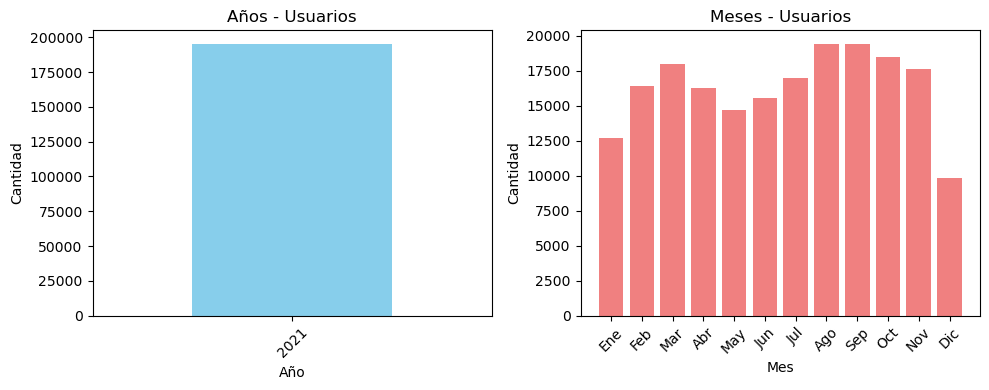

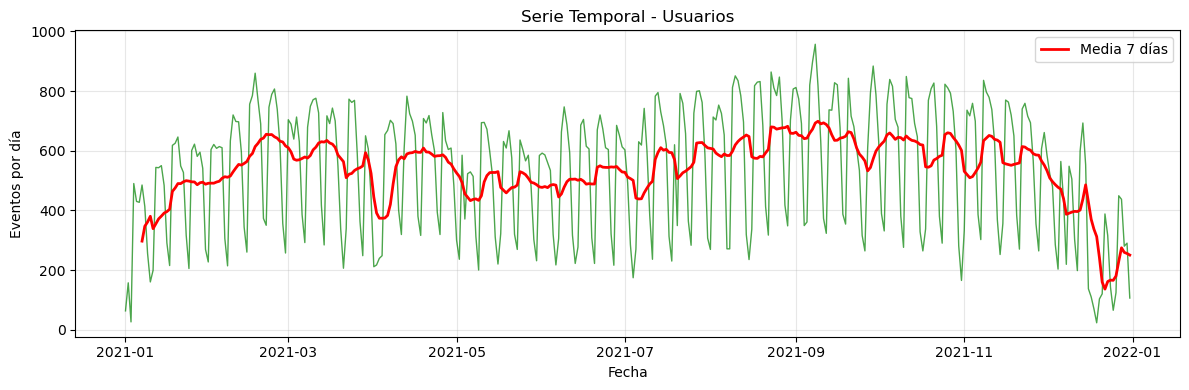


   📊 Columna: FEC_CLIENTE
      Mínima: 2021-01-02 00:00:00
      Máxima: 2024-07-31 00:00:00
      Nulos: 193181 (99.0%)


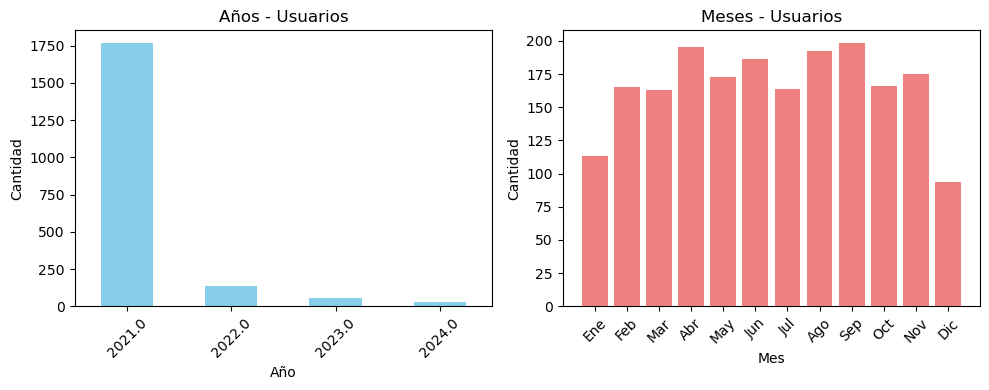

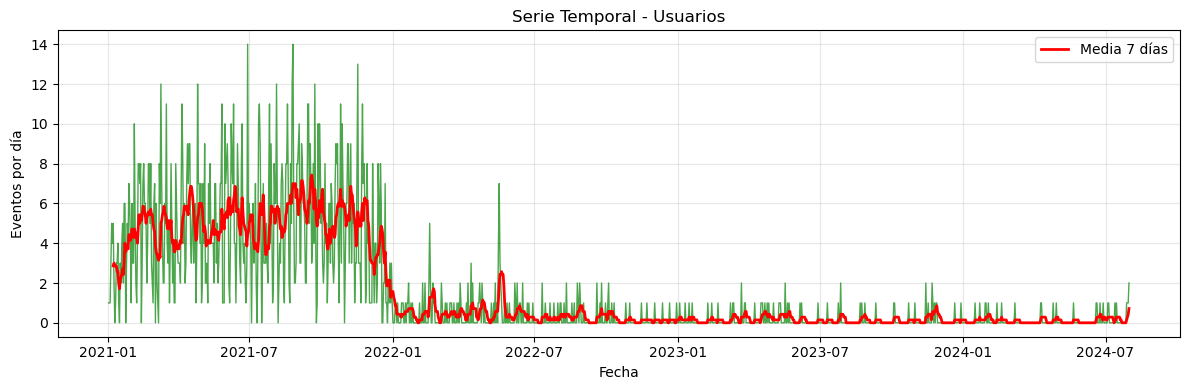


📁 Dataset: Sesiones
   Filas: 211476
   Columnas: ['IDUSUARIO', 'FECHA', 'CLICKS', 'SESIONES']
   ✅ Fechas encontradas: ['FECHA']

   📊 Columna: FECHA
      Mínima: 2021-01-01 00:00:00
      Máxima: 2024-07-31 00:00:00
      Nulos: 0 (0.0%)


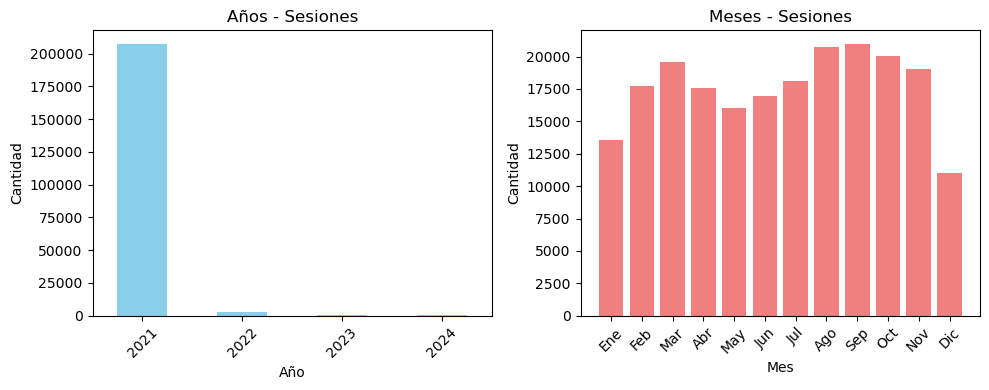

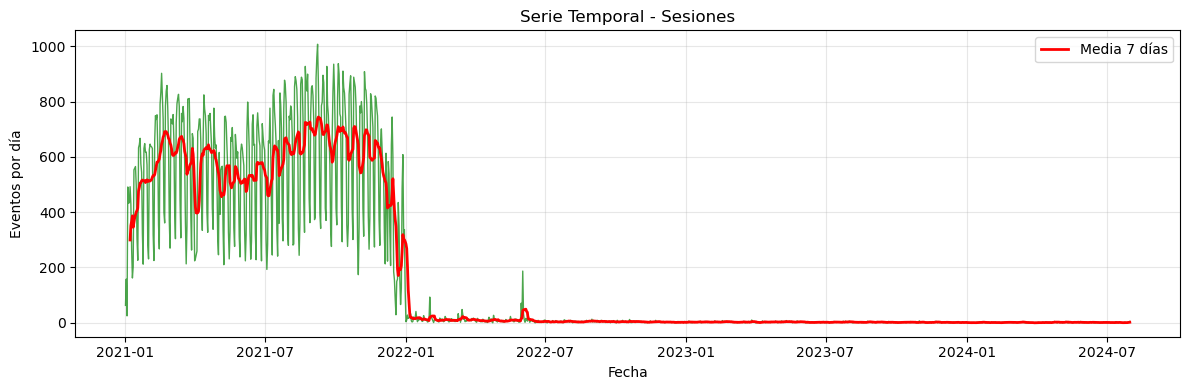


📁 Dataset: Fichas
   Filas: 153127
   Columnas: ['IDCONSUMO', 'IDUSUARIO', 'FECHACONSUMO', 'EMPCONSUL_ID']
   ✅ Fechas encontradas: ['FECHACONSUMO']

   📊 Columna: FECHACONSUMO
      Mínima: 2021-01-01 00:00:00
      Máxima: 2024-07-31 00:00:00
      Nulos: 0 (0.0%)


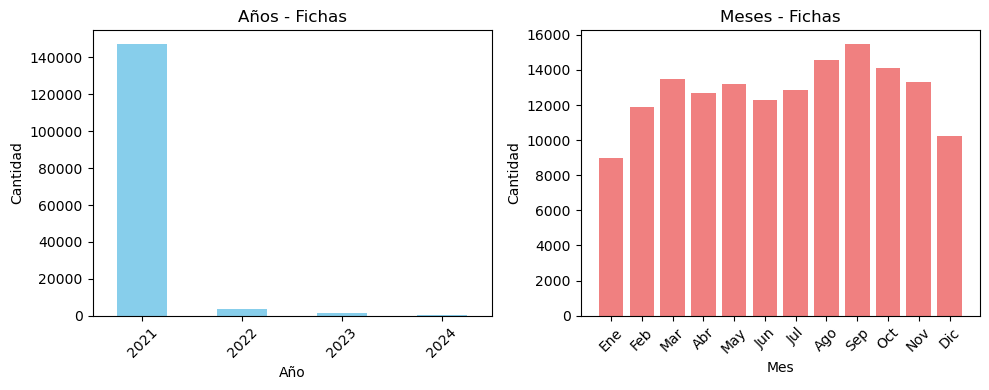

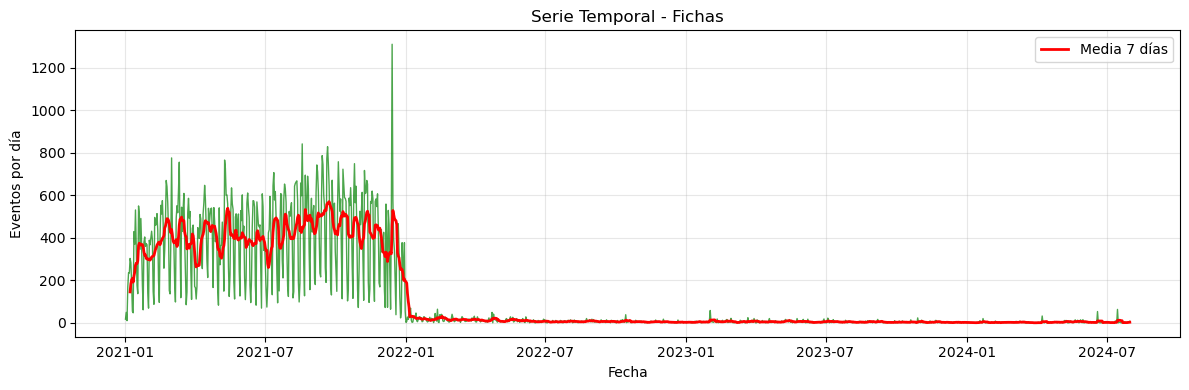

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración simple
plt.style.use('default')
sns.set_palette("husl")

def analisis_fechas_simple(dataset_limpio_names):
    """
    Análisis SUPER SIMPLE de fechas en los datasets
    """
    print("="*50)
    print("📅 ANÁLISIS SIMPLE DE FECHAS")
    print("="*50)
    
    for nombre, df in dataset_limpio_names:
        print(f"\n📁 Dataset: {nombre}")
        print(f"   Filas: {len(df)}")
        print(f"   Columnas: {list(df.columns)}")
        
        # 1. Buscar columnas que sean fechas
        fechas_encontradas = []
        for col in df.columns:
            # Si ya es datetime de pandas
            if pd.api.types.is_datetime64_any_dtype(df[col]):
                fechas_encontradas.append(col)
        
        if not fechas_encontradas:
            print("   ❌ No hay columnas de fecha")
            continue
        
        print(f"   ✅ Fechas encontradas: {fechas_encontradas}")
        
        # 2. Análisis básico para cada columna de fecha
        for fecha_col in fechas_encontradas:
            print(f"\n   📊 Columna: {fecha_col}")
            
            # Estadísticas básicas
            print(f"      Mínima: {df[fecha_col].min()}")
            print(f"      Máxima: {df[fecha_col].max()}")
            print(f"      Nulos: {df[fecha_col].isnull().sum()} ({df[fecha_col].isnull().mean()*100:.1f}%)")
            
            # Extraer año y mes para análisis
            df[f'{fecha_col}_year'] = df[fecha_col].dt.year
            df[f'{fecha_col}_month'] = df[fecha_col].dt.month
            
            # 3. GRÁFICOS SIMPLES
            
            # Gráfico 1: Distribución por año
            plt.figure(figsize=(10, 4))
            
            plt.subplot(1, 2, 1)
            df[f'{fecha_col}_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
            plt.title(f'Años - {nombre}')
            plt.xlabel('Año')
            plt.ylabel('Cantidad')
            plt.xticks(rotation=45)
            
            # Gráfico 2: Distribución por mes
            plt.subplot(1, 2, 2)
            meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
            
            # Contar por mes
            conteo_meses = df[f'{fecha_col}_month'].value_counts().sort_index()
            
            # Crear lista de todos los meses (1-12)
            todos_meses = list(range(1, 13))
            conteo_completo = [conteo_meses.get(m, 0) for m in todos_meses]
            
            plt.bar(meses, conteo_completo, color='lightcoral')
            plt.title(f'Meses - {nombre}')
            plt.xlabel('Mes')
            plt.ylabel('Cantidad')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()
            
            # Gráfico 3: Serie temporal simple (si hay suficientes datos)
            if len(df) > 100:
                plt.figure(figsize=(12, 4))
                
                # Agrupar por fecha (diario)
                serie_diaria = df.set_index(fecha_col).resample('D').size()
                
                # Plot simple
                plt.plot(serie_diaria.index, serie_diaria.values, 
                        color='green', linewidth=1, alpha=0.7)
                
                # Media móvil de 7 días (más suave)
                if len(serie_diaria) > 7:
                    media_movil = serie_diaria.rolling(window=7).mean()
                    plt.plot(media_movil.index, media_movil.values, 
                            color='red', linewidth=2, label='Media 7 días')
                    plt.legend()
                
                plt.title(f'Serie Temporal - {nombre}')
                plt.xlabel('Fecha')
                plt.ylabel('Eventos por día')
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            
            # 4. Información adicional si hay target
            if 'es_cliente' in df.columns and fecha_col in df.columns:
                print(f"\n      🎯 Relación con 'es_cliente':")
                
                # Tasa de conversión por año
                conversion_anual = df.groupby(f'{fecha_col}_year')['es_cliente'].mean()
                print(f"      Conversión por año:")
                for año, tasa in conversion_anual.items():
                    print(f"        {año}: {tasa:.1%}")


analisis_fechas_simple([("Usuarios",usuarios_limpio),("Sesiones", sesiones_limpio),("Fichas",fichas_limpio)])

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="color:#2c3e50; font-weight:bold;">📌 Conclusiones</h4>

A partir del análisis temporal de los distintos datasets, se pueden extraer las siguientes conclusiones:
<ul>
  <li>Todos los conjuntos de datos registran información desde el <strong>01/01/2021</strong>.</li>
  <li>Los datasets de <i>fichas</i> y <i>sesiones</i> finalizan en <strong>31/07/2024</strong>.</li>
  <li>El volumen total disponible equivale a aproximadamente <strong>3,5 años de datos de comportamiento</strong>.</li>
</ul>

<h4 style="margin-top:15px; color:#2c3e50; font-weight:bold;">Observaciones críticas</h4>
<ul>
  <li>La variable <strong>FEC_CLIENTE presenta un 99% de valores nulos</strong>, permaneciendo únicamente alrededor de 2.000 registros válidos.</li>
  <li>Todos los usuarios del dataset aparecen registrados por primera vez en el año <strong>2021</strong>.</li>
  <li>El dataset <i>primera_ficha</i> carece de información temporal asociada a los registros.</li>
</ul>

</div>


<h3>Validación de integridad referencial entre datasets</h3>

<p>✅ Se constata que no hay <em>ids</em> de usuario en los datasets secundarios que no estén presentes en el primario.</p>

In [58]:
tit("Comprobacion de Ids de usuario respecto al dataset principal")

# Extraer los IDs de usuario únicos del dataset principal
usuarios_maestros = usuarios_limpio['IDUSUARIO'].copy()
# Convertir a un conjunto (Set) para búsquedas más rápidas en el filtrado posterior
set_usuarios_maestros = set(usuarios_maestros)


dataset_limpio_names =[("Usuarios", usuarios_limpio), ("Fichas", fichas_limpio), ("Primera_ficha", primera_ficha_limpio), ("Sesiones", sesiones_limpio)]

for nombre, df in dataset_limpio_names:
    registros_iniciales = df.shape[0]
    
    df_filtrado = df[df['IDUSUARIO'].isin(set_usuarios_maestros)].copy()
    
    registros_finales = df_filtrado.shape[0]
    registros_repetidos = registros_iniciales - registros_finales
        
    print(f"\nDataFrame: {nombre}")
    print(f"Número de ids: {registros_iniciales}")
    print(f"Ids no presentes en dataset principal: {registros_repetidos}")


Comprobacion de Ids de usuario respecto al dataset principal

DataFrame: Usuarios
Número de ids: 195165
Ids no presentes en dataset principal: 0

DataFrame: Fichas
Número de ids: 153127
Ids no presentes en dataset principal: 0

DataFrame: Primera_ficha
Número de ids: 167198
Ids no presentes en dataset principal: 0

DataFrame: Sesiones
Número de ids: 211476
Ids no presentes en dataset principal: 0


<h3>Creacion de dataset único</h3>

<h4>Agrupacion por usuario y seleccion de columnas relevantes</h4>

<p>
<strong>Agregación de fichas:</strong> se agrupan los registros por <i>IDUSUARIO</i> y se calcula el número total de fichas consultadas por cada usuario. El resultado es un dataset resumido que contiene una fila por usuario y una métrica principal: <i>total_fichas_consultadas</i>.
</p>

<p>
<strong>Agregación de primera_ficha:</strong> dado que este dataset ya está estructurado a nivel de usuario, únicamente se seleccionan las columnas relevantes y se eliminan duplicados para asegurar una relación uno a uno. El resultado es un conjunto limpio y preparado para ser fusionado.
</p>

<p>
<strong>Agregación de sesiones:</strong> se agrupan las sesiones por <i>IDUSUARIO</i> y se calculan métricas de actividad, incluyendo el total de sesiones, el total de clicks y el número de días distintos en los que el usuario se conectó. Esto permite obtener indicadores de comportamiento esenciales para el modelado.
</p>


In [59]:
# ----------------------------------------------------
# 1. Agregación de FICHAS
# ----------------------------------------------------
tit("1. Agregación: Conteo de Fichas (fichas_agregado)")

# Agrupamos por IDUSUARIO y contamos el número de registros (fichas consultadas).
fichas_agregado = fichas_limpio.groupby("IDUSUARIO").agg(
    # Contamos cualquier columna (ej. 'IDUSUARIO') para obtener el total de fichas consultadas
    total_fichas_consultadas=('IDUSUARIO', 'count') 
).reset_index()

exito("Dataset fichas_agregado creado con el conteo de fichas por usuario.")
quick_info(fichas_agregado, "fichas_agregado")


# ----------------------------------------------------
# 2. Agregación de PRIMERA FICHA
# ----------------------------------------------------
tit("2. Agregación: Selección de Columnas (primera_ficha_agregado)")

# Este dataset ya está a nivel de usuario (una fila por ID), solo seleccionamos las columnas.
# Usamos drop_duplicates() para asegurar 1:1, está implícito en la estructura inicial.
primera_ficha_agregado = primera_ficha_limpio[['IDUSUARIO', 'USUARIOSQUECONSULTAN']].copy()
primera_ficha_agregado = primera_ficha_agregado.drop_duplicates(subset='IDUSUARIO', keep='first')

exito("Dataset primera_ficha_agregado creado y listo para el merge.")
quick_info(primera_ficha_agregado, "primera_ficha_agregado")


# ----------------------------------------------------
# 3. Agregación de SESIONES
# ----------------------------------------------------
tit("3. Agregación: Clicks, Sesiones y Conexión de 2 Días (sesiones_agregado)")

sesiones_agregado = sesiones_limpio.groupby("IDUSUARIO").agg(
    total_sesiones=('SESIONES', 'sum'),
    total_clicks=('CLICKS', 'sum'),
    # Conexión 2 Días Distintos (Booleano)
    sesiones_en_dias_distintos=('IDUSUARIO', 'count')
).reset_index()

# Renombrar la columna booleana para claridad
sesiones_agregado.rename(
    columns={'sesiones_en_dias_distintos': 'NUM_DIAS_SESIONES'},
    inplace=True
)

exito("Dataset sesiones_agregado creado con métricas de clicks, sesiones e indicador booleano.")
quick_info(sesiones_agregado, "sesiones_agregado")


1. Agregación: Conteo de Fichas (fichas_agregado)
✅ Dataset fichas_agregado creado con el conteo de fichas por usuario.

ANÁLISIS RÁPIDO: fichas_agregado
📊 Shape: 48901 × 2
📝 Memoria: 0.8 MB
✅ Sin valores nulos
🎯 Tipos de datos: {Int64Dtype(): np.int64(2)}
----------------------------------------------------------------------------------------------------


2. Agregación: Selección de Columnas (primera_ficha_agregado)
✅ Dataset primera_ficha_agregado creado y listo para el merge.

ANÁLISIS RÁPIDO: primera_ficha_agregado
📊 Shape: 167198 × 2
📝 Memoria: 4.0 MB
✅ Sin valores nulos
🎯 Tipos de datos: {dtype('int64'): np.int64(1), Int64Dtype(): np.int64(1)}
----------------------------------------------------------------------------------------------------


3. Agregación: Clicks, Sesiones y Conexión de 2 Días (sesiones_agregado)
✅ Dataset sesiones_agregado creado con métricas de clicks, sesiones e indicador booleano.

ANÁLISIS RÁPIDO: sesiones_agregado
📊 Shape: 195002 × 4
📝 Memoria: 6.0 MB


<h4>Seleccion de columnas relevantes</h4>

<p><strong>Selección y derivación de features:</strong> se seleccionan columnas relevantes de <em>usuarios_limpio</em> y se generan variables temporales a partir de <em>FEC_REGISTRO</em> (mes, día de la semana, día del mes y fin de semana), eliminando finalmente la columna original de fecha.</p>

In [60]:
tit("Selección de Features en usuarios_limpio")

usuarios_modelado = usuarios_limpio[[
    'IDUSUARIO', 
    'CANAL', 
    'IND_CLIENTE', 
    'BONDAD_EMAIL', 
    'TIPOUSUARIO',
    'FEC_REGISTRO' # Necesaria para derivar las fechas
]].copy()

# Variables derivadas de FEC_REGISTRO
usuarios_modelado["MES_REGISTRO"] = usuarios_modelado["FEC_REGISTRO"].dt.month.astype('Int64')
usuarios_modelado["DIA_SEMANA_REGISTRO"] = usuarios_modelado["FEC_REGISTRO"].dt.dayofweek.astype('Int64') # 0=Lunes, 6=Domingo
usuarios_modelado["DIA_MES_REGISTRO"] = usuarios_modelado["FEC_REGISTRO"].dt.day.astype('Int64')
usuarios_modelado["ES_FINDE_REGISTRO"] = usuarios_modelado["DIA_SEMANA_REGISTRO"].isin([5, 6]).astype(int)

exito("Variables temporales MES, DIA_MES, DIA_SEMANA y ES_FINDE añadidas.")

# Eliminar la columna de fecha de registro original
usuarios_modelado.drop(columns=["FEC_REGISTRO"], inplace=True)
exito("Columna FEC_REGISTRO eliminada.")

quick_info(usuarios_modelado, "usuarios_modelado")


Selección de Features en usuarios_limpio
✅ Variables temporales MES, DIA_MES, DIA_SEMANA y ES_FINDE añadidas.
✅ Columna FEC_REGISTRO eliminada.

ANÁLISIS RÁPIDO: usuarios_modelado
📊 Shape: 195165 × 9
📝 Memoria: 34.3 MB
✅ Sin valores nulos
🎯 Tipos de datos: {dtype('int64'): np.int64(4), Int64Dtype(): np.int64(3), dtype('O'): np.int64(2)}
----------------------------------------------------------------------------------------------------



<h4>Añadir features derivadas a fichas (frecuencia, recencia y antigüedad)</h4>

<p><strong>Re-agregación de fichas:</strong> se calculan métricas de <em>frecuencia</em>, <em>recencia</em> y <em>antigüedad</em> para cada usuario a partir de <em>FECHACONSUMO</em>, utilizando como referencia la última fecha registrada en el dataset.</p>

In [61]:
# Re-agregación de Fichas para incluir features de tiempo
tit("2. Re-Agregación de Fichas: Frecuencia, Recencia y Antigüedad")

# Determinar la fecha de corte (última fecha de consumo en el dataset)
FECHA_CORTE_FICHAS = fichas_limpio["FECHACONSUMO"].max()
exito(f"Fecha de Corte (Máx. FECHACONSUMO): {FECHA_CORTE_FICHAS.date()}")

# Agrupación con métricas de Frecuencia, Recencia y Antigüedad
fichas_agregado = fichas_limpio.groupby("IDUSUARIO").agg(
    # Frecuencia (total de fichas consultadas)
    total_fichas_consultadas=('IDUSUARIO', 'count'),
    # Recencia (Días desde la última consulta de ficha)
    recencia_fichas=('FECHACONSUMO', lambda x: (FECHA_CORTE_FICHAS - x.max()).days),
    # Antigüedad (Días entre la primera y la última consulta)
    antiguedad_comportamiento_fichas=('FECHACONSUMO', lambda x: (x.max() - x.min()).days)
).reset_index()

# Importante: total_fichas_consultadas, recencia_fichas y antiguedad_comportamiento_fichas
# serán NaN para los usuarios sin actividad después del merge. Esto se corregirá después.

exito("Features de Fichas (Frecuencia, Recencia, Antigüedad) creados.")
quick_info(fichas_agregado, "fichas_agregado")


2. Re-Agregación de Fichas: Frecuencia, Recencia y Antigüedad
✅ Fecha de Corte (Máx. FECHACONSUMO): 2024-07-31
✅ Features de Fichas (Frecuencia, Recencia, Antigüedad) creados.

ANÁLISIS RÁPIDO: fichas_agregado
📊 Shape: 48901 × 4
📝 Memoria: 1.6 MB
✅ Sin valores nulos
🎯 Tipos de datos: {Int64Dtype(): np.int64(2), dtype('int64'): np.int64(2)}
----------------------------------------------------------------------------------------------------



<h4>Añadir features derivadas a sesiones (clicks por sesion y sesiones por dia)</h4>

<p><strong>Derivación de features en sesiones:</strong> se crean métricas de <em>densidad de clicks por sesión</em> y <em>sesiones por día de conexión</em>, y se seleccionan las columnas finales relevantes para el análisis.</p>


In [62]:
tit("Derivación de Features en sesiones_agregado")

sesiones_modelado = sesiones_agregado.copy()

# Crear métrica de densidad (Clicks por Sesión)
sesiones_modelado["CLICKS_POR_SESION"] = (
    sesiones_modelado["total_clicks"] / sesiones_modelado["total_sesiones"]
).replace([np.inf, -np.inf], 0).fillna(0) # Reemplazar NaN/Inf con 0 (si total_sesiones es 0)

# Crear métrica de "Sesiones por día de conexión"
sesiones_modelado["SESIONES_POR_DIA_CONEXION"] = (
    sesiones_modelado["total_sesiones"] / sesiones_modelado["NUM_DIAS_SESIONES"]
).replace([np.inf, -np.inf], 0).fillna(0)


# Seleccionar las columnas finales
sesiones_modelado = sesiones_modelado[[
    'IDUSUARIO', 
    'total_sesiones', 
    'total_clicks', 
    'NUM_DIAS_SESIONES', 
    'CLICKS_POR_SESION',
    'SESIONES_POR_DIA_CONEXION'
]].copy()

exito("Features de Sesiones (densidad) derivados y seleccionados.")
quick_info(sesiones_modelado, "sesiones_modelado")


Derivación de Features en sesiones_agregado
✅ Features de Sesiones (densidad) derivados y seleccionados.

ANÁLISIS RÁPIDO: sesiones_modelado
📊 Shape: 195002 × 6
📝 Memoria: 8.9 MB
✅ Sin valores nulos
🎯 Tipos de datos: {dtype('int64'): np.int64(4), dtype('float64'): np.int64(2)}
----------------------------------------------------------------------------------------------------



In [63]:
tit("Procesamiento de primera_ficha_agregado")
#No hay que hacer nada... solo se cambia nombre por coherencia
primera_ficha_modelado = primera_ficha_agregado.copy()
exito("primera_ficha_agregado listo para el merge sin cambios adicionales.")
quick_info(primera_ficha_modelado, "primera_ficha_modelado")


Procesamiento de primera_ficha_agregado
✅ primera_ficha_agregado listo para el merge sin cambios adicionales.

ANÁLISIS RÁPIDO: primera_ficha_modelado
📊 Shape: 167198 × 2
📝 Memoria: 4.0 MB
✅ Sin valores nulos
🎯 Tipos de datos: {dtype('int64'): np.int64(1), Int64Dtype(): np.int64(1)}
----------------------------------------------------------------------------------------------------



<h4>Fusion de datasets</h4>

<p><strong>Unificación de DataFrames:</strong> se realiza la fusión de los datasets de <em>usuarios</em>, <em>fichas</em>, <em>sesiones</em> y <em>primera ficha</em> en un único <em>df_final</em> mediante <em>left joins</em>, conservando todos los usuarios del dataset principal.</p>

In [64]:
# ----------------------------------------------------
# Fusión (Merge) de los DataFrames
# ----------------------------------------------------
tit("Merge: Unificación de DataFrames en df_final")

# 1. Empezamos con el dataset maestro de usuarios
df_final = usuarios_modelado.copy()
exito(f"Base de usuarios: {df_final.shape[0]} registros.")

# 2. Merge con FICHAS agregadas (LEFT JOIN)
df_final = df_final.merge(fichas_agregado, on='IDUSUARIO', how='left')
exito("Merge con fichas_agregado completado.")

# 3. Merge con SESIONES agregadas (LEFT JOIN)
df_final = df_final.merge(sesiones_modelado, on='IDUSUARIO', how='left')
exito("Merge con sesiones_modelado completado.")

# 4. Merge con PRIMERA_FICHA agregada (LEFT JOIN)
df_final = df_final.merge(primera_ficha_modelado, on='IDUSUARIO', how='left')
exito("Merge con primera_ficha_modelado completado.")

quick_info(df_final, "df_final (Post-Merge, Pre-Imputación)")


Merge: Unificación de DataFrames en df_final
✅ Base de usuarios: 195165 registros.
✅ Merge con fichas_agregado completado.
✅ Merge con sesiones_modelado completado.
✅ Merge con primera_ficha_modelado completado.

ANÁLISIS RÁPIDO: df_final (Post-Merge, Pre-Imputación)
📊 Shape: 195165 × 18
📝 Memoria: 48.1 MB
⚠️  Columnas con nulos: 9
   - total_fichas_consultadas: 146264 (74.9%)
   - recencia_fichas: 146264 (74.9%)
   - antiguedad_comportamiento_fichas: 146264 (74.9%)
   - total_sesiones: 163 (0.1%)
   - total_clicks: 163 (0.1%)
   - NUM_DIAS_SESIONES: 163 (0.1%)
   - CLICKS_POR_SESION: 163 (0.1%)
   - SESIONES_POR_DIA_CONEXION: 163 (0.1%)
   - USUARIOSQUECONSULTAN: 27967 (14.3%)
🎯 Tipos de datos: {dtype('float64'): np.int64(7), Int64Dtype(): np.int64(5), dtype('int64'): np.int64(4), dtype('O'): np.int64(2)}
----------------------------------------------------------------------------------------------------



<h3>Imputacion de nulos</h3>

<ul>
    <li><strong>Frecuencia y métricas de sesiones:</strong> imputar con <code>0</code>.</li>
    <li><strong>Recencia:</strong> imputar con valor extremo (máxima recencia + 999).</li>
    <li><strong>Antigüedad:</strong> imputar con <code>-1</code> como centinela.</li>
</ul>


<p><strong>Imputación estratégica de valores nulos:</strong> se realiza un tratamiento diferenciado de los <em>nulos</em> en el dataset final (<em>df_final</em>) según el tipo de métrica y la ausencia de actividad del usuario:</p>
<ul>
    <li><strong>Frecuencia y métricas de sesiones:</strong> los valores ausentes se imputan con <code>0</code>, indicando ausencia total de actividad.</li>
    <li><strong>Recencia de fichas:</strong> los usuarios sin actividad reciben un valor extremo calculado como la <em>recencia máxima + 999 días</em>, para reflejar su inactividad.</li>
    <li><strong>Antigüedad del comportamiento de fichas:</strong> se utiliza el valor centinela <code>-1</code> para los casos sin registros, diferenciando claramente la ausencia de datos. En este caso el 0 es quien solo tiene 1 ficha</li>
</ul>


In [65]:
# ----------------------------------------------------
# Imputación Estratégica de Valores Nulos
# ----------------------------------------------------
tit("Imputación Estratégica (Tratamiento de Nulos por Ausencia de Actividad)")

# Obtenemos la Recencia Máxima para la imputación de usuarios sin actividad de fichas

DIAS_MAX_RECENCIA = (FECHA_CORTE_FICHAS - fichas_limpio["FECHACONSUMO"].min()).days + 999 
exito(f"Valor de Recencia máxima para imputación (Ausencia): {DIAS_MAX_RECENCIA} días.")

# Imputación de Features de FICHAS
# Frecuencia: La ausencia de actividad es 0.
df_final['total_fichas_consultadas'] = df_final['total_fichas_consultadas'].fillna(0)
# Recencia: La ausencia de actividad se imputa al valor máximo de Recencia + 999 días.
df_final['recencia_fichas'] = df_final['recencia_fichas'].fillna(DIAS_MAX_RECENCIA)
# Antigüedad Comportamiento: La ausencia de actividad es el valor centinela -1.
df_final['antiguedad_comportamiento_fichas'] = df_final['antiguedad_comportamiento_fichas'].fillna(-1)
exito("Nulos de FICHAS tratados con éxito")

# Imputación de Features de SESIONES y PRIMERA_FICHA
# Todos los Nulos restantes (sesiones, clicks, usuarios_que_consultan, etc.)
# provienen de la ausencia total de la actividad correspondiente. Se imputan con 0.
columnas_a_cero = [
    'total_sesiones', 
    'total_clicks', 
    'NUM_DIAS_SESIONES', 
    'CLICKS_POR_SESION',
    'SESIONES_POR_DIA_CONEXION',
    'USUARIOSQUECONSULTAN'
]
df_final[columnas_a_cero] = df_final[columnas_a_cero].fillna(0)
exito("Nulos de SESIONES y PRIMERA_FICHA imputados con 0 (cero actividad).")




Imputación Estratégica (Tratamiento de Nulos por Ausencia de Actividad)
✅ Valor de Recencia máxima para imputación (Ausencia): 2306 días.
✅ Nulos de FICHAS tratados con éxito
✅ Nulos de SESIONES y PRIMERA_FICHA imputados con 0 (cero actividad).


<h4>Indicador adicional</h4>

In [66]:
# ----------------------------------------------------
# Creacion de columna de fichas
# ----------------------------------------------------

df_final['tiene_fichas'] = (df_final['antiguedad_comportamiento_fichas'] != -1).astype(int)
exito("Creada columna tiene_fichas")

✅ Creada columna tiene_fichas


<h3>Estandardizacion de nombres y tipos de datos</h3>

<p><strong>Estandarización y ajuste de tipos de datos:</strong> se renombraron las columnas de <em>df_final</em> a minúsculas y <em>snake_case</em>, aplicando cambios semánticos donde fue necesario, y se ajustaron los tipos de datos: enteros para métricas contables e indicadoras, y flotantes para variables de densidad, asegurando coherencia y consistencia del dataset para análisis posteriores.</p>

In [67]:
tit("Estandarización de Nombres y Ajuste de Tipos de Datos")

# --- Paso 1: Renombrar y estandarizar variables ---
# Se utiliza un mapeo para convertir los nombres de columnas a minúsculas y snake_case (barra baja).
mapeo_columnas = {
    # Cambios Semánticos y de Formato
    'IND_CLIENTE': 'es_cliente',
    'total_fichas_consultadas': 'total_fichas_consultadas',
    'recencia_fichas': 'recencia_fichas',
    'antiguedad_comportamiento_fichas': 'antiguedad_comportamiento_fichas',
    'total_sesiones': 'total_sesiones',
    'total_clicks': 'total_clicks',
    'NUM_DIAS_SESIONES': 'num_dias_sesiones',
    'CLICKS_POR_SESION': 'clicks_por_sesion',
    'SESIONES_POR_DIA_CONEXION': 'sesiones_por_dia', # Cambio semántico
    'USUARIOSQUECONSULTAN': 'usuarios_que_consultan_misma_primera_ficha', # Cambio semántico
    
    # Estandarización a snake_case para las variables originales
    'CANAL': 'canal',
    'BONDAD_EMAIL': 'bondad_email',
    'TIPOUSUARIO': 'tipo_usuario',
    'MES_REGISTRO': 'mes_registro',
    'DIA_SEMANA_REGISTRO': 'dia_semana_registro',
    'DIA_MES_REGISTRO': 'dia_mes_registro',
    'ES_FINDE_REGISTRO': 'es_finde_registro',
}

# Aplicar el renombramiento. Primero, asegurarse de que las claves del mapeo 
# existen en las columnas actuales para evitar errores si los nombres base ya cambiaron.
columnas_actuales = df_final.columns.tolist()
mapeo_filtrado = {k: v for k, v in mapeo_columnas.items() if k in columnas_actuales}

df_final.rename(columns=mapeo_filtrado, inplace=True)

exito("Nombres de columnas estandarizados a minúsculas y snake_case.")


# Corregir los tipos de las variables numéricas (que pueden ser float debido a NaN/imputación)

# Variables que deben ser INTEGER (enteros)
columnas_enteras = [
    'recencia_fichas', 
    'antiguedad_comportamiento_fichas', 
    'total_sesiones', 
    'total_clicks', 
    'num_dias_sesiones',
    'total_fichas_consultadas'
]

# Las variables booleanas/indicadoras (0/1) también se pueden tratar como enteros
columnas_indicadoras = ['es_cliente', 'es_finde_registro']

# Columnas de registro (ya son Int64 en el código anterior, pero se refuerza)
columnas_registro = ['mes_registro', 'dia_semana_registro', 'dia_mes_registro']

# Unir todas las columnas que deben ser enteras
todas_enteras = columnas_enteras + columnas_indicadoras + columnas_registro

for col in todas_enteras:
    if col in df_final.columns:
        # Los valores -1 (centinela) requieren que se use 'Int64' (integer con soporte para NaN)
        # o convertir a int y asegurar que no hay NaN (lo cual ya hicimos).
        # Como hemos usado -1 para imputar y 0 para el resto, podemos usar el tipo 'int'.
        # Se usa .astype(int) para asegurar que se elimina el punto flotante.
        df_final[col] = df_final[col].astype(int)

# Las variables de densidad deben ser FLOAT (ya que son resultados de divisiones)
columnas_float = ['clicks_por_sesion', 'sesiones_por_dia']
for col in columnas_float:
    if col in df_final.columns:
        df_final[col] = df_final[col].astype(float)
        
exito("Tipos de datos ajustados a enteros y flotantes según la naturaleza de la variable.")

# --- Paso 4: Revisión final del dataset con nuevos nombres y tipos ---
quick_info(df_final, "DF_FINAL (ESTANDARIZADO Y TIPADO)")

# Para finalizar, se imprime el resultado con los nuevos nombres
print("\n📝 Nombres de columnas finales:")
print(df_final.columns.tolist())

# Se puede agregar un .head() para verificar los valores, si la función quick_info no lo hace
# print("\nPrimeras 5 filas:")
# print(df_final.head())


Estandarización de Nombres y Ajuste de Tipos de Datos
✅ Nombres de columnas estandarizados a minúsculas y snake_case.
✅ Tipos de datos ajustados a enteros y flotantes según la naturaleza de la variable.

ANÁLISIS RÁPIDO: DF_FINAL (ESTANDARIZADO Y TIPADO)
📊 Shape: 195165 × 19
📝 Memoria: 48.8 MB
✅ Sin valores nulos
🎯 Tipos de datos: {dtype('int64'): np.int64(14), dtype('O'): np.int64(2), dtype('float64'): np.int64(2), Int64Dtype(): np.int64(1)}
----------------------------------------------------------------------------------------------------


📝 Nombres de columnas finales:
['IDUSUARIO', 'canal', 'es_cliente', 'bondad_email', 'tipo_usuario', 'mes_registro', 'dia_semana_registro', 'dia_mes_registro', 'es_finde_registro', 'total_fichas_consultadas', 'recencia_fichas', 'antiguedad_comportamiento_fichas', 'total_sesiones', 'total_clicks', 'num_dias_sesiones', 'clicks_por_sesion', 'sesiones_por_dia', 'usuarios_que_consultan_misma_primera_ficha', 'tiene_fichas']


<h4>Eliminacion de IdUsuario</h4>

<p><strong>Limpieza final del dataset:</strong> se elimina la columna <em>IDUSUARIO</em> del conjunto de datos destinado al modelado, preservando una copia separada con los identificadores de usuario (<em>df_final_Usuario</em>) para su posible uso posterior a nivel de negocio y acciones dirigidas sobre usuarios individuales.</p>


In [68]:
# ----------------------------------------------------
# Eliminacion IDUSUARIO
# ----------------------------------------------------
tit("7. Limpieza Final: Eliminación de IDUSUARIO")
df_final_Usuario=df_final.copy()
# Eliminación de IDUSUARIO
df_final.drop(columns=['IDUSUARIO'], inplace=True)
exito("IDUSUARIO eliminado del dataset final de modelado.")

# Revisión final del dataset
info(df_final, "DF_FINAL")


7. Limpieza Final: Eliminación de IDUSUARIO
✅ IDUSUARIO eliminado del dataset final de modelado.

📊 Análisis de estructura y calidad: DF_FINAL
Dimensiones: 195165 filas, 18 columnas.
Duplicados: 107342
----------------------------------------------------------------------------------------------------

Tipos de datos y valores no-nulos:


----------------------------------------------------------------------------------------------------

Estadísticas Descriptivas (Numéricas y Categóricas):


count unique          top  \
canal                                         195165      3  Directorios   
es_cliente                                 195165.00    NaN          NaN   
bondad_email                               195165.00    NaN          NaN   
tipo_usuario                                  195165      2           PF   
mes_registro                               195165.00    NaN          NaN   
dia_semana_registro                        195165.00    NaN          NaN   
dia_mes_registro                           195165.00    NaN          NaN   
es_finde_registro                          195165.00    NaN          NaN   
total_fichas_consultadas                   195165.00    NaN          NaN   
recencia_fichas                            195165.00    NaN          NaN   
antiguedad_comportamiento_fichas           195165.00    NaN          NaN   
total_sesiones                             195165.00    NaN          NaN   
total_clicks                               195165.00    NaN          NaN   
num_dias_sesiones                          195165.00    NaN          NaN   
clicks_por_sesion                          195165.00    NaN          NaN   
sesiones_por_dia                           195165.00    NaN          NaN   
usuarios_que_consultan_misma_primera_ficha 195165.00   <NA>         <NA>   
tiene_fichas                               195165.00    NaN          NaN   

                                              freq    mean    std    min  \
canal                                       157004     NaN    NaN    NaN   
es_cliente                                     NaN    0.01   0.10   0.00   
bondad_email                                   NaN   15.89   6.03 -10.00   
tipo_usuario                                164203     NaN    NaN    NaN   
mes_registro                                   NaN    6.54   3.30   1.00   
dia_semana_registro                            NaN    2.49   1.78   0.00   
dia_mes_registro                               NaN   15.76   8.65   1.00   
es_finde_registro                              NaN    0.15   0.36   0.00   
total_fichas_consultadas                       NaN    0.78   3.21   0.00   
recencia_fichas                                NaN 2002.49 530.65   0.00   
antiguedad_comportamiento_fichas               NaN    1.99  38.53  -1.00   
total_sesiones                                 NaN    2.47   2.87   0.00   
total_clicks                                   NaN    4.57   6.65   0.00   
num_dias_sesiones                              NaN    1.08   0.53   0.00   
clicks_por_sesion                              NaN    1.67   0.66   0.00   
sesiones_por_dia                               NaN    2.26   1.95   0.00   
usuarios_que_consultan_misma_primera_ficha    <NA>    7.93  24.32   0.00   
tiene_fichas                                   NaN    0.25   0.43   0.00   

                                               25%     50%     75%     max  
canal                                          NaN     NaN     NaN     NaN  
es_cliente                                    0.00    0.00    0.00    1.00  
bondad_email                                  9.00   20.00   20.00   20.00  
tipo_usuario                                   NaN     NaN     NaN     NaN  
mes_registro                                  4.00    7.00    9.00   12.00  
dia_semana_registro                           1.00    2.00    4.00    6.00  
dia_mes_registro                              8.00   16.00   23.00   31.00  
es_finde_registro                             0.00    0.00    0.00    1.00  
total_fichas_consultadas                      0.00    0.00    1.00  433.00  
recencia_fichas                            1304.00 2306.00 2306.00 2306.00  
antiguedad_comportamiento_fichas             -1.00   -1.00    0.00 1246.00  
total_sesiones                                2.00    2.00    2.00  398.00  
total_clicks                                  3.00    3.00    4.00  772.00  
num_dias_sesiones                             1.00    1.00    1.00  106.00  
cl

----------------------------------------------------------------------------------------------------

Primeras 3 filas (df.head(3)):


canal  es_cliente  bondad_email tipo_usuario  mes_registro  \
0  Directorios           0             9           PF             1   
1  Directorios           0            20           PF             1   
2  Directorios           0            20           PF             1   

   dia_semana_registro  dia_mes_registro  es_finde_registro  \
0                    0                 4                  0   
1                    0                 4                  0   
2                    0                 4                  0   

   total_fichas_consultadas  recencia_fichas  \
0                         0             2306   
1                         0             2306   
2                         0             2306   

   antiguedad_comportamiento_fichas  total_sesiones  total_clicks  \
0                                -1               1             1   
1                                -1               2             3   
2                                -1               2             3   

   num_dias_sesiones  clicks_por_sesion  sesiones_por_dia  \
0                  1               1.00              1.00   
1                  1               1.50              2.00   
2                  1               1.50              2.00   

   usuarios_que_consultan_misma_primera_ficha  tiene_fichas  
0                                           0             0  
1                                           2             0  
2                                           2             0

----------------------------------------------------------------------------------------------------



<h2>Analisis exploratorio univariante</h2>

<p><strong>Análisis univariante:</strong> se examinan las variables categóricas mediante frecuencias relativas y gráficos de barras, y las variables numéricas mediante histogramas y boxplots para identificar distribuciones y posibles valores atípicos.</p>

In [69]:
# Target
target_col = 'es_cliente'

# Numéricas
numerical_cols = [
    'total_fichas_consultadas', 'recencia_fichas', 'antiguedad_comportamiento_fichas',
    'total_sesiones', 'total_clicks', 'num_dias_sesiones', 'clicks_por_sesion',
    'sesiones_por_dia', 'usuarios_que_consultan_misma_primera_ficha'
]

# Categóricas
categorical_cols = [
    'canal', 'bondad_email', 'tipo_usuario', 'mes_registro', 'dia_semana_registro',
    'dia_mes_registro', 'es_finde_registro', 'tiene_fichas'
]

<h3>Categoricas</h3>


Frecuencia relativa:

canal
Directorios    0.804
SEO            0.127
SEM            0.068
Name: proportion, dtype: float64

bondad_email
 20    0.656
 9     0.314
 0     0.022
-10    0.007
 1     0.000
Name: proportion, dtype: float64

tipo_usuario
PF    0.841
PJ    0.159
Name: proportion, dtype: float64

mes_registro
8     0.099
9     0.099
10    0.094
3     0.092
11    0.090
Name: proportion, dtype: float64

dia_semana_registro
2    0.182
1    0.181
3    0.174
0    0.161
4    0.151
Name: proportion, dtype: float64

dia_mes_registro
9     0.037
8     0.036
23    0.036
12    0.036
15    0.036
Name: proportion, dtype: float64

es_finde_registro
0    0.848
1    0.152
Name: proportion, dtype: float64

tiene_fichas
0    0.749
1    0.251
Name: proportion, dtype: float64

 Graficas de distribución



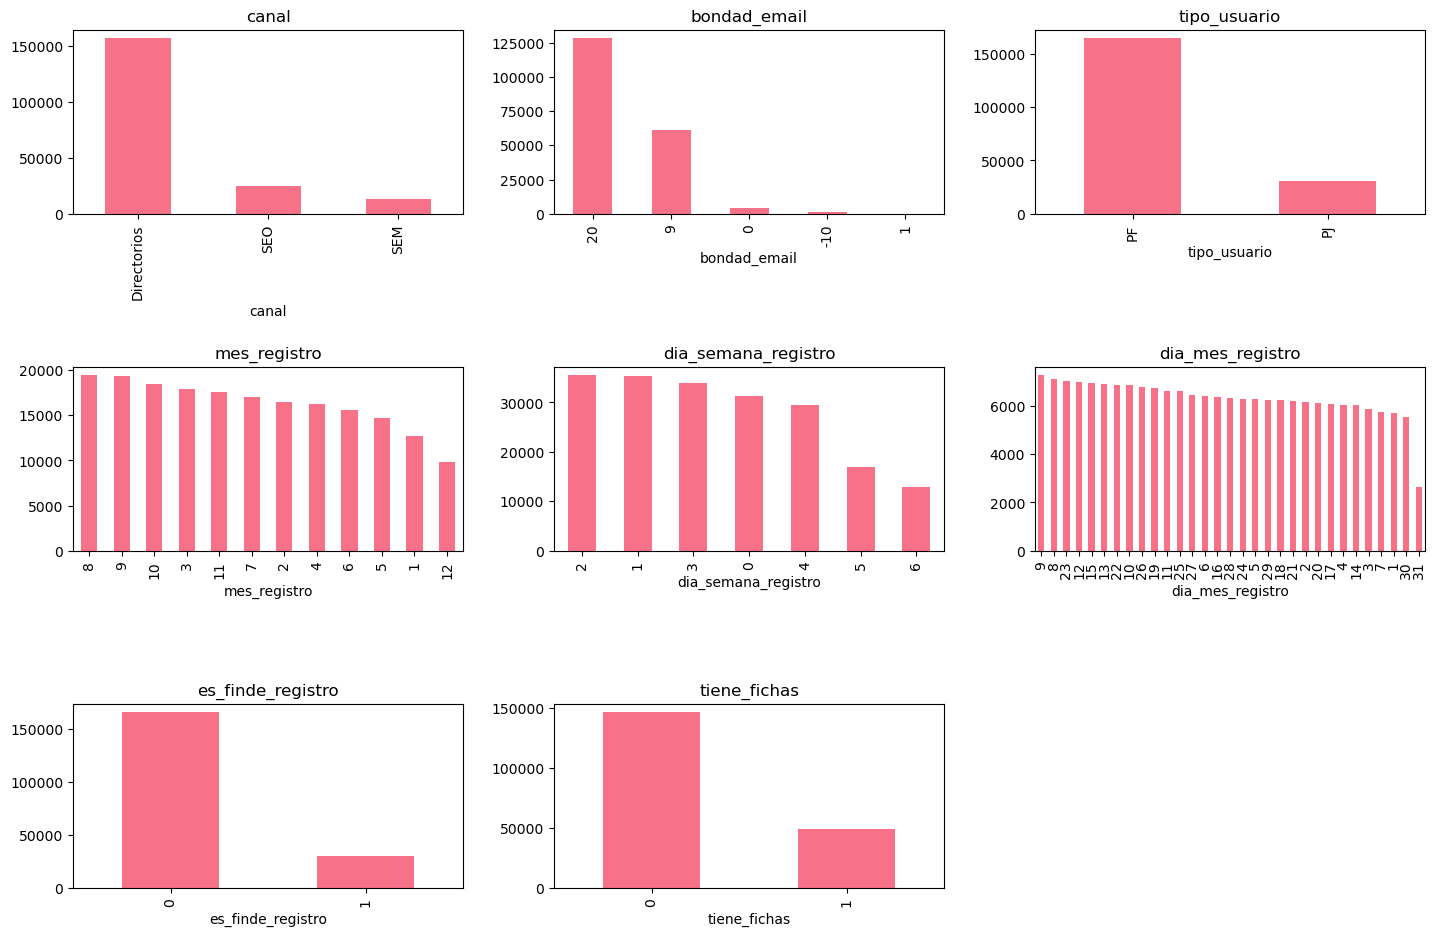

In [70]:
df=df_final
print("\nFrecuencia relativa:")
for col in categorical_cols:
    print(f"\n{df[col].value_counts(normalize=True).head().round(3)}")
print("\n Graficas de distribución\n")   
# 2.6. Gráficos de barras
num_cols = len(categorical_cols)
fig, axes = plt.subplots(
    nrows=((num_cols - 1)//3) + 1,
    ncols=min(num_cols, 3),
    figsize=(15, 10)
)

axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'{col}')

# Eliminar los ejes sobrantes
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)
plt.show()


<div style="
    background-color: #e8f5e9; /* Verde muy clarito */
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌Conclusiones del Análisis Descriptivo Univariante</h4>

<ol style="padding-left:20px;">
    <li><strong>canal: </strong>Dependencia masiva en <strong>Directorios (80.4%)</strong>, siendo SEO (12.7%) y SEM (6.8%) minoritarios.</li>
    <li><strong>bondad_email: </strong>Distribución fuertemente sesgada a valores altos (<strong>~97%</strong> en 20 y 9), indicando alta fiabilidad de los correos.</li>
    <li><strong>tipo_usuario: </strong>Predominio de <strong>Persona Física (PF) con 84.1%</strong> sobre Persona Jurídica (PJ).</li>
    <li><strong>mes_registro: </strong>Distribución equilibrada a lo largo del año (meses top cerca del 9-10%), sin picos estacionales.</li>
    <li><strong>dia_semana_registro / es_finde_registro: </strong>Mayor actividad en <strong>días laborables (84.8%)</strong>. La distribución por día del mes es uniforme.</li>
    <li><strong>tiene_fichas: </strong>El <strong>74.9%</strong> de los usuarios registrados <strong>no tiene fichas</strong> asociadas.</li>
</ol>

</div>

<h3>Numéricas</h3>

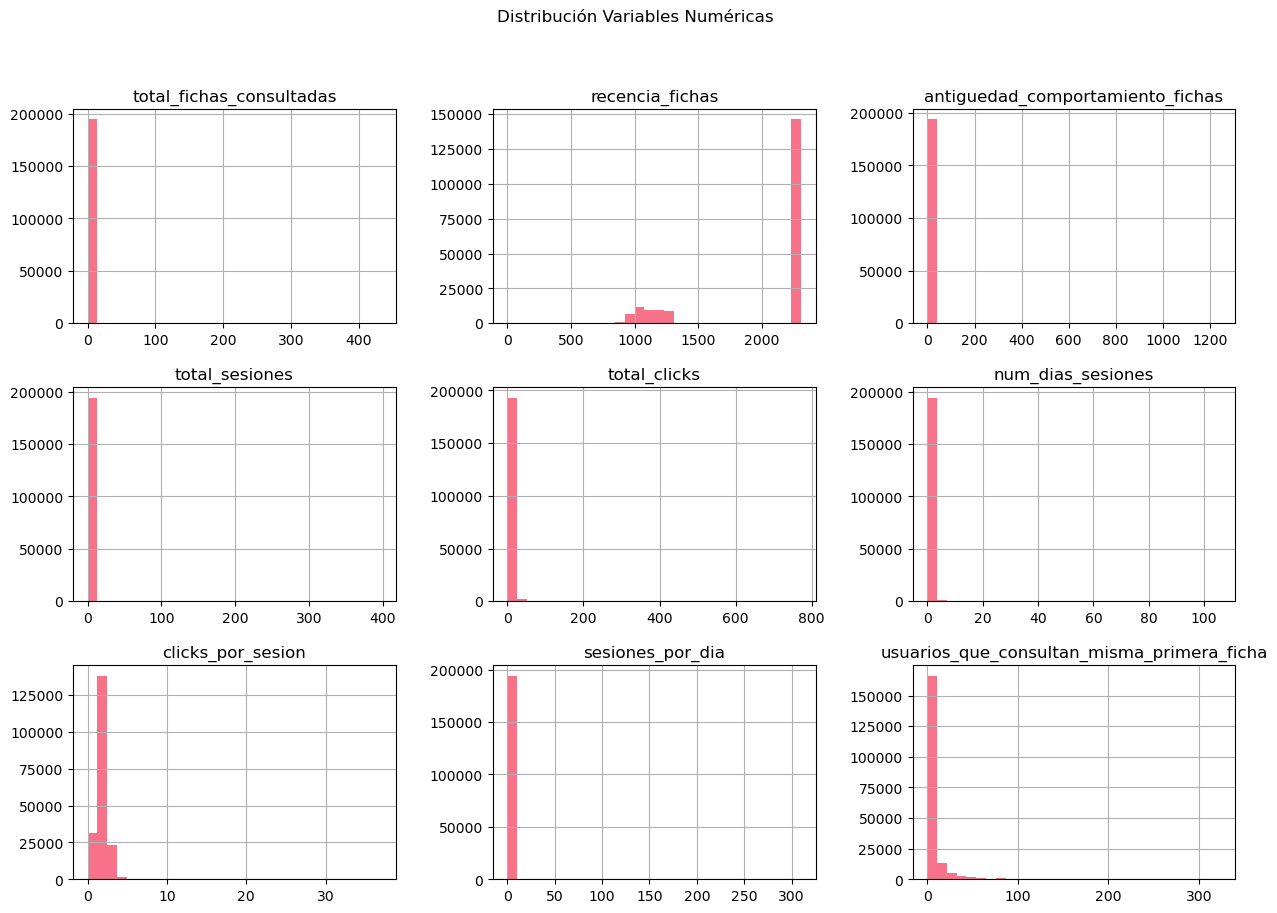

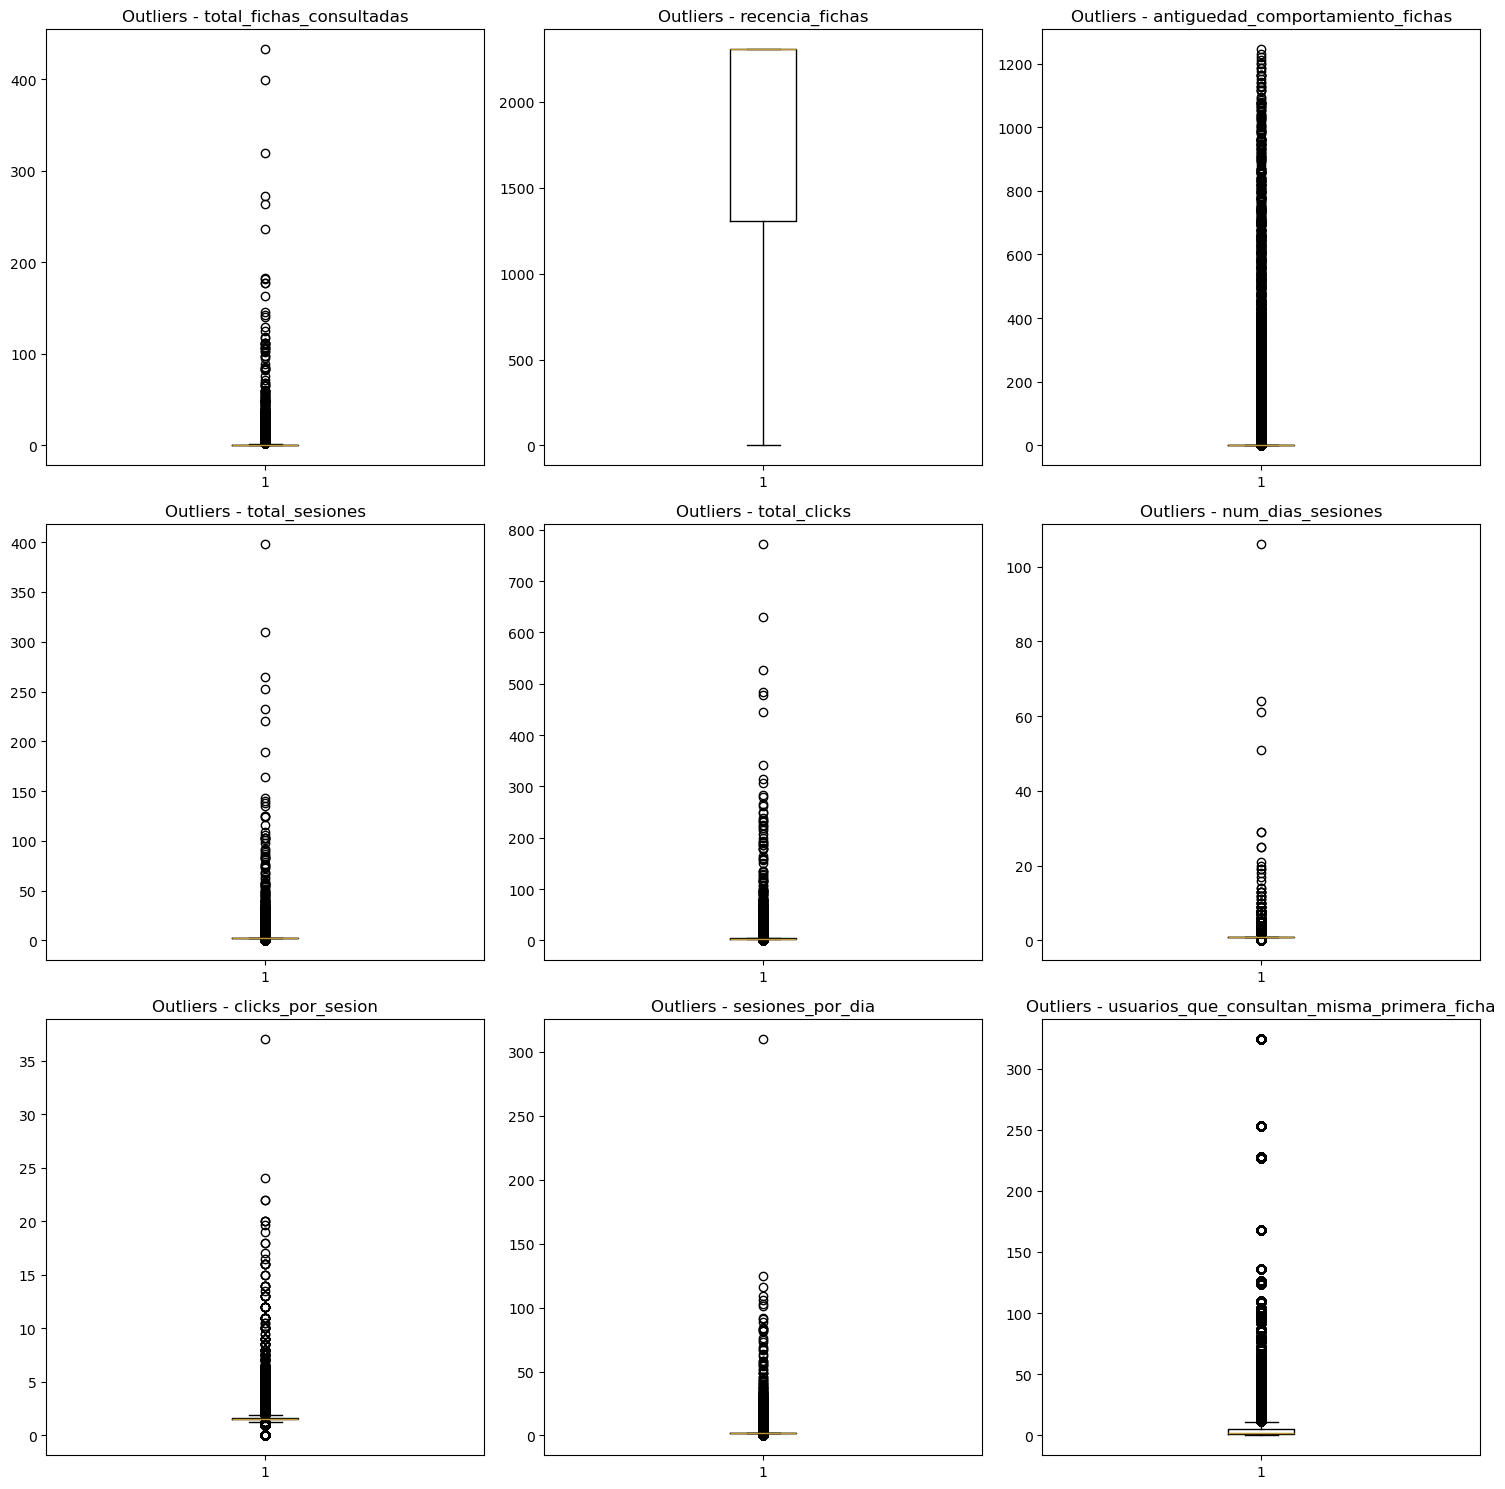

In [71]:
df = df_final

# 2.2. Distribuciones
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución Variables Numéricas')
plt.show()

# ✅ 2.3. Boxplots mejorados (uno por variable)
num_cols = len(numerical_cols)
fig, axes = plt.subplots(
    nrows=((num_cols - 1)//3) + 1,  # filas dinámicas
    ncols=min(num_cols, 3),         # máximo 3 columnas
    figsize=(15, 5 * ((num_cols - 1)//3 + 1))  # ajustar altura
)

axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'Outliers - {col}')

# Eliminar ejes sobrantes
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


<div style="
    background-color: #e8f5e9; /* Verde muy clarito */
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌Conclusiones: Forma de las Distribuciones</h4>

<ol style="padding-left:20px;">
    <li>Las variables de actividad (sesiones, clics, fichas) presentan <strong>alta asimetría positiva y curtosis extrema</strong>, con la presencia de miles de valores atípicos (<em>outliers</em>).</li>
    <li>La forma de estas distribuciones está <strong>fuertemente sesgada hacia valores bajos</strong>. Esto implica que la mayoría de los usuarios muestra actividad mínima, siendo muy pocos los que registran valores extremadamente altos.</li>
    <li>Las variables de naturaleza temporal (mes, día de la semana/mes) son <strong>bastante simétricas</strong> y no muestran la presencia de valores atípicos significativos.</li>
    <li>La variable <code>bondad_email</code> exhibe una <strong>ligera asimetría negativa</strong> (sesgada a la izquierda), identificándose solo una pequeña cantidad de valores atípicos.</li>
    <li>Las variables binarias o categóricas con dos niveles (como <code>es_finde_registro</code>) presentan un <strong>fuerte desbalance de clases</strong>.</li>
</ol>

</div>

<h2>Analisis expaloratorio multivariante</h2>

<p style="
    font-family: Arial, sans-serif;
    color: #2c3e50;
    line-height: 1.6;
    padding: 10px;
">
El análisis multivariante se centra en la relación con la variable objetivo <strong><tt>es_cliente</tt></strong>. Se utilizan dos métodos: para variables cualitativas, se calcula la <strong>tasa de conversión a cliente</strong> por categoría; para variables cuantitativas, se emplea el <em>boxplot</em> condicional para <strong>visualizar la disparidad</strong> en la distribución entre clientes y no clientes. El objetivo es identificar las características con el <strong>mayor potencial predictivo</strong>.
</p>

<h3>Categoricas</h3>

In [72]:
tit("Análisis de la Relaciónes  vs. Target (es_cliente)")
# ----------------------------------------------------
# Cálculo de la Tasa de Clientes por Categoría
# ----------------------------------------------------

def analizar_relacion(
    df: pd.DataFrame,
    columna_grupo: str,
    objetivo: str = 'es_cliente',
    ordenar_por_tasa: bool = False,
    en_porcentaje: bool = False,
    decimales: int = 4
) -> pd.DataFrame:
    """
    Agrupa por `columna_grupo` y calcula:
      - tasa_clientes: media de `objetivo` (proporción de 1s)
      - conteo_usuarios: cantidad de filas por grupo

    Parámetros:
        df: DataFrame de entrada.
        columna_grupo: columna por la que se agrupa.
        objetivo: columna binaria 0/1 del target (por defecto 'es_cliente').
        ordenar_por_tasa: si True, ordena por la tasa de clientes (desc).
        en_porcentaje: si True, convierte la tasa a porcentaje con sufijo '%'.
        decimales: número de decimales para redondeo de la tasa.

    Retorna:
        DataFrame con columnas: [columna_grupo, tasa_clientes, conteo_usuarios]
    """
    res = (
        df.groupby(columna_grupo)[objetivo]
          .agg(tasa_clientes='mean', conteo_usuarios='count')
          .reset_index()
    )

    if ordenar_por_tasa:
        res = res.sort_values(by='tasa_clientes', ascending=False, kind='mergesort')

    if en_porcentaje:
        res['tasa_clientes'] = (res['tasa_clientes'] * 100).round(decimales).astype(str) + '%'
    else:
        res['tasa_clientes'] = res['tasa_clientes'].round(decimales)

    return res


# ------------------------------
# Ejecución: replicar tu resultado
# ------------------------------
for columna in categorical_cols:
    analisis = analizar_relacion(
    df_final,
    columna_grupo=columna,
    objetivo='es_cliente',
    ordenar_por_tasa=False,
    en_porcentaje=True,
    decimales=4)

    print(analisis.to_markdown(index=False, numalign="left"))
    print("")


Análisis de la Relaciónes  vs. Target (es_cliente)
| canal       | tasa_clientes   | conteo_usuarios   |
|:------------|:----------------|:------------------|
| Directorios | 0.7261%         | 157004            |
| SEM         | 1.7664%         | 13304             |
| SEO         | 2.45%           | 24857             |

| bondad_email   | tasa_clientes   | conteo_usuarios   |
|:---------------|:----------------|:------------------|
| -10            | 0.0%            | 1408              |
| 0              | 0.4465%         | 4255              |
| 1              | 0.0%            | 40                |
| 9              | 0.106%          | 61344             |
| 20             | 1.483%          | 128118            |

| tipo_usuario   | tasa_clientes   | conteo_usuarios   |
|:---------------|:----------------|:------------------|
| PF             | 0.7412%         | 164203            |
| PJ             | 2.4772%         | 30962             |

| mes_registro   | tasa_clientes   | conteo_usua

<div style="
    background-color: #e8f5e9; /* Verde muy clarito */
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="weight:bold">📌 Conclusiones: Relación Variables Categóricas vs. Target</h4>

<ul style="padding-left:20px;">
    <li><strong>canal:</strong> Los canales <strong>SEO (2.45%)</strong> y <strong>SEM (1.77%)</strong> presentan una tasa de conversión significativamente superior a la del canal mayoritario, <strong>Directorios (0.73%)</strong>.</li>
    <li><strong>bondad_email:</strong> Existe una correlación positiva con la calidad. El nivel más alto (<strong>20</strong>) convierte al <strong>1.48%</strong>, mientras que los niveles inferiores (<strong>9, 0, -10, 1</strong>) tienen tasas de conversión cercanas o iguales a <strong>0%</strong>.</li>
    <li><strong>tipo_usuario:</strong> El tipo de usuario <strong>Persona Jurídica (PJ)</strong> convierte a una tasa de <strong>2.48%</strong>, siendo <strong>más de tres veces superior</strong> a la de Persona Física (<strong>PF, 0.74%</strong>).</li>
    <li><strong>mes_registro:</strong> Las tasas de conversión se mantienen <strong>relativamente estables</strong>, oscilando ligeramente alrededor del 1.0% a lo largo de los meses.</li>
    <li><strong>dia_semana_registro y es_finde_registro:</strong> La conversión es ligeramente <strong>superior en días laborables</strong> (alrededor del 1.05%) y disminuye los fines de semana (<strong>0.85%</strong>).</li>
    <li><strong>dia_mes_registro:</strong> La tasa muestra <strong>fluctuaciones dispersas</strong>, sin un patrón claro o tendencia estacional evidente dentro del mes.</li>
    <li><strong>tiene_fichas:</strong> Es el factor con la <strong>mayor disparidad predictiva</strong>. Los usuarios con fichas (<strong>1</strong>) convierten al <strong>2.97%</strong>, una tasa <strong>8 veces mayor</strong> que aquellos sin fichas (<strong>0.36%</strong>).</li>
</ul>

<p style="weight:bold; margin-top: 15px;">📊 <strong>Variables con Mayor Potencial Predictivo</strong></p>
<ol style="padding-left:20px;">
    <li><strong>tiene_fichas:</strong> Diferencia extrema en la tasa de conversión (<strong>2.97% vs 0.36%</strong>) que lo establece como el <strong>indicador más relevante</strong>.</li>
    <li><strong>tipo_usuario:</strong> La diferencia de conversión entre PJ y PF (<strong>2.48% vs 0.74%</strong>) es alta y muy útil para la segmentación inicial.</li>
    <li><strong>canal:</strong> La disparidad entre SEO/SEM y Directorios permite optimizar las estrategias de adquisición.</li>
    <li><strong>bondad_email:</strong> Muestra una clara relación monotónica con la conversión, aportando valor en la priorización de registros.</li>
</ol>
</div>

<h3>Numéricas</h3>

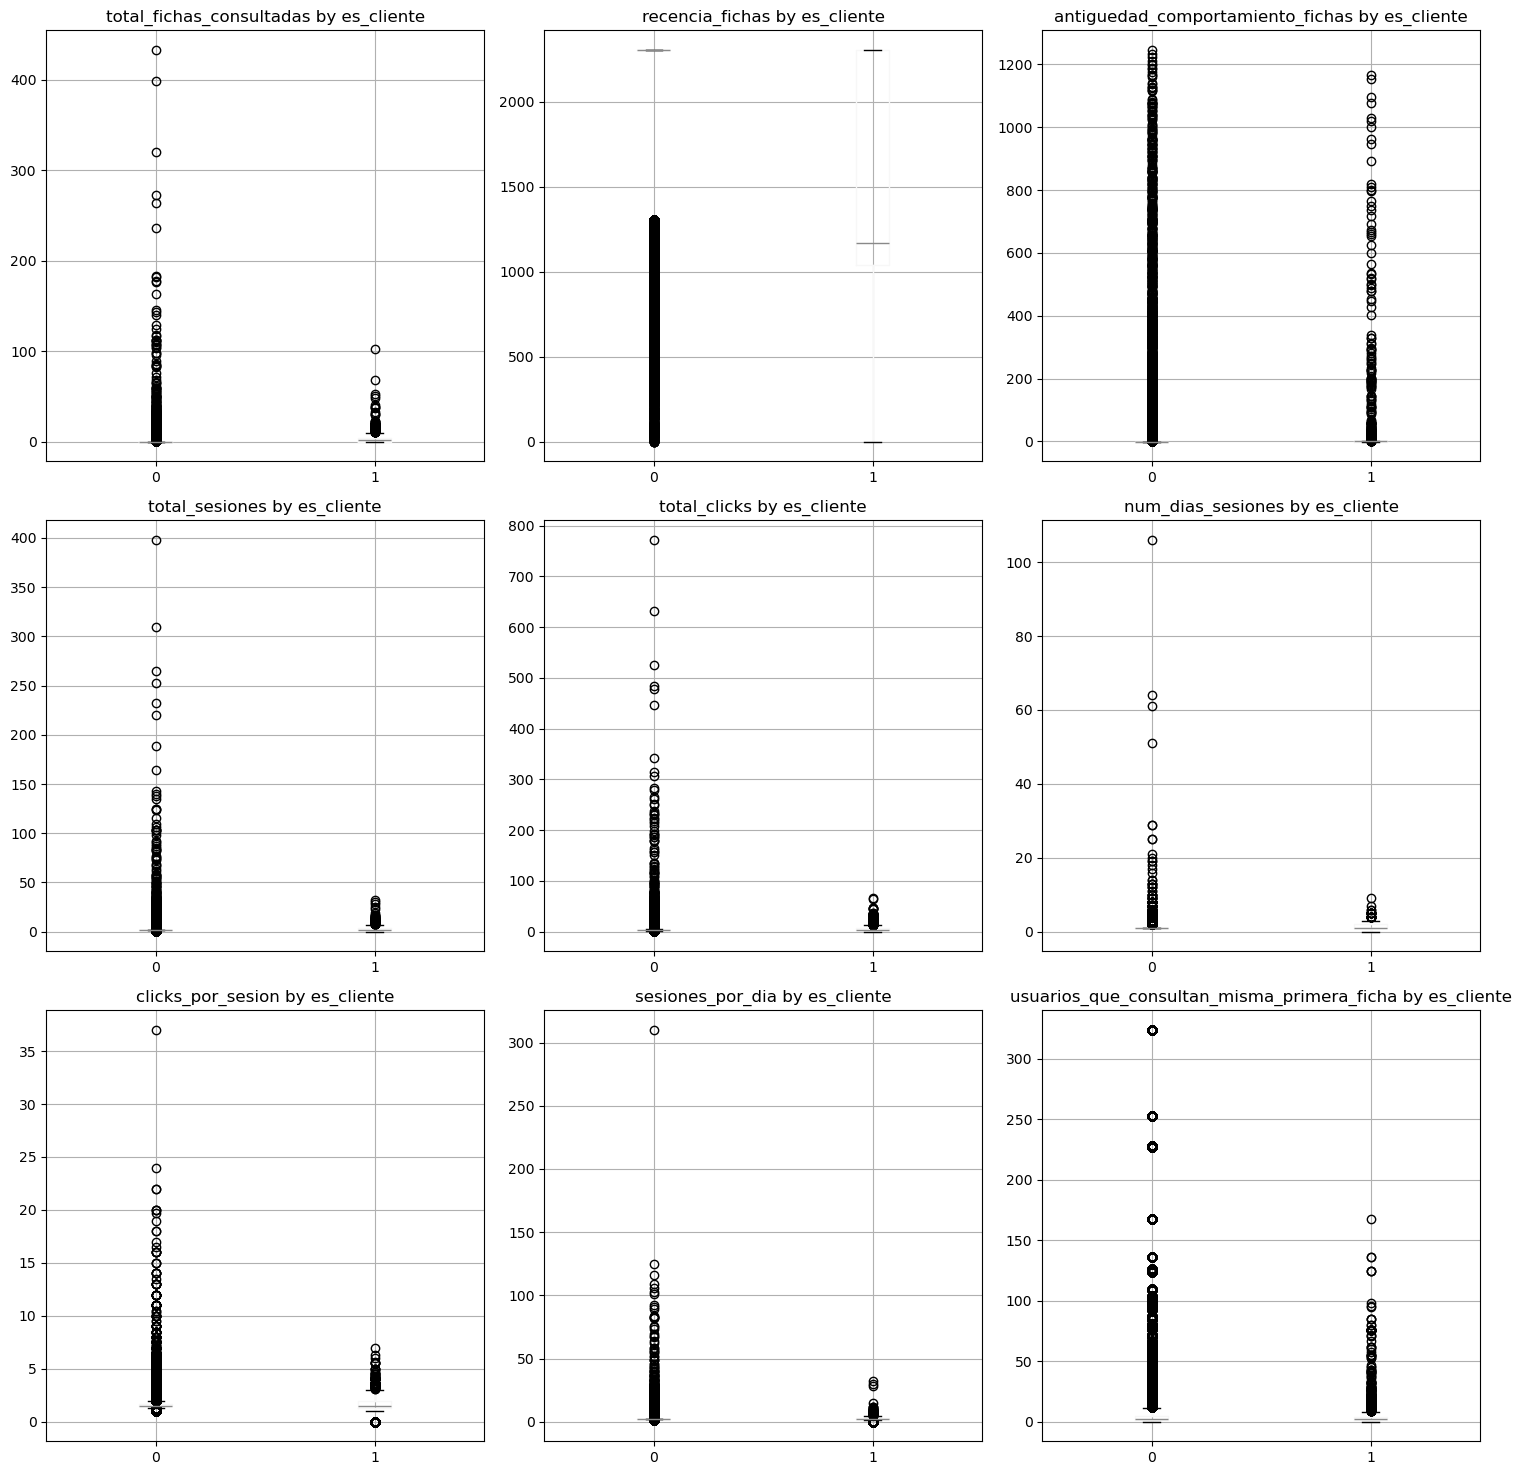

In [73]:

import math
import matplotlib.pyplot as plt

# Número de variables
num_vars = len(numerical_cols)  # en tu caso, 9
cols = 3  # número de columnas por fila
rows = math.ceil(num_vars / cols)  # calcula filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    df_final.boxplot(column=col, by='es_cliente', ax=axes[idx])
    axes[idx].set_title(f'{col} by es_cliente')
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")

# Eliminar ejes sobrantes si hay
for i in range(num_vars, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('')
plt.tight_layout()
plt.show()


In [74]:
tit("Análisis de Percentiles para Discretización (Binning)")

# -------------------------------------------------------------------
# Definición de las variables candidatas a discretización
# -------------------------------------------------------------------
variables_a_analizar = [
    'total_fichas_consultadas', 
    'total_sesiones', 
    'total_clicks', 
    'clicks_por_sesion',
    'sesiones_por_dia',
    'num_dias_sesiones',
    'antiguedad_comportamiento_fichas',
    'sesiones_por_dia'
]

# Definición de los percentiles de interés (desde la mediana hasta el extremo)
percentiles = [
    0.05,
    0.10,
    0.20,
    0.25,
    0.5, 
    0.75, 
    0.9, 
    0.95, 
    0.99, 
    0.995, 
    0.999,
    0.9999
]

# -------------------------------------------------------------------
# Cálculo de Percentiles
# -------------------------------------------------------------------

# Crear un diccionario para almacenar los resultados del análisis
resultados_percentiles = {}

for col in variables_a_analizar:
    if col in df_final.columns:
        # Calcular los valores de los percentiles para la columna actual
        valores_percentiles = df_final[col].quantile(percentiles)
        
        # Almacenar los resultados
        resultados_percentiles[col] = valores_percentiles
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en df_final.")

# -------------------------------------------------------------------
# Presentación de Resultados
# -------------------------------------------------------------------

# Convertir el diccionario a un DataFrame para una visualización más clara
df_percentiles = pd.DataFrame(resultados_percentiles)
df_percentiles.index = pd.Index(percentiles).map(lambda p: f'{p:.2%}')
df_percentiles = df_percentiles.T # Transponer para que las variables sean filas

# Añadir el valor Mínimo y Máximo a la tabla
min_max_data = {}
for col in variables_a_analizar:
    if col in df_final.columns:
        min_max_data[col] = {
            'Min': df_final[col].min(),
            'Max': df_final[col].max()
        }

df_min_max = pd.DataFrame(min_max_data).T[['Min', 'Max']]
df_percentiles = pd.concat([df_min_max, df_percentiles], axis=1)


tit("Tabla de Percentiles (Distribución de Comportamiento)")
print(df_percentiles)


exito("Análisis de percentiles completado. La tabla muestra la concentración de datos en los cuartiles superiores.")


Análisis de Percentiles para Discretización (Binning)

Tabla de Percentiles (Distribución de Comportamiento)
                                  Min     Max  5.00%  10.00%  20.00%  25.00%  \
total_fichas_consultadas          0.0   433.0    0.0     0.0     0.0     0.0   
total_sesiones                    0.0   398.0    1.0     1.0     2.0     2.0   
total_clicks                      0.0   772.0    1.0     1.0     3.0     3.0   
clicks_por_sesion                 0.0    37.0    1.0     1.0     1.5     1.5   
sesiones_por_dia                  0.0   310.0    1.0     1.0     2.0     2.0   
num_dias_sesiones                 0.0   106.0    1.0     1.0     1.0     1.0   
antiguedad_comportamiento_fichas -1.0  1246.0   -1.0    -1.0    -1.0    -1.0   

                                  50.00%    75.00%  90.00%  95.00%  99.00%  \
total_fichas_consultadas             0.0  1.000000     2.0     5.0     8.0   
total_sesiones                       2.0  2.000000     4.0     6.0    10.0   
total_clicks   

<div style="
    background-color: #e8f5e9; /* Verde muy clarito */
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌 Conclusiones</h4>

<ul>
<li><strong>Variables altamente informativas para clientes:</strong> <code>total_fichas_consultadas</code>, <code>recencia_fichas</code>, <code>antiguedad_comportamiento_fichas</code>, <code>total_sesiones</code>, <code>total_clicks</code>, <code>num_dias_sesiones</code>, <code>sesiones_por_dia</code>, <code>clicks_por_sesion</code>.<br>
Los usuarios que compran tienden a tener valores mayores en estas métricas, mostrando actividad y engagement más alto.</li>

<li><strong>Observaciones sobre outliers:</strong> Algunas variables presentan valores extremos (<code>total_fichas_consultadas</code>, <code>total_sesiones</code>, <code>clicks_por_sesion</code>) principalmente en usuarios no clientes, lo que podría reflejar usuarios ocasionales o errores de registro.</li>

<li><strong>Implicaciones para modelado:</strong> Variables con alta separación entre clases son candidatas fuertes para predicción (<code>total_clicks</code>, <code>total_sesiones</code>, <code>num_dias_sesiones</code>). Variables con baja discriminación pueden ser descartadas o transformadas.</li>
</ul>
</div>

<h2>Evaluacion de Asociacion: Pearson T-Test y Chi²</h2>

<p style="
    font-family: Arial, sans-serif;
    color: #2c3e50;
    line-height: 1.6;
    padding: 10px;
">
Este apartado evalúa la <strong>asociación estadística</strong> entre todas las variables predictoras y el objetivo binario (<tt>es_cliente</tt>), antes de la codificación final. Para las variables <strong>categóricas</strong>, se aplica el test de <strong>Chi-Cuadrado</strong> ($ \chi^2 $) para determinar la significancia de la relación, complementado con el coeficiente <strong>V de Cramer</strong> para medir la fuerza de la asociación. Para las variables <strong>numéricas</strong>, se utiliza el coeficiente de <strong>Correlación de Pearson</strong> (equivalente a la correlación punto-biserial) para evaluar la asociación lineal, y un <strong>T-Test</strong> para determinar si existe una diferencia significativa en las medias de la variable entre los grupos de clientes (1) y no clientes (0). Finalmente, se genera una <em>Matriz de Correlación</em> (<i>Heatmap</i>) para visualizar la interdependencia entre las variables numéricas.
</p>


Análisis de Relación Feature-Target (Pre-Codificación) - AMPLIFICADO
✅ Tipos de variables definidos y categóricas convertidas a string.

Coeficiente de Correlación de Pearson (Numéricas vs. Target)
| Variable                                   | Correlacion_Pearson   |
|:-------------------------------------------|:----------------------|
| total_fichas_consultadas                   | 0.0749                |
| antiguedad_comportamiento_fichas           | 0.05                  |
| num_dias_sesiones                          | 0.0376                |
| total_sesiones                             | 0.0235                |
| total_clicks                               | 0.0203                |
| clicks_por_sesion                          | 0.0056                |
| sesiones_por_dia                           | 0.0026                |
| usuarios_que_consultan_misma_primera_ficha | -0.0046               |
| recencia_fichas                            | -0.116                |

Test de Chi-Cuadrad

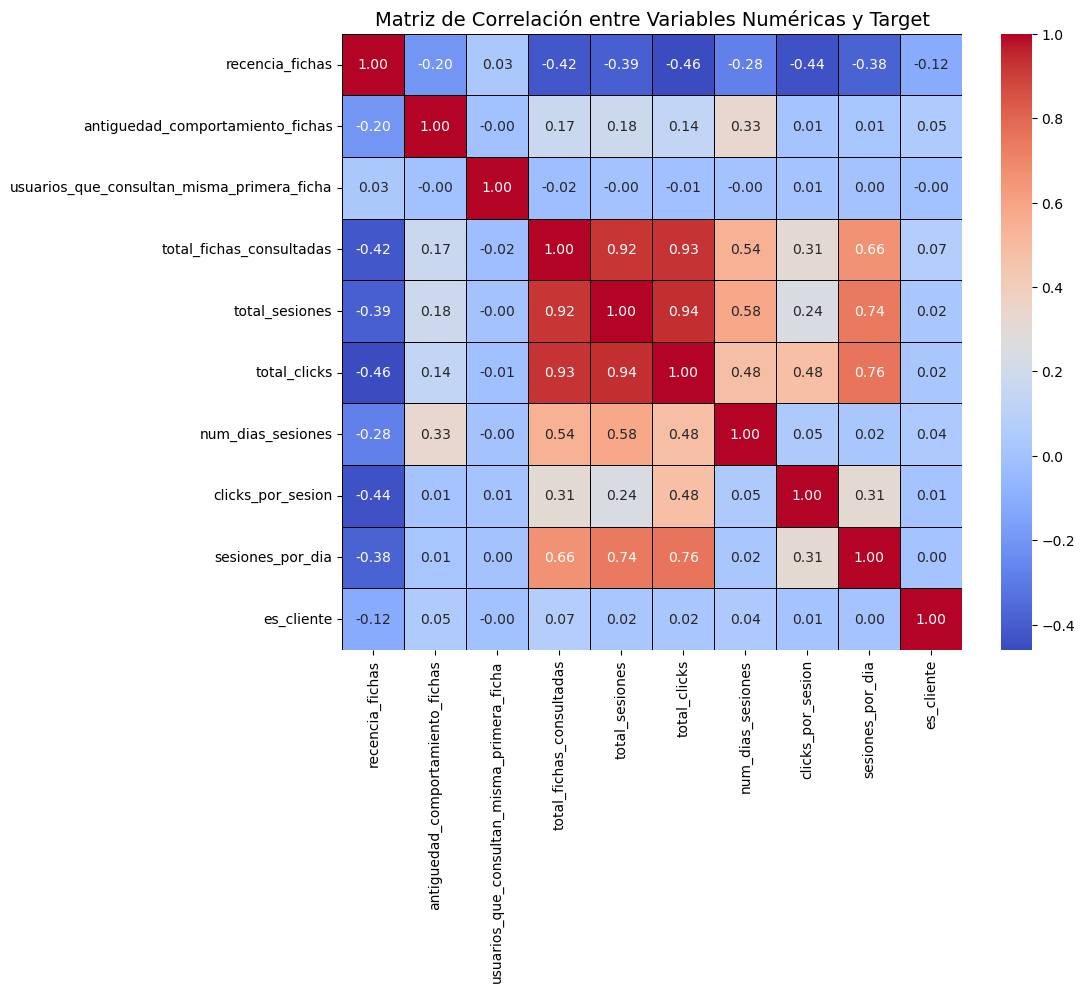

In [75]:
tit("Análisis de Relación Feature-Target (Pre-Codificación) - AMPLIFICADO")

# ----------------------------------------------------
# 1. Definición de Tipos de Variables
# ----------------------------------------------------

# Variables categóricas y cíclicas (a ser analizadas con Chi-cuadrado)
categoricas_a_analizar = [
    'canal', 
    'tipo_usuario', 
    'bondad_email',          
    'mes_registro',          
    'dia_semana_registro',   
    'dia_mes_registro',      # Ahora se trata como Categórica/Cíclica para Chi-cuadrado
    'es_finde_registro',
    'tiene_fichas'
]

# Variables numéricas restantes (a ser analizadas con Pearson y T-Test)
# Incluye las variables de conteo y ratio en su forma original.
numericas_a_analizar = [
    'recencia_fichas', 
    'antiguedad_comportamiento_fichas', 
    'usuarios_que_consultan_misma_primera_ficha', 
    'total_fichas_consultadas',
    'total_sesiones',
    'total_clicks',
    'num_dias_sesiones',
    'clicks_por_sesion',
    'sesiones_por_dia'
]

# Asegurar que las variables categóricas estén en formato string para el Chi-Cuadrado
for col in categoricas_a_analizar:
    if col in df_final.columns:
        # Convertimos a string para asegurar que chi2_contingency las trate como categorías
        df_final[col] = df_final[col].astype(str) 
exito("Tipos de variables definidos y categóricas convertidas a string.")


# ----------------------------------------------------
# 2. Correlación de Pearson (Numéricas vs. Target)
# ----------------------------------------------------

def pearson(df_final,numericas_a_analizar):
    tit("Coeficiente de Correlación de Pearson (Numéricas vs. Target)")
    
    # El target es binario (0 o 1). La correlación de Pearson es equivalente a la correlación
    # punto-biserial, que es apropiada para medir la asociación lineal.
    correlaciones = df_final[numericas_a_analizar + ['es_cliente']].corr()['es_cliente'].drop('es_cliente')
    
    df_correlacion = pd.DataFrame(correlaciones).reset_index()
    df_correlacion.columns = ['Variable', 'Correlacion_Pearson']
    df_correlacion['Correlacion_Pearson'] = df_correlacion['Correlacion_Pearson'].round(4)
    df_correlacion = df_correlacion.sort_values(by='Correlacion_Pearson', ascending=False)
    
    print(df_correlacion.to_markdown(index=False, numalign="left"))

pearson(df_final,numericas_a_analizar)


# ----------------------------------------------------
# 3. Test de Chi-Cuadrado ($\chi^2$) (Categóricas vs. Target)
# ----------------------------------------------------

def chi_cuadrado(df_final,categoricas_a_analizar):
    tit("Test de Chi-Cuadrado (Categóricas vs. Target)")
    # H0: Las variables son independientes (no hay relación).
    # Si p-value < 0.05, rechazamos H0: Hay una relación significativa entre las variables.
    
    resultados_chi2 = []
    for col in categoricas_a_analizar:
        if col in df_final.columns:
            # Crea la tabla de contingencia
            tabla_contingencia = pd.crosstab(df_final[col], df_final['es_cliente'])
            # Realiza el test de Chi-cuadrado
            chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
            
            # Calcula el V de Cramer para la fuerza de la asociación
            n = tabla_contingencia.values.sum()
            # Se asegura que min_dim sea al menos 1 para evitar divisiones por cero si hay categorías vacías
            min_dim = max(1, min(tabla_contingencia.shape) - 1) 
            cramer_v = np.sqrt(chi2 / (n * min_dim))
            
            resultados_chi2.append({
                'Variable': col,
                'p_value': round(p_value, 6),
                'V_Cramer': round(cramer_v, 4),
                'Significancia': 'SI (p < 0.05)' if p_value < 0.05 else 'NO'
            })
    
    df_chi2 = pd.DataFrame(resultados_chi2).sort_values(by='V_Cramer', ascending=False)
    print(df_chi2.to_markdown(index=False, numalign="left"))

chi_cuadrado(df_final,categoricas_a_analizar)

# ----------------------------------------------------
# 4. T-Test (ANOVA para 2 grupos) (Numéricas vs. Target)
# ----------------------------------------------------
def t_test(df_final,numericas_a_analizar):
    tit("T-Test de Medias (Numéricas vs. Target)")
    # H0: Las medias de la variable son iguales en ambos grupos (es_cliente=0 y es_cliente=1).
    # Si p-value < 0.05, rechazamos H0: Hay una diferencia significativa de medias.
    
    resultados_ttest = []
    for col in numericas_a_analizar:
        if col in df_final.columns:
            grupo_0 = df_final[df_final['es_cliente'] == 0][col].dropna()
            grupo_1 = df_final[df_final['es_cliente'] == 1][col].dropna()
            
            # Realiza el t-test independiente
            stat, p_value = ttest_ind(grupo_0, grupo_1, equal_var=False) # Asume varianzas desiguales
            
            resultados_ttest.append({
                'Variable': col,
                'p_value': round(p_value, 6),
                'Media_Cliente_0': round(grupo_0.mean(), 2),
                'Media_Cliente_1': round(grupo_1.mean(), 2),
                'Diferencia_Media': round(grupo_1.mean() - grupo_0.mean(), 2),
                'Significancia': 'SI (p < 0.05)' if p_value < 0.05 else 'NO'
            })
    
    df_ttest = pd.DataFrame(resultados_ttest).sort_values(by='Diferencia_Media', ascending=False)
    print(df_ttest.to_markdown(index=False, numalign="left"))

t_test(df_final,numericas_a_analizar)
# ----------------------------------------------------
# 5. Visualización: Matriz de Correlación (Heatmap)
# ----------------------------------------------------
tit("5. Matriz de Correlación (Heatmap)")

# Incluir todas las variables numéricas y el target en la matriz
matriz_corr_vars = numericas_a_analizar + ['es_cliente']
matriz_correlacion = df_final[matriz_corr_vars].corr()

# Generar el heatmap
plt.figure(figsize=(10, 8)) # Aumentar el tamaño para más variables
sns.heatmap(
    matriz_correlacion, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=.5, 
    linecolor='black'
)
plt.title('Matriz de Correlación entre Variables Numéricas y Target', fontsize=14)
plt.show()

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h3 style="font-weight:bold">📌 Conclusiones de la Evaluación de Asociación (Pre-Codificación)</h3>

<ol>
    <li>Asociación Categórica (Chi-Cuadrado): la relación es significativa para la mayoría de variables. <code>tiene_fichas</code> (V de Cramer = 0.1124) presenta la mayor fuerza de asociación, seguido por <code>bondad_email</code>, <code>tipo_usuario</code> y <code>canal</code>. Las variables temporales (<code>dia_mes_registro</code> y <code>mes_registro</code>) no muestran significancia.</li>
    <li>Asociación Numérica (T-Test): se observan diferencias significativas de medias para métricas de actividad y antigüedad, destacando <code>antiguedad_comportamiento_fichas</code> (diferencia de 19.2 días) y <code>recencia_fichas</code>. Las métricas de ratio (<code>sesiones_por_dia</code> y <code>clicks_por_sesion</code>) no presentan diferencias significativas.</li>
    <li>Correlación Lineal (Pearson): las correlaciones con el target son bajas (por debajo de 0.08 en la mayoría de casos), siendo <code>recencia_fichas</code> la más relevante (-0.116).</li>
    <li>Intercorrelación (Matriz de Correlación): se detecta alta multicolinealidad entre métricas de volumen (e.g., <code>total_fichas_consultadas</code>, <code>total_sesiones</code>, <code>total_clicks</code>), por lo que se recomienda eliminar variables redundantes antes del modelado.</li>
</ol>

<p style="margin-top: 15px;">➡️ Estrategia de Selección de Features</p>
<ul style="padding-left:20px;">
    <li>Features prioritarios: <code>tiene_fichas</code>, <code>antiguedad_comportamiento_fichas</code>, <code>recencia_fichas</code>, <code>total_fichas_consultadas</code>, <code>bondad_email</code>, <code>tipo_usuario</code> y <code>canal</code>.</li>
    <li>Features a descartar: <code>dia_mes_registro</code> y <code>mes_registro</code> por nula asociación estadística.</li>
    <li>Features bajo evaluación: <code>sesiones_por_dia</code> y <code>clicks_por_sesion</code> por bajo valor discriminatorio y correlación cercana a cero con el target.</li>
</ul>
</div>

<h3>Eliminacion de variables</h3>

<p><strong>Eliminación de features no relevantes:</strong> se eliminaron las columnas <code>mes_registro</code> y <code>dia_mes_registro</code> y se ajustaron a tipo <em>integer</em> las variables <code>es_finde_registro</code>, <code>tiene_fichas</code> y <code>dia_semana_registro</code>, dejando <code>df_final_modelado</code> listo para la codificación y posterior análisis.</p>

In [76]:
tit("Eliminación de Features No Relevantes")
guardar_csv(df_final,"src\datasets_preproduccion","df_completo.csv")
# Definición de las columnas a eliminar
columnas_a_eliminar = ['mes_registro', 'dia_mes_registro']

df_final_modelado = df_final.copy()
# Verificar que las columnas existan en df_final antes de eliminarlas
columnas_existentes = [col for col in columnas_a_eliminar if col in df_final_modelado.columns]

if columnas_existentes:
    # Eliminar las columnas
    df_final_modelado = df_final_modelado.drop(columns=columnas_existentes, axis=1)
    
    # Confirmación
    exito(f"Columnas eliminadas con éxito: {', '.join(columnas_existentes)}")
    print(f"Nuevo número de columnas en df_final: {df_final_modelado.shape[1]}")
else:
    print("Las columnas ya han sido eliminadas o no existen en df_final.")
    
df_final_modelado['es_finde_registro'] = df_final_modelado['es_finde_registro'].astype(int)
df_final_modelado['tiene_fichas'] = df_final_modelado['tiene_fichas'].astype(int)
df_final_modelado['dia_semana_registro'] = df_final_modelado['dia_semana_registro'].astype(int)
exito("transformada a int es_finde_registro, dia_semana_registro y tiene_fichas")

exito("Limpieza de features completada. El df_final_modelado está listo para la codificación final.")
info(df_final_modelado, "DF_FINAL (PRE-ESCALADO)")


Eliminación de Features No Relevantes
✅ df_completo.csv guardado en src\datasets_preproduccion\df_completo.csv
✅ Columnas eliminadas con éxito: mes_registro, dia_mes_registro
Nuevo número de columnas en df_final: 16
✅ transformada a int es_finde_registro, dia_semana_registro y tiene_fichas
✅ Limpieza de features completada. El df_final_modelado está listo para la codificación final.

📊 Análisis de estructura y calidad: DF_FINAL (PRE-ESCALADO)
Dimensiones: 195165 filas, 16 columnas.
Duplicados: 141732
----------------------------------------------------------------------------------------------------

Tipos de datos y valores no-nulos:


----------------------------------------------------------------------------------------------------

Estadísticas Descriptivas (Numéricas y Categóricas):


count unique          top  \
canal                                         195165      3  Directorios   
es_cliente                                 195165.00    NaN          NaN   
bondad_email                                  195165      5           20   
tipo_usuario                                  195165      2           PF   
dia_semana_registro                        195165.00    NaN          NaN   
es_finde_registro                          195165.00    NaN          NaN   
total_fichas_consultadas                   195165.00    NaN          NaN   
recencia_fichas                            195165.00    NaN          NaN   
antiguedad_comportamiento_fichas           195165.00    NaN          NaN   
total_sesiones                             195165.00    NaN          NaN   
total_clicks                               195165.00    NaN          NaN   
num_dias_sesiones                          195165.00    NaN          NaN   
clicks_por_sesion                          195165.00    NaN          NaN   
sesiones_por_dia                           195165.00    NaN          NaN   
usuarios_que_consultan_misma_primera_ficha 195165.00   <NA>         <NA>   
tiene_fichas                               195165.00    NaN          NaN   

                                              freq    mean    std   min  \
canal                                       157004     NaN    NaN   NaN   
es_cliente                                     NaN    0.01   0.10  0.00   
bondad_email                                128118     NaN    NaN   NaN   
tipo_usuario                                164203     NaN    NaN   NaN   
dia_semana_registro                            NaN    2.49   1.78  0.00   
es_finde_registro                              NaN    0.15   0.36  0.00   
total_fichas_consultadas                       NaN    0.78   3.21  0.00   
recencia_fichas                                NaN 2002.49 530.65  0.00   
antiguedad_comportamiento_fichas               NaN    1.99  38.53 -1.00   
total_sesiones                                 NaN    2.47   2.87  0.00   
total_clicks                                   NaN    4.57   6.65  0.00   
num_dias_sesiones                              NaN    1.08   0.53  0.00   
clicks_por_sesion                              NaN    1.67   0.66  0.00   
sesiones_por_dia                               NaN    2.26   1.95  0.00   
usuarios_que_consultan_misma_primera_ficha    <NA>    7.93  24.32  0.00   
tiene_fichas                                   NaN    0.25   0.43  0.00   

                                               25%     50%     75%     max  
canal                                          NaN     NaN     NaN     NaN  
es_cliente                                    0.00    0.00    0.00    1.00  
bondad_email                                   NaN     NaN     NaN     NaN  
tipo_usuario                                   NaN     NaN     NaN     NaN  
dia_semana_registro                           1.00    2.00    4.00    6.00  
es_finde_registro                             0.00    0.00    0.00    1.00  
total_fichas_consultadas                      0.00    0.00    1.00  433.00  
recencia_fichas                            1304.00 2306.00 2306.00 2306.00  
antiguedad_comportamiento_fichas             -1.00   -1.00    0.00 1246.00  
total_sesiones                                2.00    2.00    2.00  398.00  
total_clicks                                  3.00    3.00    4.00  772.00  
num_dias_sesiones                             1.00    1.00    1.00  106.00  
clicks_por_sesion                             1.50    1.50    1.67   37.00  
sesiones_por_dia                              2.00    2.00    2.00  310.00  
usuarios_que_consultan_misma_primera_ficha    1.00    2.00    5.00  324.00  
tiene_fichas                                  0.00    0.00    1.00    1.00

----------------------------------------------------------------------------------------------------

Primeras 3 filas (df.head(3)):


canal  es_cliente bondad_email tipo_usuario  dia_semana_registro  \
0  Directorios           0            9           PF                    0   
1  Directorios           0           20           PF                    0   
2  Directorios           0           20           PF                    0   

   es_finde_registro  total_fichas_consultadas  recencia_fichas  \
0                  0                         0             2306   
1                  0                         0             2306   
2                  0                         0             2306   

   antiguedad_comportamiento_fichas  total_sesiones  total_clicks  \
0                                -1               1             1   
1                                -1               2             3   
2                                -1               2             3   

   num_dias_sesiones  clicks_por_sesion  sesiones_por_dia  \
0                  1               1.00              1.00   
1                  1               1.50              2.00   
2                  1               1.50              2.00   

   usuarios_que_consultan_misma_primera_ficha  tiene_fichas  
0                                           0             0  
1                                           2             0  
2                                           2             0

----------------------------------------------------------------------------------------------------



<h2>Preparacion del dataset para el modelado</h2>

<p>Se procederá a la preparación del dataset con el objetivo de abarcar la mayor diversidad de modelos posible.</p>

<p>Para ello, se generarán dos conjuntos de datos: uno genérico y otro más específico, optimizado para modelos lineales mediante escalado y descomposición en componentes principales (PCA). Este proceso requiere la codificación de las variables categóricas. Según investigaciones previas, los modelos más prometedores son aquellos basados en <em>boosting</em>, <em>bagging</em> y árboles, aunque también se evaluarán modelos lineales para complementar el estudio.</p>

<p>En esta fase inicial no se considera conveniente discretizar las variables; esta decisión se revisará en función de los resultados obtenidos. La discretización podría ser beneficiosa únicamente para mejorar el desempeño de los modelos lineales frente a relaciones no lineales, aunque, a priori, se espera que los modelos lineales tengan un rendimiento limitado en este contexto.</p>


<h3>Codificacion de variables categóricas</h3>

<p><strong>Codificación y preparación del dataset final:</strong> se aplicó <em>One-Hot Encoding</em> a las variables categóricas nominales y cíclicas, eliminando manualmente columnas de referencia para reducir colinealidad. El <code>DataFrame</code> resultante queda listo para el modelado, conservando únicamente las variables numéricas relevantes.</p>

In [77]:
tit("Codificación y Discretización del DataFrame Final")
# ----------------------------------------------------
# 1. One-Hot Encoding (OHE)
# ----------------------------------------------------

# Variables categóricas nominales y cíclicas a codificar
columnas_ohe = [
    'canal', 
    'tipo_usuario', 
    'bondad_email',
]

# Las columnas numéricas o enteras deben convertirse a 'object' antes de OHE
# para que get_dummies las trate como categorías (ya realizado previamente)
# df_final['dia_semana_registro'] = df_final['dia_semana_registro'].astype(str)
# df_final['bondad_email'] = df_final['bondad_email'].astype(str)


# Crear dummies y eliminar la primera columna para evitar colinealidad (drop_first=True)
df_final_codificado = df_final_modelado.copy()
df_final_codificado = pd.get_dummies(df_final_codificado, columns=columnas_ohe, prefix=columnas_ohe, drop_first=False) #Drop manual
exito("One-Hot Encoding aplicado a todas las variables nominales, cíclicas y discretizadas.")

# Se eliminan las columnas de referencia manualmente para ajustar adecuadamente luego en VIF
cols_ref = ['bondad_email_9', 'tipo_usuario_PJ', 'canal_Directorios']
exito(f"Se establece manualmente columnas de referencia para mejorar colinealidad:\n usando {cols_ref}")
df_final_codificado = df_final_codificado.drop(columns=cols_ref, axis=1)

# ----------------------------------------------------
# 2. Revisión Final del DataFrame para Modelado
# ----------------------------------------------------
tit("DataFrame Final Listo para Modelado")

# Las únicas variables numéricas que quedan son:
# recencia_fichas, antiguedad_comportamiento_fichas, usuarios_que_consultan_misma_primera_ficha, 
# es_cliente, es_finde_registro.

info(df_final_codificado, "DF FINAL CODIFICADO")
print(f"El DataFrame final tiene {df_final_codificado.shape[1]} columnas (features).")


Codificación y Discretización del DataFrame Final
✅ One-Hot Encoding aplicado a todas las variables nominales, cíclicas y discretizadas.
✅ Se establece manualmente columnas de referencia para mejorar colinealidad:
 usando ['bondad_email_9', 'tipo_usuario_PJ', 'canal_Directorios']

DataFrame Final Listo para Modelado

📊 Análisis de estructura y calidad: DF FINAL CODIFICADO
Dimensiones: 195165 filas, 20 columnas.
Duplicados: 141732
----------------------------------------------------------------------------------------------------

Tipos de datos y valores no-nulos:


----------------------------------------------------------------------------------------------------

Estadísticas Descriptivas (Numéricas y Categóricas):


count unique    top    freq  \
es_cliente                                 195165.00    NaN    NaN     NaN   
dia_semana_registro                        195165.00    NaN    NaN     NaN   
es_finde_registro                          195165.00    NaN    NaN     NaN   
total_fichas_consultadas                   195165.00    NaN    NaN     NaN   
recencia_fichas                            195165.00    NaN    NaN     NaN   
antiguedad_comportamiento_fichas           195165.00    NaN    NaN     NaN   
total_sesiones                             195165.00    NaN    NaN     NaN   
total_clicks                               195165.00    NaN    NaN     NaN   
num_dias_sesiones                          195165.00    NaN    NaN     NaN   
clicks_por_sesion                          195165.00    NaN    NaN     NaN   
sesiones_por_dia                           195165.00    NaN    NaN     NaN   
usuarios_que_consultan_misma_primera_ficha 195165.00   <NA>   <NA>    <NA>   
tiene_fichas                               195165.00    NaN    NaN     NaN   
canal_SEM                                     195165      2  False  181861   
canal_SEO                                     195165      2  False  170308   
tipo_usuario_PF                               195165      2   True  164203   
bondad_email_-10                              195165      2  False  193757   
bondad_email_0                                195165      2  False  190910   
bondad_email_1                                195165      2  False  195125   
bondad_email_20                               195165      2   True  128118   

                                              mean    std   min     25%  \
es_cliente                                    0.01   0.10  0.00    0.00   
dia_semana_registro                           2.49   1.78  0.00    1.00   
es_finde_registro                             0.15   0.36  0.00    0.00   
total_fichas_consultadas                      0.78   3.21  0.00    0.00   
recencia_fichas                            2002.49 530.65  0.00 1304.00   
antiguedad_comportamiento_fichas              1.99  38.53 -1.00   -1.00   
total_sesiones                                2.47   2.87  0.00    2.00   
total_clicks                                  4.57   6.65  0.00    3.00   
num_dias_sesiones                             1.08   0.53  0.00    1.00   
clicks_por_sesion                             1.67   0.66  0.00    1.50   
sesiones_por_dia                              2.26   1.95  0.00    2.00   
usuarios_que_consultan_misma_primera_ficha    7.93  24.32  0.00    1.00   
tiene_fichas                                  0.25   0.43  0.00    0.00   
canal_SEM                                      NaN    NaN   NaN     NaN   
canal_SEO                                      NaN    NaN   NaN     NaN   
tipo_usuario_PF                                NaN    NaN   NaN     NaN   
bondad_email_-10                               NaN    NaN   NaN     NaN   
bondad_email_0                                 NaN    NaN   NaN     NaN   
bondad_email_1                                 NaN    NaN   NaN     NaN   
bondad_email_20                                NaN    NaN   NaN     NaN   

                                               50%     75%     max  
es_cliente                                    0.00    0.00    1.00  
dia_semana_registro                           2.00    4.00    6.00  
es_finde_registro                             0.00    0.00    1.00  
total_fichas_consultadas                      0.00    1.00  433.00  
recencia_fichas                            2306.00 2306.00 2306.00  
antiguedad_comportamiento_fichas             -1.00    0.00 1246.00  
total_sesiones                                2.00    2.00  398.00  
total_clicks                                  3.00    4.00  772.00  
num_dias_sesiones                             1.00    1.00  106.00  
clicks_por_sesion                             1.50    1.67   37.00  
sesiones_por_dia                              2.00    2.00  310.00  
usua

----------------------------------------------------------------------------------------------------

Primeras 3 filas (df.head(3)):


es_cliente  dia_semana_registro  es_finde_registro  \
0           0                    0                  0   
1           0                    0                  0   
2           0                    0                  0   

   total_fichas_consultadas  recencia_fichas  \
0                         0             2306   
1                         0             2306   
2                         0             2306   

   antiguedad_comportamiento_fichas  total_sesiones  total_clicks  \
0                                -1               1             1   
1                                -1               2             3   
2                                -1               2             3   

   num_dias_sesiones  clicks_por_sesion  sesiones_por_dia  \
0                  1               1.00              1.00   
1                  1               1.50              2.00   
2                  1               1.50              2.00   

   usuarios_que_consultan_misma_primera_ficha  tiene_fichas  canal_SEM  \
0                                           0             0      False   
1                                           2             0      False   
2                                           2             0      False   

   canal_SEO  tipo_usuario_PF  bondad_email_-10  bondad_email_0  \
0      False             True             False           False   
1      False             True             False           False   
2      False             True             False           False   

   bondad_email_1  bondad_email_20  
0           False            False  
1           False             True  
2           False             True

----------------------------------------------------------------------------------------------------

El DataFrame final tiene 20 columnas (features).


<h3>Creación del dataset de uso genérico</h3>
<p>Se procurará minimizar la colinealidad en el dataset mediante la eliminación de variables cuando sea necesario. Aunque esto podría implicar la pérdida de información no lineal potencialmente útil, se garantiza que un mayor número de modelos podrá operar adecuadamente con este conjunto de datos.</p>

<h4>Análisis de colinealidad</h4>

In [78]:
tit("Análisis de Colinealidad (VIF) Post-OHE")

# ----------------------------------------------------
# 1. Preparación de los datos
# ----------------------------------------------------
def calcula_vif(df):
    # Identificar las columnas de las variables predictoras (X)
    # Excluimos la variable target ('es_cliente') y la constante si ya estuviera
    X = df.drop(columns=['es_cliente'], errors='ignore')
    
    # ----------------------------------------------------
    # 2. Agregar una constante (Intercepto)
    # ----------------------------------------------------
    # El cálculo de VIF requiere que la matriz de diseño contenga una constante (el intercepto).
    # Esto es crucial para un análisis VIF correcto en modelos de regresión.
    try:
        X_vif = add_constant(X, prepend=True)
    except ValueError:
        # Si 'const' ya existe (raro tras drop/OHE), continuamos
        X_vif = X.copy()
        if 'const' not in X_vif.columns:
            X_vif = add_constant(X, prepend=True)
    
    # ----------------------------------------------------
    # 3. Cálculo del VIF
    # ----------------------------------------------------
    
    # La función requiere que todos los datos sean float
    X_vif = X_vif.astype(float)
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
    
    # Redondear y ordenar
    vif_data['VIF'] = vif_data['VIF'].round(2)
    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    
    
    # ----------------------------------------------------
    # 4. Presentación de Resultados
    # ----------------------------------------------------
    
    print("Resultados del Factor de Inflación de Varianza (VIF)")
    print("\n")
    print(vif_data.to_markdown(index=False, numalign="left"))
    
calcula_vif(df_final_codificado)


Análisis de Colinealidad (VIF) Post-OHE
Resultados del Factor de Inflación de Varianza (VIF)


| feature                                    | VIF     |
|:-------------------------------------------|:--------|
| const                                      | 1250.65 |
| recencia_fichas                            | 63.03   |
| tiene_fichas                               | 62.59   |
| total_clicks                               | 30.92   |
| total_sesiones                             | 27.85   |
| total_fichas_consultadas                   | 10.08   |
| sesiones_por_dia                           | 5.72    |
| num_dias_sesiones                          | 3.84    |
| clicks_por_sesion                          | 2.97    |
| dia_semana_registro                        | 1.95    |
| es_finde_registro                          | 1.95    |
| antiguedad_comportamiento_fichas           | 1.41    |
| canal_SEM                                  | 1.29    |
| canal_SEO                                  | 1.

In [79]:
df_test = df_final_codificado.copy()
df_test = df_test.drop('recencia_fichas', axis = 1)
df_test = df_test.drop('total_clicks', axis = 1)
df_test = df_test.drop('total_sesiones', axis = 1)
exito("Eliminado en df_test recencia_fichas, total_clicks, total_sesiones")
calcula_vif(df_test)

✅ Eliminado en df_test recencia_fichas, total_clicks, total_sesiones
Resultados del Factor de Inflación de Varianza (VIF)


| feature                                    | VIF   |
|:-------------------------------------------|:------|
| const                                      | 32.84 |
| total_fichas_consultadas                   | 3.69  |
| sesiones_por_dia                           | 2.66  |
| num_dias_sesiones                          | 2.23  |
| es_finde_registro                          | 1.95  |
| dia_semana_registro                        | 1.95  |
| tiene_fichas                               | 1.69  |
| clicks_por_sesion                          | 1.36  |
| canal_SEM                                  | 1.25  |
| canal_SEO                                  | 1.17  |
| bondad_email_20                            | 1.13  |
| antiguedad_comportamiento_fichas           | 1.13  |
| bondad_email_0                             | 1.08  |
| bondad_email_-10                           | 1.02

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌 Conclusiones</h4>
<ul>
    <li><strong>Multicolinealidad significativa</strong> en variables de comportamiento:
        <ul>
            <li><code>recencia_fichas</code> (VIF = 63.03), <code>tiene_fichas</code> (62.59), <code>total_clicks</code> (30.92), <code>total_sesiones</code> (27.85).</li>
        </ul>
    </li>
    <li>El <strong>intercepto</strong> presentó un VIF muy alto (1250.65), fenómeno típico en presencia de fuerte colinealidad entre predictores o ausencia de centrado; su valor no es interpretativo, pero indica un problema global de multicolinealidad.</li>
    <li>Las variables categóricas tras la codificación <em>One-Hot Encoding</em> muestran VIF entre 1 y 1.3 (p.ej., <code>canal_SEM</code>, <code>canal_SEO</code>, <code>bondad_email_*</code>), confirmando una codificación correcta y la ausencia del “dummy variable trap”.</li>
</ul>

<p>Se <strong>eliminaron</strong> del modelo las variables <code>recencia_fichas</code>, <code>total_clicks</code> y <code>total_sesiones</code> para reducir la colinealidad.</p>

<table border="1" cellpadding="6" cellspacing="0">
    <thead>
        <tr>
            <th>Indicador</th>
            <th>Antes</th>
            <th>Después</th>
            <th>Observación</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Máximo VIF (excluyendo intercepto)</td>
            <td>63.03 (<code>recencia_fichas</code>)</td>
            <td>3.69 (<code>total_fichas_consultadas</code>)</td>
            <td>Multicolinealidad severa reducida a niveles aceptables (<5).</td>
        </tr>
        <tr>
            <td>Intercepto (const)</td>
            <td>1250.65</td>
            <td>32.84</td>
            <td>Descenso notable; valor aún alto pero <em>no interpretativo</em> para VIF, mitigable mediante centrado o estandarización.</td>
        </tr>
        <tr>
            <td>Variables de actividad restantes</td>
            <td>VIF hasta ~30</td>
            <td>VIF 2.23–3.69</td>
            <td><code>sesiones_por_dia</code>, <code>num_dias_sesiones</code>, <code>total_fichas_consultadas</code> presentan colinealidad moderada.</td>
        </tr>
        <tr>
            <td>Categóricas (OHE)</td>
            <td>≈1–1.3</td>
            <td>≈1–1.3</td>
            <td>Se mantienen estables y correctamente condicionadas.</td>
        </tr>
    </tbody>
</table>
</div>


<h4>Guardar dataset genérico</h4>

In [80]:
# ----------------------------------------------------------------------
# 2. Guardar el archivo
# ----------------------------------------------------------------------

df_preproc = df_test.copy()
guardar_csv(df_preproc,"src\datasets_preproduccion","df_preproc.csv")

✅ df_preproc.csv guardado en src\datasets_preproduccion\df_preproc.csv


In [81]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195165 entries, 0 to 195164
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   es_cliente                                  195165 non-null  int64  
 1   dia_semana_registro                         195165 non-null  int64  
 2   es_finde_registro                           195165 non-null  int64  
 3   total_fichas_consultadas                    195165 non-null  int64  
 4   antiguedad_comportamiento_fichas            195165 non-null  int64  
 5   num_dias_sesiones                           195165 non-null  int64  
 6   clicks_por_sesion                           195165 non-null  float64
 7   sesiones_por_dia                            195165 non-null  float64
 8   usuarios_que_consultan_misma_primera_ficha  195165 non-null  Int64  
 9   tiene_fichas                                195165 non-null  int64  
 

<h3>Creación de dataset para modelos lineales: PCA</h3>

<p>Se preparó un conjunto de datos optimizado para modelos lineales mediante estandarización de variables numéricas y centrado de variables booleanas. A continuación, se aplicó Análisis de Componentes Principales (PCA) para reducir la dimensionalidad manteniendo el 95% de la varianza total. El dataset resultante permite representar las características originales en un espacio reducido de componentes principales, facilitando el entrenamiento de modelos lineales y el análisis de la contribución de cada variable original a las nuevas dimensiones.</p>

In [82]:
#modificamos todas binarias a bool
df_final_codificado["tiene_fichas"] = df_final_codificado["tiene_fichas"].astype(bool)
df_final_codificado["es_finde_registro"] = df_final_codificado["es_finde_registro"].astype(bool)


🚀 PIPELINE COMPLETO PCA
🔧 Preparando datasets para diferentes tipos de modelos...
  Variables numéricas: 10
  Variables booleanas (one-hot): 9

📐 Dataset para PCA + modelos lineales:
   - Shape: (195165, 20)
   - Numéricas: escaladas (StandardScaler)
   - Booleanas: centradas (solo restar media)

🎯 Aplicando PCA a dataset de 19 variables...

📊 Resultados PCA:
   - Total componentes posibles: 19
   - Componentes para 95.0% varianza: 9
   - Varianza explicada por PC1: 39.6%
   - Varianza explicada por PC2: 12.0%

✅ Dataset transformado: (195165, 10)
   19 variables → 9 componentes principales


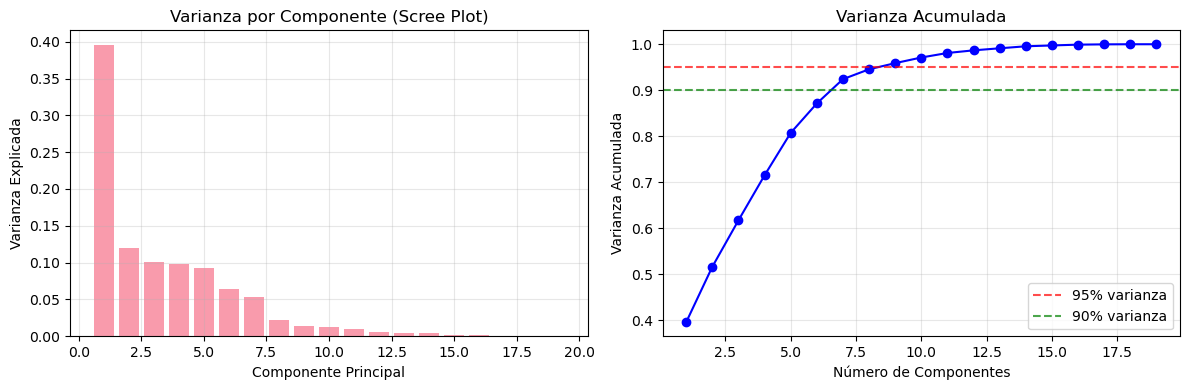


📈 Componentes necesarios para diferentes niveles de varianza:
   80% varianza: 5 componentes
   85% varianza: 6 componentes
   90% varianza: 7 componentes
   95% varianza: 9 componentes
   99% varianza: 13 componentes

🔍 Variables que más contribuyen a cada componente:

📊 PC1 (Top 10 variables):
   total_sesiones                           : +0.466
   antiguedad_comportamiento_fichas         : +0.453
   es_finde_registro                        : +0.448
   clicks_por_sesion                        : +0.364
   total_fichas_consultadas                 : -0.297
   total_clicks                             : +0.267
   num_dias_sesiones                        : +0.229
   tiene_fichas                             : +0.127
   recencia_fichas                          : +0.116
   canal_SEO                                : +0.036

📊 PC2 (Top 10 variables):
   total_clicks                             : +0.585
   recencia_fichas                          : +0.572
   num_dias_sesiones                   

In [83]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ============================================================================
# 1. PREPARAR DATOS - ESTRATEGIA DIFERENCIADA
# ============================================================================

def preparar_datasets_pca(df_codificado):
    """
    Prepara dos versiones: una para PCA (lineales) y otra para árboles
    """
    print("🔧 Preparando datasets para diferentes tipos de modelos...")
    
    # Separar target
    if 'es_cliente' in df_codificado.columns:
        y = df_codificado['es_cliente']
        X = df_codificado.drop('es_cliente', axis=1)
    else:
        X = df_codificado.copy()
        y = None
    
    # Identificar tipos de variables
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    bool_cols = X.select_dtypes(include=['bool']).columns.tolist()
    
    print(f"  Variables numéricas: {len(numeric_cols)}")
    print(f"  Variables booleanas (one-hot): {len(bool_cols)}")
    
    # ==============================================
    # B) DATASET PARA PCA + MODELOS LINEALES
    # ==============================================
    print("\n📐 Dataset para PCA + modelos lineales:")
    
    # Estrategia: escalado diferente para numéricas vs booleanas
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler
    
    # Para PCA necesitamos:
    # - Numéricas: Estandarizar (mean=0, std=1)
    # - Booleanas: Solo centrar (restar media), NO escalar varianza
    preprocessor = ColumnTransformer([
        ('numeric', StandardScaler(), numeric_cols),
        ('bool', StandardScaler(with_std=False), bool_cols)  # Solo centrar
    ])
    
    # Aplicar transformación
    X_scaled = preprocessor.fit_transform(X)
    
    # Crear DataFrame
    scaled_columns = numeric_cols + bool_cols
    df_pca_ready = pd.DataFrame(X_scaled, columns=scaled_columns, index=X.index)
    
    if y is not None:
        df_pca_ready['es_cliente'] = y.values
    
    print(f"   - Shape: {df_pca_ready.shape}")
    print("   - Numéricas: escaladas (StandardScaler)")
    print("   - Booleanas: centradas (solo restar media)")
    
    return {
        'df_pca_ready': df_pca_ready,  # Para PCA + modelos lineales
        'preprocessor': preprocessor   # Para aplicar a nuevos datos
    }

# ============================================================================
# 2. APLICAR PCA
# ============================================================================

def aplicar_pca_analisis(df_pca_ready, varianza_objetivo=0.95):
    """
    Aplica PCA y analiza resultados
    """
    # Separar features (excluir target si existe)
    if 'es_cliente' in df_pca_ready.columns:
        X = df_pca_ready.drop('es_cliente', axis=1)
        y = df_pca_ready['es_cliente']
    else:
        X = df_pca_ready.copy()
        y = None
    
    print(f"\n🎯 Aplicando PCA a dataset de {X.shape[1]} variables...")
    
    # 1. PCA para análisis (todos los componentes)
    pca_full = PCA()
    X_pca_full = pca_full.fit_transform(X)
    
    # 2. Calcular varianza explicada
    varianza_explicada = pca_full.explained_variance_ratio_
    varianza_acumulada = np.cumsum(varianza_explicada)
    
    # 3. Encontrar componentes necesarios para varianza_objetivo
    n_componentes = np.argmax(varianza_acumulada >= varianza_objetivo) + 1
    
    print(f"\n📊 Resultados PCA:")
    print(f"   - Total componentes posibles: {len(varianza_explicada)}")
    print(f"   - Componentes para {varianza_objetivo*100}% varianza: {n_componentes}")
    print(f"   - Varianza explicada por PC1: {varianza_explicada[0]*100:.1f}%")
    print(f"   - Varianza explicada por PC2: {varianza_explicada[1]*100:.1f}%")
    
    # 4. PCA con componentes reducidos
    pca_reducido = PCA(n_components=n_componentes)
    X_pca_reducido = pca_reducido.fit_transform(X)
    
    # 5. Crear DataFrame con componentes
    columnas_pca = [f'PC{i+1}' for i in range(n_componentes)]
    df_pca_resultado = pd.DataFrame(X_pca_reducido, columns=columnas_pca, index=X.index)
    
    if y is not None:
        df_pca_resultado['es_cliente'] = y.values
    
    print(f"\n✅ Dataset transformado: {df_pca_resultado.shape}")
    print(f"   {X.shape[1]} variables → {n_componentes} componentes principales")
    
    return {
        'df_pca': df_pca_resultado,
        'pca_full': pca_full,
        'pca_reducido': pca_reducido,
        'varianza_explicada': varianza_explicada,
        'varianza_acumulada': varianza_acumulada,
        'n_componentes': n_componentes
    }

# ============================================================================
# 3. VISUALIZAR RESULTADOS PCA
# ============================================================================

def visualizar_pca(resultados_pca):
    """
    Gráficos simples para entender PCA
    """
    varianza_explicada = resultados_pca['varianza_explicada']
    varianza_acumulada = resultados_pca['varianza_acumulada']
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # 1. Scree plot (varianza por componente)
    axes[0].bar(range(1, len(varianza_explicada)+1), varianza_explicada[:20], alpha=0.7)
    axes[0].set_xlabel('Componente Principal')
    axes[0].set_ylabel('Varianza Explicada')
    axes[0].set_title('Varianza por Componente (Scree Plot)')
    axes[0].grid(True, alpha=0.3)
    
    # 2. Varianza acumulada
    axes[1].plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, 
                marker='o', linestyle='-', color='b')
    axes[1].axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% varianza')
    axes[1].axhline(y=0.90, color='g', linestyle='--', alpha=0.7, label='90% varianza')
    axes[1].set_xlabel('Número de Componentes')
    axes[1].set_ylabel('Varianza Acumulada')
    axes[1].set_title('Varianza Acumulada')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 3. Mostrar cuántos componentes para cada nivel de varianza
    print("\n📈 Componentes necesarios para diferentes niveles de varianza:")
    for umbral in [0.80, 0.85, 0.90, 0.95, 0.99]:
        n_comp = np.argmax(varianza_acumulada >= umbral) + 1
        print(f"   {umbral*100:.0f}% varianza: {n_comp} componentes")

# ============================================================================
# 4. ANÁLISIS DE LOADINGS (qué variables contribuyen)
# ============================================================================

def analizar_loadings(pca_model, feature_names, n_top=10):
    """
    Analiza qué variables originales contribuyen a cada componente
    """
    loadings = pca_model.components_
    
    print("\n🔍 Variables que más contribuyen a cada componente:")
    
    for i in range(min(3, loadings.shape[0])):  # Primeros 3 componentes
        # Obtener índices de las variables con mayor contribución (absoluta)
        indices_top = np.argsort(np.abs(loadings[i]))[-n_top:]
        
        print(f"\n📊 PC{i+1} (Top {n_top} variables):")
        for idx in reversed(indices_top):
            var_name = feature_names[idx]
            loading_val = loadings[i, idx]
            print(f"   {var_name:40} : {loading_val:+.3f}")
    
    # Matriz de loadings simplificada
    print("\n📋 Matriz de Loadings (primeras 3 componentes):")
    loadings_df = pd.DataFrame(
        loadings[:3, :10].T,  # Primeras 3 PCs, primeras 10 variables
        columns=[f'PC{i+1}' for i in range(3)],
        index=feature_names[:10]
    )
    print(loadings_df.round(3))

# ============================================================================
# 5. CÓDIGO COMPLETO PARA TU TFM
# ============================================================================

def pipeline_pca_completo(df_codificado, varianza_objetivo=0.95):
    """
    Pipeline completo: preparación + PCA + análisis
    """
    print("="*70)
    print("🚀 PIPELINE COMPLETO PCA")
    print("="*70)
    
    # 1. Preparar datasets diferenciados
    datasets = preparar_datasets_pca(df_codificado)
    
    # 2. Aplicar PCA al dataset preparado
    resultados_pca = aplicar_pca_analisis(
        datasets['df_pca_ready'], 
        varianza_objetivo=varianza_objetivo
    )
    
    # 3. Visualizar
    visualizar_pca(resultados_pca)
    
    # 4. Analizar loadings
    if 'es_cliente' in df_codificado.columns:
        feature_names = df_codificado.drop('es_cliente', axis=1).columns.tolist()
    else:
        feature_names = df_codificado.columns.tolist()
    
    analizar_loadings(resultados_pca['pca_full'], feature_names)
    
    # 5. Retornar todo
    return {
        'datasets': datasets,
        'pca_resultados': resultados_pca,
        'df_pca_transformado': resultados_pca['df_pca']
    }

# ============================================================================
# EJECUCIÓN 
# ============================================================================

# Suponiendo que df_final_codificado es tu dataset
resultados = pipeline_pca_completo(df_final_codificado, varianza_objetivo=0.95)

# Acceder a los resultados:
tit("📁 DATASETS RESULTANTES:")

df_PCA = resultados['df_pca_transformado']
guardar_csv(df_PCA,"src\datasets_preproduccion","df_PCA.csv")

print(f"\n2. Para modelos lineales (con PCA aplicado):")
print(f"   - Shape: {resultados['df_pca_transformado'].shape}")
print(f"   - {resultados['pca_resultados']['n_componentes']} componentes principales")
print(f"   - Varianza conservada: {resultados['pca_resultados']['varianza_acumulada'][resultados['pca_resultados']['n_componentes']-1]*100:.1f}%")

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌Conclusiones PCA</h4>
<ul>
    <li>El dataset final para PCA contiene <strong>9 componentes principales</strong> que explican el <strong>95.9% de la varianza</strong> de las 19 variables originales.</li>
    <li>PC1 está dominada por <code>total_sesiones</code>, <code>antiguedad_comportamiento_fichas</code> y <code>es_finde_registro</code>, mientras que PC2 refleja principalmente <code>total_clicks</code> y <code>recencia_fichas</code>.</li>
    <li>Las primeras tres componentes resumen adecuadamente la información de actividad y comportamiento de los usuarios, permitiendo reducir dimensionalidad para modelos lineales sin pérdida significativa de información.</li>
    <li>El dataset transformado (<code>df_PCA</code>) queda listo para entrenamiento de modelos lineales o análisis complementario con menor riesgo de multicolinealidad.</li>
</ul>
</div>

<h4>Guardar dataset PCA</h4>

In [84]:
df_PCA = resultados['df_pca_transformado']

<h2>Generación de conjuntos de entrenamiento y validación</h2>

<p>El código realiza una <strong>división estratificada</strong> del dataset en conjuntos de entrenamiento/validación (90%) y prueba (10%), manteniendo la proporción de clases de la variable objetivo <code>es_cliente</code>. Esto asegura que ambos conjuntos representen fielmente la distribución original de la clase, facilitando un entrenamiento y evaluación consistentes de los modelos.</p>
<p>Esta división estratificada se utilizará de manera consistente a lo largo de todo el proyecto para separar conjuntos de entrenamiento/validación y prueba. Al mantener las proporciones de la variable objetivo y no reutilizar los datos de prueba durante el entrenamiento, se minimiza el riesgo de <em>data leakage</em>, garantizando evaluaciones imparciales y representativas del rendimiento real de los modelos.</p>

In [85]:
from sklearn.model_selection import train_test_split
def create_stratified_splits(df: pd.DataFrame, target_col: str ="es_cliente", test_size: float =0.10, random_state: int=42):
    """
    Divide el DataFrame en conjuntos de Train/Validation (90%) y Test (10%) de forma estratificada.

    Args:
        df (pd.DataFrame): DataFrame completo de entrada.
        target_col (str): Nombre de la columna objetivo para la estratificación.
        test_size (float): Proporción de datos a reservar para el conjunto de prueba (Test).
        random_state (int): Semilla para la reproducibilidad de la división.

    Returns:
        tuple: (df_train_val, df_test), los DataFrames divididos.
    """
    print(f"--- Iniciando división de datos ({len(df)} registros)\ntarget col y variable estratificada = \"{target_col}\" random state = {random_state}, test size = {test_size*100}% ---")
    
    # Extraer la variable objetivo (Y)
    if target_col not in df.columns:
        print(f"ERROR: La columna objetivo '{target_col}' no se encuentra en el DataFrame.")
        sys.exit(1)
        
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # 1. División inicial: Test (10%) y Train/Val (90%)
    # Estratificación por 'y' para asegurar proporciones iguales de la clase objetivo.

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=y # Clave para la estratificación
    )
    
    # Reconstruir los DataFrames completos
    #df_train_val = pd.concat([X_train_val, y_train_val], axis=1)
    #df_test = pd.concat([X_test, y_test], axis=1)
    
    # 2. Impresión de resultados para verificación
    print("\n--- Distribución de Clases (Verificación) ---")
    
    # Distribución en el DataFrame original
    original_dist = y.value_counts(normalize=True) * 100
    print(f"Original ({len(df)}):")
    print(original_dist.to_string(float_format="%.2f%%"))

    # Distribución en Train/Val
    train_val_dist = y_train_val.value_counts(normalize=True) * 100
    print(f"\nTrain/Validation ({len(X_train_val)}):")
    print(train_val_dist.to_string(float_format="%.2f%%"))

    # Distribución en Test
    test_dist = y_test.value_counts(normalize=True) * 100
    print(f"\nTest ({len(X_test)}):")
    print(test_dist.to_string(float_format="%.2f%%"))
    
    # Comprobación de que las proporciones son casi idénticas
    is_stratified = np.allclose(original_dist, train_val_dist, atol=0.01) and \
                    np.allclose(original_dist, test_dist, atol=0.01)
                    
    if is_stratified:
        print("\n✅ Verificación: La división fue exitosa y estratificada.")
    else:
        print("\n⚠️ Advertencia: Las proporciones de clase difieren más de lo esperado.")

    return  X_train_val, X_test, y_train_val, y_test

In [86]:
X_train_val, X_test, y_train_val, y_test = create_stratified_splits(df_preproc)
X_train_val, X_test, y_train_val, y_test = create_stratified_splits(df_PCA)

--- Iniciando división de datos (195165 registros)
target col y variable estratificada = "es_cliente" random state = 42, test size = 10.0% ---

--- Distribución de Clases (Verificación) ---
Original (195165):
es_cliente
0   98.98%
1    1.02%

Train/Validation (175648):
es_cliente
0   98.98%
1    1.02%

Test (19517):
es_cliente
0   98.99%
1    1.01%

✅ Verificación: La división fue exitosa y estratificada.
--- Iniciando división de datos (195165 registros)
target col y variable estratificada = "es_cliente" random state = 42, test size = 10.0% ---

--- Distribución de Clases (Verificación) ---
Original (195165):
es_cliente
0   98.98%
1    1.02%

Train/Validation (175648):
es_cliente
0   98.98%
1    1.02%

Test (19517):
es_cliente
0   98.99%
1    1.01%

✅ Verificación: La división fue exitosa y estratificada.


<h1 id="diseno-y-optimizacion">Diseño y optimización del sistema predictivo</h1>

<h2>Planteamiento general del problema de modelado</h2>
<p>
El problema abordado en este trabajo se formula como una tarea de 
<strong>clasificación binaria</strong> orientada a estimar la probabilidad de que un usuario realice una compra en un entorno de comercio electrónico. 
La literatura reciente muestra que los modelos de aprendizaje automático aplicados a señales de comportamiento digital permiten identificar patrones de interacción altamente informativos para la conversión (Gkikas, 2024; Zamora Pérez, 2025).
</p>

<p>
Este tipo de problemas se caracteriza habitualmente por un 
<strong>alto desbalance de clases</strong>, donde la proporción de compradores es muy reducida respecto al total de usuarios, lo que introduce retos adicionales en la selección de modelos, métricas de evaluación y estrategias de entrenamiento. 
Trabajos recientes destacan la necesidad de abordar explícitamente este desbalance mediante técnicas de muestreo, modelos robustos y métricas orientadas a la clase minoritaria (de Vargas, 2022; Al-Ebrahim et al., 2024).
</p>

<p>
En este contexto, la predicción de la intención de compra se apoya principalmente en señales de interacción y engagement, más que en atributos estáticos del usuario, reforzando la importancia de enfoques centrados en el comportamiento observado y su evolución temporal (Hesvindrati, 2025).
</p>


<p>
Desde una perspectiva de negocio, el objetivo del modelado no se limita a maximizar la exactitud global, sino a <strong>identificar de forma eficaz a los compradores potenciales</strong>, priorizando la capacidad del modelo para capturar la clase minoritaria sin generar un volumen excesivo de falsas alarmas. Por este motivo, el proceso se orienta principalmente a optimizar métricas sensibles al desbalance, como <em>PR-AUC</em> y orientadas a negocio como <em>recall</em> y <em>lift</em>, así como a evaluar el comportamiento del modelo como sistema de <em>ranking</em> de usuarios.
</p>

<p>
Este planteamiento justifica la adopción de un enfoque experimental progresivo, basado en la comparación sistemática de modelos, técnicas de balanceo y arquitecturas de ensamble, junto con ciclos iterativos de optimización y reingeniería de variables. El objetivo final es construir un modelo robusto, interpretable y operativamente útil, capaz de generalizar correctamente y de aportar valor en distintos escenarios de decisión.
</p>


<h2>Fase I - Screening inicial de modelos y estrategias</h2>

<p>
La selección del modelo se llevó a cabo mediante un proceso de <strong>screening progresivo en cuatro fases</strong>, orientado a identificar la combinación más eficaz de modelos, técnicas de <em>sampling</em> y esquemas de ensamblaje para un problema altamente desbalanceado. En una primera aproximación se evaluaron modelos base representativos sobre el dataset genérico y su versión con PCA, lo que permitió descartar alternativas poco competitivas y acotar el espacio de búsqueda.
</p>

<p>
A continuación, se refinaron las configuraciones seleccionadas explorando distintas estrategias de balanceo, técnicas de ensamblaje y arquitecturas de <em>stacking</em>, culminando en la elección de un meta-estimador óptimo. Todas las configuraciones se evaluaron mediante validación cruzada y un conjunto de prueba independiente, garantizando la robustez y generalización de los resultados.
</p>



<h3>Selección de modelos base</h3>

<p>
Esta fase corresponde al <strong>screening inicial de modelos base y estrategias de balanceo</strong>, cuyo objetivo es identificar combinaciones competitivas para un problema de clasificación con fuerte desbalance de clases. La selección de algoritmos se apoya en la literatura reciente sobre predicción de intención de compra y aprendizaje con clases minoritarias, pero sin restringirse a un único paradigma, con el fin de evitar sesgos metodológicos prematuros.
</p>

<p><strong>Selección de modelos base</strong></p>

<ul>
    <li>
        <strong>Modelos lineales</strong> 
        (<code>LogisticRegression</code>, <code>RidgeClassifier</code>, <code>SGDClassifier</code>, <code>PassiveAggressiveClassifier</code>, <code>LinearSVC</code>): 
        se incluyen como línea base por su interpretabilidad, eficiencia computacional y buen comportamiento en escenarios de alta dimensionalidad. Además, permiten evaluar el impacto de regularización y márgenes lineales en datos conductuales 
        (<em>García & Rodríguez, 2024; Yasnig, 2025</em>).
    </li>
    <li>
        <strong>Modelos basados en árboles y ensembles clásicos</strong> 
        (<code>DecisionTree</code>, <code>RandomForest</code>, <code>GradientBoosting</code>): 
        capturan relaciones no lineales y efectos de interacción entre variables de comportamiento, habituales en contextos de comercio electrónico 
        (<em>Liu et al., 2024</em>).
    </li>
    <li>
        <strong>Frameworks de gradient boosting de alto rendimiento</strong> 
        (<code>XGBoost</code>, <code>LightGBM</code>, <code>CatBoost</code>): 
        se incorporan por su capacidad para modelar patrones complejos, manejar grandes volúmenes de datos y ofrecer un excelente equilibrio entre rendimiento y robustez. 
        En particular, <em>CatBoost</em> resulta adecuado para variables categóricas, mientras que <em>LightGBM</em> destaca por su eficiencia computacional 
        (<em>Chen & Guestrin, 2016; Prokhorenkova et al., 2018; Singh et al., 2024</em>).
    </li>
    <li>
        <strong>Ensembles balanceados de <em>imblearn</em></strong> 
        (<code>BalancedRandomForest</code>, <code>EasyEnsemble</code>, <code>RUSBoost</code>, <code>BalancedBagging</code>): 
        diseñados específicamente para escenarios con clases altamente desbalanceadas, combinan muestreo interno y ensamblaje para mejorar la sensibilidad sobre la clase minoritaria 
        (<em>Liu et al., 2024</em>).
    </li>
</ul>

<p><strong>Estrategias de balanceo (samplers)</strong></p>

<ul>
    <li>
        <strong>Sin muestreo (<code>passthrough</code>)</strong>: 
        se incluye como referencia para evaluar la capacidad de los modelos de manejar el desbalance mediante pesos internos o aprendizaje implícito.
    </li>
    <li>
        <strong>Undersampling</strong> 
        (<code>TomekLinks</code>, <code>NearMiss</code>): 
        orientado a limpiar solapamientos entre clases y reducir el sesgo hacia la clase mayoritaria, aunque con riesgo de pérdida de información 
        (<em>Ortiz-Clavijo, 2024</em>).
    </li>
    <li>
        <strong>Oversampling</strong> 
        (<code>RandomOverSampler</code>, <code>SMOTE</code>, <code>BorderlineSMOTE</code>, <code>ADASYN</code>): 
        técnicas diseñadas para reforzar la representación de la clase minoritaria mediante generación sintética de ejemplos, con variantes adaptativas que priorizan regiones cercanas al límite de decisión 
        (<em>Kim et al., 2024; Liu et al., 2024</em>).
    </li>
    <li>
        <strong>Estrategias combinadas</strong> 
        (<code>SMOTEENN</code>, <code>SMOTETomek</code>): 
        integran oversampling y limpieza posterior, buscando un equilibrio entre cobertura de la clase minoritaria y reducción de ruido 
        (<em>Pandiyarajan et al., 2025</em>).
    </li>
</ul>

<p><strong>Estrategia de evaluación</strong></p>

<p>
Cada combinación de modelo y sampler se evaluó mediante <strong>validación cruzada estratificada</strong>, priorizando métricas alineadas con el objetivo de negocio, como <code>PR-AUC</code>, <code>Recall</code> y <code>Lift@10%</code>, complementadas con métricas clásicas de clasificación. Este enfoque permite filtrar de forma sistemática las configuraciones más prometedoras, que posteriormente se someten a fases de optimización más costosas.
</p>

<p><strong>Resumen conceptual</strong></p>

<p>
Esta fase actúa como un <em>filtro exploratorio amplio</em>, diseñado para reducir el espacio de búsqueda sin asumir a priori un modelo dominante. El resultado no es la selección definitiva, sino la identificación de familias de modelos y estrategias de balanceo con potencial real, que justifican una inversión posterior en optimización y análisis en profundidad.
</p>


In [87]:
# ============================================================================
# Librerias
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from time import time

# Scikit-Learn & Imbalanced-Learn
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import NearMiss

# Boosting Libraries
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

<strong>Definicion de modelos</strong>

In [88]:
# ============================================================================
# Definicion de modelos
# ============================================================================
def get_model_configs(random_state=42):
    
    # Modelos lineales
    lr = LogisticRegression(solver='liblinear', random_state=random_state)
    svc = CalibratedClassifierCV(LinearSVC(class_weight=None, C=0.1, max_iter=10000,random_state=42,dual=False),
        method='sigmoid',cv=3)
    ridg = CalibratedClassifierCV(RidgeClassifier(
        alpha=1.0,class_weight=None,random_state=random_state), cv=3,method='sigmoid')
    sgdc = SGDClassifier(loss='log_loss',class_weight=None,alpha=0.0001,max_iter=1000,random_state=random_state,
        learning_rate='optimal')
    passAgg = CalibratedClassifierCV(
        PassiveAggressiveClassifier(class_weight=None,C=0.1,max_iter=1000,random_state=random_state,early_stopping=True),
        method='sigmoid',
        cv=5
    )
    lr_cv = LogisticRegressionCV(
        class_weight=None,
        cv=3,
        scoring='average_precision',  # Usar PR-AUC para desbalanceo
        solver='liblinear',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    
    # Modelos Base
    rf = RandomForestClassifier(n_jobs=-1, random_state=random_state)
    xgb_model = XGBClassifier(n_jobs=-1, random_state=random_state, eval_metric='logloss')
    lgbm = LGBMClassifier(n_jobs=-1, random_state=random_state, verbosity=-1)
    cat = CatBoostClassifier(verbose=0, random_state=random_state, allow_writing_files=False)
    gb = GradientBoostingClassifier(random_state=random_state)
    
    # Modelos Internal Balancing
    lr_int = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=random_state)
    lr_cv_int = LogisticRegressionCV(
        class_weight='balanced',
        cv=3,
        scoring='average_precision',  # Usar PR-AUC para desbalanceo
        solver='liblinear',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    svc_int = CalibratedClassifierCV(LinearSVC(class_weight='balanced', C=0.1, max_iter=10000,random_state=42,dual=False),
        method='sigmoid',cv=3)
    ridg_int = CalibratedClassifierCV(RidgeClassifier(
        alpha=1.0,class_weight='balanced',random_state=random_state), cv=3,method='sigmoid')
    sgdc_int = SGDClassifier(loss='log_loss',class_weight='balanced',alpha=0.0001,max_iter=1000,random_state=random_state,
        learning_rate='optimal')
    passAgg_int = CalibratedClassifierCV(
        PassiveAggressiveClassifier(class_weight='balanced',C=0.1,max_iter=1000,random_state=random_state, early_stopping=True),
        method='sigmoid',
        cv=5
    )
    
    rf_int = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=random_state)
    xgb_int = XGBClassifier(n_jobs=-1, scale_pos_weight=95, random_state=random_state, eval_metric='logloss')
    lgbm_int = LGBMClassifier(n_jobs=-1, class_weight='balanced', random_state=random_state, verbosity=-1)
    cat_int = CatBoostClassifier(verbose=0, auto_class_weights='Balanced', random_state=random_state, allow_writing_files=False)

    # Imblearn Ensembles
    brf = BalancedRandomForestClassifier(n_jobs=-1, random_state=random_state)
    easy = EasyEnsembleClassifier(n_jobs=-1, random_state=random_state)
    rusb = RUSBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50, learning_rate=1.0, 
        sampling_strategy='auto', random_state=42
    )
    bal_bag = BalancedBaggingClassifier( estimator=DecisionTreeClassifier(), n_estimators=10,
        sampling_strategy=0.1,
        replacement=False,
        random_state=42
    )

    models = {
        'LogisticRegression_linear': lr,
        'LogisticRegression_Internal_linear': lr_int,
        'RandomForest': rf,
        'RandomForest_Internal': rf_int,
        'XGBoost': xgb_model,
        'XGBoost_Internal': xgb_int,
        'LightGBM': lgbm,
        'LightGBM_Internal': lgbm_int,
        'CatBoost': cat,
        'CatBoost_Internal': cat_int,
        'GradientBoosting': gb,
        'BalancedRandomForest': brf,
        'EasyEnsemble': easy,
        'Balanced_Bagging': bal_bag,
        'RusBoost': rusb,
        'SVC_linear': svc,
        'SVC_Internal_linear': svc_int,
        'Ridge_linear': ridg,
        'Ridge_Internal_linear': ridg_int,
        'SGDC_linear': sgdc,
        'SGDC_Internal_linear': sgdc_int,
        'PassiveAggressive_linear': passAgg,
        'PassiveAggressive_Internal_linear': passAgg_int,
        'LogisticRegressionCV_linear': lr_cv,
        'LogisticRegressionCV_Internal_linear': lr_cv_int
        
        
        
    }
    return models

<strong>Definicion de samplers</strong>

In [89]:
# ============================================================================
# Definicion de samplers
# ============================================================================
def get_sampler_configs(random_state=42):
    return {
        # Sin samplers
        'Passthrough': 'passthrough',
        # Under Sampling
        'Under_TomekLinks': TomekLinks(sampling_strategy='auto'),
        'Under_NearMiss': NearMiss(version=1, sampling_strategy=0.1, n_neighbors=3),
        # Over Sampling
        'Over_SMOTE': SMOTE(sampling_strategy=0.1, random_state=random_state),
        'Over_BORDER_SMOTE': BorderlineSMOTE(sampling_strategy=0.3, k_neighbors=5, m_neighbors=10, kind='borderline-1', random_state=random_state),
        'Over_ROS': RandomOverSampler(sampling_strategy=0.1, random_state=random_state),
        # Combinado
        'SMOTE_ENN': SMOTEENN(sampling_strategy=0.1, random_state=random_state),
        'SMOTE_Tomek': SMOTETomek(sampling_strategy=0.1, random_state=random_state),
    }

<strong>Visualizacion y metricas</strong>

In [90]:
# ============================================================================
# Funcionalidades de Visualizacion e informacion adicional
# ============================================================================
def calculate_business_metrics(y_true, y_prob, top_k=0.1):
    """
    Calcula el Lift y la Ganancia en el top K% de la población (decil superior).
    """
    df_res = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    df_res = df_res.sort_values('y_prob', ascending=False)
    
    # Seleccionar top k%
    top_n = int(len(df_res) * top_k)
    df_top = df_res.head(top_n)
    
    # Tasa base de respuesta
    base_rate = np.mean(y_true)
    
    # Tasa de respuesta en el grupo seleccionado
    target_rate = np.mean(df_top['y_true'])
    
    # Lift
    lift = target_rate / base_rate if base_rate > 0 else 0
    
    # Gain (Recall acumulado al top K)
    total_positives = np.sum(y_true)
    captured_positives = np.sum(df_top['y_true'])
    gain = captured_positives / total_positives if total_positives > 0 else 0
    
    return lift, gain

def get_gain_lift_coordinates(y_true, y_prob):
    """
    Calcula las coordenadas para las curvas de Gain y Lift manualmente
    para no depender de librerías externas como scikit-plot.
    """
    # Crear dataframe temporal y ordenar por probabilidad descendente
    data = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    data = data.sort_values(by='y_prob', ascending=False).reset_index(drop=True)
    
    # Calcular positivos acumulados y total de positivos
    data['cum_positives'] = data['y_true'].cumsum()
    total_positives = data['y_true'].sum()
    total_obs = len(data)
    
    # Eje X: Porcentaje de la población (de 0 a 1)
    percentages = np.arange(1, total_obs + 1) / total_obs
    
    # Eje Y (Gain): Porcentaje de positivos capturados
    gains = data['cum_positives'] / total_positives
    
    # Eje Y (Lift): Gain / Porcentaje de población
    # Lift = (Positivos Capturados / Total Positivos) / (Población Contactada / Total Población)
    # Nota: Matemáticamente equivale a: Tasa Respuesta Grupo / Tasa Respuesta Global
    lifts = gains / percentages
    
    return percentages, gains, lifts

def plot_business_curves(results_dict):
    """
    Grafica las curvas de Gain y Lift superponiendo los Top 3 modelos.
    results_dict: Diccionario { 'Nombre Modelo': (y_true, y_prob) }
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- GRÁFICO 1: Cumulative Gain Curve ---
    ax_gain = axes[0]
    ax_gain.plot([0, 1], [0, 1], 'k--', label='Baseline (Random)') # Línea base
    
    # --- GRÁFICO 2: Lift Curve ---
    ax_lift = axes[1]
    ax_lift.plot([0, 1], [1, 1], 'k--', label='Baseline (Random)') # Línea base
    
    for label, (y_true, y_prob) in results_dict.items():
        pcts, gains, lifts = get_gain_lift_coordinates(y_true, y_prob)
        
        # Plot Gain
        ax_gain.plot(pcts, gains, lw=2, label=label)
        
        # Plot Lift (Recortamos el primer 1% si es muy ruidoso o infinito, opcional)
        ax_lift.plot(pcts, lifts, lw=2, label=label)

    # Configuración Gain
    ax_gain.set_title('Curva de Ganancia Acumulada (Cumulative Gain)', fontsize=14)
    ax_gain.set_xlabel('% Población Contactada (ordenada por score)', fontsize=12)
    ax_gain.set_ylabel('% de Compradores (Positivos) Capturados', fontsize=12)
    ax_gain.legend()
    ax_gain.grid(True, alpha=0.3)
    
    # Configuración Lift
    ax_lift.set_title('Curva de Lift', fontsize=14)
    ax_lift.set_xlabel('% Población Contactada', fontsize=12)
    ax_lift.set_ylabel('Lift (Veces mejor que el azar)', fontsize=12)
    ax_lift.legend()
    ax_lift.grid(True, alpha=0.3)
    
    # Limitar eje Y del Lift para evitar distorsión por picos extremos al inicio
    # Ajusta este límite según tus datos, normalmente un lift > 10 es raro en 1% dataset
    ax_lift.set_ylim(0, ax_lift.get_ylim()[1]) 
    
    plt.tight_layout()
    plt.show()

def analizar_top_5(df_full, target_col, output_folder='results/samplers_fase1', test_size=0.1, random_state=42):
    """
    Carga resultados, selecciona Top 3, entrena en Train/Validation Set y
    genera métricas finales en el Test Set (Hold-out).
    """
    df_results = cargar_resultados(output_folder)
    if df_results is None: return

    top_5 = df_results.head(5)
    
    # 1. RECREAR LOS CONJUNTOS DE DATOS (Train/Validation y Test)
    X_full = df_full.drop(columns=[target_col])
    y_full = df_full[target_col].astype(int)
    
    if test_size > 0:
        # Se recrea el split EXACTO usado en la fase de screening
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X_full, y_full, test_size=test_size, stratify=y_full, random_state=random_state
        )
        
        # El conjunto de entrenamiento final es el Train/Validation
        X_FINAL_TRAIN = X_train_val.astype(float)
        y_FINAL_TRAIN = y_train_val
        
        # El conjunto de prueba final es el Test (Hold-out)
        X_FINAL_TEST = X_test.astype(float)
        y_FINAL_TEST = y_test
        evaluation_set_name = "Conjunto de Test (Hold-out)"
    else:
        # Si test_size es 0, evaluamos en el mismo conjunto de entrenamiento (advertir sobre sesgo)
        X_FINAL_TRAIN = X_full.astype(float)
        y_FINAL_TRAIN = y_full
        X_FINAL_TEST = X_full.astype(float)
        y_FINAL_TEST = y_full
        evaluation_set_name = "Conjunto de Entrenamiento (¡Métricas sesgadas!)"

    numeric_features = X_FINAL_TRAIN.columns.tolist()
    
    models_config = get_model_configs()
    samplers_config = get_sampler_configs()
    
    print("\n" + "="*80)
    print(f" ANÁLISIS DETALLADO TOP 3 MODELOS - EVALUACIÓN FINAL EN {evaluation_set_name}")
    print("="*80)
    
    predictions_storage = {} 
    
    for index, row in top_5.iterrows():
        m_name = row['Model']
        s_name = row['Sampler']
        full_name = f"#{index+1} {m_name} ({s_name})"
        
        print(f"\n> Evaluando: {full_name}")
        
        # --- 2. Reconstrucción y Entrenamiento Final del Pipeline ---
        model = models_config[m_name]
        sampler = samplers_config[s_name] if s_name != 'passthrough' else 'passthrough'
        requires_scaling = 'linear' in m_name
        
        steps = []
        if sampler != 'passthrough': steps.append(('sampler', sampler))
        
        if requires_scaling:
            scaler_transformer = ColumnTransformer(
                transformers=[('num', RobustScaler(), numeric_features)],
                remainder='passthrough'
            )
            steps.append(('scaler', scaler_transformer))
            
        steps.append(('classifier', model))
        pipeline = ImbPipeline(steps=steps)
        
        # ENTRENAMIENTO FINAL con X_train_val
        start_t = time()
        pipeline.fit(X_FINAL_TRAIN, y_FINAL_TRAIN) 
        print(f"  Tiempo de entrenamiento final: {time() - start_t:.2f} s")

        # --- 3. Predicción en el Conjunto de Test ---
        y_pred_proba_test = pipeline.predict_proba(X_FINAL_TEST)[:, 1]
        y_test_true = y_FINAL_TEST
        
        # Guardamos para las curvas comparativas
        predictions_storage[full_name] = (y_test_true, y_pred_proba_test)
        
        # --- 4. Cálculo de Métricas Finales ---
        precision, recall, _ = precision_recall_curve(y_test_true, y_pred_proba_test)
        pr_auc = auc(recall, precision)
        roc_auc = roc_auc_score(y_test_true, y_pred_proba_test)
        y_pred_class = (y_pred_proba_test >= 0.5).astype(int)
        lift_10, gain_10 = calculate_business_metrics(y_test_true, y_pred_proba_test, top_k=0.1)

        print("\n  **Métricas Finales (Conjunto de Test):**")
        print(f"    PR-AUC: {pr_auc:.4f} (Métrica de Ref.)")
        print(f"    ROC-AUC: {roc_auc:.4f}")
        print(f"    Lift@10%: {lift_10:.2f}")
        print(f"    Gain@10%: {gain_10:.4f}")
        
        print("\n  Reporte de Clasificación (Threshold 0.5):")
        print(classification_report(y_test_true, y_pred_class))
        
        # --- 5. Matriz de Confusión Individual ---
        cm = confusion_matrix(y_test_true, y_pred_class)
        plt.figure(figsize=(5, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Conf. Matrix (TEST SET): {m_name}\nSampler: {s_name}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.show()
        print("-" * 60)

    # --- 6. Generar Curvas de Negocio Comparativas ---
    print("\nGenerando Curvas de Negocio Comparativas (Gain & Lift) en el Conjunto de Test...")
    plot_business_curves(predictions_storage)
    
    print("\nAnálisis completado.")

def visualizar_resultados_completos(file_path, metricas_clave=['PR_AUC', 'ROC_AUC', 'Lift_Top10']):
    """
    Carga el archivo CSV de resultados, ordena por la métrica principal (PR-AUC) 
    y aplica formato condicional para una visualización rápida.

    Parámetros:
    - file_path (str): Ruta completa al archivo CSV de resultados (e.g., 'results/samplers_fase1/summary_results.csv').
    - metricas_clave (list): Lista de métricas a resaltar con mapa de calor.
    """
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: Archivo no encontrado en la ruta: {file_path}")
        return
    
    # 1. Limpieza y Ordenación
    # Rellenar valores nulos (errores de ejecución) con 0 para la ordenación
    df = df.fillna(0)
    
    # Ordenar por la métrica de referencia (PR-AUC)
    df_sorted = df.sort_values(by='PR_AUC', ascending=False).reset_index(drop=True)
    
    # Redondear valores para la presentación
    df_styled = df_sorted.round({
        'PR_AUC': 4,
        'ROC_AUC': 4,
        'F1_Score': 4,
        'Recall': 4,
        'Lift_Top10': 2,
        'Gain_Top10': 4,
        'Time_Sec': 2
    })
    
    # 2. Aplicación de Estilos y Mapa de Calor
    
    # Crear el objeto Styler para aplicar formato
    styler = df_styled.style
    
    # Resaltar la fila con el mejor PR-AUC (la primera fila)
    styler = styler.apply(
        lambda x: ['background-color: lightgreen' if x.name == 0 else '' for i in x], 
        axis=1
    )
    
    # Aplicar Mapa de Calor a las métricas clave
    for col in metricas_clave:
        if col in df_styled.columns:
            styler = styler.background_gradient(
                cmap='Blues',  # Color más oscuro = mejor rendimiento
                subset=[col]
            )
            
    # Formato para el tiempo
    styler = styler.background_gradient(
        cmap='Reds_r', # Color más claro = mejor rendimiento (menos tiempo)
        subset=['Time_Sec']
    )
    
    # Mostrar el título
    display(HTML(f'<strong>🏆 Resumen Completo del Screening de Modelos y Samplers (Total: {len(df_sorted)} combinaciones)</strong>'))
    
    # Mostrar la tabla formateada
    display(styler)

# Nota: Para que la tabla se muestre correctamente con colores y formato,
# debes ejecutar esta función en un entorno de Jupyter Notebook o Google Colab.

<strong>Funcion maestra de ejecucion</strong>

In [91]:
# ============================================================================
# Funcionalidad maestra de ejecucion
# ============================================================================
def ejecutar_experimento_screening(df, target_col, output_folder='results/samplers_fase1', cv= 3, test_size=0.1, is_PCA=False, random_state=42):
    """
    Ejecuta el screening de modelos sobre el conjunto Train/Validation, 
    separando previamente un conjunto de Test (Hold-out).
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # --- PREPARACIÓN DEL SPLIT Y TIPOS ---
    
    X_full = df.drop(columns=[target_col])
    y_full = df[target_col].astype(int) # La target debe ser int para Stratified Split
    
    # 1. Separación del conjunto de Test (Hold-out)
    if test_size > 0:
        print(f"Separando el {test_size*100}% del dataset para el conjunto de Test final.")
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X_full, y_full, test_size=test_size, stratify=y_full, random_state=random_state
        )
    else:
        # Si no se pide split, todo es Train/Validation
        X_train_val, y_train_val = X_full, y_full
        
    # 2. Asignación del conjunto de trabajo
    X = X_train_val
    y = y_train_val
    
    # 3. Corrección de Tipos (Mantenemos la corrección del paso anterior)
    X = X.astype(float)
    print("Preparación de datos completada.")
    # ------------------------------------

    numeric_features = X.columns.tolist()

    models = get_model_configs(random_state)
    samplers = get_sampler_configs(random_state)
    
    results_list = []
    
    # Usamos 3 folds para ser consistentes, pero si la data es muy grande, 5 o 10 es mejor
    n_splits_cv = cv
    print(f"Iniciando Screening: {len(models)} Modelos x {len(samplers)} Samplers. Usando CV con {n_splits_cv} folds.")
    if is_PCA:
        tit("PCA dataset")
        
    for model_name, model in models.items():
        
        # Definir si el modelo requiere escalado
        requires_scaling = False
        if(not is_PCA):
            requires_scaling = 'linear' in model_name

        #Marcador para no samplear modelos con balanceo interno
        internal_balancing = 'Internal' in model_name
        
        for sampler_name, sampler in samplers.items():

            # Descartamos entrenar modelos con balanceo interno con samples distintos de passthrough (No sample)
            if internal_balancing and sampler_name != 'Passthrough':
                print(f"⏭️  Saltando {model_name} + {sampler_name} "
                      f"(modelo interno, solo passthrough)")
                continue
                
            start_time = time()
            
            print(f" -> Testing: {model_name} + {sampler_name}")
            
            try:
                steps = []
                if sampler != 'passthrough':
                    steps.append(('sampler', sampler))
                
                if requires_scaling:
                    scaler_transformer = ColumnTransformer(
                        transformers=[('num', RobustScaler(), numeric_features)],
                        remainder='passthrough' 
                    )
                    steps.append(('scaler', scaler_transformer))
                
                steps.append(('classifier', model))
                pipeline = ImbPipeline(steps=steps)
                
                cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=random_state)
                
                y_pred_proba_cv = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
                
                # Calcular Métricas
                precision, recall, _ = precision_recall_curve(y, y_pred_proba_cv)
                pr_auc = auc(recall, precision)
                roc_auc = roc_auc_score(y, y_pred_proba_cv)
                
                y_pred_class = (y_pred_proba_cv >= 0.5).astype(int)
                f1 = f1_score(y, y_pred_class)
                rec = recall_score(y, y_pred_class)
                
                lift_10, gain_10 = calculate_business_metrics(y, y_pred_proba_cv, top_k=0.1)
                
                elapsed = time() - start_time
                
                results_list.append({
                    'Model': model_name,
                    'Sampler': sampler_name,
                    'PR_AUC': pr_auc,
                    'ROC_AUC': roc_auc,
                    'F1_Score': f1,
                    'Recall': rec,
                    'Lift_Top10': lift_10,
                    'Gain_Top10': gain_10,
                    'Time_Sec': elapsed
                })
                
            except Exception as e:
                print(f"  !!! Error en {model_name} + {sampler_name}: {str(e)}")

    df_results = pd.DataFrame(results_list)
    
    if not df_results.empty:
        df_results = df_results.sort_values(by='PR_AUC', ascending=False)
        file_path = os.path.join(output_folder, 'summary_results.csv')
        df_results.to_csv(file_path, index=False)
        print(f"\nResumen guardado en: {file_path}")
        return df_results
    else:
        print("\nNo se generaron resultados debido a errores.")
        return None

def cargar_resultados(output_folder='results/samplers_fase1'):
    """Carga los resultados cacheados."""
    file_path = os.path.join(output_folder, 'summary_results.csv')
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print("No se encontraron resultados previos.")
        return None

<h4>Ejecucion de experimento - Dataset Genérico</h4>

In [92]:
file_path_results = 'results/samplers_fase1/summary_results.csv'
file_path = 'results/samplers_fase1'

if os.path.exists(file_path_results):
    print(f"Cargando screening desde {file_path_results}...")
    df_results = pd.read_csv(file_path_results)
else:
    df_results = ejecutar_experimento_screening(df_preproc, 'es_cliente', file_path, 5, test_size=0.1)

Cargando screening desde results/samplers_fase1/summary_results.csv...


In [93]:
visualizar_resultados_completos(file_path_results, metricas_clave=['F1_Score', 'Recall', 'Lift_Top10'])

<h4>Ejecucion de experimento - Dataset PCA</h4>

In [94]:
file_path_results = 'results/samplers_fase1_PCA/summary_results.csv'
file_path = 'results/samplers_fase1_PCA'

if os.path.exists(file_path_results):
    print(f"Cargando screening desde {file_path_results}...")
    df_results = pd.read_csv(file_path_results)
else:
    df_results = ejecutar_experimento_screening(df_preproc, 'es_cliente', file_path, 5, test_size=0.1)

Cargando screening desde results/samplers_fase1_PCA/summary_results.csv...


In [95]:
visualizar_resultados_completos(file_path_results, metricas_clave=['F1_Score', 'Recall', 'Lift_Top10'])


<p>Con el fin de verificar la capacidad de generalización de los modelos mejor clasificados durante el proceso de validación cruzada, se realizó una evaluación adicional sobre un conjunto de test independiente para el dataset genérico</p>


 ANÁLISIS DETALLADO TOP 3 MODELOS - EVALUACIÓN FINAL EN Conjunto de Test (Hold-out)

> Evaluando: #1 CatBoost (Passthrough)
  Tiempo de entrenamiento final: 11.77 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4340 (Métrica de Ref.)
    ROC-AUC: 0.9080
    Lift@10%: 7.22
    Gain@10%: 0.7222

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.92      0.25      0.39       198

    accuracy                           0.99     19517
   macro avg       0.96      0.62      0.69     19517
weighted avg       0.99      0.99      0.99     19517



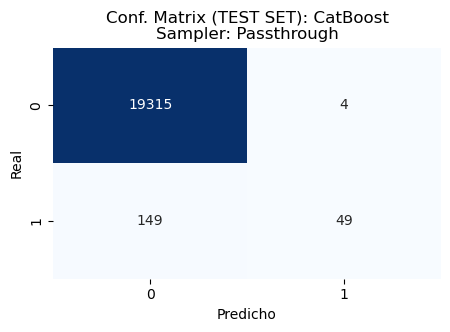

------------------------------------------------------------

> Evaluando: #2 RusBoost (Under_NearMiss)
  Tiempo de entrenamiento final: 2.42 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4712 (Métrica de Ref.)
    ROC-AUC: 0.6930
    Lift@10%: 1.97
    Gain@10%: 0.1970

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     19319
           1       0.02      0.92      0.03       198

    accuracy                           0.47     19517
   macro avg       0.51      0.69      0.33     19517
weighted avg       0.99      0.47      0.63     19517



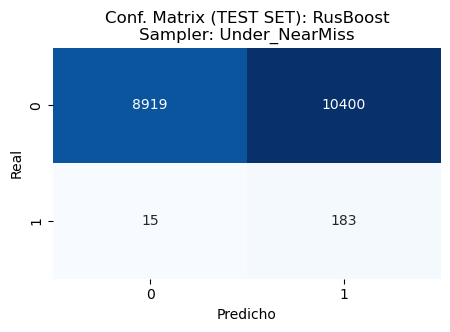

------------------------------------------------------------

> Evaluando: #3 CatBoost (Under_TomekLinks)
  Tiempo de entrenamiento final: 34.44 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4345 (Métrica de Ref.)
    ROC-AUC: 0.9138
    Lift@10%: 7.17
    Gain@10%: 0.7172

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.84      0.25      0.38       198

    accuracy                           0.99     19517
   macro avg       0.92      0.62      0.69     19517
weighted avg       0.99      0.99      0.99     19517



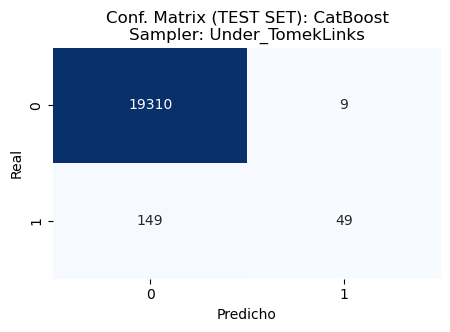

------------------------------------------------------------

> Evaluando: #4 LightGBM (Over_ROS)
  Tiempo de entrenamiento final: 0.46 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4292 (Métrica de Ref.)
    ROC-AUC: 0.9171
    Lift@10%: 7.43
    Gain@10%: 0.7424

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19319
           1       0.43      0.42      0.43       198

    accuracy                           0.99     19517
   macro avg       0.71      0.71      0.71     19517
weighted avg       0.99      0.99      0.99     19517



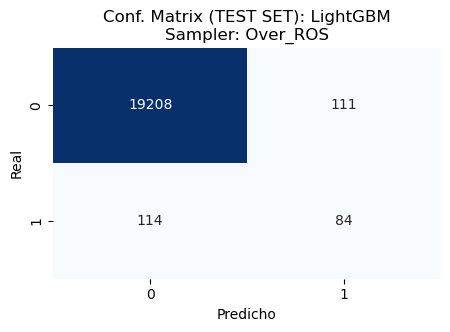

------------------------------------------------------------

> Evaluando: #5 BalancedRandomForest (Under_NearMiss)
  Tiempo de entrenamiento final: 0.81 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4290 (Métrica de Ref.)
    ROC-AUC: 0.6886
    Lift@10%: 2.02
    Gain@10%: 0.2020

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      0.15      0.26     19319
           1       0.01      0.96      0.02       198

    accuracy                           0.16     19517
   macro avg       0.50      0.55      0.14     19517
weighted avg       0.99      0.16      0.26     19517



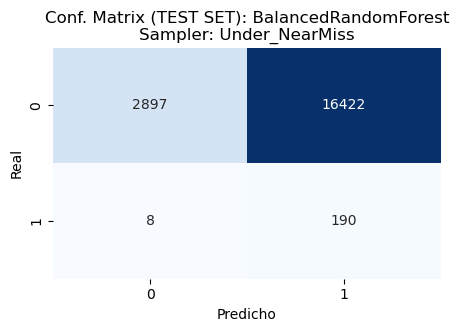

------------------------------------------------------------

Generando Curvas de Negocio Comparativas (Gain & Lift) en el Conjunto de Test...


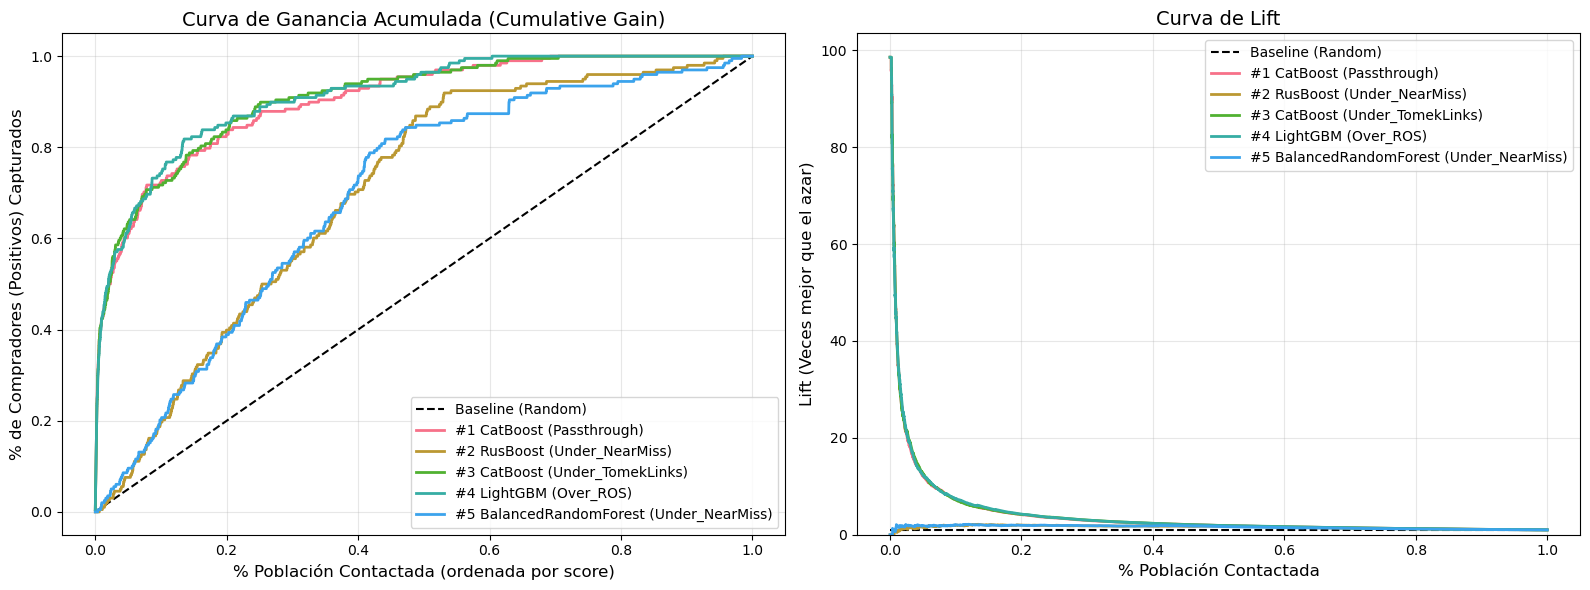


Análisis completado.


In [96]:
analizar_top_5(df_preproc, 'es_cliente', 'results/samplers_fase1')

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">

<h4 style="font-weight:bold">📌 Conclusiones</h4>

<p>
El análisis comparativo entre el dataset original y su versión transformada mediante PCA muestra de forma consistente que 
<strong>el dataset sin reducción de dimensionalidad ofrece un mayor poder predictivo</strong>, especialmente en modelos no lineales y basados en árboles como <em>CatBoost</em> y <em>LightGBM</em>. 
La aplicación de PCA, aunque útil para modelos lineales, implica una pérdida de información relevante para la detección de la clase minoritaria, penalizando métricas clave como <em>PR-AUC</em> y <em>Lift</em>.
</p>

<p>
Adicionalmente, el dataset genérico presenta ventajas claras en términos de 
<strong>interpretabilidad, trazabilidad de variables y reutilización en fases posteriores</strong> del proyecto. 
Por estos motivos, se adopta el dataset sin PCA como referencia para las siguientes etapas de modelado y optimización.
</p>

<strong>Modelos con mejor rendimiento (dataset sin PCA)</strong>
<ul>
    <li><strong>CatBoost + Passthrough</strong>: mejor PR-AUC global (0.4393) y Lift competitivo (7.27).</li>
    <li><strong>RUSBoost + Under_NearMiss</strong>: destaca por un recall muy elevado (88.07%), aunque con importantes limitaciones de negocio.</li>
    <li><strong>LightGBM + RandomOverSampler</strong>: equilibrio sólido entre PR-AUC (0.4215) y Lift (7.35).</li>
</ul>

<strong>Limitaciones detectadas</strong>
<ul>
    <li><strong>NearMiss</strong> provoca una degradación severa del Lift, incluso en modelos robustos (por ejemplo, CatBoost desciende de 7.27 a 1.52).</li>
    <li>La aplicación de <strong>PCA reduce de forma significativa el PR-AUC</strong> en los modelos con mejor desempeño.</li>
    <li><strong>RUSBoost</strong> maximiza recall, pero genera resultados poco accionables debido a su bajo Lift.</li>
    <li>Los <strong>modelos lineales</strong> muestran un rendimiento limitado, tanto con como sin balanceo interno.</li>
    <li>Algunas técnicas presentan un <strong>coste computacional elevado</strong> (TomekLinks, SMOTE-ENN, SMOTE-Tomek), así como CatBoost en menor medida.</li>
</ul>

<strong>Hallazgos clave</strong>
<ul>
    <li>Varios modelos muestran un rendimiento competitivo <strong>sin necesidad de aplicar sampling externo</strong>.</li>
    <li>Los enfoques de balanceo <strong>moderados o “suaves”</strong> tienden a mejorar las métricas sin penalizar el Lift.</li>
    <li><strong>CatBoost</strong> se consolida como un modelo consistente y robusto en distintos escenarios.</li>
    <li>El <strong>undersampling agresivo</strong> compromete seriamente las métricas de negocio, pese a mejorar recall.</li>
</ul>

<strong>Selección de modelos para fases posteriores</strong>
<p>
A partir de estos resultados se descartan configuraciones basadas en <em>NearMiss</em>, debido a su baja precisión y escaso valor operativo. 
Se seleccionan dos modelos con alto rendimiento global y perfiles complementarios, adecuados para ser combinados en un esquema de ensamblaje:
</p>

<ol>
    <li><strong>CatBoost (Passthrough)</strong>: maximiza el PR-AUC y ofrece una señal robusta y estable.</li>
    <li><strong>LightGBM (RandomOverSampler)</strong>: proporciona un equilibrio sólido entre métricas predictivas y métricas de negocio.</li>
</ol>

</div>


<h3>Tratamiento del desbalance</h3>

<p>
Tras analizar exhaustivamente el rendimiento de los modelos y configuraciones de muestreo, se observa que 
<strong>CatBoost en modo <i>passthrough</i></strong> destaca de forma consistente por su elevada capacidad predictiva, 
su estabilidad en métricas clave (especialmente PR-AUC y Lift) y, de forma notable, por su 
<strong>bajo coste computacional relativo</strong>. Estas características lo convierten en el candidato más sólido para liderar 
la siguiente fase del pipeline de modelado.
</p>

<p>
En paralelo, se ha comprobado que <strong>LightGBM combinado con Random Oversampling (ROS)</strong> produce resultados altamente 
competitivos, con un rendimiento estable en PR-AUC y Lift y una variabilidad controlada según el nivel de oversampling. 
El análisis sugiere que configuraciones con ROS entre el 0.5 y el 1.0 representan un punto óptimo entre precisión, 
recall y eficiencia temporal. No obstante, el desempeño del <strong>LightGBM en modo passthrough</strong> muestra que esta alternativa 
también puede resultar competitiva y no debe descartarse en fases posteriores, especialmente en estructuras de ensamblado 
como stacking. En este apartado, revisaremos las mejores configuraciones de ROS para LightGBM.
</p>

In [97]:
# ============================================================================
# Re-Definicion de modelos
# ============================================================================
def get_model_configs(random_state=42):
    
    # Modelos lineales
    lr = LogisticRegression(solver='liblinear', random_state=random_state)
    
    # Modelos Base
    lgbm = LGBMClassifier(n_jobs=-1, random_state=random_state, verbosity=-1)
    #cat = CatBoostClassifier(verbose=0, random_state=random_state, allow_writing_files=False)

    #Ensambles
    rusb = RUSBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50, learning_rate=1.0, 
        sampling_strategy=None, random_state=42
    )

    models = {
        'LightGBM': lgbm,
        #'CatBoost': cat
    }
    return models

# ============================================================================
# Re-Definicion de samplers
# ============================================================================
def get_sampler_configs(random_state=42):
    return {
        # Sin samplers
        'Passthrough': 'passthrough',
        # Over Sampling
        'Over_ROS_02': RandomOverSampler(sampling_strategy=0.02, random_state=random_state),
        'Over_ROS_03': RandomOverSampler(sampling_strategy=0.03, random_state=random_state),
        'Over_ROS_05': RandomOverSampler(sampling_strategy=0.05, random_state=random_state),
        'Over_ROS_1': RandomOverSampler(sampling_strategy=0.1, random_state=random_state),
        'Over_ROS_2': RandomOverSampler(sampling_strategy=0.2, random_state=random_state),
        'Over_ROS_3': RandomOverSampler(sampling_strategy=0.3, random_state=random_state),
    }

In [98]:
file_path_results = 'results/samplers_fase2/summary_results.csv'
file_path = 'results/samplers_fase2'
#df_results = ejecutar_experimento_screening(df_preproc, 'es_cliente', file_path, 5, test_size=0.1)

In [99]:
file_path_results = 'results/samplers_fase2/summary_results.csv'
file_path = 'results/samplers_fase2'
visualizar_resultados_completos(file_path_results, metricas_clave=['F1_Score', 'Recall', 'Lift_Top10'])


 ANÁLISIS DETALLADO TOP 3 MODELOS - EVALUACIÓN FINAL EN Conjunto de Test (Hold-out)

> Evaluando: #1 LightGBM (Over_ROS_05)
  Tiempo de entrenamiento final: 0.40 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4296 (Métrica de Ref.)
    ROC-AUC: 0.9196
    Lift@10%: 7.48
    Gain@10%: 0.7475

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.66      0.33      0.44       198

    accuracy                           0.99     19517
   macro avg       0.83      0.66      0.72     19517
weighted avg       0.99      0.99      0.99     19517



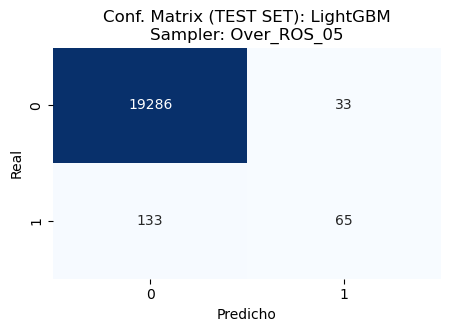

------------------------------------------------------------

> Evaluando: #2 LightGBM (Over_ROS_1)
  Tiempo de entrenamiento final: 0.41 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4292 (Métrica de Ref.)
    ROC-AUC: 0.9171
    Lift@10%: 7.43
    Gain@10%: 0.7424

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19319
           1       0.43      0.42      0.43       198

    accuracy                           0.99     19517
   macro avg       0.71      0.71      0.71     19517
weighted avg       0.99      0.99      0.99     19517



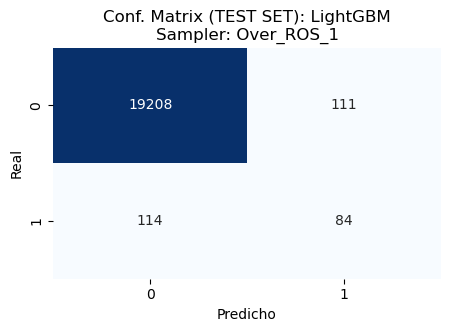

------------------------------------------------------------

> Evaluando: #3 LightGBM (Over_ROS_02)
  Tiempo de entrenamiento final: 0.45 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4277 (Métrica de Ref.)
    ROC-AUC: 0.9203
    Lift@10%: 7.33
    Gain@10%: 0.7323

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.84      0.28      0.42       198

    accuracy                           0.99     19517
   macro avg       0.91      0.64      0.71     19517
weighted avg       0.99      0.99      0.99     19517



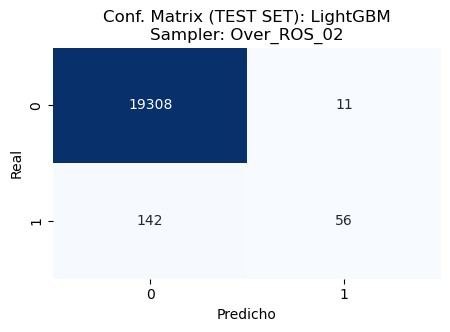

------------------------------------------------------------

> Evaluando: #4 LightGBM (Over_ROS_03)
  Tiempo de entrenamiento final: 0.59 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4277 (Métrica de Ref.)
    ROC-AUC: 0.9167
    Lift@10%: 7.28
    Gain@10%: 0.7273

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.74      0.29      0.41       198

    accuracy                           0.99     19517
   macro avg       0.87      0.64      0.71     19517
weighted avg       0.99      0.99      0.99     19517



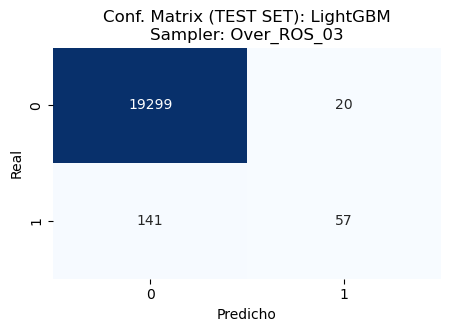

------------------------------------------------------------

> Evaluando: #5 LightGBM (Over_ROS_2)
  Tiempo de entrenamiento final: 0.60 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4174 (Métrica de Ref.)
    ROC-AUC: 0.9170
    Lift@10%: 7.38
    Gain@10%: 0.7374

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19319
           1       0.22      0.54      0.31       198

    accuracy                           0.98     19517
   macro avg       0.61      0.76      0.65     19517
weighted avg       0.99      0.98      0.98     19517



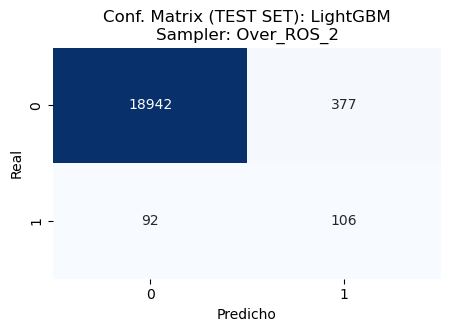

------------------------------------------------------------

Generando Curvas de Negocio Comparativas (Gain & Lift) en el Conjunto de Test...


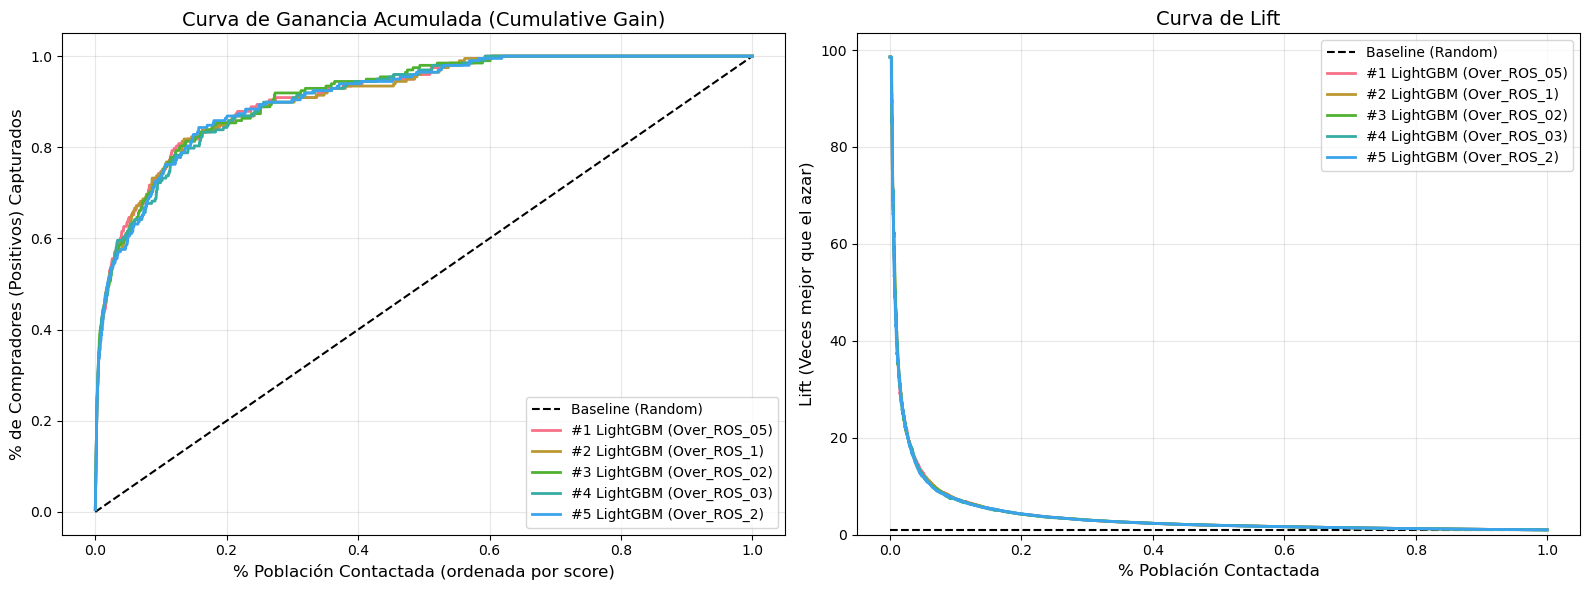


Análisis completado.


In [100]:
analizar_top_5(df_preproc, 'es_cliente', 'results/samplers_fase2')

<div style="
    background-color: #e8f5e9; /* Verde muy clarito */
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌Conclusiones</h4>
<p>
Se selecciona <strong>LightGBM en modo <i>passthrough</i></strong> debido a su simplicidad y ausencia de distorsiones inducidas por técnicas de muestreo, lo que permite disponer de una referencia limpia y estable. Asimismo, se incorporan al screening los dos modelos mejor clasificados con técnicas de oversampling (<strong>ROS 0.10</strong> y <strong>ROS 0.05</strong>), dado que representan un equilibrio adecuado entre precisión, recall y estabilidad. 
</p>

<p>
A priori, el modelo con <strong>ROS 0.10</strong>, que exhibe un recall superior, podría complementar de forma más efectiva a <strong>CatBoost</strong> dentro de esquemas de ensamblado, proporcionando una combinación más robusta entre sensibilidad y precisión. En el siguiente apartado se explorarán técnicas avanzadas de <i>fusión de modelos</i> (stacking y variantes), con el objetivo de identificar sinergias entre estos clasificadores y maximizar el rendimiento global.
</p>

<h3>Evaluacion de ensambles</h3>

<p>
Se evalúan diversas técnicas de <strong>ensamblado de modelos</strong> aplicadas a los clasificadores más prometedores identificados en fases previas —<strong>LightGBM</strong> y <strong>CatBoost</strong>— mediante estrategias de <strong>Stacking</strong>, <strong>Voting</strong> y <strong>Bagging</strong>. El objetivo principal de este análisis es determinar si la combinación estructurada de modelos permite mejorar de forma consistente las métricas clave del problema, en particular <strong>PR-AUC</strong> y <strong>recall</strong>, en un contexto caracterizado por un fuerte desbalance de clases.
</p>

<p>
La literatura reciente ha mostrado que los métodos de ensamblado pueden ofrecer ganancias significativas en tareas de predicción de propensión de compra y clasificación desbalanceada, al combinar modelos con sesgos inductivos complementarios y reducir la varianza de las predicciones (Singh et al., 2024; Liu et al., 2024). En este trabajo, se exploran múltiples configuraciones que varían tanto el tipo de ensamblado como el tratamiento del desbalance aplicado a los clasificadores base.
</p>

<ul>
    <li>
        <strong>Stacking de primer nivel</strong>, que combina <i>CatBoost (passthrough)</i> con distintas variantes de LightGBM, incluyendo configuraciones con oversampling explícito (<i>RandomOverSampler</i> con proporciones del <code>0.05</code>, <code>0.10</code> y <code>0.20</code>) y versiones sin muestreo, con el fin de preservar la distribución original de la clase mayoritaria.
    </li>
    <li>
        <strong>Stacking con mecanismos internos de balanceo</strong>, en el que ambos modelos se evalúan utilizando sus estrategias internas de compensación del desbalance (<i>auto_class_weights</i> en CatBoost, <i>scale_pos_weight</i> y <i>class_weight='balanced'</i> en LightGBM). Estas configuraciones permiten comparar el efecto del balanceo implícito frente al oversampling externo.
    </li>
    <li>
        <strong>Voting Classifier con soft voting</strong>, planteado como una alternativa más sencilla y transparente, donde las probabilidades predichas por ambos modelos se combinan mediante un promedio ponderado. Se asigna un mayor peso a CatBoost, atendiendo a su mejor rendimiento individual observado en fases previas.
    </li>
    <li>
        <strong>Bagging de modelos base</strong>, aplicado tanto a CatBoost como a LightGBM mediante la generación de múltiples clasificadores entrenados sobre distintas muestras bootstrap. Se incluyen variantes con diferente número de estimadores, porcentajes de muestreo reducidos (<i>70%</i>) y configuraciones optimizadas para reducir el coste computacional.
    </li>
</ul>

<p>
El conjunto de configuraciones evaluadas permite llevar a cabo un <strong>screening exhaustivo de arquitecturas de ensamblado</strong>, comparando de forma sistemática cómo interactúan ambos modelos bajo distintas estrategias de combinación, balanceo y agregación. Esta fase resulta clave para identificar soluciones que no solo maximicen el rendimiento medio, sino que presenten un comportamiento estable y robusto frente al desbalance extremo del problema.
</p>



In [101]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from catboost import CatBoostClassifier
import numpy as np
from sklearn.ensemble import BaggingClassifier

def get_model_configs(random_state=42):
    """
    Configuraciones de stacking y ensembles para probar
    """
    
    # -----------------------------------------------------
    # 1. STACKING BÁSICOS (CatBoost + LightGBM)
    # -----------------------------------------------------
    
    # Stacking 1.0: CatBoost (Passthrough) + LightGBM (ROS)
    # Objetivo: Combinar precisión de CatBoost con recall de LightGBM+ROS
    catboost_base = CatBoostClassifier(
        random_state=random_state,
        allow_writing_files=False,  # ← EVITA crear directorios
        train_dir=None  # ← También importante
    )
    lgbm_base = LGBMClassifier(
        random_state=random_state
    )
    
    lightgbm_ros_1 = make_pipeline(
        RandomOverSampler(sampling_strategy=0.1, random_state=random_state),
        LGBMClassifier(
            random_state=random_state
        )
    )
    
    stacking_cb_lgb_ros_1 = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm_ros', lightgbm_ros_1)
        ],
        final_estimator=LogisticRegression(
            solver='liblinear',
            random_state=random_state,
            class_weight='balanced'
        ),
        cv=3,
        n_jobs=-1,
        stack_method='predict_proba'
    )

    # Stacking 1.1: CatBoost (Passthrough) + LightGBM (ROS)
    # Objetivo: Combinar precisión de CatBoost con recall de LightGBM+ROS
    lightgbm_ros_05 = make_pipeline(
        RandomOverSampler(sampling_strategy=0.05, random_state=random_state),
        LGBMClassifier(
            random_state=random_state
        )
    )
    
    stacking_cb_lgb_ros_05 = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm_ros', lightgbm_ros_05)
        ],
        final_estimator=LogisticRegression(
            solver='liblinear',
            random_state=random_state,
            class_weight='balanced'
        ),
        cv=3,
        n_jobs=-1,
        stack_method='predict_proba'
    )

    # Stacking 1.2: CatBoost (Passthrough) + LightGBM (ROS)
    # Objetivo: Combinar precisión de CatBoost con recall de LightGBM+ROS
    lightgbm_ros_2 = make_pipeline(
        RandomOverSampler(sampling_strategy=0.2, random_state=random_state),
        LGBMClassifier(
            random_state=random_state
        )
    )
    
    stacking_cb_lgb_ros_2 = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm_ros', lightgbm_ros_2)
        ],
        final_estimator=LogisticRegression(
            solver='liblinear',
            random_state=random_state,
            class_weight='balanced'
        ),
        cv=3,
        n_jobs=-1,
        stack_method='predict_proba'
    )
    
    # Stacking 2: Ambos con Passthrough
    # Objetivo: Combinar sin alterar distribución original
    stacking_cb_lgb = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', LGBMClassifier(
                random_state=random_state
            ))
        ],
        final_estimator=LogisticRegression(
            solver='liblinear',
            random_state=random_state,
            class_weight='balanced'
        ),
        cv=3,
        n_jobs=-1
    )
    

    # AutoBalancing 
    cb_balanced_auto = CatBoostClassifier(auto_class_weights='Balanced', random_state=random_state)

    cb_balanced_scale = CatBoostClassifier(scale_pos_weight=98, random_state=random_state)

    lgbm_balanced_auto = LGBMClassifier(class_weight='balanced', random_state=random_state)

    lgbm_balanced_scale = LGBMClassifier(scale_pos_weight=98, random_state=random_state)

    #Meta
    lr = LogisticRegression(
            solver='liblinear',
            random_state=random_state,
            class_weight='balanced'
        )

    #Stacking 3: Con balanceos internos
    stacking_cb_lgb_ibscale =  StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_balanced_scale)
        ],
        final_estimator=lr,
        cv=3,
        n_jobs=-1
    )
    stacking_cb_lgb_ibauto =  StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_balanced_auto)
        ],
        final_estimator=lr,
        cv=3,
        n_jobs=-1
    )
    stacking_cb_ibauto_lgb =  StackingClassifier(
        estimators=[
            ('catboost', cb_balanced_auto),
            ('lightgbm', lgbm_base)
        ],
        final_estimator=lr,
        cv=3,
        n_jobs=-1
    )
    stacking_cb_ibscale_lgb =  StackingClassifier(
        estimators=[
            ('catboost', cb_balanced_scale),
            ('lightgbm', lgbm_base)
        ],
        final_estimator=lr,
        cv=3,
        n_jobs=-1
    )
    stacking_cb_ibscale_lgb_ibscale =  StackingClassifier(
        estimators=[
            ('catboost', cb_balanced_scale),
            ('lightgbm', lgbm_balanced_scale)
        ],
        final_estimator=lr,
        cv=3,
        n_jobs=-1
    )
    stacking_cb_ibscale_lgb_ibauto =  StackingClassifier(
        estimators=[
            ('catboost', cb_balanced_scale),
            ('lightgbm', lgbm_balanced_auto)
        ],
        final_estimator=lr,
        cv=3,
        n_jobs=-1
    )
    stacking_cb_ibauto_lgb_ibscale =  StackingClassifier(
        estimators=[
            ('catboost', cb_balanced_auto),
            ('lightgbm', lgbm_balanced_scale)
        ],
        final_estimator=lr,
        cv=3,
        n_jobs=-1
    )
    stacking_cb_ibauto_lgb_ibauto =  StackingClassifier(
        estimators=[
            ('catboost', cb_balanced_auto),
            ('lightgbm', lgbm_balanced_auto)
        ],
        final_estimator=lr,
        cv=3,
        n_jobs=-1
    )
    
    
    
    # -----------------------------------------------------
    # 3. VOTING CLASSIFIER (Alternativa a Stacking)
    # -----------------------------------------------------
    
    # Soft Voting: Promedio de probabilidades
    # Objetivo: Simplicidad y robustez
    voting_soft = VotingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', LGBMClassifier(
                random_state=random_state,
                n_jobs=-1,
                n_estimators=200
            ))
        ],
        voting='soft',
        weights=[1.0, 0.8],  # Peso mayor a CatBoost (más preciso)
        n_jobs=-1
    )
        
    # -----------------------------------------------------
    # 5. BAGGING DE MODELOS (Meta-Ensemble)
    # -----------------------------------------------------

    # ========== BAGGING BÁSICO ==========
    
    # A) Bagging de CatBoost
    Bagging_CatBoost = BaggingClassifier(
        estimator=catboost_base,
        n_estimators=10,      # 10 modelos
        random_state=random_state,
        n_jobs=-1             # Paralelizar los 10 modelos
    )
    
    # B) Bagging de LightGBM
    Bagging_LightGBM_10 = BaggingClassifier(
        estimator=LGBMClassifier(
                random_state=random_state
            ),
        n_estimators=10,
        random_state=random_state,
        n_jobs=-1
    )
    
    # ========== BAGGING CON BOOTSTRAP DIFERENTE ==========
    
    # C) Bagging con menos muestras (70%)
    Bagging_CatBoost_70pct = BaggingClassifier(
        estimator=catboost_base,
        n_estimators=10,
        max_samples=0.7,      # Solo 70% de datos por modelo
        random_state=random_state,
        n_jobs=-1
    )
    
    
    # ========== BAGGING CON MÁS MODELOS ==========
    
    # E) Bagging con más estimadores (pero más rápido)
    Bagging_LightGBM_40 = BaggingClassifier(
        estimator=LGBMClassifier(
            n_estimators=50,      # Modelos base más simples
            random_state=random_state,
            n_jobs=1,
            verbose=-1
        ),
        n_estimators=40,      # 20 modelos LightGBM
        random_state=random_state,
        n_jobs=-1
    )

    # -----------------------------------------------------
    # RETORNAR TODAS LAS CONFIGURACIONES
    # -----------------------------------------------------
    
    return {
        # Stackings básicos
        'Stacking_CatBoost_LightGBM_ROS_05': stacking_cb_lgb_ros_05,
        'Stacking_CatBoost_LightGBM_ROS_2': stacking_cb_lgb_ros_2,
        'Stacking_CatBoost_LightGBM': stacking_cb_lgb,
        'Stacking_CatBoost_LightGBM_InternalBalanceAuto': stacking_cb_lgb_ibauto,
        'Stacking_CatBoost_LightGBM_InternalBalanceScale': stacking_cb_lgb_ibscale,
        'Stacking_CatBoost_InternalBalanceAuto_LightGBM': stacking_cb_ibauto_lgb,
        'Stacking_CatBoost_InternalBalanceScale_LightGBM': stacking_cb_ibscale_lgb,
        'Stacking_CatBoost_InternalBalanceScale_LightGBM_InternalBalanceScale': stacking_cb_ibscale_lgb_ibscale,
        'Stacking_CatBoost_InternalBalanceAuto_LightGBM_InternalBalanceScale': stacking_cb_ibauto_lgb_ibscale,
        'Stacking_CatBoost_InternalBalanceAuto_LightGBM_InternalBalanceAuto': stacking_cb_ibauto_lgb_ibauto,
        'Stacking_CatBoost_InternalBalanceScale_LightGBM_InternalBalanceAuto': stacking_cb_ibscale_lgb_ibauto,
        
        # Voting classifiers
        'Voting_Soft_CatBoost_LightGBM': voting_soft,
        
        # Ensembles avanzados
        'Bagging_CatBoost': Bagging_CatBoost,
        'Bagging_LightGBM_40': Bagging_LightGBM_40
    }
    
# ============================================================================
# Re-Definicion de samplers
# ============================================================================
def get_sampler_configs(random_state=42):
    return {
        # Sin samplers
        'Passthrough': 'passthrough',
    }

In [102]:
file_path_results = 'results/samplers_fase3/summary_results.csv'
file_path = 'results/samplers_fase3'

In [103]:
#df_results = ejecutar_experimento_screening(df_preproc, 'es_cliente', file_path, 5, test_size=0.1)

In [104]:
file_path_results = 'results/samplers_fase3/summary_results.csv'
file_path = 'results/samplers_fase3'
visualizar_resultados_completos(file_path_results, metricas_clave=['F1_Score', 'Recall', 'Lift_Top10'])


 ANÁLISIS DETALLADO TOP 3 MODELOS - EVALUACIÓN FINAL EN Conjunto de Test (Hold-out)

> Evaluando: #1 Stacking_CatBoost_LightGBM (Passthrough)
  Tiempo de entrenamiento final: 37.76 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4361 (Métrica de Ref.)
    ROC-AUC: 0.9183
    Lift@10%: 7.43
    Gain@10%: 0.7424

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     19319
           1       0.12      0.66      0.20       198

    accuracy                           0.95     19517
   macro avg       0.56      0.80      0.59     19517
weighted avg       0.99      0.95      0.97     19517



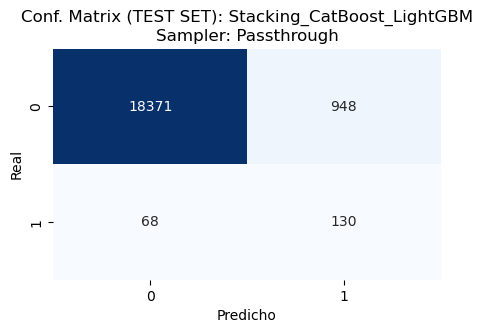

------------------------------------------------------------

> Evaluando: #2 Voting_Soft_CatBoost_LightGBM (Passthrough)
  Tiempo de entrenamiento final: 17.23 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4396 (Métrica de Ref.)
    ROC-AUC: 0.9132
    Lift@10%: 7.53
    Gain@10%: 0.7525

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.89      0.25      0.39       198

    accuracy                           0.99     19517
   macro avg       0.94      0.63      0.69     19517
weighted avg       0.99      0.99      0.99     19517



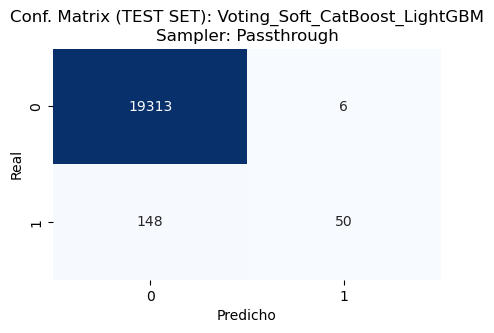

------------------------------------------------------------

> Evaluando: #3 Bagging_CatBoost (Passthrough)
  Tiempo de entrenamiento final: 108.22 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4459 (Métrica de Ref.)
    ROC-AUC: 0.9093
    Lift@10%: 7.38
    Gain@10%: 0.7374

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.96      0.22      0.36       198

    accuracy                           0.99     19517
   macro avg       0.97      0.61      0.68     19517
weighted avg       0.99      0.99      0.99     19517



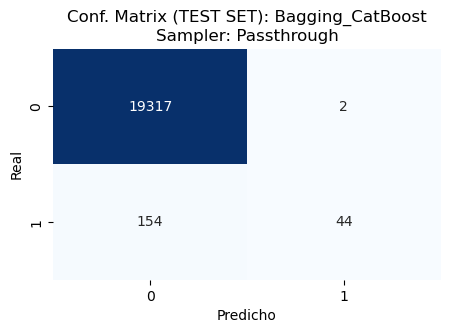

------------------------------------------------------------

> Evaluando: #4 Stacking_CatBoost_LightGBM_ROS_05 (Passthrough)
  Tiempo de entrenamiento final: 37.40 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4392 (Métrica de Ref.)
    ROC-AUC: 0.9201
    Lift@10%: 7.48
    Gain@10%: 0.7475

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     19319
           1       0.09      0.69      0.17       198

    accuracy                           0.93     19517
   macro avg       0.55      0.81      0.56     19517
weighted avg       0.99      0.93      0.96     19517



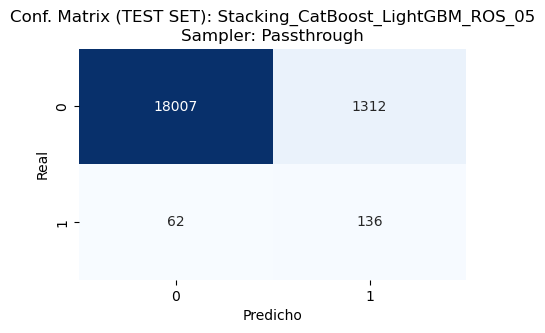

------------------------------------------------------------

> Evaluando: #5 Stacking_CatBoost_LightGBM_InternalBalanceAuto (Passthrough)
  Tiempo de entrenamiento final: 38.85 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4383 (Métrica de Ref.)
    ROC-AUC: 0.9108
    Lift@10%: 7.33
    Gain@10%: 0.7323

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     19319
           1       0.06      0.79      0.11       198

    accuracy                           0.86     19517
   macro avg       0.53      0.83      0.52     19517
weighted avg       0.99      0.86      0.92     19517



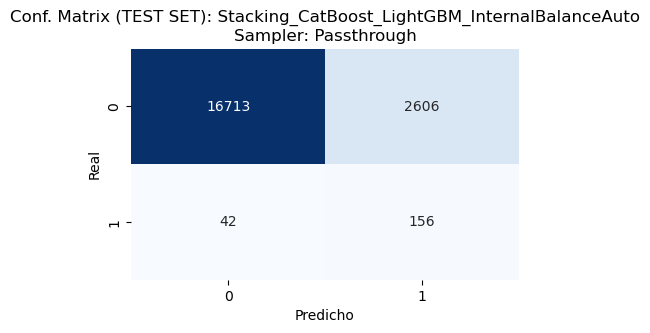

------------------------------------------------------------

Generando Curvas de Negocio Comparativas (Gain & Lift) en el Conjunto de Test...


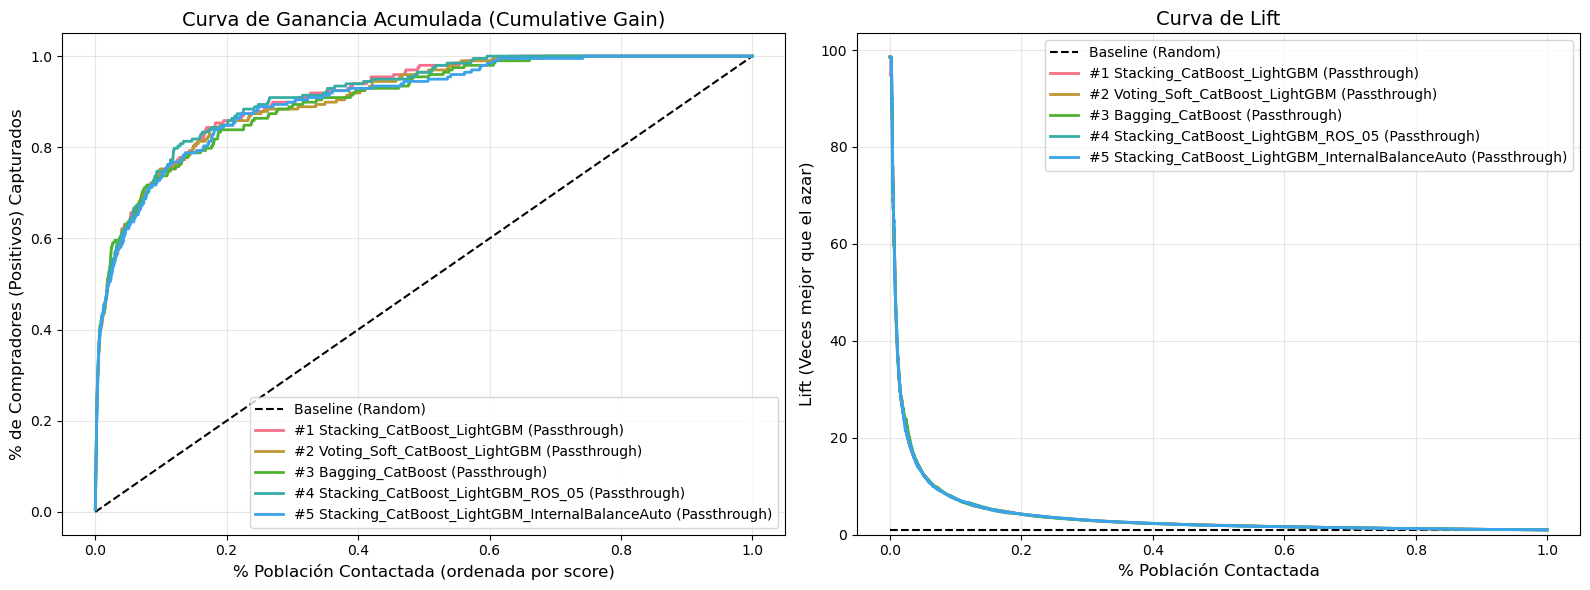


Análisis completado.


In [105]:
analizar_top_5(df_preproc, 'es_cliente', 'results/samplers_fase3')

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
    <h4 style="font-weight:bold">📌Conclusiones</h4>
    <p>
    Los resultados obtenidos confirman que la aplicación de técnicas de <strong>stacking</strong> mejora de forma consistente el rendimiento predictivo del sistema. 
    Además, se observa una <strong>baja divergencia entre las métricas de validación y las del conjunto de test</strong>, lo que indica un buen comportamiento en términos de generalización.
    </p>
    <p>
    De manera destacada, las configuraciones entrenadas sobre los <strong>datasets sin alterar</strong> —esto es, sin aplicar técnicas de muestreo ni mecanismos internos de balanceo— presentan los mejores resultados globales. 
    Este comportamiento sugiere que preservar la distribución original de los datos permite a los modelos capturar patrones relevantes sin introducir ruido artificial ni distorsiones en la señal predictiva.
    </p>
    <p>
    Entre todas las combinaciones evaluadas, el <strong>stacking de CatBoost y LightGBM sin balanceo interno ni muestreo externo</strong> emerge como la alternativa más equilibrada. 
    Esta configuración aprovecha de forma complementaria la <i>alta precisión</i> característica de CatBoost y el <i>mayor recall</i> aportado por LightGBM cuando se entrena sobre datos no manipulados.
    </p>
    <p>
    Si bien algunas configuraciones alcanzan valores de <i>lift</i> ligeramente superiores o muestran un rendimiento puntual algo mejor sobre el conjunto de test —como <code>Stacking_CatBoost_LightGBM_ROS_05</code>—, se selecciona finalmente <strong>Stacking_CatBoost_LightGBM</strong> por su <strong>alto rendimiento global</strong>, la <strong>ausencia de datos generados artificialmente</strong> y su <strong>mayor adecuación para fases posteriores de optimización, interpretación y explotación del modelo</strong>.
    </p>
</div>


<h3>Selección y evaluación del meta-estimador en el esquema de stacking</h3>

<p>
En esta fase se analiza el impacto de distintos <strong>meta-estimadores</strong> sobre el rendimiento del esquema de <strong>stacking</strong> previamente seleccionado. 
El objetivo principal es identificar qué modelo final —responsable de integrar las predicciones generadas por <strong>CatBoost</strong> y <strong>LightGBM</strong>— proporciona la mayor capacidad discriminativa y estabilidad bajo un marco de validación consistente.
</p>

<p>
Para ello, se define un conjunto amplio y heterogéneo de configuraciones que abarca desde <strong>enfoques lineales</strong> clásicos —como <i>Logistic Regression</i> en sus variantes estándar, balanceada y con ajuste automático mediante <code>LogisticRegressionCV</code>— hasta modelos calibrados orientados a mejorar la calidad de las probabilidades estimadas, como <i>RidgeClassifier</i> y <i>LinearSVC</i> con calibración sigmoide.
</p>

<p>
Asimismo, se incorporan <strong>meta-estimadores no lineales</strong> de mayor capacidad expresiva, incluyendo <i>Random Forest</i>, <i>Gradient Boosting</i>, <i>XGBoost</i> con corrección explícita del desbalance de clases y un <i>MLP</i> neuronal de arquitectura simple. 
Como alternativa adicional, se evalúa un meta-modelo basado en <i>LightGBM</i>, ajustado mediante el parámetro <code>scale_pos_weight</code> para gestionar el desbalance de forma interna.
</p>

<p>
Cada uno de estos algoritmos se integra como estimador final dentro del mismo <strong>stacking base</strong>, compuesto por <strong>CatBoost</strong> y <strong>LightGBM</strong> entrenados sin técnicas de muestreo. 
Este diseño permite evaluar de manera controlada y comparable el efecto específico de cada meta-estimador sobre la combinación de ambos modelos.
</p>

<p>
La experimentación se restringe al enfoque <strong>passthrough</strong>, dado que los análisis previos demostraron que evitar el muestreo externo produce resultados más estables y con mejor rendimiento global. 
En conjunto, esta exploración permite seleccionar el meta-estimador que maximiza la calidad del ensamblado final, sentando las bases para la fase posterior de ajuste fino y evaluación definitiva del modelo.
</p>



In [106]:
from sklearn.neural_network import MLPClassifier
def get_model_configs(random_state=42):
    """
    Configuraciones de stacking y ensembles para probar
    """
   
    #Metas
    # 1. LogisticRegression (baseline)
    LR_balanced = LogisticRegression(
        solver='liblinear',
        class_weight='balanced',
        C=0.1,
        max_iter=1000,
        random_state=random_state
    )
    
    LR_simple = LogisticRegression(
        solver='liblinear',
        max_iter=1000,
        random_state=random_state
    )
    
    # LogisticRegressionCV (auto-tune)
    LR_CV_PR = LogisticRegressionCV(
        cv=3,
        scoring='average_precision',  # PR-AUC focus
        class_weight='balanced',
        solver='liblinear',
        max_iter=1000,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Ridge calibrado (robusto a correlación)
    Ridge_calib = CalibratedClassifierCV(
            estimator=RidgeClassifier(alpha=1.0, class_weight='balanced'),
            method='sigmoid',  # o 'isotonic'
            cv=3  # Calibration CV
    )
    
    # LinearSVC calibrado (márgenes grandes)
    LinearSVC_calib = CalibratedClassifierCV(
        LinearSVC(class_weight='balanced', max_iter=10000),
        method='sigmoid',
        cv=3
    )
    
    # RandomForest simple
    RF_simple = RandomForestClassifier(
        n_estimators=50,
        max_depth=5,  # Controlar complejidad
        class_weight='balanced',
        random_state=random_state,
        n_jobs=-1
    )
    
    # LightGBM con scale_pos_weight
    LGB_scale = LGBMClassifier(
        scale_pos_weight=99,  # 1% positivos → 99
        n_estimators=50,
        max_depth=3,  # Conservador
        random_state=random_state,
        n_jobs=1,  # Meta-modelo no necesita paralelismo
        verbose=-1
    )
    
    # GradientBoosting (intermedio)
    GB_simple = GradientBoostingClassifier(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=3,
        random_state=random_state
    )
    
    # XGBoost con scale
    XGB_scale = XGBClassifier(
        scale_pos_weight=99,
        n_estimators=50,
        max_depth=3,
        learning_rate=0.1,
        random_state=random_state,
        eval_metric='logloss'
    )

    MLP_simple = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

    # Modelos Base
    catboost_base = CatBoostClassifier(
        random_state=random_state,
        allow_writing_files=False,  # ← EVITA crear directorios
        train_dir=None  # ← También importante
    )
    lgbm_base = LGBMClassifier(
        random_state=random_state
    )
    
    # Stackings
    stacking_cb_lgb_meta_lr_bal = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= LR_balanced,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_LR_simple = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= LR_simple,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_LR_CV_PR = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= LR_CV_PR,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_Ridge_calib = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= Ridge_calib,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_LinearSVC_calib = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= LinearSVC_calib,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_RF_simple = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= RF_simple,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_LGB_scale = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= LGB_scale,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_GB_simple = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= GB_simple,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_XGB_scale = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= XGB_scale,
        cv=3,
        n_jobs=-1
    )

    stacking_cb_lgb_meta_MLP_simple = StackingClassifier(
        estimators=[
            ('catboost', catboost_base),
            ('lightgbm', lgbm_base)
        ],
        final_estimator= MLP_simple,
        cv=3,
        n_jobs=-1
    )
    # -----------------------------------------------------
    # RETORNAR TODAS LAS CONFIGURACIONES
    # -----------------------------------------------------
    
    return {
        # Stackings con metas basicas
        'Stacking_CatBoost_LightGBM_meta_LR_balanced': stacking_cb_lgb_meta_lr_bal,
        'Stacking_CatBoost_LightGBM_meta_LR_simple': stacking_cb_lgb_meta_LR_simple,
        'Stacking_CatBoost_LightGBM_meta_LR_cv': stacking_cb_lgb_meta_LR_CV_PR,
        'Stacking_CatBoost_LightGBM_meta_Ridge': stacking_cb_lgb_meta_Ridge_calib,
        'Stacking_CatBoost_LightGBM_meta_SVC': stacking_cb_lgb_meta_LinearSVC_calib,
        'Stacking_CatBoost_LightGBM_meta_RF': stacking_cb_lgb_meta_RF_simple,
        'Stacking_CatBoost_LightGBM_meta_LGB': stacking_cb_lgb_meta_LGB_scale,
        'Stacking_CatBoost_LightGBM_meta_GB': stacking_cb_lgb_meta_GB_simple,
        'Stacking_CatBoost_LightGBM_meta_XGB': stacking_cb_lgb_meta_XGB_scale,
        'Stacking_CatBoost_LightGBM_meta_MLP': stacking_cb_lgb_meta_MLP_simple
    }
    
# ============================================================================
# Re-Definicion de samplers
# ============================================================================
def get_sampler_configs(random_state=42):
    return {
        # Sin samplers
        'Passthrough': 'passthrough',
    }

In [107]:
file_path_results = 'results/samplers_fase4/summary_results.csv'
file_path = 'results/samplers_fase4'
#df_results = ejecutar_experimento_screening(df_preproc, 'es_cliente', file_path, 5, test_size=0.1)

In [108]:
file_path_results = 'results/samplers_fase4/summary_results.csv'
file_path = 'results/samplers_fase4'
visualizar_resultados_completos(file_path_results, metricas_clave=['F1_Score', 'Recall', 'Lift_Top10'])


 ANÁLISIS DETALLADO TOP 3 MODELOS - EVALUACIÓN FINAL EN Conjunto de Test (Hold-out)

> Evaluando: #1 Stacking_CatBoost_LightGBM_meta_LR_simple (Passthrough)
  Tiempo de entrenamiento final: 39.01 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4397 (Métrica de Ref.)
    ROC-AUC: 0.9179
    Lift@10%: 7.38
    Gain@10%: 0.7374

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.88      0.26      0.40       198

    accuracy                           0.99     19517
   macro avg       0.94      0.63      0.70     19517
weighted avg       0.99      0.99      0.99     19517



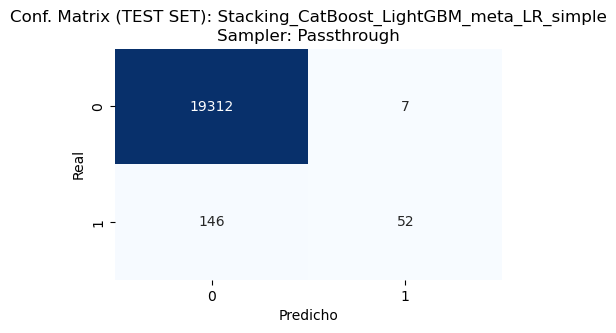

------------------------------------------------------------

> Evaluando: #2 Stacking_CatBoost_LightGBM_meta_MLP (Passthrough)
  Tiempo de entrenamiento final: 48.17 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4419 (Métrica de Ref.)
    ROC-AUC: 0.9182
    Lift@10%: 7.43
    Gain@10%: 0.7424

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.94      0.26      0.40       198

    accuracy                           0.99     19517
   macro avg       0.97      0.63      0.70     19517
weighted avg       0.99      0.99      0.99     19517



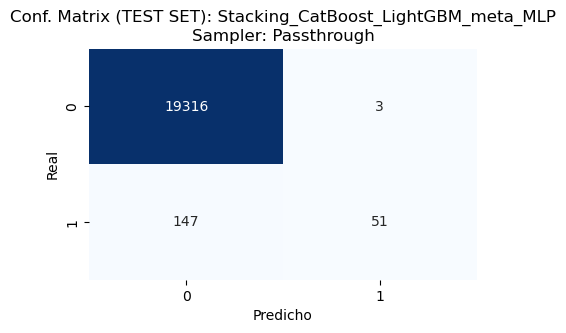

------------------------------------------------------------

> Evaluando: #3 Stacking_CatBoost_LightGBM_meta_SVC (Passthrough)
  Tiempo de entrenamiento final: 32.14 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4400 (Métrica de Ref.)
    ROC-AUC: 0.9182
    Lift@10%: 7.38
    Gain@10%: 0.7374

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.88      0.27      0.41       198

    accuracy                           0.99     19517
   macro avg       0.94      0.63      0.70     19517
weighted avg       0.99      0.99      0.99     19517



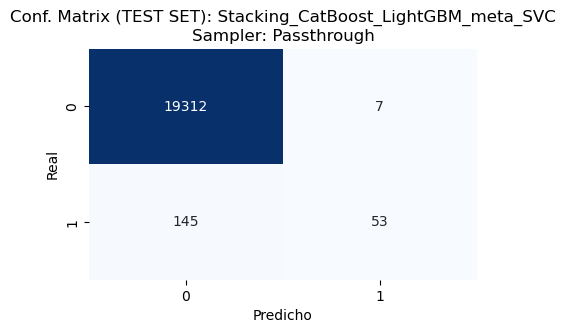

------------------------------------------------------------

> Evaluando: #4 Stacking_CatBoost_LightGBM_meta_LR_balanced (Passthrough)
  Tiempo de entrenamiento final: 32.85 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4379 (Métrica de Ref.)
    ROC-AUC: 0.9183
    Lift@10%: 7.43
    Gain@10%: 0.7424

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     19319
           1       0.15      0.62      0.24       198

    accuracy                           0.96     19517
   macro avg       0.57      0.79      0.61     19517
weighted avg       0.99      0.96      0.97     19517



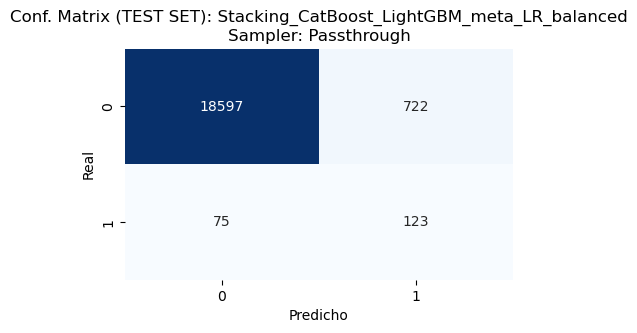

------------------------------------------------------------

> Evaluando: #5 Stacking_CatBoost_LightGBM_meta_Ridge (Passthrough)
  Tiempo de entrenamiento final: 35.20 s

  **Métricas Finales (Conjunto de Test):**
    PR-AUC: 0.4394 (Métrica de Ref.)
    ROC-AUC: 0.9160
    Lift@10%: 7.33
    Gain@10%: 0.7323

  Reporte de Clasificación (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19319
           1       0.91      0.27      0.41       198

    accuracy                           0.99     19517
   macro avg       0.95      0.63      0.71     19517
weighted avg       0.99      0.99      0.99     19517



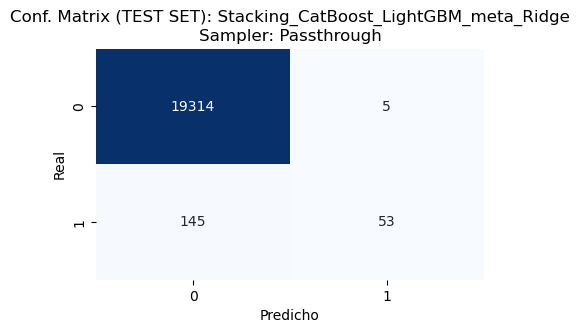

------------------------------------------------------------

Generando Curvas de Negocio Comparativas (Gain & Lift) en el Conjunto de Test...


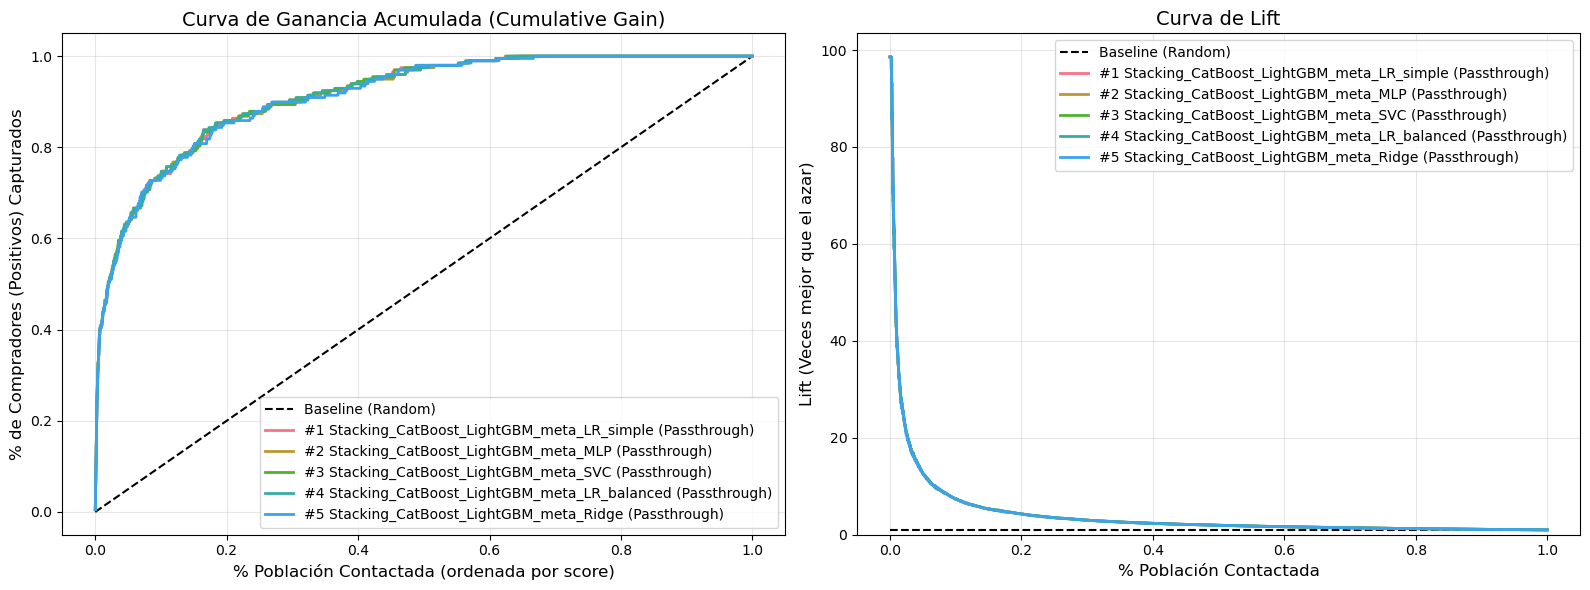


Análisis completado.


In [109]:
analizar_top_5(df_preproc, 'es_cliente', 'results/samplers_fase4')

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">

<h4 style="font-weight:bold">📌 Conclusiones</h4>

<p>
Los resultados obtenidos muestran que el meta-estimador basado en <strong>MLP</strong> alcanza el mejor desempeño global en términos de métricas agregadas. 
No obstante, su <strong>nivel de recall sensiblemente inferior</strong> supone una limitación relevante en el contexto de este trabajo, donde el objetivo principal es maximizar la identificación de usuarios con potencial de compra dentro de un dataset altamente desbalanceado.
</p>

<p>
Desde una perspectiva aplicada al negocio, la pérdida de recall implica dejar de detectar una proporción significativa de clientes reales, lo que reduce el impacto operativo del modelo. 
Por este motivo, y priorizando un equilibrio adecuado entre <strong>capacidad discriminativa, sensibilidad y estabilidad</strong>, se selecciona finalmente <strong>Logistic Regression con <code>class_weight='balanced'</code></strong> como meta-estimador óptimo para el esquema de stacking.
</p>

<p>
Esta elección se justifica no solo por su buen rendimiento global, sino también por su <strong>robustez, interpretabilidad</strong> y su comportamiento consistente entre validación y conjunto de prueba, características especialmente relevantes en un entorno académico y aplicado.
</p>

<p><strong>🏆 Modelo final seleccionado:</strong><br>
<strong>Stacking CatBoost + LightGBM con meta-estimador Logistic Regression (balanced)</strong></p>

<ul>
    <li><strong>PR-AUC:</strong> 0.4379</li>
    <li><strong>Recall:</strong> 0.62</li>
    <li><strong>F1-Score:</strong> 0.24</li>
    <li><strong>Lift@10%:</strong> 7.43</li>
</ul>

</div>


In [110]:
#!pip install optuna

<h2>Fase II - Ciclos iterativos de optimización</h2>

<h3> Ciclo 1 - Optimización de Hiperparámetros</h3>

<p>
La optimización de hiperparámetros constituye una etapa <strong>clave</strong> para maximizar el rendimiento de los modelos empleados y garantizar un equilibrio adecuado entre capacidad predictiva y generalización. En problemas de clasificación altamente desbalanceados, como el abordado en este trabajo, una optimización inadecuada puede derivar fácilmente en fenómenos de <em>overfitting</em> o <em>underfitting</em>, afectando de forma directa a métricas críticas como el <em>recall</em> y la <em>PR-AUC</em>
</p>

<strong>Estrategia y flujo de trabajo</strong>
<p>
La optimización se implementó siguiendo un enfoque jerárquico y coherente con la arquitectura de <em>stacking</em> seleccionada:
</p>

<ol>
    <li>
        <strong>Optimización individual de modelos base (Nivel 1):</strong>
        Los modelos <strong>LightGBM</strong> y <strong>CatBoost</strong> se optimizaron de forma independiente sobre el conjunto de entrenamiento-validación (<code>X_train_val</code>), ajustando sus hiperparámetros clave para maximizar el rendimiento individual.
    </li>
    <li>
        <strong>Generación de predicciones <em>Out-of-Fold</em> (OOF):</strong>
        Mediante una estrategia de <em>K-Fold Cross-Validation</em> con 5 particiones, cada modelo base generó predicciones sobre subconjuntos de datos no utilizados durante su entrenamiento. Estas predicciones OOF, libres de <em>data leakage</em>, se concatenaron para formar el conjunto de características del Nivel 2, denotado como <code>X_level2</code>.
    </li>
    <li>
        <strong>Optimización del meta-estimador (Nivel 2):</strong>
        El meta-modelo, basado en <strong>Regresión Logística</strong>, se optimizó utilizando <code>X_level2</code> como entrada y las etiquetas reales (<code>y_train_val</code>) como variable objetivo, asegurando coherencia con la estructura del ensamblado.
    </li>
</ol>

<strong>Metodología de búsqueda: Optuna</strong>
<p>
Para la búsqueda de hiperparámetros se empleó la librería <strong>Optuna</strong>, una herramienta de optimización moderna basada en <strong>Optimización Bayesiana</strong> mediante el método <em>Tree-structured Parzen Estimator (TPE)</em>, junto con mecanismos automáticos de <em>poda temprana</em> de configuraciones poco prometedoras (Akiba et&nbsp;al., 2019).
</p>

<p>
Este enfoque resulta más eficiente que métodos tradicionales como la <em>búsqueda en rejilla</em> o la <em>búsqueda aleatoria</em>, ya que utiliza el historial de evaluaciones previas para explorar de forma adaptativa el espacio de hiperparámetros, reduciendo significativamente el coste computacional y acelerando la convergencia hacia soluciones óptimas.
</p>

<p>
Además, Optuna permite la <strong>persistencia de los estudios</strong> mediante almacenamiento externo, lo que facilita la reanudación de experimentos, la comparación sistemática de resultados y el análisis posterior de las configuraciones más relevantes.
</p>

<p>
En todas las fases de optimización, el objetivo principal fue maximizar la métrica <strong>Área Bajo la Curva Precisión-Recuperación (PR-AUC)</strong>, al tratarse de una métrica más informativa que la ROC-AUC en escenarios de desbalance extremo y alineada con los objetivos de negocio del problema planteado.
</p>


In [111]:
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_recall_curve, auc
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from catboost import CatBoostError
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import TomekLinks
import pandas as pd
import numpy as np
import os
import json

# --- FUNCIONES DE UTILIDAD PARA PERSISTENCIA ---

def save_params_to_json(params, filename, folder='results/tuning/Defaultparams'):
    """Guarda un diccionario de parámetros en un archivo JSON."""
    os.makedirs(folder, exist_ok=True)
    filepath = os.path.join(folder, f"{filename}.json")
    with open(filepath, 'w') as f:
        json.dump(params, f, indent=4)
    return filepath

def load_params_from_json(filename, folder='results/tuning/Defaultparams'):
    """Carga un diccionario de parámetros de un archivo JSON si existe."""
    filepath = os.path.join(folder, f"{filename}.json")
    if os.path.exists(filepath):
        with open(filepath, 'r') as f:
            print(f"✔️ Cargando parámetros desde {filepath}")
            return json.load(f)
    return None

# ==============================================================================
# FASE 1: OPTIMIZACIÓN INDIVIDUAL DE MODELOS BASE (CON CARGA/GUARDADO)
# ==============================================================================
def get_params_and_model(model_name, trial, categorical_features=None, random_state=42):
    if model_name == 'LGBM':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 200, 1500, step=100),
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 10, 100),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'min_child_samples': trial.suggest_int('min_child_samples', 10, 80),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        }
        model = LGBMClassifier(random_state=random_state, n_jobs=-1, verbose=-1, **params)
    
    elif model_name == 'CatBoost':

        params = {
            'iterations': trial.suggest_int('iterations', 200, 1500, step=100),
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
            'depth': trial.suggest_int('depth', 3, 10),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10.0, log=True),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 50)
            
        }
        
        model = CatBoostClassifier(
            random_state=random_state, verbose=0, thread_count=-1, allow_writing_files=False, train_dir=None, 
            **params
        )
        
    elif model_name == 'LR_META':
        print("🛠️ Optuna: Configurando Logistic Regression (Meta)...")
        
        lr_params = {
            'C': trial.suggest_float('lr_C', 0.001, 0.1, log=True),
            'penalty': trial.suggest_categorical('lr_penalty', ['l1', 'l2']),
        }
        
        params = lr_params.copy()
        # Crear el modelo de Logistic Regression
        model = LogisticRegression(class_weight='balanced', **lr_params)
    else:
        raise ValueError("Modelo no soportado.")

    return params, model

def objective_base_model(trial, X, y, model_name, categorical_features, random_state=42):
    """
    Función objetivo de Optuna para optimizar un modelo base individual.
    MODIFICADA para CatBoost para evitar cross_val_predict y joblib.
    """
    # Validar inputs
    if model_name not in ['LGBM', 'CatBoost']:
        raise ValueError(f"Modelo {model_name} no soportado")
    
    params, model = get_params_and_model(model_name, trial, categorical_features)

    # 2. Evaluación (Cross-Validation)
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    y_pred_proba = np.zeros(len(y))

    if model_name in ['LGBM', 'CatBoost']:
        # Implementación manual del K-FOLD CV usando el modelo ya configurado
        for fold, (train_idx, val_idx) in enumerate(cv_strategy.split(X, y)):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
            # Clonar el modelo ya creado (más eficiente que reconstruirlo)
            model_fold = clone(model)
            
            try:
                model_fold.fit(X_train_fold, y_train_fold) 
            except Exception:  # Captura cualquier error (incluye CatBoostError)
                print(f"Error en {model_name} fold {fold}: {e}")
                raise optuna.TrialPruned()
                
            # Predecir OOF
            y_pred_proba[val_idx] = model_fold.predict_proba(X_val_fold)[:, 1]

    # 3. Cálculo del PR-AUC
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    return pr_auc

def run_base_tuning(X_train_val, y_train_val, model_name, categorical_features=None, folder_name="results/tuning/Defaultparams", n_trials=50, random_state=42):
    """Ejecuta la optimización de Optuna para un modelo base con persistencia."""
    filename = f"{model_name.lower()}_best_params"
    
    # 1. INTENTAR CARGAR RESULTADOS PREVIOS
    best_params = load_params_from_json(filename, folder_name)
    if best_params:
        print(f"🎉 Resultados cargados para {model_name}. No se requiere re-optimizar.")
        # Como no tenemos el score, devolvemos un valor dummy alto
        return best_params, 0.5 

    # 2. OPTIMIZAR
    print(f"\nIniciando Optuna para {model_name}...")

    # 1. Definición del Pruner (Estrategia de poda)
    # Detiene los trials que parecen malos al inicio
    pruner = MedianPruner(
    n_startup_trials=10,  # No podar los primeros 10 trials (para tener una base robusta)
    n_warmup_steps=10     # No podar hasta que se hayan completado 10 pasos (si usas CV, serán los primeros 2 folds)
    )

    # 2. Definición del Sampler (Estrategia de muestreo)
    # TPE es el muestreador bayesiano por defecto y el más eficiente
    # Usamos una semilla (seed) para asegurar la reproducibilidad de la búsqueda
    sampler = TPESampler(seed=42)
    study = optuna.create_study(
        direction="maximize", # Queremos maximizar la métrica (ej. PR-AUC)
        study_name=f'{model_name}_Tuning_PR_AUC',
        sampler=sampler,
        pruner=pruner
    )
    
    study.optimize(
        lambda trial: objective_base_model(trial, X_train_val, y_train_val, model_name, categorical_features, random_state),
        n_trials=n_trials,
        show_progress_bar=True
    )
    
    # 3. GUARDAR RESULTADOS
    best_params = study.best_params
    best_value = study.best_value
    save_params_to_json(best_params, filename, folder_name)
    
    print(f"✅ {model_name} Optimización Completada. Mejor PR-AUC: {best_value:.4f}")
    return best_params, best_value

# ==============================================================================
# FASE 2: GENERACIÓN DE FEATURES DE NIVEL 2 (CON PERSISTENCIA)
# ==============================================================================

def generate_oof_predictions(X, y, best_params_lgbm, best_params_cb, categorical_features = None, folder_name="results/oof_features_default", random_state=42):

    os.makedirs(folder_name, exist_ok=True)
    filepath = os.path.join(folder_name, 'X_level2_oof.csv')
    
    # 1. INTENTAR CARGAR RESULTADOS PREVIOS
    if os.path.exists(filepath):
        print(f"✅ Resultados previos de OOF encontrados en {filepath}.")
        print("Cargando y devolviendo resultados existentes...")
        try:
            # Intentamos cargar el archivo CSV guardado
            X_level2 = pd.read_csv(filepath, index_col=X.index.name or None)
            # Verificación rápida: debe tener el mismo número de filas que X
            if len(X_level2) == len(X):
                return X_level2
            else:
                print("⚠️ Archivo de OOF encontrado, pero el número de filas no coincide. ¡Regenerando!")
                # Si las filas no coinciden, se salta el 'return' y el código sigue para regenerar
        except Exception as e:
            print(f"⚠️ Error al cargar el archivo de OOF: {e}. ¡Regenerando!")
            # Si hay un error de lectura, el código sigue para regenerar

    
    # 1. Definición de Modelos Base Finales (fijos)
    lgbm_params = best_params_lgbm.copy()
    cb_params = best_params_cb.copy()
    cb_params.update({'eval_metric':'PRAUC','cat_features': categorical_features,'verbose': 0, 'allow_writing_files': False, 'train_dir': None, 'thread_count': -1})
    lgbm_params.update({'eval_metric':'average-precision', 'categorical_feature': categorical_features,'verbose': -1, 'n_jobs': -1})
    print(f"Catboost params:{cb_params}")
    print(f"Catboost params:{lgbm_params}")
    lgbm_final = LGBMClassifier(random_state=random_state, **lgbm_params)
    cb_final = CatBoostClassifier(random_state=random_state, **cb_params)

    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    X_level2 = pd.DataFrame(index=X.index)
    
    models = {
        'LGBM': lgbm_final,
        'CatBoost': cb_final
    }
    
    # 2. Generar Predicciones OOF
    print("Generando predicciones OOF...")
    for name, model in models.items():
        
        print(f"  -> Generando OOF para: {name.upper()}...")
        y_oof_proba = cross_val_predict(
            estimator=model, 
            X=X, 
            y=y, 
            cv=cv_strategy, 
            method='predict_proba', 
            n_jobs=-1 # Usamos todos los núcleos disponibles
        )[:, 1]
        
        X_level2[f'oof_pred_{name}'] = y_oof_proba
    
    X_level2.to_csv(filepath, index=True)
    print(f"✅ Features de Nivel 2 generadas y guardadas en {filepath}")
    return X_level2

# ==============================================================================
# FASE 3: OPTIMIZACIÓN DEL META-ESTIMADOR (CON CARGA/GUARDADO)
# ==============================================================================

def objective_meta_estimator(trial, X_level2, y, random_state=42):
    """
    Versión simplificada que solo usa get_params_and_model para el meta-estimador.
    SIN class_weight='balanced'
    """
    # 1. Usar nuestra función unificada
    lr_params, meta_model = get_params_and_model(
        model_name='LR_META',
        trial=trial,
        random_state=random_state
    )
    print(f"Meta model params: {meta_model.get_params()}")
    # 3. Pipeline 
    pipeline = ImbPipeline(steps=[ 
        ('classifier', meta_model)
    ])

    # 4. Cross-validation (5-fold como en tu ejemplo)
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    # 5. Predecir con validación cruzada
    y_pred_proba = cross_val_predict(
        pipeline, 
        X_level2, 
        y, 
        cv=cv_strategy, 
        method='predict_proba', 
        n_jobs=-1
    )[:, 1]
    
    # 6. Calcular PR-AUC
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    return pr_auc

def run_meta_tuning(X_level2, y_train_val, n_trials=20, folder_name="results/tuning/Defaultparams", random_state=42):
    """Ejecuta la optimización del Meta-Estimador con persistencia."""
    filename = 'lr_meta_best_params'
    
    # 1. INTENTAR CARGAR RESULTADOS PREVIOS
    best_params = load_params_from_json(filename, folder_name)
    if best_params:
        print("🎉 Resultados cargados para Logistic Regression (Meta-Estimador).")
        return best_params, None

    # 2. OPTIMIZAR
    print("\nIniciando Optuna para Meta-Estimador (Logistic Regression)...")

    study_meta = optuna.create_study(direction='maximize', study_name='Meta_Estimator_Tuning_PR_AUC')

    study_meta.optimize(
        lambda trial: objective_meta_estimator(trial, X_level2, y_train_val, random_state), 
        n_trials=n_trials
    )

    # 3. GUARDAR RESULTADOS
    best_params = study_meta.best_params
    best_value = study_meta.best_value
    save_params_to_json(best_params, filename, folder_name)
    
    print(f"✅ Meta-Estimador Optimización Completada. Mejor PR-AUC: {best_value:.4f}")
    return best_params, best_value

In [112]:
X_train_val, X_test, y_train_val, y_test = create_stratified_splits(df_preproc)

--- Iniciando división de datos (195165 registros)
target col y variable estratificada = "es_cliente" random state = 42, test size = 10.0% ---

--- Distribución de Clases (Verificación) ---
Original (195165):
es_cliente
0   98.98%
1    1.02%

Train/Validation (175648):
es_cliente
0   98.98%
1    1.02%

Test (19517):
es_cliente
0   98.99%
1    1.01%

✅ Verificación: La división fue exitosa y estratificada.


In [113]:
# Generar (o cargar) Features de Nivel 1
lgbm_best_params, _ = run_base_tuning(X_train_val, y_train_val, model_name='LGBM', folder_name="results/tuning/params_fase1", n_trials=50)
cb_best_params, _ = run_base_tuning(X_train_val, y_train_val, model_name='CatBoost', folder_name="results/tuning/params_fase1", n_trials=50)

# Generar (o cargar) Features de Nivel 2
X_level2 = generate_oof_predictions(X_train_val, y_train_val, lgbm_best_params, cb_best_params, folder_name="results/tuning/oof_features_fase1")

# 3. Optimizar (o cargar) el Meta-Estimador
lr_best_params, lr_best_score = run_meta_tuning(X_level2, y_train_val, folder_name="results/tuning/params_fase1", n_trials=100)

print("\n--- RESUMEN DE MEJORES PARÁMETROS ---")
print(f"LGBM: {lgbm_best_params}")
print(f"CatBoost: {cb_best_params}")
print(f"LR Meta: {lr_best_params}")


✔️ Cargando parámetros desde results/tuning/params_fase1\lgbm_best_params.json
🎉 Resultados cargados para LGBM. No se requiere re-optimizar.
✔️ Cargando parámetros desde results/tuning/params_fase1\catboost_best_params.json
🎉 Resultados cargados para CatBoost. No se requiere re-optimizar.
✅ Resultados previos de OOF encontrados en results/tuning/oof_features_fase1\X_level2_oof.csv.
Cargando y devolviendo resultados existentes...
✔️ Cargando parámetros desde results/tuning/params_fase1\lr_meta_best_params.json
🎉 Resultados cargados para Logistic Regression (Meta-Estimador).

--- RESUMEN DE MEJORES PARÁMETROS ---
LGBM: {'n_estimators': 1200, 'learning_rate': 0.031483861784621175, 'num_leaves': 10, 'max_depth': 8, 'min_child_samples': 56, 'reg_alpha': 0.001034762180977269, 'reg_lambda': 0.002758894735443576}
CatBoost: {'iterations': 1200, 'learning_rate': 0.010043418192921075, 'depth': 8, 'l2_leaf_reg': 1.4123243282572246, 'subsample': 0.6113633312351796, 'min_data_in_leaf': 25}
LR Meta: 

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">

<h4 style="font-weight:bold">📌 Conclusiones de la optimización</h4>

<p>
La fase de optimización permitió identificar una configuración de hiperparámetros coherente y estable para el clasificador final basado en <em>stacking</em>. A continuación, se resumen los valores óptimos obtenidos y se interpreta su papel dentro de la arquitectura del modelo.
</p>

<strong>Parámetros óptimos seleccionados</strong>

<table>
    <thead>
        <tr>
            <th>Modelo</th>
            <th>Hiperparámetro</th>
            <th>Valor</th>
            <th>Interpretación</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>LightGBM</strong></td>
            <td><code>n_estimators</code></td>
            <td>1200</td>
            <td>Un número elevado de árboles, combinado con una tasa de aprendizaje baja, sugiere un modelo entrenado de forma <strong>progresiva e incremental</strong>, favoreciendo la estabilidad predictiva.</td>
        </tr>
        <tr>
            <td></td>
            <td><code>learning_rate</code></td>
            <td>0.0315</td>
            <td>Una tasa de aprendizaje <strong>reducida</strong> permite una convergencia controlada, mejorando la precisión y la capacidad de generalización.</td>
        </tr>
        <tr>
            <td></td>
            <td><code>num_leaves</code></td>
            <td>10</td>
            <td>Un número de hojas muy limitado actúa como un mecanismo de <strong>regularización estructural fuerte</strong>, restringiendo la complejidad de cada árbol.</td>
        </tr>
        <tr>
            <td><strong>CatBoost</strong></td>
            <td><code>iterations</code></td>
            <td>1200</td>
            <td>Refleja una estrategia de entrenamiento prolongado alineada con tasas de aprendizaje bajas.</td>
        </tr>
        <tr>
            <td></td>
            <td><code>learning_rate</code></td>
            <td>0.0100</td>
            <td>Tasa de aprendizaje <strong>muy baja</strong>, que favorece una convergencia gradual y robusta frente al ruido.</td>
        </tr>
        <tr>
            <td></td>
            <td><code>depth</code></td>
            <td>8</td>
            <td>Profundidad moderada que equilibra capacidad expresiva y generalización.</td>
        </tr>
        <tr>
            <td></td>
            <td><code>l2_leaf_reg</code></td>
            <td>1.412</td>
            <td>Penalización <em>L<sub>2</sub></em> moderada que contribuye a <strong>suavizar las predicciones</strong> y evitar pesos extremos.</td>
        </tr>
        <tr>
            <td><strong>Meta-estimador (LR)</strong></td>
            <td><code>C</code></td>
            <td>0.0100</td>
            <td>Un valor de <strong>C muy bajo</strong> implica una regularización intensa, reduciendo el riesgo de sobreajuste en el nivel meta.</td>
        </tr>
        <tr>
            <td></td>
            <td><code>penalty</code></td>
            <td>L1</td>
            <td>La penalización <strong>L1</strong> favorece la <strong>selección automática de predictores</strong>, anulando coeficientes poco informativos del nivel 1.</td>
        </tr>
    </tbody>
</table>

<hr>

<strong>Interpretación global del stacking</strong>

<p>
Los resultados reflejan una estrategia consistente orientada a la <strong>robustez y la regularización</strong> en todas las capas del modelo:
</p>

<ul>
    <li>
        <strong>Modelos base (Nivel 1):</strong> Tanto LightGBM como CatBoost fueron optimizados con tasas de aprendizaje muy bajas, lo que indica que el sistema se beneficia de la agregación de múltiples modelos débiles entrenados de forma incremental. Esta configuración reduce la varianza, mitiga la sensibilidad al ruido y mejora la estabilidad global.
    </li>
    <li>
        <strong>Meta-estimador (Nivel 2):</strong> La combinación de penalización <strong>L1</strong> y una regularización intensa apunta a un meta-modelo deliberadamente parsimonioso, cuyo objetivo es seleccionar únicamente las señales más consistentes provenientes de las predicciones <em>out-of-fold</em>, descartando aquellas redundantes o inestables.
    </li>
</ul>

<p>
En conjunto, el sistema final integra la <strong>diversidad y capacidad predictiva</strong> de dos modelos de <em>gradient boosting</em> fuertemente regularizados con un meta-estimador sencillo pero estricto. Esta arquitectura permite extraer únicamente la señal más fiable, maximizando la capacidad de generalización y manteniendo un comportamiento robusto en un contexto de desbalance extremo.
</p>

</div>


<h4>Evaluación del modelo optimizado sobre el conjunto de test</h4>

<p>
El siguiente fragmento de código implementa un <strong>pipeline completo de validación final</strong> para el modelo de <em>stacking</em> seleccionado, basado en <strong>CatBoost</strong> y <strong>LightGBM</strong> como modelos base y una <strong>Regresión Logística balanceada</strong> como meta-estimador. Esta fase tiene como objetivo evaluar de forma rigurosa el comportamiento del modelo optimizado sobre el <strong>conjunto de test independiente</strong>, garantizando una estimación realista de su capacidad de generalización.
</p>

<ul>
    <li>
        Se incorpora una <strong>carga condicional del modelo entrenado</strong> mediante <code>joblib</code>, evitando reentrenamientos innecesarios y asegurando reproducibilidad y eficiencia computacional.
    </li>
    <li>
        El proceso contempla la <strong>reconstrucción explícita</strong> de los clasificadores base (CatBoost y LightGBM) con los hiperparámetros optimizados y sin técnicas de muestreo, seguida de su integración en un <code>StackingClassifier</code> con validación cruzada interna.
    </li>
    <li>
        El meta-estimador seleccionado es una <strong>Regresión Logística con ponderación balanceada</strong>, que permite corregir parcialmente el desbalance de clases sin introducir datos sintéticos ni alterar la distribución original.
    </li>
    <li>
        Se implementa un módulo de <strong>evaluación exhaustiva</strong> que calcula tanto métricas clásicas de clasificación (Accuracy, Precision, Recall, F1, ROC-AUC y PR-AUC) como métricas orientadas al negocio, incluyendo <em>Gain</em>, <em>Lift</em> y tasa de captura en los primeros deciles.
    </li>
    <li>
        El análisis se completa con representaciones gráficas clave:
        <ul>
            <li>Curvas ROC y Precisión–Recall.</li>
            <li>Matriz de confusión sobre el conjunto de test.</li>
            <li>Tabla estructurada de <em>Lift</em> y <em>Gain</em> por deciles.</li>
        </ul>
    </li>
    <li>
        Adicionalmente, se incluyen herramientas de <strong>interpretabilidad post-hoc</strong>, como:
        <ul>
            <li>La inspección de los coeficientes del meta-estimador, que permite analizar el peso relativo de cada modelo base.</li>
            <li>La revisión agregada de la importancia de variables en el nivel 1.</li>
        </ul>
    </li>
    <li>
        Finalmente, se genera un archivo con las predicciones del conjunto de test, garantizando <strong>trazabilidad</strong> y facilitando análisis posteriores y posibles integraciones operativas.
    </li>
</ul>

<p>
En conjunto, este módulo consolida la evaluación final del sistema propuesto, proporcionando una visión integral del rendimiento predictivo, la estabilidad del ensamblado y su adecuación a escenarios reales caracterizados por un fuerte desbalance de clases.
</p>



In [114]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    roc_curve, precision_recall_curve, ConfusionMatrixDisplay
)

# --- Función de utilidad para cargar (debe estar al inicio del script) ---
def load_model_from_joblib(model_path):
    """Carga un modelo de joblib si existe, devuelve None si no."""
    if os.path.exists(model_path):
        print(f"✔️ Modelo encontrado. Cargando desde: {model_path}")
        return joblib.load(model_path)
    return None

def construir_y_predecir_modelo_final(X_train_val, y_train_val, X_test, y_test, lgbm_params, cb_params, lr_meta_params, categorical_features = None, output_folder='results/final_model', random_state=42):
    
    os.makedirs(output_folder, exist_ok=True)
    model_path = os.path.join(output_folder, 'stacking_final_pipeline.joblib')

    # 1. Carga Condicional: Intentar cargar el modelo ya entrenado
    final_model = load_model_from_joblib(model_path)
    
    if final_model is None:
        # --- 🛠️ CONSTRUCCIÓN Y ENTRENAMIENTO (Solo si no existe) ---
        print("--- 🛠️ Construyendo el Modelo Stacking Final ---")

        # 1. Definición de Estimadores Base (Sin balanceo)
        lgbm_final = LGBMClassifier(random_state=random_state, eval_metric = 'average-precision', categorical_feature=categorical_features, n_jobs=-1, verbose=-1, **lgbm_params)
        cb_final = CatBoostClassifier(random_state=random_state, eval_metric ='PRAUC', cat_features= categorical_features, verbose=0, thread_count=-1, allow_writing_files=False, train_dir=None, **cb_params)

        estimators_base = [
            ('lgbm', lgbm_final),
            ('cb', cb_final)
        ]

        # 2. Definición del Meta-Estimador
        meta_C = lr_meta_params.get('lr_C', lr_meta_params.get('C', 1.0))
        meta_penalty = lr_meta_params.get('lr_penalty', lr_meta_params.get('penalty', 'l2'))
        solver = 'liblinear' if meta_penalty == 'l1' else 'lbfgs'

        meta_estimator_final = LogisticRegression(
            solver=solver,
            random_state=random_state,
            class_weight='balanced', # Balanceo solo en el meta-estimador
            C=meta_C,
            penalty=meta_penalty,
            max_iter=1000
        )

        cv_strategy = StratifiedKFold(
        n_splits=5,# Mismo CV que en OOF para consistencia
        shuffle=True,
        random_state=random_state
        )
        
        # 3. Stacking Classifier (Sin ImbPipeline)
        final_model = StackingClassifier(
            estimators=estimators_base,
            final_estimator=meta_estimator_final,
            cv=cv_strategy, 
            n_jobs=-1,
            verbose=2 # Reducida la verbosidad
        )

        # 4. Entrenamiento
        print(f"\nIniciando entrenamiento final en {len(X_train_val)} muestras...")
        final_model.fit(X_train_val, y_train_val)
        print("✅ Entrenamiento completado exitosamente.")

        # 5. Guardado
        print(f"\n💾 Guardando modelo final en: {model_path}")
        joblib.dump(final_model, model_path)
    else:
        print("✅ Usando modelo previamente entrenado.")

    # --- 6. Predicción en Test (Común a ambos caminos) ---
    print("\nGenerando predicciones en X_test...")
    y_pred = final_model.predict(X_test)
    y_pred_proba = final_model.predict_proba(X_test)[:, 1]

    # Guardar predicciones también es buena práctica
    preds_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred, 'y_prob': y_pred_proba})
    preds_df.to_csv(os.path.join(output_folder, 'test_predictions.csv'), index=False)

    return y_test, y_pred, y_pred_proba, final_model

# --- 2. FUNCIÓN DE EVALUACIÓN (SIN CAMBIOS MAYORES) ---
def evaluar_modelo(y_test, y_pred, y_pred_proba):
    print("\n--- 📊 2.1. Métricas de Rendimiento Estándar ---")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'PR AUC': average_precision_score(y_test, y_pred_proba),
        'FP Rate': fp / (fp + tn),
    }
    
    # Imprimir bonito
    print(pd.DataFrame(metrics.items(), columns=['Métrica', 'Valor']).round(4).to_markdown(index=False))
    
    print("\n--- 💰 2.2. Métricas de Negocio ---")
    business_metrics = {
        'Total Test': len(y_test),
        'Clientes Reales (1)': tp + fn,
        'Detectados (TP)': tp,
        'Perdidos (FN)': fn,
        'Falsas Alarmas (FP)': fp,
        'Tasa de Captura': f"{recall_score(y_test, y_pred):.2%}"
    }
    print(pd.DataFrame(business_metrics.items(), columns=['KPI', 'Valor']).to_markdown(index=False))
   
    print("\n--- 💰 2.3. Curvas de Negocio (Lift y Gain) ---")

    # Calcular la tabla de Lift y Gain
    df_lift_gain = calcular_lift_gain(y_test, y_pred_proba)
    print(df_lift_gain.to_markdown(index=False))

    print("\n**Interpretación de Puntos Clave:**")
    
    # Puntos Clave de la curva Gain
    gain_90 = df_lift_gain.iloc[8]['Gain_Acumulado']
    gain_10 = df_lift_gain.iloc[0]['Gain_Acumulado']

    print(f"* 📈 **Gain (Ganancia):** Muestra el porcentaje de clientes (positivos) que se capturan al alcanzar un porcentaje de la población. Si contactamos al 10% más propenso (Decil 1), capturamos al **{gain_10}** de todos los clientes reales.")
    
    # Punto Clave de la curva Lift
    lift_10 = df_lift_gain.iloc[0]['Lift_Acumulado']
    
    print(f"* 🚀 **Lift (Elevación):** Mide cuánto mejor es el modelo que una selección aleatoria. Un valor de **{lift_10}** en el primer decil significa que la tasa de conversión en ese grupo es **{lift_10} veces** superior a la tasa de conversión promedio de toda la población (Tasa Base).")
    
    # Gráficas
    plt.figure(figsize=(18, 5))
    
    # ROC
    plt.subplot(1, 3, 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'ROC-AUC={metrics["ROC AUC"]:.3f}', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Curva ROC')
    plt.legend()

    # PR Curve
    plt.subplot(1, 3, 2)
    prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(rec, prec, label=f'PR-AUC={metrics["PR AUC"]:.3f}', color='green')
    plt.title('Curva Precision-Recall')
    plt.legend()

    # Matriz Confusión
    plt.subplot(1, 3, 3)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm_display.plot(ax=plt.gca(), cmap=plt.cm.Blues, values_format='d')
    plt.title('Matriz de Confusión')
    
    plt.tight_layout()
    plt.show()

# --- 3. FUNCIONES DE ANÁLISIS (CORREGIDAS) ---

def analizar_meta_estimator(final_pipeline):
    """
    Analiza y visualiza los coeficientes del Meta-Estimador (Logistic Regression) 
    para entender la ponderación de las predicciones de Nivel 1.
    """
    print("\n--- ⚖️ 3.1. Importancia y Dirección en el Meta-Estimador ---")
    
    try:
        # 🟢 CORRECCIÓN CLAVE: final_pipeline ahora es directamente el StackingClassifier
        stacking_clf = final_pipeline
        meta_est = stacking_clf.final_estimator_ 
        
        # 1. Extracción de Coeficientes
        coefs = meta_est.coef_[0] 
        feature_names = list(stacking_clf.named_estimators_.keys()) # ['lgbm', 'cb']
        
        df_coefs = pd.DataFrame({
            'Modelo Base': feature_names,
            'Peso (Coef)': coefs,
            'Peso Absoluto': np.abs(coefs)
        }).sort_values('Peso Absoluto', ascending=False)
        
        # 2. Análisis e Impresión de la Tabla
        print("El Meta-Estimador (Regresión Logística) pondera las predicciones de los modelos base:")
        print(df_coefs.to_markdown(index=False))
                          
        # 4. Visualización
        plt.figure(figsize=(8, 5))
        plt.barh(df_coefs['Modelo Base'], df_coefs['Peso (Coef)'], color=['green' if c > 0 else 'red' for c in df_coefs['Peso (Coef)']])
        plt.axvline(0, color='gray', linestyle='--')
        plt.xlabel('Peso (Coeficiente) en Regresión Logística')
        plt.title('Pesos de Modelos Base en el Meta-Estimador')
        plt.gca().invert_yaxis()
        plt.show()
        
    except AttributeError as e:
        print(f"⚠️ No se pudieron extraer coeficientes: {e}")
        print("Es posible que el modelo no se haya entrenado correctamente o que el meta-estimador no sea lineal (como LogisticRegression).")
    except Exception as e:
        print(f"⚠️ Error inesperado al analizar el meta-estimador: {e}")

def calcular_lift_gain(y_true, y_prob):
    """Calcula Lift y Gain por deciles para curvas de negocio."""
    
    # Crear DataFrame con probabilidades y etiquetas reales
    df = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    
    # Ordenar por probabilidad descendente
    df = df.sort_values(by='y_prob', ascending=False).reset_index(drop=True)
    
    # Calcular Deciles
    df['Decil'] = pd.qcut(df.index, q=10, labels=False, duplicates='drop')
    
    # Calcular métricas por decil
    # Tasa base: Proporción de positivos en la población total
    base_rate = df['y_true'].mean()
    
    decile_summary = df.groupby('Decil').agg(
        Total_Clientes=('y_true', 'sum'),
        Total_Poblacion=('y_true', 'size')
    ).reset_index()

    # Acumulativos
    decile_summary['Total_Acumulado'] = decile_summary['Total_Poblacion'].cumsum()
    decile_summary['Clientes_Acumulados'] = decile_summary['Total_Clientes'].cumsum()
    
    # Métricas clave
    total_positives = df['y_true'].sum()
    total_population = len(df)
    
    # Gain (Ganancia): % de Clientes (positivos) encontrados
    decile_summary['Gain_Acumulado'] = decile_summary['Clientes_Acumulados'] / total_positives
    
    # % Población
    decile_summary['%_Poblacion'] = decile_summary['Total_Acumulado'] / total_population

    # Lift (Elevación)
    decile_summary['Lift_Acumulado'] = decile_summary['Gain_Acumulado'] / decile_summary['%_Poblacion']
    
    # Filtrar solo la tabla final para el display
    final_df = decile_summary[['Decil', '%_Poblacion', 'Clientes_Acumulados', 'Gain_Acumulado', 'Lift_Acumulado']].copy()
    
    # Formateo
    final_df['Decil'] = (final_df['Decil'] + 1).astype(str)
    final_df['%_Poblacion'] = (final_df['%_Poblacion']).map('{:.0%}'.format)
    final_df['Gain_Acumulado'] = (final_df['Gain_Acumulado']).map('{:.1%}'.format)
    final_df['Lift_Acumulado'] = final_df['Lift_Acumulado'].round(2)
    
    # Añadir columna de Tasa Base para referencia
    final_df['Tasa_Base'] = base_rate.round(4)
    
    return final_df

def analizar_importancia_base(final_pipeline, feature_names):
    """Analiza la importancia de variables en los modelos base (TODAS las variables)."""
    print("\n--- 🌳 3.2. Importancia de Variables (Nivel 1) ---")
    
    try:
        stacking_clf = final_pipeline
        
        # Extraer importancias
        lgbm = stacking_clf.named_estimators_['lgbm']
        try:
            # Intenta el alias corto, que es el que te daba problemas
            cb = stacking_clf.named_estimators_['cb']
            print("INFO: Estimador CatBoost encontrado usando el alias 'cb'.")
        except KeyError:
            # Si el alias falla, prueba el nombre completo
            cb = stacking_clf.named_estimators_['catboost']
            print("INFO: Estimador CatBoost encontrado usando el nombre 'catboost'.")
        
        imp_df = pd.DataFrame({
            'Feature': feature_names,
            'LGBM_Imp': lgbm.feature_importances_,
            'CB_Imp': cb.feature_importances_
        })
        
        # Normalizar min-max
        for col in ['LGBM_Imp', 'CB_Imp']:
            imp_df[f'{col}_Norm'] = (imp_df[col] - imp_df[col].min()) / (imp_df[col].max() - imp_df[col].min())
            
        imp_df['Imp Promedio'] = imp_df[['LGBM_Imp_Norm', 'CB_Imp_Norm']].mean(axis=1)
        imp_df['Imp Diferencia'] = imp_df['LGBM_Imp_Norm'] - imp_df['CB_Imp_Norm']
        
        # Ordenar por Importancia Promedio
        imp_df = imp_df.sort_values('Imp Promedio', ascending=False).reset_index(drop=True)
        
        print("Importancia de TODAS las Variables (Normalizada y Absoluta):")
        # Mostrar el dataframe completo
        print(imp_df.to_markdown(index=False))
            
    except Exception as e:
        print(f"⚠️ Error al analizar importancia base: {e}")
        
# --- EJECUCIÓN PRINCIPAL ---



✔️ Modelo encontrado. Cargando desde: results/final_model_fase1\stacking_final_pipeline.joblib
✅ Usando modelo previamente entrenado.

Generando predicciones en X_test...

--- 📊 2.1. Métricas de Rendimiento Estándar ---
| Métrica   |   Valor |
|:----------|--------:|
| Accuracy  |  0.9497 |
| Precision |  0.1239 |
| Recall    |  0.6515 |
| F1-Score  |  0.2082 |
| ROC AUC   |  0.9256 |
| PR AUC    |  0.4429 |
| FP Rate   |  0.0472 |

--- 💰 2.2. Métricas de Negocio ---
| KPI                 | Valor   |
|:--------------------|:--------|
| Total Test          | 19517   |
| Clientes Reales (1) | 198     |
| Detectados (TP)     | 129     |
| Perdidos (FN)       | 69      |
| Falsas Alarmas (FP) | 912     |
| Tasa de Captura     | 65.15%  |

--- 💰 2.3. Curvas de Negocio (Lift y Gain) ---
|   Decil | %_Poblacion   |   Clientes_Acumulados | Gain_Acumulado   |   Lift_Acumulado |   Tasa_Base |
|--------:|:--------------|----------------------:|:-----------------|-----------------:|------------:|


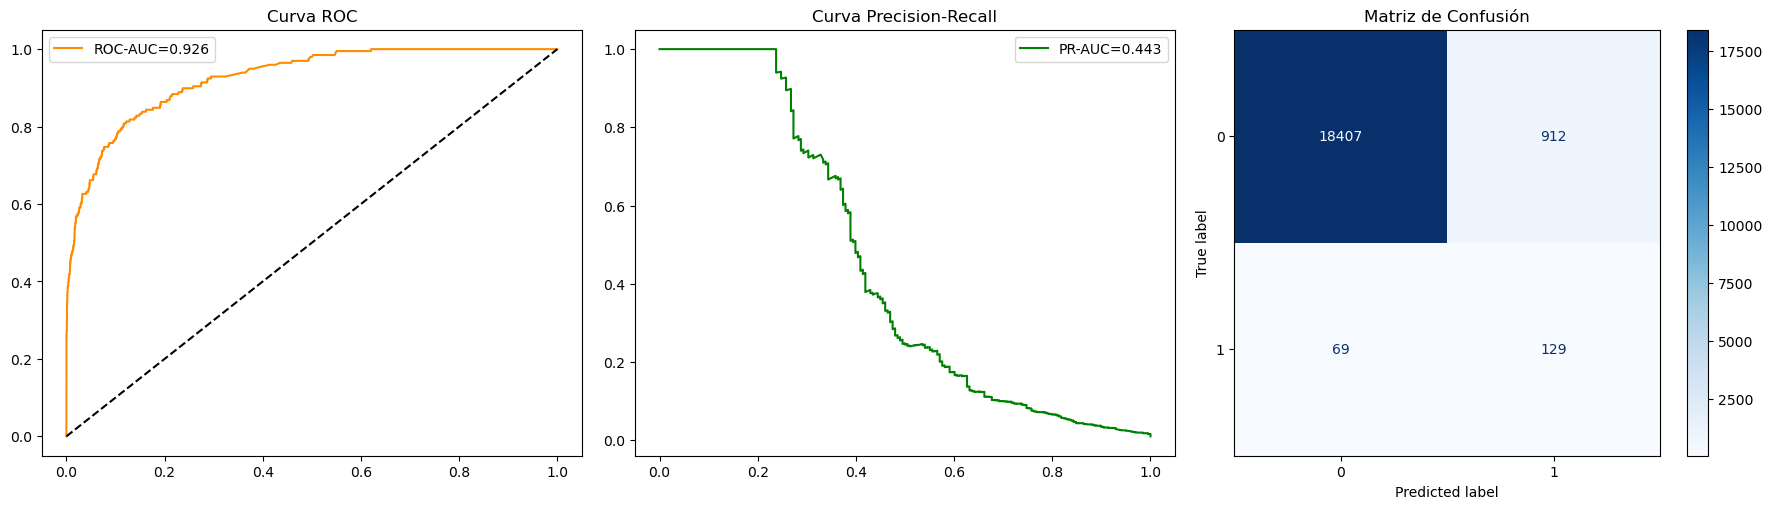


--- ⚖️ 3.1. Importancia y Dirección en el Meta-Estimador ---
El Meta-Estimador (Regresión Logística) pondera las predicciones de los modelos base:
| Modelo Base   |   Peso (Coef) |   Peso Absoluto |
|:--------------|--------------:|----------------:|
| cb            |      34.2676  |        34.2676  |
| lgbm          |       7.80607 |         7.80607 |


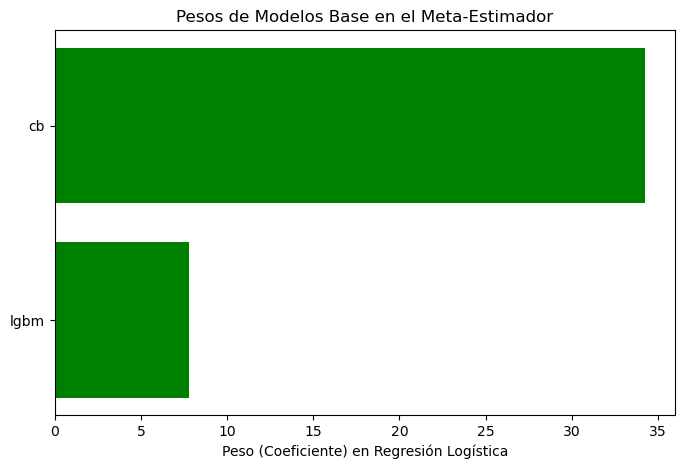


--- 🌳 3.2. Importancia de Variables (Nivel 1) ---
INFO: Estimador CatBoost encontrado usando el alias 'cb'.
Importancia de TODAS las Variables (Normalizada y Absoluta):
| Feature                                    |   LGBM_Imp |      CB_Imp |   LGBM_Imp_Norm |   CB_Imp_Norm |   Imp Promedio |   Imp Diferencia |
|:-------------------------------------------|-----------:|------------:|----------------:|--------------:|---------------:|-----------------:|
| clicks_por_sesion                          |       2286 | 14.921      |     1           |    0.523261   |     0.76163    |       0.476739   |
| sesiones_por_dia                           |       1466 | 12.3897     |     0.641295    |    0.434479   |     0.537887   |       0.206816   |
| bondad_email_20                            |        172 | 28.5138     |     0.0752406   |    1          |     0.53762    |      -0.924759   |
| total_fichas_consultadas                   |       1697 |  7.27137    |     0.742345    |    0.254964   |   

In [115]:
# Asegúrate de que X_train_val, y_train_val, etc. están cargados
# y que lr_best_params tiene el formato correcto (ej. {'lr_C': 0.1, ...})

# 1. Ejecutar Construcción y Predicción
y_test_real, y_pred_final, y_pred_proba, pipeline_entrenado = construir_y_predecir_modelo_final(
    X_train_val, y_train_val, X_test, y_test,
    lgbm_best_params, cb_best_params, lr_best_params, # Asegúrate de pasar lr_best_params (o lr_meta_params)
    output_folder = 'results/final_model_fase1'
)

# 2. Evaluar
evaluar_modelo(y_test_real, y_pred_final, y_pred_proba)

# 3. Analizar
analizar_meta_estimator(pipeline_entrenado)
analizar_importancia_base(pipeline_entrenado, feature_names = X_train_val.columns.tolist())

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">

<h5 style="font-weight:bold">📌 Conclusiones de la evaluacion</h5>

<p>
La evaluación del modelo de <em>stacking</em> sobre el conjunto de prueba (<code>X_test</code>) confirma que la estrategia adoptada está explícitamente orientada a maximizar la <strong>captura de la clase positiva</strong>, priorizando el <em>recall</em> frente a la precisión. Este enfoque resulta coherente con escenarios de negocio en los que el coste de no identificar un cliente potencial es superior al de una acción comercial no efectiva.
</p>

<strong>Evaluación del rendimiento (métricas estándar y de negocio)</strong>

<ul>
    <li>
        <strong>Capacidad discriminativa:</strong> El modelo alcanza un <strong>ROC AUC de 0.9256</strong> y un <strong>PR AUC de 0.4429</strong>. Dada la baja tasa base de la clase positiva (≈1.01%), este valor de PR AUC refleja una elevada capacidad para separar compradores reales del resto de usuarios, siendo una métrica especialmente adecuada en contextos de fuerte desbalance.
    </li>
    <li>
        <strong>Trade-off recall–precision:</strong> El clasificador obtiene un <strong>recall del 65.15%</strong>, identificando 129 de los 198 compradores reales presentes en el conjunto de test. Esta elevada tasa de captura se acompaña de una <strong>precisión moderada (12.39%)</strong> y un número significativo de falsos positivos (FP = 912), un compromiso aceptable en estrategias de adquisición y activación donde la prioridad es no perder oportunidades de conversión.
    </li>
</ul>

<strong>Potencial de negocio (curvas Gain y Lift)</strong>

<p>
El análisis de <em>Gain</em> y <em>Lift</em> pone de manifiesto un alto potencial de explotación comercial del modelo, validando su utilidad como herramienta de priorización.
</p>

<ul>
    <li>
        <strong>Alta concentración de conversión:</strong> Al seleccionar únicamente el <strong>10% de usuarios con mayor probabilidad predicha</strong> (primer decil), el modelo captura el <strong>75.8%</strong> de todos los compradores reales del conjunto de prueba, lo que evidencia una fuerte concentración de la señal de compra en un subconjunto reducido de usuarios.
    </li>
    <li>
        <strong>Eficiencia operativa:</strong> El <strong>Lift de 7.57</strong> en el primer decil indica que la tasa de conversión en este grupo es más de siete veces superior a la tasa media, lo que se traduce en campañas altamente eficientes y con un retorno esperado significativamente mayor.
    </li>
</ul>

<strong>Ponderación del meta-estimador</strong>

<p>
El análisis de los coeficientes del meta-estimador (Regresión Logística de Nivel 2) muestra una contribución claramente dominante de <strong>CatBoost</strong> (coeficiente 34.27) frente a <strong>LightGBM</strong> (coeficiente 7.81).
</p>

<ul>
    <li>
        <strong>Predominio de CatBoost:</strong> Ambos modelos base aportan señal positiva a la predicción final, pero la contribución de CatBoost es aproximadamente <strong>4.4 veces superior</strong>, lo que indica que sus predicciones <em>out-of-fold</em> son percibidas como más fiables por el meta-modelo.
    </li>
    <li>
        <strong>Implicación interpretativa:</strong> Este resultado es especialmente relevante dado el uso de penalización L1 en el meta-estimador, que tiende a seleccionar únicamente las señales más robustas, descartando aquellas redundantes o ruidosas.
    </li>
</ul>


<strong>Importancia de variables (nivel 1)</strong>

<p>
En el nivel de los modelos base, las variables de comportamiento —como <code>clicks_por_sesion</code> y <code>sesiones_por_dia</code>— presentan una elevada importancia, especialmente en LightGBM. Destaca asimismo la fuerte discrepancia en la variable <code>bondad_email_20</code>, que constituye la señal más relevante para CatBoost, pero no para LightGBM.
</p>

<p>
Estas diferencias subrayan la complementariedad entre ambos modelos y ponen de relieve oportunidades claras para la <strong>reingeniería de variables</strong> y el análisis de redundancias, aspectos que se abordarán en el siguiente apartado.
</p>


<h3>Ciclo 2 - Reingeniería de variables y optimización</h3>

<h4>Reingenieria de features</h4>

<table border="1" cellpadding="6" cellspacing="0" align="left" width="100%">
  <caption><strong>Importancia de TODAS las Variables (Normalizada y Absoluta)</strong></caption>
  <thead>
    <tr>
      <th>Feature</th>
      <th>LGBM_Imp</th>
      <th>CB_Imp</th>
      <th>LGBM_Imp_Norm</th>
      <th>CB_Imp_Norm</th>
      <th>Imp Promedio</th>
      <th>Imp Diferencia</th>
    </tr>
  </thead>
  <tbody>
    <!-- Contenido de la tabla (idéntico al proporcionado) -->
    <!-- ... mantengo exactamente las filas para no alterar datos ... -->
    <tr><td>clicks_por_sesion</td><td style="text-align:right">2286</td><td style="text-align:right">14.921</td><td style="text-align:right">1</td><td style="text-align:right">0.523261</td><td style="text-align:right">0.76163</td><td style="text-align:right">0.476739</td></tr>
    <tr><td>sesiones_por_dia</td><td style="text-align:right">1466</td><td style="text-align:right">12.3897</td><td style="text-align:right">0.641295</td><td style="text-align:right">0.434479</td><td style="text-align:right">0.537887</td><td style="text-align:right">0.206816</td></tr>
    <tr><td>bondad_email_20</td><td style="text-align:right">172</td><td style="text-align:right">28.5138</td><td style="text-align:right">0.0752406</td><td style="text-align:right">1</td><td style="text-align:right">0.53762</td><td style="text-align:right">-0.924759</td></tr>
    <tr><td>total_fichas_consultadas</td><td style="text-align:right">1697</td><td style="text-align:right">7.27137</td><td style="text-align:right">0.742345</td><td style="text-align:right">0.254964</td><td style="text-align:right">0.498654</td><td style="text-align:right">0.48738</td></tr>
    <tr><td>usuarios_que_consultan_misma_primera_ficha</td><td style="text-align:right">1378</td><td style="text-align:right">3.50398</td><td style="text-align:right">0.6028</td><td style="text-align:right">0.122831</td><td style="text-align:right">0.362815</td><td style="text-align:right">0.479969</td></tr>
    <tr><td>antiguedad_comportamiento_fichas</td><td style="text-align:right">1200</td><td style="text-align:right">2.1757</td><td style="text-align:right">0.524934</td><td style="text-align:right">0.076244</td><td style="text-align:right">0.300589</td><td style="text-align:right">0.44869</td></tr>
    <tr><td>num_dias_sesiones</td><td style="text-align:right">878</td><td style="text-align:right">4.13249</td><td style="text-align:right">0.384077</td><td style="text-align:right">0.144875</td><td style="text-align:right">0.264476</td><td style="text-align:right">0.239202</td></tr>
    <tr><td>canal_SEO</td><td style="text-align:right">383</td><td style="text-align:right">9.96413</td><td style="text-align:right">0.167542</td><td style="text-align:right">0.349407</td><td style="text-align:right">0.258474</td><td style="text-align:right">-0.181866</td></tr>
    <tr><td>dia_semana_registro</td><td style="text-align:right">750</td><td style="text-align:right">1.99628</td><td style="text-align:right">0.328084</td><td style="text-align:right">0.0699511</td><td style="text-align:right">0.199018</td><td style="text-align:right">0.258133</td></tr>
    <tr><td>tipo_usuario_PF</td><td style="text-align:right">258</td><td style="text-align:right">5.18093</td><td style="text-align:right">0.112861</td><td style="text-align:right">0.181646</td><td style="text-align:right">0.147254</td><td style="text-align:right">-0.0687854</td></tr>
    <tr><td>canal_SEM</td><td style="text-align:right">226</td><td style="text-align:right">4.31112</td><td style="text-align:right">0.0988626</td><td style="text-align:right">0.151139</td><td style="text-align:right">0.125001</td><td style="text-align:right">-0.0522767</td></tr>
    <tr><td>tiene_fichas</td><td style="text-align:right">10</td><td style="text-align:right">4.71317</td><td style="text-align:right">0.00437445</td><td style="text-align:right">0.16524</td><td style="text-align:right">0.0848074</td><td style="text-align:right">-0.160866</td></tr>
    <tr><td>bondad_email_0</td><td style="text-align:right">50</td><td style="text-align:right">0.358596</td><td style="text-align:right">0.0218723</td><td style="text-align:right">0.0125127</td><td style="text-align:right">0.0171925</td><td style="text-align:right">0.00935958</td></tr>
    <tr><td>bondad_email_-10</td><td style="text-align:right">44</td><td style="text-align:right">0.211925</td><td style="text-align:right">0.0192476</td><td style="text-align:right">0.00736849</td><td style="text-align:right">0.013308</td><td style="text-align:right">0.0118791</td></tr>
    <tr><td>es_finde_registro</td><td style="text-align:right">2</td><td style="text-align:right">0.353949</td><td style="text-align:right">0.000874891</td><td style="text-align:right">0.0123497</td><td style="text-align:right">0.00661228</td><td style="text-align:right">-0.0114748</td></tr>
    <tr><td>bondad_email_1</td><td style="text-align:right">0</td><td style="text-align:right">0.00183504</td><td style="text-align:right">0</td><td style="text-align:right">0</td><td style="text-align:right">0</td><td style="text-align:right">0</td></tr>
  </tbody>
</table>

<br><br>
<p>
El análisis conjunto de la importancia de variables, obtenido a partir de la combinación de los modelos LightGBM y CatBoost, permite identificar patrones relevantes para la mejora del rendimiento predictivo. La consideración simultánea de importancias absolutas y normalizadas no solo facilita la evaluación de la contribución individual de cada predictor, sino que también pone de manifiesto el grado de alineación o divergencia entre ambos algoritmos. Esta información resulta especialmente valiosa para orientar decisiones posteriores de reingeniería de variables y refinamiento del modelo.
</p>

<p>
A partir de los resultados presentados en la Tabla anterior, se identifican las siguientes líneas de actuación:
</p>
<ul>
    <li>
        <strong>Reincorporación estratégica de variables previamente descartadas</strong><br>
        Los modelos de boosting utilizados —en particular CatBoost y LightGBM— muestran una elevada capacidad para manejar colinealidad y capturar relaciones complejas entre predictores. En este contexto, la eliminación temprana de variables basada en criterios estadísticos clásicos puede resultar excesivamente restrictiva. Por ello, se plantea la reintroducción selectiva de variables descartadas en fases previas, permitiendo que el propio modelo determine su utilidad efectiva.
    </li>
    <li>
        <strong>Aplicación de transformaciones para capturar efectos no lineales</strong><br>
        Las diferencias sustanciales de importancia observadas entre modelos sugieren que determinados predictores presentan distribuciones asimétricas o efectos no lineales. En estos casos, la aplicación de transformaciones —como la logarítmica— puede contribuir a estabilizar la varianza y mejorar la capacidad de generalización. Variables como <code>total_fichas_consultadas</code>, <code>antiguedad_comportamiento_fichas</code> y <code>usuarios_que_consultan_misma_primera_ficha</code> se identifican como candidatas naturales para este tipo de tratamiento.
    </li>
    <li>
        <strong>Generación de variables derivadas para capturar interacciones</strong><br>
        La creación de variables compuestas permite modelar sinergias entre predictores que no se reflejan explícitamente en el conjunto original de datos. Un ejemplo ilustrativo es la variable <code>total_clicks_por_dia</code>, obtenida a partir de la combinación de <code>clicks_por_sesion</code> y <code>sesiones_por_dia</code>. Este tipo de ingeniería de variables puede incrementar la capacidad explicativa del modelo y facilitar, en etapas posteriores, la reducción de redundancias.
    </li>
    <li>
        <strong>Refuerzo del papel de variables categóricas en combinación con señales de comportamiento</strong><br>
        Se observa que determinados predictores categóricos —en particular las distintas modalidades de <em>bondad_email</em>— presentan una alta relevancia en CatBoost, mientras que su impacto es más limitado en LightGBM. Este comportamiento sugiere la conveniencia de construir indicadores compuestos que integren información categórica y comportamental, como índices de <em>engagement_por_email</em>. Asimismo, variables como <em>tiene_fichas</em> o <em>es_finde_registro</em>, aunque de menor peso individual, podrían adquirir mayor relevancia al combinarse con predictores dominantes.
    </li>
</ul>
<p>
En conjunto, estas propuestas buscan potenciar la complementariedad entre los modelos del ensemble, mitigar las limitaciones derivadas de distribuciones complejas y reforzar la arquitectura del conjunto de predictores. Este enfoque sistemático de ingeniería de variables constituye un elemento clave para la mejora del rendimiento del modelo de Stacking y sienta las bases para iteraciones futuras de optimización.
</p>



<h4>Creacion de features y dataset</h4>

<p>
La fase de <strong>reingeniería de variables</strong> se orientó a mejorar la capacidad explicativa del modelo y a facilitar la captura de patrones no lineales mediante la transformación y combinación estratégica de los predictores disponibles. Para ello, se abordaron de forma sistemática la optimización de tipos de datos, la generación de interacciones y ratios informativos, la aplicación de transformaciones para corregir asimetrías y la consolidación de señales débiles. La eliminación de variables se realizó únicamente en una etapa final, atendiendo a su contribución efectiva en el modelo optimizado.
</p>

<table border="1" cellspacing="0" cellpadding="6" style="border-collapse: collapse;">
    <thead>
        <tr style="background-color:#f2f2f2; font-weight:bold;">
            <th>Acción</th>
            <th>Descripción</th>
            <th>Objetivo</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Normalización de tipos</td>
            <td>Conversión de variables a tipos <code>category</code> e <code>int8</code>.</td>
            <td>Reducir el consumo de memoria y optimizar el rendimiento de modelos basados en árboles (CatBoost y LightGBM).</td>
        </tr>
        <tr>
            <td>Engagement por email</td>
            <td>Creación de una interacción entre el número de clics y la variable <code>bondad_email_20</code>.</td>
            <td>Capturar sinergias entre la calidad de la comunicación y la respuesta activa del usuario.</td>
        </tr>
        <tr>
            <td>Ratios de actividad</td>
            <td>Cálculo de <code>total_clicks_por_dia</code> como combinación de clics y sesiones por día.</td>
            <td>Representar de forma más precisa la intensidad real de la actividad del usuario.</td>
        </tr>
        <tr>
            <td>Transformaciones logarítmicas</td>
            <td>Aplicación de transformaciones logarítmicas a variables con distribuciones altamente sesgadas.</td>
            <td>Suavizar la distribución de los datos y facilitar particiones más estables en los árboles.</td>
        </tr>
        <tr>
            <td>Interacciones binarias</td>
            <td>Combinación de variables indicadoras (<em>flags</em>) con predictores numéricos.</td>
            <td>Potenciar señales débiles y detectar patrones condicionados por características específicas del usuario.</td>
        </tr>
        <tr>
            <td>Limpieza final de variables</td>
            <td>Eliminación de predictores con baja contribución, evaluada tras el entrenamiento del modelo final.</td>
            <td>Reducir el ruido, evitar sobreajuste y conservar únicamente variables con valor predictivo demostrado.</td>
        </tr>
    </tbody>
</table>

In [116]:
df_cb_lgbm = df_final.copy()

# =============================================================================
# Transformar columnas object a int y object a category
# =============================================================================
to_int = ['mes_registro','es_finde_registro', 'tiene_fichas']
for int_col in to_int:
    df_cb_lgbm[int_col] = df_cb_lgbm[int_col].astype('int8')

categorical_features = ['bondad_email','canal','tipo_usuario', 'dia_semana_registro']
for feature in categorical_features:
    df_cb_lgbm[feature] = df_cb_lgbm[feature].astype('category')

# =============================================================================
# Potenciar en LGBM bondadEmail con engagement_por_email
# =============================================================================
df_cb_lgbm['engagement_por_email'] = 0.0
df_cb_lgbm.loc[df_cb_lgbm['bondad_email'] == '20', 'engagement_por_email'] = df_cb_lgbm['clicks_por_sesion']

# =============================================================================
# Ratios que capturen sinergias
# =============================================================================
df_cb_lgbm['total_clicks_por_dia'] = df_cb_lgbm['clicks_por_sesion'] * df_cb_lgbm['sesiones_por_dia']

# =============================================================================
# Suavizar distribuciones: antiguedad comportamiento, total_fichas_consultadas, usuarios_que_consultan_misma_primera_ficha
# =============================================================================
cols_to_log = [
'total_fichas_consultadas', 
'usuarios_que_consultan_misma_primera_ficha', 
]
for col in cols_to_log:
    df_cb_lgbm[f'log_{col}'] = np.log1p(df_cb_lgbm[col])

# === DECOMPOSICIÓN DE LA ANTIGÜEDAD  ===
# !Especial atencion a antiguedad comportamiento fichas, su valor sentinela -1 "dificulta la transformacion"!
antiguedad_col = 'antiguedad_comportamiento_fichas'
# Fecha unica (cuando solo hay 1 ficha se representa con un 0 (fecha_max - fecha_min = 0)
df_cb_lgbm['flag_ficha_unica'] = (df_cb_lgbm[antiguedad_col] == 0).astype(int)
# Antigüedad Continua Limpia (Solo valores > 0)
temp_antiguedad = df_cb_lgbm[antiguedad_col].copy()
temp_antiguedad[temp_antiguedad <= 0] = np.nan # Invalidar -1 y 0
# Aplicar Logaritmo (log natural)
df_cb_lgbm['log_antiguedad_real'] = np.log(temp_antiguedad)
# Imputación: Reemplazamos los Infinitos (NaN de los sentinelas) por 0.
df_cb_lgbm['log_antiguedad_real'] = df_cb_lgbm['log_antiguedad_real'].fillna(0)

# =============================================================================
# REFUERZO DE LA SEÑAL: tiene_fichas
# =============================================================================

# Clicks solo relevantes si el usuario tiene fichas
df_cb_lgbm["clicks_si_fichas"] = df_cb_lgbm["total_clicks_por_dia"] * df_cb_lgbm["tiene_fichas"]

# Popularidad de la ficha (peer signal) solo si tiene fichas
df_cb_lgbm["peer_signal_si_fichas"] = (
    df_cb_lgbm["log_usuarios_que_consultan_misma_primera_ficha"] * df_cb_lgbm["tiene_fichas"]
)

# Cantidad de fichas consultadas solo si tiene fichas
df_cb_lgbm["fichas_consultadas_si_tiene"] = (
    df_cb_lgbm["log_total_fichas_consultadas"] * df_cb_lgbm["tiene_fichas"]
)

# Fichas + email excelente → combinación muy fuerte
df_cb_lgbm["fichas_y_email_bueno"] = (
    ((df_cb_lgbm["bondad_email"] == "20").astype(int)) * df_cb_lgbm["tiene_fichas"]
)


# =============================================================================
# REFUERZO DE LA SEÑAL: flag_ficha_unica
# =============================================================================

# Peer signal * ficha única
df_cb_lgbm["peer_signal_unica"] = (
    df_cb_lgbm["log_usuarios_que_consultan_misma_primera_ficha"] * df_cb_lgbm["flag_ficha_unica"]
)

# Antigüedad log * ficha única
df_cb_lgbm["recencia_ficha_unica"] = df_cb_lgbm["recencia_fichas"] * df_cb_lgbm["flag_ficha_unica"]


# =============================================================================
# REFUERZO DE LA SEÑAL: es_finde_registro
# =============================================================================

# Clicks después de registrarse en finde
df_cb_lgbm["clicks_despues_registro_finde"] = (
    df_cb_lgbm["total_clicks_por_dia"] * df_cb_lgbm["es_finde_registro"]
)

# Sesiones * registro en finde
df_cb_lgbm["sesiones_finde"] = df_cb_lgbm["sesiones_por_dia"] * df_cb_lgbm["es_finde_registro"]

# Email excelente * registro en finde
df_cb_lgbm["email_bueno_finde"] = (
    (df_cb_lgbm["bondad_email"] == "20").astype(int) * df_cb_lgbm["es_finde_registro"]
)

# PF * registro en finde
df_cb_lgbm["PF_finde"] = (df_cb_lgbm["tipo_usuario"] == 'PF').astype(int) * df_cb_lgbm["es_finde_registro"]

# =============================================================================
# Eliminar columnas confusas, mejoradas o irrelevantes
# =============================================================================
# Dia mes puede entorpecer ya que tiene muy baja correlacion, distribucion uniforme y tratarla como categorica seria conflictivo.
df_cb_lgbm = df_cb_lgbm.drop(columns=['dia_mes_registro'])

df_cb_lgbm

canal  es_cliente bondad_email tipo_usuario  mes_registro  \
0       Directorios           0            9           PF             1   
1       Directorios           0           20           PF             1   
2       Directorios           0           20           PF             1   
3       Directorios           0           20           PF             1   
4       Directorios           0           20           PF             1   
...             ...         ...          ...          ...           ...   
195160  Directorios           0           20           PF            12   
195161  Directorios           0           20           PF            12   
195162          SEO           0           20           PF            12   
195163          SEO           0           20           PJ            12   
195164  Directorios           0           20           PF            12   

       dia_semana_registro  es_finde_registro  total_fichas_consultadas  \
0                        0                  0                         0   
1                        0                  0                         0   
2                        0                  0                         0   
3                        0                  0                         0   
4                        0                  0                         0   
...                    ...                ...                       ...   
195160                   4                  0                         0   
195161                   4                  0                         0   
195162                   4                  0                         0   
195163                   4                  0                         0   
195164                   4                  0                         0   

        recencia_fichas  antiguedad_comportamiento_fichas  ...  \
0                  2306                                -1  ...   
1                  2306                                -1  ...   
2                  2306                                -1  ...   
3                  2306                                -1  ...   
4                  2306                                -1  ...   
...                 ...                               ...  ...   
195160             2306                                -1  ...   
195161             2306                                -1  ...   
195162             2306                                -1  ...   
195163             2306                                -1  ...   
195164             2306                                -1  ...   

        clicks_si_fichas  peer_signal_si_fichas  fichas_consultadas_si_tiene  \
0                    0.0                    0.0                          0.0   
1                    0.0                    0.0                          0.0   
2                    0.0                    0.0                          0.0   
3                    0.0                    0.0                          0.0   
4                    0.0                    0.0                          0.0   
...                  ...                    ...                          ...   
195160               0.0                    0.0                          0.0   
195161               0.0                    0.0                          0.0   
195162               0.0                    0.0                          0.0   
195163               0.0                    0.0                          0.0   
195164               0.0                    0.0                          0.0   

        fichas_y_email_bueno  peer_signal_unica  recencia_ficha_unica  \
0                          0                0.0                     0   
1                          0                0.0                     0   
2                          0                0.0                     0   
3                          0                0.0                     0   
4                          0                0.0                     0   
...                 

In [117]:
print(df_cb_lgbm.dtypes)
guardar_csv(df_cb_lgbm, "src/datasets_stacking", "df_cb_lgbm.csv")

canal                                             category
es_cliente                                           int64
bondad_email                                      category
tipo_usuario                                      category
mes_registro                                          int8
dia_semana_registro                               category
es_finde_registro                                     int8
total_fichas_consultadas                             int64
recencia_fichas                                      int64
antiguedad_comportamiento_fichas                     int64
total_sesiones                                       int64
total_clicks                                         int64
num_dias_sesiones                                    int64
clicks_por_sesion                                  float64
sesiones_por_dia                                   float64
usuarios_que_consultan_misma_primera_ficha           Int64
tiene_fichas                                          in

<h4>Dataset de entreno</h4>

In [118]:
X_train_val, X_test, y_train_val, y_test = create_stratified_splits(df_cb_lgbm)

--- Iniciando división de datos (195165 registros)
target col y variable estratificada = "es_cliente" random state = 42, test size = 10.0% ---

--- Distribución de Clases (Verificación) ---
Original (195165):
es_cliente
0   98.98%
1    1.02%

Train/Validation (175648):
es_cliente
0   98.98%
1    1.02%

Test (19517):
es_cliente
0   98.99%
1    1.01%

✅ Verificación: La división fue exitosa y estratificada.


<h4>Optimizacion de hiperparámetros con optuna</h4>

<p>
Tras completar la reingeniería de variables, se llevó a cabo una revisión exhaustiva del proceso de optimización de hiperparámetros con el objetivo de adaptar el espacio de búsqueda a la nueva estructura del dataset. 
En esta fase, la optimización deja de ser exploratoria para adoptar un enfoque de <strong>fine-tuning dirigido</strong>, centrado en consolidar los óptimos previamente identificados, reducir redundancias y reforzar los mecanismos de regularización y generalización.
</p>

<p>
La estrategia seguida se basa en tres principios fundamentales:
</p>

<ul>
    <li>
        <strong>Focalización del espacio de búsqueda</strong>, ajustando los rangos alrededor de los valores óptimos obtenidos en ciclos anteriores y aumentando la granularidad donde se detectó mayor sensibilidad del modelo.
    </li>
    <li>
        <strong>Simplificación estructural</strong>, eliminando hiperparámetros altamente correlacionados o redundantes y delegando su control en los valores por defecto de los frameworks, cuando estos demostraron ser suficientemente robustos.
    </li>
    <li>
        <strong>Refuerzo de la regularización y la diversidad</strong>, incorporando nuevos hiperparámetros orientados a reducir el sobreajuste, mejorar la estabilidad del ensemble y disminuir la correlación entre modelos base en el stacking.
    </li>
</ul>

<p>
La Tabla siguiente resume de forma detallada los ajustes realizados para cada modelo, incluyendo los rangos previos, los óptimos alcanzados y las modificaciones introducidas en esta fase, junto con su justificación técnica.
</p>

<table class="optuna-table">
    <thead>
    <tr>
    <th>Modelo</th>
    <th>Parámetro</th>
    <th>Rango Previo</th>
    <th>Óptimo Previo</th>
    <th>Rango Actual Propuesto</th>
    <th>Justificación del Ajuste</th>
    </tr>
    </thead>
    <tbody>
    <!-- LIGHTGBM -->
    <tr class="model-header">
    <td colspan="6">LightGBM (LGBM)</td>
    </tr>
    <tr>
    <td>LGBM</td>
    <td><strong>n_estimators</strong></td>
    <td><code>[200, 1500]</code> (step=100)</td>
    <td>1200</td>
    <td><code>[800, 1500]</code> (step=50)</td>
    <td>Se mantiene un rango alto cercano al óptimo previo (1200), reduciendo el límite inferior a 800 y refinando el paso para mejorar la granularidad de búsqueda.</td>
    </tr>
    <tr>
    <td>LGBM</td>
    <td><strong>learning_rate</strong></td>
    <td><code>[0.005, 0.1]</code> (log)</td>
    <td>0.0315</td>
    <td><code>[0.005, 0.05]</code> (log)</td>
    <td>Se centra la exploración en valores más cercanos al óptimo previo, limitando el rango superior a 0.05 para evitar valores inestables.</td>
    </tr>
    <tr class="highlight-param">
    <td>LGBM</td>
    <td><strong>num_leaves</strong></td>
    <td><code>[10, 100]</code></td>
    <td>10</td>
    <td><code>[20, 150]</code></td>
    <td>Se amplía el rango para permitir mayor capacidad de modelado y captación de interacciones complejas.</td>
    </tr>
    <tr class="deleted-param">
    <td>LGBM</td>
    <td><strong>max_depth</strong></td>
    <td><code>[3, 12]</code></td>
    <td>8</td>
    <td><strong>ELIMINADO</strong></td>
    <td>Se elimina por alta correlación con <em>num_leaves</em>, confiando en el valor por defecto del framework para controlar la complejidad del árbol.</td>
    </tr>
    <tr>
    <td>LGBM</td>
    <td><strong>min_child_samples</strong></td>
    <td><code>[10, 80]</code></td>
    <td>56</td>
    <td><code>[20, 100]</code></td>
    <td>Se amplía el rango inferior para mayor flexibilidad con nuevas features, manteniendo un límite superior alto para garantizar hojas robustas.</td>
    </tr>
    <tr>
    <td>LGBM</td>
    <td><strong>reg_alpha</strong></td>
    <td><code>[1e-8, 10.0]</code> (log)</td>
    <td>0.0010</td>
    <td><code>[1e-4, 1.0]</code> (log)</td>
    <td>Se centra la búsqueda en baja regularización, ajustando el rango superior a 1.0 y el inferior a 1e-4.</td>
    </tr>
    <tr class="deleted-param">
    <td>LGBM</td>
    <td><strong>reg_lambda</strong></td>
    <td><code>[1e-8, 10.0]</code> (log)</td>
    <td>0.0028</td>
    <td><strong>ELIMINADO</strong></td>
    <td>Debido a la alta correlación con <em>reg_alpha</em>, se opta por el valor por defecto, simplificando el espacio de búsqueda.</td>
    </tr>
    <tr class="highlight-param">
    <td>LGBM</td>
    <td><strong>feature_fraction</strong> (NUEVO)</td>
    <td>-</td>
    <td>-</td>
    <td><code>[0.7, 1.0]</code></td>
    <td>Se introduce muestreo de features para prevenir sobreajuste y aumentar diversidad en el ensamble.</td>
    </tr>
    <tr class="highlight-param">
    <td>LGBM</td>
    <td><strong>boosting_type</strong> (NUEVO)</td>
    <td>-</td>
    <td>-</td>
    <td><code>['gbdt', 'dart']</code></td>
    <td>DART reduce la correlación entre modelos base en stacking, mejorando la robustez del ensamble.</td>
    </tr>
    <!-- CATBOOST -->
    <tr class="model-header">
    <td colspan="6">CatBoost (CB)</td>
    </tr>
    <tr>
    <td>CB</td>
    <td><strong>iterations</strong></td>
    <td><code>[200, 1500]</code> (step=100)</td>
    <td>1200</td>
    <td><code>[800, 1500]</code> (step=50)</td>
    <td>Ajuste similar a LGBM, refinando paso y rango inicial.</td>
    </tr>
    <tr>
    <td>CB</td>
    <td><strong>learning_rate</strong></td>
    <td><code>[0.005, 0.1]</code> (log)</td>
    <td>0.0100</td>
    <td><code>[0.005, 0.03]</code> (log)</td>
    <td>Se centra la búsqueda cerca del óptimo previo (0.01), limitando el rango superior.</td>
    </tr>
    <tr>
    <td>CB</td>
    <td><strong>depth</strong></td>
    <td><code>[3, 10]</code></td>
    <td>8</td>
    <td><code>[4, 10]</code></td>
    <td>Se elimina el valor más bajo para enfocar la búsqueda en rangos relevantes.</td>
    </tr>
    <tr>
    <td>CB</td>
    <td><strong>l2_leaf_reg</strong></td>
    <td><code>[1e-4, 10.0]</code> (log)</td>
    <td>1.4123</td>
    <td><code>[0.1, 5.0]</code></td>
    <td>Se centra la búsqueda en valores estándar de regularización L2.</td>
    </tr>
    <tr>
    <td>CB</td>
    <td><strong>subsample</strong></td>
    <td><code>[0.6, 1.0]</code></td>
    <td>0.6114</td>
    <td><code>[0.6, 0.9]</code></td>
    <td>Se limita el máximo para evitar sobreajuste por ausencia de muestreo.</td>
    </tr>
    <tr class="deleted-param">
    <td>CB</td>
    <td><strong>min_data_in_leaf</strong></td>
    <td><code>[5, 50]</code></td>
    <td>25</td>
    <td><strong>ELIMINADO</strong></td>
    <td>Se opta por valor por defecto para maximizar flexibilidad y focalizar regularización en <em>random_strength</em>.</td>
    </tr>
    <tr class="highlight-param">
    <td>CB</td>
    <td><strong>random_strength</strong> (NUEVO)</td>
    <td>-</td>
    <td>-</td>
    <td><code>[0.1, 10.0]</code> (log)</td>
    <td>Introduce aleatoriedad en las divisiones, reforzando la regularización y la generalización.</td>
    </tr>
    <tr class="highlight-param">
    <td>CB</td>
    <td><strong>grow_policy</strong> (NUEVO)</td>
    <td>-</td>
    <td>-</td>
    <td><code>['SymmetricTree', 'Depthwise']</code></td>
    <td>Optimiza la política de crecimiento de los árboles, comparando robustez y eficiencia.</td>
    </tr>
    <!-- LOGISTIC REGRESSION -->
    <tr class="model-header">
    <td colspan="6">Meta-Modelo: Regresión Logística (LR)</td>
    </tr>
    <tr>
    <td>LR</td>
    <td><strong>C</strong></td>
    <td><code>[0.01, 1.0]</code> (log)</td>
    <td>0.0100</td>
    <td><code>[0.001, 0.1]</code> (log)</td>
    <td>Se amplía el rango inferior para aumentar regularización y se centra la búsqueda en valores de alta regularización.</td>
    </tr>
    <tr class="highlight-param">
    <td>LR</td>
    <td><strong>penalty</strong></td>
    <td><code>['l1', 'l2']</code></td>
    <td>l1</td>
    <td><code>['l1', 'l2', 'elasticnet']</code></td>
    <td>Se añade <em>elasticnet</em> como opción intermedia, optimizando el meta-modelo de stacking.</td>
    </tr>
    <tr class="highlight-param">
    <td>LR</td>
    <td><strong>solver</strong> (NUEVO)</td>
    <td>-</td>
    <td>-</td>
    <td><code>['saga']</code></td>
    <td>Requerido para soportar <em>elasticnet</em> y penalizaciones L1/L2 en el meta-modelo.</td>
    </tr>
    <tr class="highlight-param">
    <td>LR</td>
    <td><strong>l1_ratio</strong> (NUEVO)</td>
    <td>-</td>
    <td>-</td>
    <td><code>[0.0, 1.0]</code> (Condicional)</td>
    <td>Controla la mezcla de L1 y L2 para <em>elasticnet</em>, utilizado únicamente si `penalty` es 'elasticnet'.</td>
    </tr>
    </tbody>
</table>


<div class="comment-box">
<strong>Síntesis de Cambios en el Fine-Tuning</strong>

<ul>
    <li>
        <strong>Parámetros eliminados:</strong> 
        <code>max_depth</code> y <code>reg_lambda</code> en LightGBM, y <code>min_data_in_leaf</code> en CatBoost. 
        Su eliminación responde a la alta correlación detectada con otros hiperparámetros estructurales y a la confianza en los mecanismos de control por defecto de los frameworks, reduciendo así la complejidad innecesaria del espacio de búsqueda.
    </li>
    <li>
        <strong>Parámetros añadidos o reforzados:</strong> 
        <code>feature_fraction</code> y <code>boosting_type</code> en LightGBM, junto con <code>random_strength</code> y <code>grow_policy</code> en CatBoost, introducen fuentes adicionales de regularización y aleatoriedad. 
        En el meta-modelo, la incorporación de <code>elasticnet</code>, <code>solver='saga'</code> y <code>l1_ratio</code> amplía la flexibilidad para controlar el equilibrio entre parsimonia y capacidad predictiva.
    </li>
    <li>
        <strong>Filosofía general del ajuste:</strong> 
        El proceso evoluciona desde una exploración amplia hacia un ajuste fino centrado en los óptimos previos, permitiendo aumentar selectivamente la capacidad del modelo —por ejemplo, mediante un mayor rango de <code>num_leaves</code>— para explotar las nuevas features, mientras se refuerza la regularización en todas las capas del ensemble.
    </li>
</ul>

</div>

<p>
En conjunto, esta redefinición del espacio de hiperparámetros permite una optimización más eficiente y controlada, alineada con la nueva representación del comportamiento del usuario y orientada a maximizar la capacidad de generalización del modelo final en un contexto de fuerte desbalance de clases.
</p>


In [119]:
# Redefinimos parametros:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

def get_params_and_model(model_name, trial, categorical_features=None, random_state=42):
    """
    Define el espacio de búsqueda de Optuna y devuelve los parámetros y el modelo.
    
    El parámetro 'categorical_features' es opcional (por defecto es None).
    Solo se usará si se proporciona al inicializar LGBM o CatBoost.
    """
    
    if model_name == 'LGBM':
        print("🛠️ Optuna: Configurando LightGBM (LGBM)...")
        
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 800, 1500, step=50),
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 20, 150),
            'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 1.0, log=True),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.7, 1.0),
            'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart'])
        }
        
        # Diccionario para parámetros adicionales
        lgbm_args = {
            'random_state': random_state,
            'eval_metric': 'average-precision',
            'n_jobs': -1,
            'verbose': -1,
            # Añadir categóricas si existen
            **({'categorical_feature': categorical_features} if categorical_features is not None else {})
        }
        
        model = LGBMClassifier(**params, **lgbm_args)
    
    elif model_name == 'CatBoost':
        print("🛠️ Optuna: Configurando CatBoost (CB)...")

        params = {
            'iterations': trial.suggest_int('iterations', 800, 1500, step=50),
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.03, log=True),
            'depth': trial.suggest_int('depth', 4, 10),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 5.0),
            'subsample': trial.suggest_float('subsample', 0.6, 0.9),
            'random_strength': trial.suggest_float('random_strength', 0.1, 10.0, log=True),
            'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise'])
        }
        
        # Diccionario para parámetros adicionales de CatBoost
        catboost_args = {
            'eval_metric':'PRAUC',
            'random_state': random_state,
            'verbose': 0,
            'thread_count': -1,
            'allow_writing_files': False,
            # Añadir categóricas si existen (¡OJO: 'cat_features' PLURAL!)
            **({'cat_features': categorical_features} if categorical_features is not None else {})
        }
        
        model = CatBoostClassifier(**params, **catboost_args)
    
    elif model_name == 'LR_META':
        print("🛠️ Optuna: Configurando Logistic Regression (Meta)...")

        penalty = trial.suggest_categorical('lr_penalty', ['l1', 'l2'])
        if penalty == 'l1':
            # Para L1, solo liblinear funciona bien
            solver = 'liblinear'
        else:  # penalty == 'l2'
            # Para L2, varios solvers funcionan
            solver = trial.suggest_categorical('lr_solver', ['lbfgs', 'newton-cg'])
            
        lr_params = {
            'C': trial.suggest_float('lr_C', 0.001, 0.1, log=True),
            'penalty': trial.suggest_categorical('lr_penalty', ['l1', 'l2']),
            'solver': solver,
            'random_state': random_state,
            'max_iter': 1000, # Añadir para asegurar convergencia
        }
        
        params = lr_params.copy()
        # Crear el modelo de Logistic Regression
        model = LogisticRegression(class_weight='balanced',**lr_params)
    
    else:
        raise ValueError(f"Modelo no soportado: {model_name}. Use 'LGBM', 'CatBoost' o 'LR_META'.")

    return params, model

In [120]:
print(f"Started optimization on dataset:\n")
cat_cols = categorical_features
print(f"Categorical categories = {cat_cols}")
display(X_train_val.head(1))

lgbm_best_params, _ = run_base_tuning(X_train_val, y_train_val, model_name='LGBM', categorical_features=None, folder_name="results/tuning/params_fase5", n_trials=100)
cb_best_params, _ = run_base_tuning(X_train_val, y_train_val, model_name='CatBoost', categorical_features = None, folder_name="results/tuning/params_fase5", n_trials=100)

# 2. Generar (o cargar) Features de Nivel 2
X_level2 = generate_oof_predictions(X_train_val, y_train_val, lgbm_best_params, cb_best_params, cat_cols, "results/oof_features_fase5")

# 3. Optimizar (o cargar) el Meta-Estimador
lr_best_params, lr_best_score = run_meta_tuning(X_level2, y_train_val,folder_name="results/tuning/params_fase5", n_trials=50)

print("\n--- RESUMEN DE MEJORES PARÁMETROS ---")
print(f"LGBM: {lgbm_best_params}")
print(f"CatBoost: {cb_best_params}")
print(f"LR Meta: {lr_best_params}")

Started optimization on dataset:

Categorical categories = ['bondad_email', 'canal', 'tipo_usuario', 'dia_semana_registro']


canal bondad_email tipo_usuario  mes_registro  \
111955  Directorios           20           PF             8   

       dia_semana_registro  es_finde_registro  total_fichas_consultadas  \
111955                   4                  0                         1   

        recencia_fichas  antiguedad_comportamiento_fichas  total_sesiones  \
111955             1069                                 0               2   

        ...  clicks_si_fichas  peer_signal_si_fichas  \
111955  ...               4.0               3.044522   

        fichas_consultadas_si_tiene  fichas_y_email_bueno  peer_signal_unica  \
111955                     0.693147                     1           3.044522   

        recencia_ficha_unica  clicks_despues_registro_finde  sesiones_finde  \
111955                  1069                            0.0             0.0   

        email_bueno_finde  PF_finde  
111955                  0         0  

[1 rows x 32 columns]

✔️ Cargando parámetros desde results/tuning/params_fase5\lgbm_best_params.json
🎉 Resultados cargados para LGBM. No se requiere re-optimizar.
✔️ Cargando parámetros desde results/tuning/params_fase5\catboost_best_params.json
🎉 Resultados cargados para CatBoost. No se requiere re-optimizar.
✅ Resultados previos de OOF encontrados en results/oof_features_fase5\X_level2_oof.csv.
Cargando y devolviendo resultados existentes...
✔️ Cargando parámetros desde results/tuning/params_fase5\lr_meta_best_params.json
🎉 Resultados cargados para Logistic Regression (Meta-Estimador).

--- RESUMEN DE MEJORES PARÁMETROS ---
LGBM: {'lgbm_n_estimators': 1800, 'lgbm_learning_rate': 0.018067869990858458, 'lgbm_num_leaves': 26, 'lgbm_min_child_samples': 30, 'lgbm_reg_alpha': 0.005330854069554935, 'lgbm_reg_lambda': 0.09987730382558391, 'lgbm_feature_fraction': 0.9170603878199113, 'lgbm_min_gain_to_split': 0.06584088996754021}
CatBoost: {'iterations': 850, 'learning_rate': 0.02542971271126076, 'depth': 9, 'l2_l

<h4>Evaluación del modelo</h4>

--- Iniciando división de datos (195165 registros)
target col y variable estratificada = "es_cliente" random state = 42, test size = 10.0% ---

--- Distribución de Clases (Verificación) ---
Original (195165):
es_cliente
0   98.98%
1    1.02%

Train/Validation (175648):
es_cliente
0   98.98%
1    1.02%

Test (19517):
es_cliente
0   98.99%
1    1.01%

✅ Verificación: La división fue exitosa y estratificada.
✔️ Modelo encontrado. Cargando desde: results/final_model_fase2\stacking_final_pipeline.joblib
✅ Usando modelo previamente entrenado.

Generando predicciones en X_test...

--- 📊 2.1. Métricas de Rendimiento Estándar ---
| Métrica   |   Valor |
|:----------|--------:|
| Accuracy  |  0.8989 |
| Precision |  0.0685 |
| Recall    |  0.7121 |
| F1-Score  |  0.1251 |
| ROC AUC   |  0.9061 |
| PR AUC    |  0.3965 |
| FP Rate   |  0.0992 |

--- 💰 2.2. Métricas de Negocio ---
| KPI                 | Valor   |
|:--------------------|:--------|
| Total Test          | 19517   |
| Clientes Reales

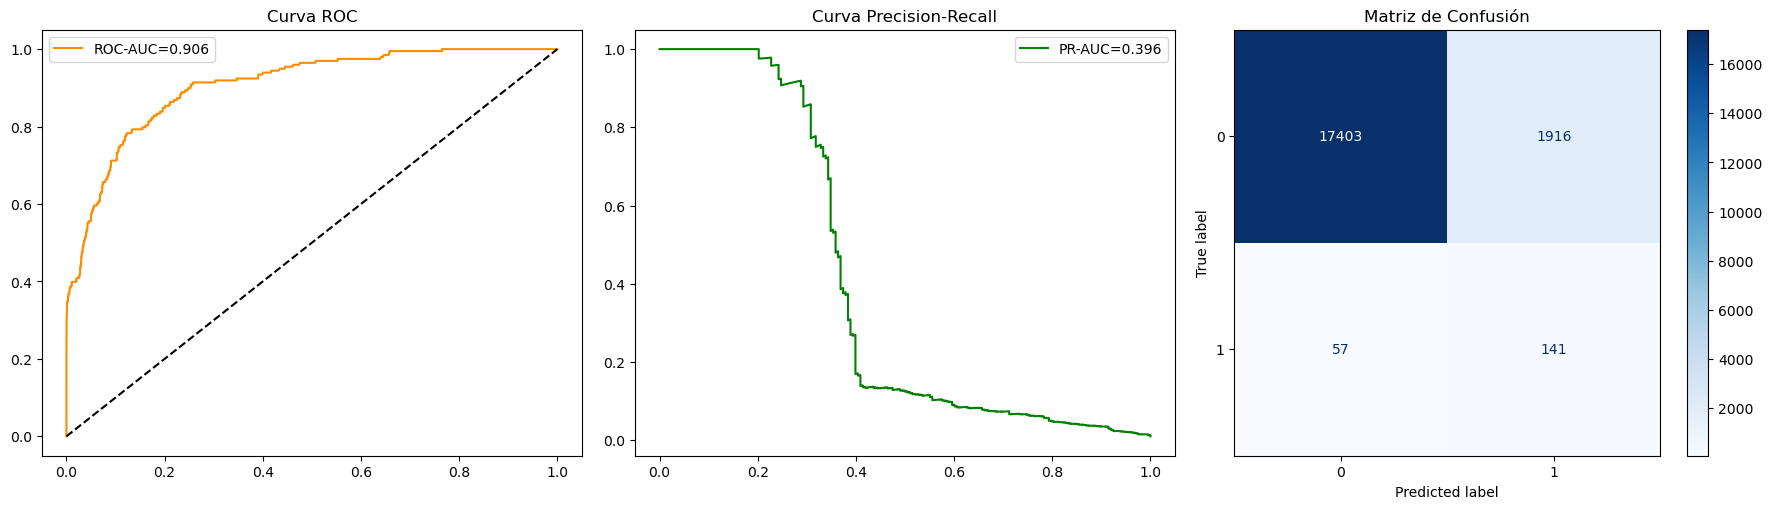


--- ⚖️ 3.1. Importancia y Dirección en el Meta-Estimador ---
El Meta-Estimador (Regresión Logística) pondera las predicciones de los modelos base:
| Modelo Base   |   Peso (Coef) |   Peso Absoluto |
|:--------------|--------------:|----------------:|
| cb            |       22.4586 |         22.4586 |
| lgbm          |       11.8748 |         11.8748 |


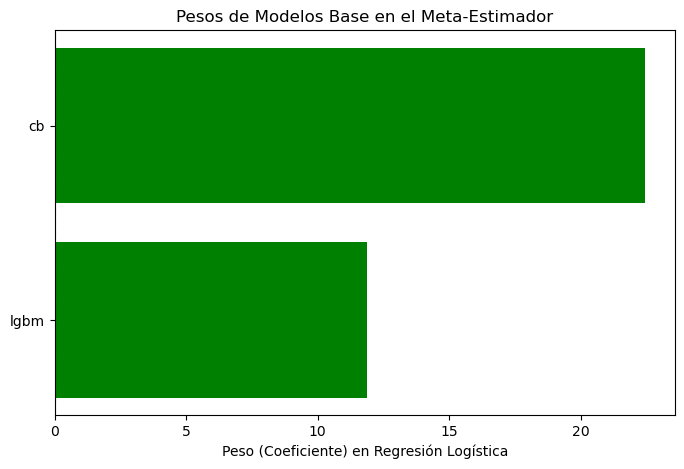


--- 🌳 3.2. Importancia de Variables (Nivel 1) ---
INFO: Estimador CatBoost encontrado usando el alias 'cb'.
Importancia de TODAS las Variables (Normalizada y Absoluta):
| Feature                                        |   LGBM_Imp |     CB_Imp |   LGBM_Imp_Norm |   CB_Imp_Norm |   Imp Promedio |   Imp Diferencia |
|:-----------------------------------------------|-----------:|-----------:|----------------:|--------------:|---------------:|-----------------:|
| total_clicks_por_dia                           |        203 | 17.9861    |      0.581662   |    1          |     0.790831   |      -0.418338   |
| canal                                          |        162 | 13.9181    |      0.464183   |    0.773826   |     0.619005   |      -0.309642   |
| total_clicks                                   |        264 |  7.83189   |      0.756447   |    0.435442   |     0.595944   |       0.321005   |
| recencia_fichas                                |        349 |  2.51055   |      1          | 

In [122]:
# Asegúrate de que X_train_val, y_train_val, etc. están cargados
# y que lr_best_params tiene el formato correcto (ej. {'lr_C': 0.1, ...})
cat_cols = ['bondad_email','tipo_usuario', 'canal', 'dia_semana_registro']

df_cb_lgbm['Engagement_por_Email'] = 0.0
df_cb_lgbm.loc[df_cb_lgbm['bondad_email'] == '20', 'engagement_por_email'] = df_cb_lgbm['clicks_por_sesion']

X_train_val, X_test, y_train_val, y_test = create_stratified_splits(df_cb_lgbm)
# 1. Ejecutar Construcción y Predicción
y_test_real, y_pred_final, y_pred_proba, pipeline_entrenado = construir_y_predecir_modelo_final(
    X_train_val, y_train_val, X_test, y_test,
    lgbm_best_params, cb_best_params, lr_best_params, cat_cols,
    output_folder = 'results/final_model_fase2'
)

df_cb_lgbm['engagement_por_email'] = 0.0
df_cb_lgbm.loc[df_cb_lgbm['bondad_email'] == '20', 'engagement_por_email'] = df_cb_lgbm['clicks_por_sesion']
# 2. Evaluar
evaluar_modelo(y_test_real, y_pred_final, y_pred_proba)

# 3. Analizar
analizar_meta_estimator(pipeline_entrenado)
analizar_importancia_base(pipeline_entrenado, X_train_val.columns.tolist())

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h5 style="color:#2c3e50; font-weight:bold;">📌 Conclusiones</h5>

<p>
El proceso de reingeniería de variables aplicado al modelo de <em>stacking</em> permitió identificar varios aciertos que contribuyeron de forma sustantiva al desempeño predictivo. Entre ellos, destaca la incorporación de señales de alto valor informativo, particularmente aquellas relacionadas con el <strong>engagement por email</strong>, cuya reformulación facilitó que <i>LightGBM</i> capturara con mayor claridad su contribución marginal. Asimismo, variables como <strong>total_clicks_por_dia</strong> y <strong>recencia_ficha_unica</strong> mostraron una capacidad predictiva notable, especialmente cuando esta última se reforzó mediante su combinación con la variable global de recencia.
</p>

<p>
De forma complementaria, se constató que las variables categóricas ganan relevancia incluso sin procesos de codificación adicionales, en línea con las capacidades nativas de <i>CatBoost</i>. En este contexto, la reincorporación de variables como <strong>mes_registro</strong> y <strong>recencia</strong> resultó adecuada, ya que aportan información temporal relevante que el modelo es capaz de explotar de manera efectiva.
</p>

<p>
Por el contrario, algunas de las transformaciones evaluadas no produjeron mejoras apreciables en el rendimiento del sistema. La aplicación de transformaciones logarítmicas —en particular sobre <i>total_fichas_consultadas</i>— no aportó beneficios y, de hecho, se observó que la versión original de la variable retenía una mayor influencia en el modelo. Asimismo, la variable <i>bondad_email</i> perdió protagonismo al quedar parcialmente solapada con la señal reforzada capturada a través de <i>engagement_email</i>, lo que sugiere una redundancia conceptual entre ambas. Las combinaciones generadas a partir de la variable <i>es_finde</i> tampoco ofrecieron mejoras significativas, indicando que la información contextual asociada al fin de semana no resulta especialmente discriminativa en este caso.
</p>

<p>
Tras diversas iteraciones de entrenamiento manual y la aplicación de un procedimiento sistemático de selección automática de variables —que se detalla en la sección siguiente— se procedió a depurar el conjunto final de predictores. En particular, se eliminaron aquellas variables cuya <strong>importancia media normalizada</strong> se situó de forma consistente por debajo de 0.1. El análisis de importancias revela una clara concentración del peso predictivo en un subconjunto reducido de señales, lo que respalda la decisión de simplificación y contribuye tanto a mejorar la interpretabilidad como a optimizar la eficiencia del modelo final.
</p>

</div>



<h4>Eliminacion de caracteristicas y reevaluacion</h4>

--- Iniciando división de datos (195165 registros)
target col y variable estratificada = "es_cliente" random state = 42, test size = 10.0% ---

--- Distribución de Clases (Verificación) ---
Original (195165):
es_cliente
0   98.98%
1    1.02%

Train/Validation (175648):
es_cliente
0   98.98%
1    1.02%

Test (19517):
es_cliente
0   98.99%
1    1.01%

✅ Verificación: La división fue exitosa y estratificada.
✔️ Modelo encontrado. Cargando desde: results/final_model_fase25\stacking_final_pipeline.joblib
✅ Usando modelo previamente entrenado.

Generando predicciones en X_test...

--- 📊 2.1. Métricas de Rendimiento Estándar ---
| Métrica   |   Valor |
|:----------|--------:|
| Accuracy  |  0.955  |
| Precision |  0.1366 |
| Recall    |  0.6465 |
| F1-Score  |  0.2256 |
| ROC AUC   |  0.9258 |
| PR AUC    |  0.4726 |
| FP Rate   |  0.0419 |

--- 💰 2.2. Métricas de Negocio ---
| KPI                 | Valor   |
|:--------------------|:--------|
| Total Test          | 19517   |
| Clientes Reale

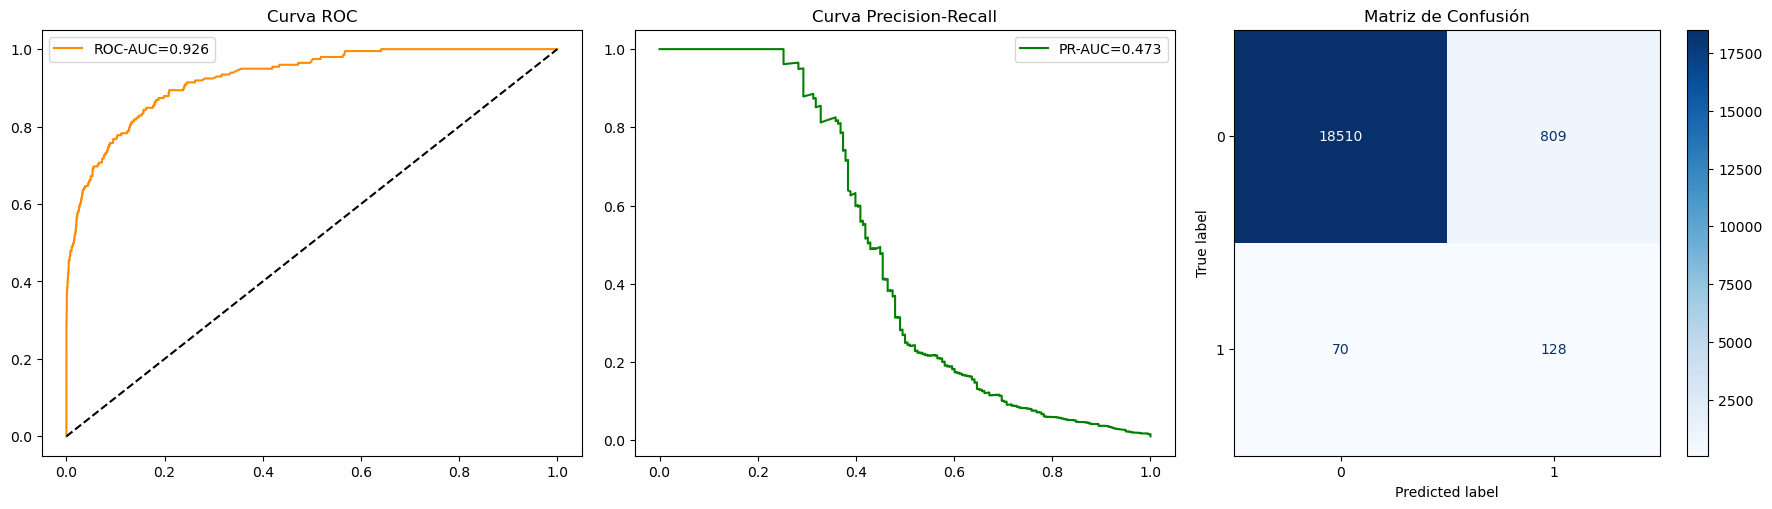


--- ⚖️ 3.1. Importancia y Dirección en el Meta-Estimador ---
El Meta-Estimador (Regresión Logística) pondera las predicciones de los modelos base:
| Modelo Base   |   Peso (Coef) |   Peso Absoluto |
|:--------------|--------------:|----------------:|
| cb            |       22.0178 |         22.0178 |
| lgbm          |       12.2636 |         12.2636 |


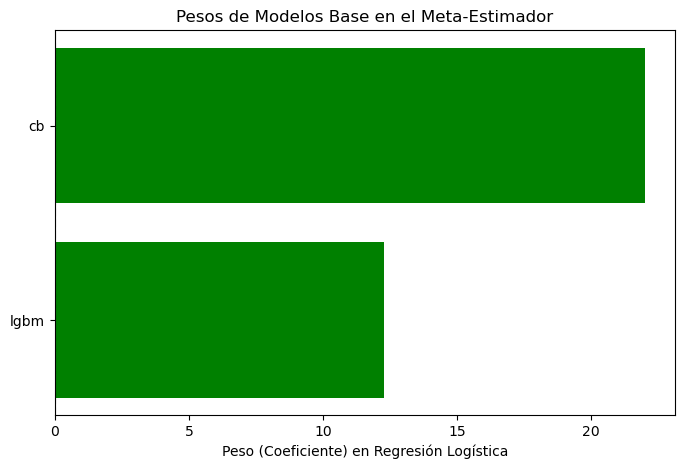


--- 🌳 3.2. Importancia de Variables (Nivel 1) ---
INFO: Estimador CatBoost encontrado usando el alias 'cb'.
Importancia de TODAS las Variables (Normalizada y Absoluta):
| Feature                                    |   LGBM_Imp |   CB_Imp |   LGBM_Imp_Norm |   CB_Imp_Norm |   Imp Promedio |   Imp Diferencia |
|:-------------------------------------------|-----------:|---------:|----------------:|--------------:|---------------:|-----------------:|
| engagement_por_email                       |        162 | 24.2434  |       0.305648  |     1         |      0.652824  |       -0.694352  |
| usuarios_que_consultan_misma_primera_ficha |        371 |  5.66669 |       1         |     0.1987    |      0.59935   |        0.8013    |
| recencia_fichas                            |        354 |  4.46326 |       0.943522  |     0.146791  |      0.545156  |        0.796731  |
| total_fichas_consultadas                   |        281 |  6.46916 |       0.700997  |     0.233314  |      0.467155  |    

In [124]:
delete_cols= [
    'Engagement_por_Email',
    'log_total_fichas_consultadas',
    'log_usuarios_que_consultan_misma_primera_ficha',
    'email_bueno_finde',
    'PF_finde',
    'flag_ficha_unica',
    'es_finde_registro',
    'sesiones_finde',
    'log_antiguedad_real',
    'clicks_despues_registro_finde',#Devuelvela 15->16
    'fichas_consultadas_si_tiene',
    'tiene_fichas', #Señal mejor capturada con las combinadas 
    'peer_signal_si_fichas', 
    'peer_signal_unica',
    'fichas_y_email_bueno', #Penaliza demasiado a LGBM y su informacion esta en engagement_por_email 
    'num_dias_sesiones', #Penaliza demasiado a CatBoost
    'dia_semana_registro',
    'bondad_email'
]
df_final_cb_lgbm = df_cb_lgbm.drop(columns=delete_cols)
# Asegúrate de que X_train_val, y_train_val, etc. están cargados
# y que lr_best_params tiene el formato correcto (ej. {'lr_C': 0.1, ...})
X_train_val, X_test, y_train_val, y_test = create_stratified_splits(df_final_cb_lgbm)
# 1. Ejecutar Construcción y Predicción
new_cat_cols =['canal', 'tipo_usuario']
y_test_real, y_pred_final, y_pred_proba, pipeline_entrenado = construir_y_predecir_modelo_final(
    X_train_val, y_train_val, X_test, y_test,
    lgbm_best_params, cb_best_params, lr_best_params, new_cat_cols,
    output_folder = 'results/final_model_fase25'
)

# 2. Evaluar
evaluar_modelo(y_test_real, y_pred_final, y_pred_proba)

# 3. Analizar
analizar_meta_estimator(pipeline_entrenado)
analizar_importancia_base(pipeline_entrenado, X_train_val.columns.tolist())

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h5 style="color:#2c3e50; font-weight:bold;">📌 Conclusiones</h5>
<p>La depuración del conjunto de variables produjo una mejora ligera pero consistente del rendimiento, especialmente en métricas clave para escenarios desbalanceados. En concreto, se observa un incremento del PR-AUC (0.4665 → 0.4726) y del recall (63.1% → 64.6%), lo que indica que la eliminación de predictores poco informativos redujo ruido y permitió al modelo concentrarse en señales más estables, sin deteriorar las métricas de negocio (Lift y Gain), que se mantienen prácticamente invariantes.</p>
</div>



<h4>Selección automática de variables (SFFS)</h4> 
<p> Con el fin de explorar una posible reducción del espacio de variables y analizar su contribución individual al rendimiento del modelo, se implementó un procedimiento de <strong>selección automática de características</strong>. El objetivo principal de esta fase fue obtener una visión complementaria sobre la relevancia de los predictores, más que mejorar directamente el desempeño del modelo final. </p>

<p> Para ello se utilizó el método <strong>SFFS (Sequential Floating Forward Selection)</strong>, una técnica de tipo <em>wrapper</em> que evalúa subconjuntos de variables entrenando los modelos reales en cada iteración. El algoritmo combina una fase de adición progresiva de variables con una fase condicional de eliminación, lo que permite mitigar redundancias y efectos de colinealidad dinámica. </p> 

<p> La implementación se adaptó a la arquitectura de <em>stacking</em> empleada, evaluando cada subconjunto mediante una métrica de <strong>PR-AUC ponderada</strong> según la contribución relativa de los modelos base (CatBoost y LightGBM), y utilizando validación cruzada estratificada para garantizar estabilidad en un contexto de fuerte desbalance de clases. </p>

<p> Si bien este enfoque permitió identificar patrones consistentes en las variables más influyentes desde una perspectiva individual, no produjo mejoras relevantes respecto al conjunto de predictores ya optimizado. Por este motivo, sus resultados se emplean únicamente como apoyo interpretativo y se discuten en las conclusiones, sin incorporarse al modelo final. </p>


In [125]:
# SFS / SFFS optimizado para LGBM y CatBoost con Parámetros Óptimos
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.base import clone
import matplotlib.pyplot as plt

# -------------------------
# 3. Utilidades
# -------------------------
def safe_cv_score(model, X_sub, y, n_splits=3):
    """
    Devuelve promedio de PR-AUC. Maneja columnas categóricas automáticamente 
    si el DF las tiene definidas como 'category'.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = []
    
    # Lista de columnas categóricas en este subconjunto
    current_cats = [c for c in X_sub.columns if X_sub[c].dtype.name == 'category']

    for train_idx, test_idx in skf.split(X_sub, y):
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Validación de seguridad para desbalance extremo
        if y_train.sum() < 2 or y_test.sum() < 2: 
            print("!Sin positivos en este fold!")
            continue
            
        X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
        
        # Clonar y entrenar
        model_clone = clone(model)
        
        # Manejo específico para CatBoost si es necesario, aunque con dtypes suele bastar.
        # LGBM lo maneja nativo con dtypes.
        try:
            if isinstance(model_clone, CatBoostClassifier) and len(current_cats) > 0:
                model_clone.fit(X_train, y_train, cat_features=current_cats)
            else:
                model_clone.fit(X_train, y_train)
                
            preds = model_clone.predict_proba(X_test)[:, 1]
            score = average_precision_score(y_test, preds)
            
            if not np.isnan(score):
                scores.append(score)
        except Exception as e:
            print("Error en score de 1 fold")
            # Capturar errores de dimensionalidad o categorías y seguir
            # print(f"Error en fold: {e}") 
            continue

    if len(scores) == 0:
        return 0.0
    return float(np.mean(scores))

# Prefiltro univariante (Solo se usa si prefilter_k no es None)
def univariate_ranking(X, y, models, n_splits=3):
    scores = {}
    print(f"Iniciando ranking univariado de {X.shape[1]} variables...")
    for col in X.columns:
        X_col = X[[col]]
        scs = []
        for name, model in models.items():
            sc = safe_cv_score(model, X_col, y, n_splits=n_splits)
            scs.append(sc)
        scores[col] = np.mean(scs)
    ranked = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return ranked


In [126]:
def sfs_sffs(X, y, models, max_features=20, floating=True, prefilter_k=15, n_splits=3, results_file="features_auto_selection_sfs.csv"):
    
    candidate_features = list(X.columns)
    
    # ----------------------------------------------------
    # LÓGICA DE CHECKPOINTING / REANUDACIÓN (AÑADIDO)
    # ----------------------------------------------------<
    selected = []
    results = []
    best_avg_global = -np.inf
    start_step = 1
    
    if os.path.exists(results_file):
        try:
            results_df_prev = pd.read_csv(results_file)
            
            if not results_df_prev.empty:
                # 1. Recuperar el mejor score global
                best_row = results_df_prev.iloc[-1]
                best_avg_global = best_row['avg_score']
                
                # 2. Recuperar la lista de features seleccionadas (último estado)
                # La columna 'features_list' se guarda como string, necesitamos convertirla a lista
                selected_str = best_row['features_list'].strip('[]')
                selected = [item.strip().strip("'\"") for item in selected_str.split(', ') if item.strip()]
                
                # 3. Actualizar el paso de inicio
                # Si el último paso fue una 'add', comenzamos en el siguiente.
                start_step = best_row['step'] + 1
                
                # 4. Cargar el historial completo de resultados
                results = results_df_prev.to_dict('records')
                
                print(f"============================================================")
                print(f"✅ Cargando informacion: {results_file}")
                print(f"   - Ultimo paso: {start_step - 1}")
                print(f"   - Features: {len(selected)} -> {selected}")
                print(f"   - Mejor Score Global: {best_avg_global:.5f}")
                print(f"============================================================")
                return selected, pd.DataFrame(results)
        except Exception as e:
            print(f"ADVERTENCIA: Error al cargar el checkpoint ({e}). Iniciando desde cero.")
            pass # Si falla la carga, simplemente iniciamos desde cero (el estado por defecto)

    # ----------------------------------------------------
    
    # 1) Prefiltro opcional: SOLO se ejecuta si se inicia desde cero (start_step == 1)
    if prefilter_k is not None and prefilter_k < len(candidate_features):
        if start_step == 1:
            print(f"Prefiltrando top {prefilter_k} features...")
            # Aquí iría la llamada a univariate_ranking()
            # ranked = univariate_ranking(X, y, models, n_splits=n_splits)
            # candidate_features = [f for f, s in ranked[:prefilter_k]]
            print("Candidatos seleccionados:", candidate_features)
        else:
            # Reanudación: Se salta el prefiltro porque ya se hizo en Paso 1.
            print(f"⏩ Saltando el paso de prefiltrado (ya ejecutado en Paso 1).")
    else:
        # No hay prefiltro o es demasiado amplio.
        print(f"Sin prefiltro. Explorando las {len(candidate_features)} features.")

    # Parámetro de parada: mejora mínima requerida para continuar
    min_improvement = 1e-5 # Mínimo 0.00001 de mejora en el score para continuar

    for step in range(start_step, max_features + 1):
        
        # LÍNEA AÑADIDA PARA CONFIRMAR EL PASO DE INICIO
        print(f"\n=== INICIANDO PASO {step} (Target Max: {max_features}) ===")
        
        
        # --- FORWARD STEP ---
        # Inicialización de variables para encontrar el mejor candidato en este paso
        best_candidate = None
        best_candidate_scores = None
        best_avg_step = -np.inf
        
        # Búsqueda de la mejor feature para añadir al conjunto 'selected':
        
        # Iterar sobre candidatos restantes
        # **Asegúrate de que 'features_to_try' solo incluye candidatos NO seleccionados.**
        features_to_try = [f for f in candidate_features if f not in selected]
        
        # Si no quedan features por probar, salimos
        if not features_to_try and len(selected) < max_features:
            print("🛑 No quedan features candidatas para añadir. Parando.")
            break
            
        for feat in features_to_try:
            current_features = selected + [feat]
            X_sub = X[current_features]
            
            # Evaluar en ambos modelos
            model_scores = {}
            for name, model in models.items():
                model_scores[name] = safe_cv_score(model, X_sub, y, n_splits=n_splits)
            
            # CÓDIGO MEJORADO (Promedio Ponderado):
            P_CB = 0.50  # Peso de CatBoost en el Stacking final
            P_LGBM = 0.50 # Peso de LightGBM en el Stacking final
            
            score_cb = model_scores['CatBoost']
            score_lgbm = model_scores['LightGBM']
            
            avg_score = (P_CB * score_cb) + (P_LGBM * score_lgbm)
            
            # Guardar si es el mejor de este paso
            if avg_score > best_avg_step:
                best_avg_step = avg_score
                best_candidate = feat
                best_candidate_scores = model_scores
            
            # (Opcional) Imprimir progreso en tiempo real si se desea
            # print(f"  + {feat}: {avg_score:.4f}") # Quitar o comentar para ejecución larga

        # Comprobar mejora respecto al paso anterior
        if best_candidate is None or (best_avg_step - best_avg_global) < min_improvement:
            print(f"🛑 No hay mejora significativa ({min_improvement}). Parando.")
            break

        # Aceptar candidato
        selected.append(best_candidate)
        best_avg_global = best_avg_step
        print(f"✅ ACEPTADO: {best_candidate} | PR-AUC Promedio: {best_avg_global:.5f}")
        # print(f"  Detalle: {best_candidate_scores}")

        # Añadir y guardar el paso (MANDATORIO)
        results.append({
            "step": step,
            "action": "add",
            "feature": best_candidate,
            "features_list": str(list(selected)), # Guardar como string para CSV
            "avg_score": best_avg_global,
            **best_candidate_scores
        })
        
        # Guardado parcial de seguridad
        pd.DataFrame(results).to_csv(OUT_CSV, index=False)


        # --- BACKWARD STEP (Floating) ---
        if floating and len(selected) > 2:
            # Lógica para determinar si alguna feature seleccionada puede ser eliminada
            print("  Values floating (backward check)...")
            # Probar quitar cada feature seleccionada
            for feat_to_remove in selected:
                if feat_to_remove == best_candidate: continue
                
                trial_sel = [f for f in selected if f != feat_to_remove]
                X_sub = X[trial_sel]
                
                model_scores = {}
                for name, model in models.items():
                    model_scores[name] = safe_cv_score(model, X_sub, y, n_splits=n_splits)
                
                avg_rem = np.mean(list(model_scores.values()))
                
                if avg_rem > best_avg_global + 1e-6: # Solo si mejora estrictamente
                    print(f"  ! Quitar {feat_to_remove} mejora el score: {best_avg_global:.5f} -> {avg_rem:.5f}")
                    # Ejecutamos la eliminación
                    selected.remove(feat_to_remove)
                    best_avg_global = avg_rem
                    results.append({
                        "step": step,
                        "action": "remove",
                        "feature": feat_to_remove,
                        "features_list": str(list(selected)), # Guardar como string para CSV
                        "avg_score": best_avg_global,
                        **model_scores
                    })
                    # Guardar inmediatamente después de un REMOVE exitoso
                    pd.DataFrame(results).to_csv(OUT_CSV, index=False)
                    break # Solo removemos una por paso para simplificar
            
    return selected, pd.DataFrame(results)

In [127]:
# -------------------------
# 0. Preparación de Datos
# -------------------------

cat_cols = ['canal', 'bondad_email', 'tipo_usuario', 'dia_semana_registro']
for col in cat_cols:
    if col in df_cb_lgbm.columns:
        df_cb_lgbm[col] = df_cb_lgbm[col].astype('category')

# -------------------------
# 1. Configuración de Modelos (USANDO TUS BEST PARAMS)
# -------------------------
# Definición usando los diccionarios de mejores parámetros que ya tienes cargados
# Asegurar de que lgbm_best_params y cb_best_params existen en el entorno
print("Configurando modelos con parámetros óptimos previos...")
N_ESTIMATORS_REDUCED = 500 # EJEMPLO
ITERATIONS_REDUCED = 500   # EJEMPLO

lgbm_final = LGBMClassifier( 
    **{**lgbm_best_params,# Primero desempaqueta best_params
       'eval_metric': 'average-precision',
       'random_state': 42,  # Luego añade/sobrescribe
       'n_jobs': -1,
       'verbose': -1,
       'n_estimators': N_ESTIMATORS_REDUCED}
)

cb_final = CatBoostClassifier(
    **{**cb_best_params,
    'eval_metric':'PRAUC',
    'random_state': 42,
    'verbose': 0,
    'thread_count': -1,
    'allow_writing_files': False,
    'train_dir': None,
    'iterations': ITERATIONS_REDUCED
}   
)
print(f"lgbm params {lgbm_final.get_params()}")
print(f"cb params {cb_final.get_params()}")
MODEL_PARAMS = {
    "LightGBM": lgbm_final,
    "CatBoost": cb_final
}

# -------------------------
# 2. Configuración SFS/SFFS (Ajustada para ejecución exhaustiva)
# -------------------------
RESULTS_DIR = "results/features_auto_selection_7"
os.makedirs(RESULTS_DIR, exist_ok=True)
OUT_CSV = os.path.join(RESULTS_DIR, "features_auto_selection_sfs.csv")

# AJUSTES PARA 7 HORAS DE PROCESAMIENTO:
# 1. Sin prefiltro (None) o muy amplio (40) para permitir que SFFS encuentre interacciones complejas.
prefilter_k = None 

n_splits = 3

max_features = 30 

floating = True         # True = SFFS (puede quitar features si sobran)
min_improvement = 1e-6
random_state = 42

Configurando modelos con parámetros óptimos previos...
lgbm params {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'lgbm_n_estimators': 1800, 'lgbm_learning_rate': 0.018067869990858458, 'lgbm_num_leaves': 26, 'lgbm_min_child_samples': 30, 'lgbm_reg_alpha': 0.005330854069554935, 'lgbm_reg_lambda': 0.09987730382558391, 'lgbm_feature_fraction': 0.9170603878199113, 'lgbm_min_gain_to_split': 0.06584088996754021, 'eval_metric': 'average-precision', 'verbose': -1}
cb params {'iterations': 500, 'learning_rate': 0.02542971271126076, 'depth': 9, 'l2_leaf_reg': 4.4036714336001195, 'verbose': 0, 'random_strength': 0.863135324261114, 'eval_m

In [128]:
# -------------------------
# 5. Ejecución
# -------------------------
print("Iniciando SFFS exhaustivo...")
print(f"Output: {OUT_CSV}")
print("\nUsando dataset de entreno (90%):\n")
display(X_train_val.head(2))
print("\n")
final_selected, df_results = sfs_sffs(
    X_train_val, y_train_val, 
    MODEL_PARAMS, 
    max_features=max_features, 
    floating=floating, 
    prefilter_k=prefilter_k, 
    n_splits=n_splits,
    results_file=OUT_CSV
)

print("\n=== PROCESO TERMINADO ===")
print("Mejores features seleccionadas:", final_selected)

Iniciando SFFS exhaustivo...
Output: results/features_auto_selection_7\features_auto_selection_sfs.csv

Usando dataset de entreno (90%):



canal tipo_usuario  mes_registro  total_fichas_consultadas  \
111955  Directorios           PF             8                         1   
64138   Directorios           PF             3                         0   

        recencia_fichas  antiguedad_comportamiento_fichas  total_sesiones  \
111955             1069                                 0               2   
64138              2306                                -1               2   

        total_clicks  clicks_por_sesion  sesiones_por_dia  \
111955             4                2.0               2.0   
64138              3                1.5               2.0   

        usuarios_que_consultan_misma_primera_ficha  engagement_por_email  \
111955                                          20                   2.0   
64138                                            1                   1.5   

        total_clicks_por_dia  clicks_si_fichas  recencia_ficha_unica  
111955                   4.0               4.0                  1069  
64138                    3.0               0.0                     0



✅ Cargando informacion: results/features_auto_selection_7\features_auto_selection_sfs.csv
   - Ultimo paso: 11
   - Features: 9 -> ['total_fichas_consultadas', 'total_clicks', 'usuarios_que_consultan_misma_primera_ficha', 'canal', 'tipo_usuario', 'clicks_por_sesion', 'num_dias_sesiones', 'peer_signal_unica', 'bondad_email']
   - Mejor Score Global: 0.43544

=== PROCESO TERMINADO ===
Mejores features seleccionadas: ['total_fichas_consultadas', 'total_clicks', 'usuarios_que_consultan_misma_primera_ficha', 'canal', 'tipo_usuario', 'clicks_por_sesion', 'num_dias_sesiones', 'peer_signal_unica', 'bondad_email']


In [129]:
cols = [
    'es_cliente',
    'total_fichas_consultadas',
    'total_clicks',
    'usuarios_que_consultan_misma_primera_ficha',
    'canal',
    'tipo_usuario',
    'clicks_por_sesion',
    'num_dias_sesiones',
    'peer_signal_unica',
    'bondad_email'
]

df_cb_lgbm_sfss = df_cb_lgbm[cols]

<h4>Entreno y evaluacion del modelo</h4>

--- Iniciando división de datos (195165 registros)
target col y variable estratificada = "es_cliente" random state = 42, test size = 10.0% ---

--- Distribución de Clases (Verificación) ---
Original (195165):
es_cliente
0   98.98%
1    1.02%

Train/Validation (175648):
es_cliente
0   98.98%
1    1.02%

Test (19517):
es_cliente
0   98.99%
1    1.01%

✅ Verificación: La división fue exitosa y estratificada.
✔️ Modelo encontrado. Cargando desde: results/final_model_fase8\stacking_final_pipeline.joblib
✅ Usando modelo previamente entrenado.

Generando predicciones en X_test...

--- 📊 2.1. Métricas de Rendimiento Estándar ---
| Métrica   |   Valor |
|:----------|--------:|
| Accuracy  |  0.9556 |
| Precision |  0.1344 |
| Recall    |  0.6212 |
| F1-Score  |  0.221  |
| ROC AUC   |  0.9165 |
| PR AUC    |  0.4572 |
| FP Rate   |  0.041  |

--- 💰 2.2. Métricas de Negocio ---
| KPI                 | Valor   |
|:--------------------|:--------|
| Total Test          | 19517   |
| Clientes Reales

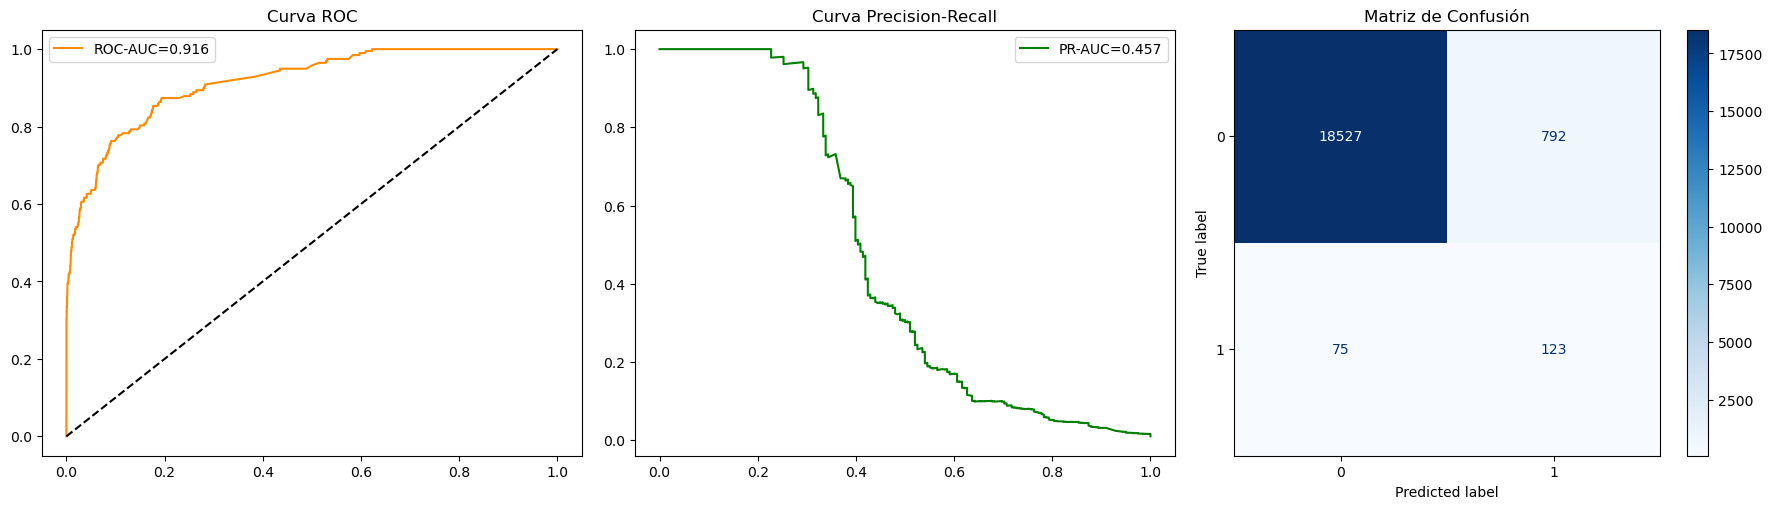


--- ⚖️ 3.1. Importancia y Dirección en el Meta-Estimador ---
El Meta-Estimador (Regresión Logística) pondera las predicciones de los modelos base:
| Modelo Base   |   Peso (Coef) |   Peso Absoluto |
|:--------------|--------------:|----------------:|
| cb            |       20.1238 |         20.1238 |
| lgbm          |       13.0395 |         13.0395 |


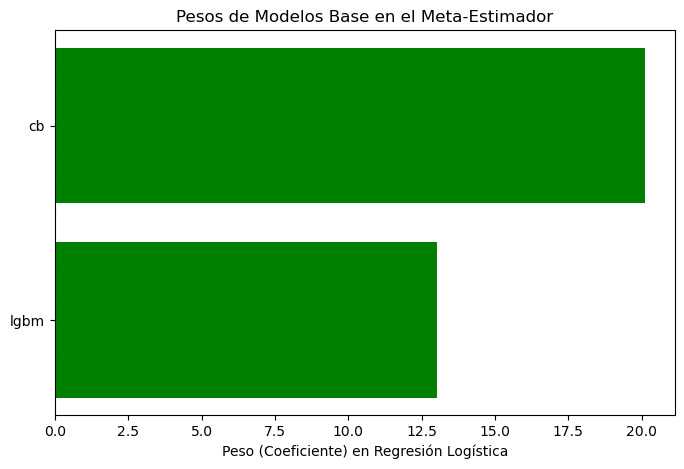


--- 🌳 3.2. Importancia de Variables (Nivel 1) ---
INFO: Estimador CatBoost encontrado usando el alias 'cb'.
Importancia de TODAS las Variables (Normalizada y Absoluta):
| Feature                                    |   LGBM_Imp |   CB_Imp |   LGBM_Imp_Norm |   CB_Imp_Norm |   Imp Promedio |   Imp Diferencia |
|:-------------------------------------------|-----------:|---------:|----------------:|--------------:|---------------:|-----------------:|
| total_clicks                               |        617 | 12.889   |        1        |     0.379486  |      0.689743  |         0.620514 |
| clicks_por_sesion                          |        600 | 13.4266  |        0.969424 |     0.400221  |      0.684823  |         0.569203 |
| bondad_email                               |         61 | 28.9762  |        0        |     1         |      0.5       |        -1        |
| total_fichas_consultadas                   |        495 |  8.39938 |        0.780576 |     0.206313  |      0.493444  |    

In [130]:
new_cat_cols =['canal', 'tipo_usuario', 'bondad_email']
X_train_val, X_test, y_train_val, y_test = create_stratified_splits(df_cb_lgbm_sfss)

y_test_real, y_pred_final, y_pred_proba, pipeline_entrenado = construir_y_predecir_modelo_final(
    X_train_val, y_train_val, X_test, y_test,
    lgbm_best_params, cb_best_params, lr_best_params, new_cat_cols,
    output_folder = 'results/final_model_fase8'
)

# 2. Evaluar
evaluar_modelo(y_test_real, y_pred_final, y_pred_proba)

# 3. Analizar
analizar_meta_estimator(pipeline_entrenado)
analizar_importancia_base(pipeline_entrenado, X_train_val.columns.tolist())

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="color:#2c3e50; font-weight:bold;">📌 Conclusiones</h4>

<p>
Los resultados obtenidos indican que el proceso de selección automática de variables no aporta mejoras relevantes en el rendimiento del modelo en este contexto. El método empleado presenta limitaciones para capturar adecuadamente las <strong>interacciones no lineales y sinergias complejas</strong> entre predictores, especialmente en una arquitectura de tipo <em>stacking</em> basada en modelos de <em>gradient boosting</em>. Asimismo, su aplicación con configuraciones exigentes en términos de validación y métrica implica un <strong>coste computacional elevado</strong>, lo que reduce su utilidad práctica frente a enfoques alternativos.
</p>

<p>
No obstante, este análisis ha resultado útil como herramienta exploratoria, al confirmar de forma consistente la relevancia de un conjunto reducido de variables clave —principalmente aquellas asociadas al comportamiento del usuario y a la interacción con contenidos—. En consecuencia, la selección final de predictores se apoya en el <strong>análisis de importancias derivado del modelado final</strong>, que ofrece una visión más robusta y alineada con el desempeño observado sobre el conjunto de prueba.
</p>

<p>
En el siguiente y último ciclo se procederá a evaluar de manera sistemática las optimizaciones más prometedoras identificadas hasta este punto y a consolidar el <strong>modelo definitivo</strong>.
</p>
</div>



<h3>Ciclo 3: Consolidación del Dataset Final y Ajuste Definitivo del Modelo</h3>

<p>
El tercer y último ciclo del proceso de modelado tiene como objetivo la <strong>consolidación definitiva del sistema predictivo</strong>. En esta fase se construye el <strong>dataset final</strong>, incorporando únicamente las variables y transformaciones que han demostrado aportar valor de forma consistente en los ciclos anteriores, priorizando robustez, interpretabilidad y estabilidad en generalización.
</p>

<p>
A partir de este conjunto de datos depurado, se realiza una <strong>tercera y última iteración de optimización de hiperparámetros</strong>, centrada en un ajuste fino del espacio de búsqueda previamente acotado. Este proceso no persigue una exploración exhaustiva, sino una mejora incremental orientada a consolidar los valores óptimos identificados en fases anteriores.
</p>

<p>
Finalmente, se lleva a cabo una <strong>evaluación comparativa sobre el conjunto de prueba</strong>, analizando el rendimiento de los modelos base (<i>CatBoost</i> y <i>LightGBM</i>) bajo las distintas configuraciones de hiperparámetros obtenidas a lo largo de los tres ciclos. Este análisis permite validar la estabilidad de los resultados, descartar configuraciones subóptimas y seleccionar de manera informada la arquitectura y parametrización definitivas que alimentarán el modelo final de <em>stacking</em>.
</p>


<h4>Dataset definitivo</h4>

In [131]:
cat_cols = ['tipo_usuario', 'canal']
categorical_features = cat_cols

delete_cols= [
    #'Engagement_por_Email',
    'log_total_fichas_consultadas',
    'log_usuarios_que_consultan_misma_primera_ficha',
    'email_bueno_finde',
    'PF_finde',
    'flag_ficha_unica',
    'es_finde_registro',
    'sesiones_finde',
    'log_antiguedad_real',
    'clicks_despues_registro_finde',#Devuelvela 15->16
    'fichas_consultadas_si_tiene',
    'tiene_fichas', #Señal mejor capturada con las combinadas 
    'peer_signal_si_fichas', 
    'peer_signal_unica',
    'fichas_y_email_bueno', #Penaliza demasiado a LGBM y su informacion esta en engagement_por_email 
    'num_dias_sesiones', #Penaliza demasiado a CatBoost
    'dia_semana_registro',
    'bondad_email',
]
    
df_final_cb_lgbm = df_cb_lgbm.drop(columns=delete_cols)
# Asegúrate de que X_train_val, y_train_val, etc. están cargados
# y que lr_best_params tiene el formato correcto (ej. {'lr_C': 0.1, ...})
X_train_val, X_test, y_train_val, y_test = create_stratified_splits(df_final_cb_lgbm)

--- Iniciando división de datos (195165 registros)
target col y variable estratificada = "es_cliente" random state = 42, test size = 10.0% ---

--- Distribución de Clases (Verificación) ---
Original (195165):
es_cliente
0   98.98%
1    1.02%

Train/Validation (175648):
es_cliente
0   98.98%
1    1.02%

Test (19517):
es_cliente
0   98.99%
1    1.01%

✅ Verificación: La división fue exitosa y estratificada.


In [132]:
guardar_csv(df_final_cb_lgbm, "src/datasets_stacking", "df_final_cb_lgbm.csv")

✅ df_final_cb_lgbm.csv guardado en src/datasets_stacking\df_final_cb_lgbm.csv


<h4>Optimizacion de hiperarámetros</h4>

In [133]:
# Redefinimos parametros:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

def get_params_and_model(model_name, trial, categorical_features=None, random_state=42):
    """
    Define el espacio de búsqueda de Optuna y devuelve los parámetros y el modelo.
    
    El parámetro 'categorical_features' es opcional (por defecto es None).
    Solo se usará si se proporciona al inicializar LGBM o CatBoost.
    """
    
    if model_name == 'LGBM':
        print("🛠️ Optuna: Configurando LightGBM (LGBM)...")
        
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1700, 1900, step=50),
            'learning_rate': trial.suggest_float('learning_rate', 0.008, 0.02, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 20, 60),
            'min_child_samples': trial.suggest_int('min_child_samples', 20, 50),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.004, 0.01, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.004, 0.10, log=True),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.85, 1.0),
            'boosting_type': trial.suggest_categorical('boosting_type', ['dart']),
            'min_gain_to_split' : trial.suggest_float('min_gain_to_split', 0.01, 0.2)
        }
        # Diccionario para parámetros adicionales
        lgbm_args = {
            'random_state': random_state,
            'eval_metric': 'average-precision',
            'n_jobs': -1,
            'verbose': -1,
            # Añadir categóricas si existen
            **({'categorical_feature': categorical_features} if categorical_features is not None else {})
        }
        
        model = LGBMClassifier(**params, **lgbm_args)
    
    elif model_name == 'CatBoost':
        print("🛠️ Optuna: Configurando CatBoost (CB)...")

        params = {
            'iterations': trial.suggest_int('iterations', 750, 1400, step=50),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.03, log=True),
            'depth': trial.suggest_int('depth', 5, 10),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 5.0),
            'subsample': trial.suggest_float('subsample', 0.65, 0.85),
            'random_strength': trial.suggest_float('random_strength', 0.5, 5, log=True),
            'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree'])
        }
        
        # Diccionario para parámetros adicionales de CatBoost
        catboost_args = {
            'eval_metric':'PRAUC',
            'random_state': random_state,
            'verbose': 0,
            'thread_count': -1,
            'allow_writing_files': False,
            # Añadir categóricas si existen (¡OJO: 'cat_features' PLURAL!)
            **({'cat_features': categorical_features} if categorical_features is not None else {})
        }
        
        model = CatBoostClassifier(**params, **catboost_args)
    
    elif model_name == 'LR_META':
        print("🛠️ Optuna: Configurando Logistic Regression (Meta)...")

        penalty = trial.suggest_categorical('lr_penalty', ['l1', 'l2'])
        if penalty == 'l1':
            # Para L1, solo liblinear funciona bien
            solver = 'liblinear'
        else:  # penalty == 'l2'
            # Para L2, varios solvers funcionan
            solver = trial.suggest_categorical('lr_solver', ['lbfgs', 'newton-cg'])
            
        lr_params = {
            'C': trial.suggest_float('lr_C', 0.001, 0.1, log=True),
            'penalty': trial.suggest_categorical('lr_penalty', ['l1', 'l2']),
            'solver': solver,
            'random_state': random_state,
            'max_iter': 1000, # Añadir para asegurar convergencia
        }
        
        params = lr_params.copy()
        # Crear el modelo de Logistic Regression
        model = LogisticRegression(class_weight='balanced',**lr_params)
    
    else:
        raise ValueError(f"Modelo no soportado: {model_name}. Use 'LGBM', 'CatBoost' o 'LR_META'.")

    return params, model

In [134]:
print(f"Started optimization on dataset:\n")
print(f"Categorical categories = {cat_cols}")
display(X_train_val.head(1))
lgbm_best_params, _ = run_base_tuning(X_train_val, y_train_val, model_name='LGBM', categorical_features=cat_cols, folder_name="results/tuning/params_fase25", n_trials=50)
cb_best_params, _ = run_base_tuning(X_train_val, y_train_val, model_name='CatBoost', categorical_features = cat_cols, folder_name="results/tuning/params_fase25", n_trials=75)

# 2. Generar (o cargar) Features de Nivel 2
X_level2 = generate_oof_predictions(X_train_val, y_train_val, lgbm_best_params, cb_best_params, cat_cols, "results/oof_features_fase25")

# 3. Optimizar (o cargar) el Meta-Estimador
lr_best_params, lr_best_score = run_meta_tuning(X_level2, y_train_val,folder_name="results/tuning/params_fase25", n_trials=50)

print("\n--- RESUMEN DE MEJORES PARÁMETROS ---")
print(f"LGBM: {lgbm_best_params}")
print(f"CatBoost: {cb_best_params}")
print(f"LR Meta: {lr_best_params}")

Started optimization on dataset:

Categorical categories = ['tipo_usuario', 'canal']


canal tipo_usuario  mes_registro  total_fichas_consultadas  \
111955  Directorios           PF             8                         1   

        recencia_fichas  antiguedad_comportamiento_fichas  total_sesiones  \
111955             1069                                 0               2   

        total_clicks  clicks_por_sesion  sesiones_por_dia  \
111955             4                2.0               2.0   

        usuarios_que_consultan_misma_primera_ficha  engagement_por_email  \
111955                                          20                   2.0   

        total_clicks_por_dia  clicks_si_fichas  recencia_ficha_unica  \
111955                   4.0               4.0                  1069   

        Engagement_por_Email  
111955                   0.0

✔️ Cargando parámetros desde results/tuning/params_fase25\lgbm_best_params.json
🎉 Resultados cargados para LGBM. No se requiere re-optimizar.
✔️ Cargando parámetros desde results/tuning/params_fase25\catboost_best_params.json
🎉 Resultados cargados para CatBoost. No se requiere re-optimizar.
✅ Resultados previos de OOF encontrados en results/oof_features_fase25\X_level2_oof.csv.
Cargando y devolviendo resultados existentes...
✔️ Cargando parámetros desde results/tuning/params_fase25\lr_meta_best_params.json
🎉 Resultados cargados para Logistic Regression (Meta-Estimador).

--- RESUMEN DE MEJORES PARÁMETROS ---
LGBM: {'n_estimators': 1850, 'learning_rate': 0.019670117069306953, 'num_leaves': 20, 'min_child_samples': 24, 'reg_alpha': 0.006353187509196037, 'reg_lambda': 0.04403392556093363, 'feature_fraction': 0.9759638001537078, 'boosting_type': 'dart', 'min_gain_to_split': 0.1518131467380639}
CatBoost: {'iterations': 1350, 'learning_rate': 0.016587278402388345, 'depth': 8, 'l2_leaf_reg': 

<h4>Análisis comparativo de parametrizaciones</h4>

In [140]:
cat_cols = ['tipo_usuario', 'canal']
categorical_features = cat_cols

delete_cols= [
    'Engagement_por_Email',
    'log_total_fichas_consultadas',
    'log_usuarios_que_consultan_misma_primera_ficha',
    'email_bueno_finde',
    'PF_finde',
    'flag_ficha_unica',
    'es_finde_registro',
    'sesiones_finde',
    'log_antiguedad_real',
    'clicks_despues_registro_finde',#Devuelvela 15->16
    'fichas_consultadas_si_tiene',
    'tiene_fichas', #Señal mejor capturada con las combinadas 
    'peer_signal_si_fichas', 
    'peer_signal_unica',
    'fichas_y_email_bueno', #Penaliza demasiado a LGBM y su informacion esta en engagement_por_email 
    'num_dias_sesiones', #Penaliza demasiado a CatBoost
    'dia_semana_registro',
    'bondad_email',
]
df_final_cb_lgbm = df_cb_lgbm.drop(columns=delete_cols)

In [141]:
import re
def load_pr_auc(results_filename: str) -> float | None:
    """
    Carga el valor de PR-AUC de un archivo de resultados con un formato específico.
    El archivo debe contener una línea en el formato: "PR-AUC: X.XXXX\n"
    Args:
        results_filename (str): La ruta completa del archivo de resultados.
    Returns:
        float | None: El valor del PR-AUC como número flotante, o None si no se encuentra.
    """
    if not os.path.exists(results_filename):
        print(f"ADVERTENCIA: El archivo no existe en la ruta: {results_filename}")
        return None

    # El patrón regex busca:
    # 1. 'PR-AUC: ' (la etiqueta fija)
    # 2. (\d+\.\d+) (uno o más dígitos, seguido de un punto, seguido de uno o más dígitos, que es nuestro grupo de captura)
    # 3. La línea puede terminar después.
    # El uso de 're.IGNORECASE' permite capturar 'pr-auc' o 'PR-AUC'.
    pr_auc_pattern = re.compile(r"PR-AUC:\s*(\d+\.\d+)", re.IGNORECASE)

    try:
        with open(results_filename, 'r') as f:
            for line in f:
                match = pr_auc_pattern.search(line)
                if match:
                    # El grupo 1 ([1]) es el valor numérico capturado
                    pr_auc_value = float(match.group(1))
                    print(f"✅ Éxito: PR-AUC encontrado y cargado: {pr_auc_value:.4f}")
                    return pr_auc_value
        
        # Si terminamos el bucle sin encontrar el patrón
        print(f"ADVERTENCIA: No se encontró la etiqueta 'PR-AUC:' en el archivo {results_filename}.")
        return None

    except Exception as e:
        print(f"ERROR: No se pudo leer el archivo {results_filename}. Error: {e}")
        return None

        
def train_and_evaluate_model(
    df: pd.DataFrame,
    params: dict,
    model_name: str,
    output_path: str
) -> float:
    """
    Entrena un modelo LightGBM o CatBoost, calcula el PR-AUC y guarda el modelo y resultados.

    Args:
        df (pd.DataFrame): DataFrame que contiene las features y la variable 'es_cliente'.
        params (dict): Diccionario de parámetros para el modelo especificado.
        model_name (str): Nombre del modelo ('LightGBM' o 'CatBoost').
        output_path (str): Directorio donde guardar el modelo y los resultados.

    Returns:
        float: El valor del PR-AUC obtenido en el conjunto de test.
    """
    
    # 1. Preparación y División de Datos
    
    # Asegurarse de que la carpeta de salida exista
    os.makedirs(output_path, exist_ok=True)
    filename= os.path.join(output_path, f'{model_name}_results.txt')
    if os.path.exists(filename):
        pr_auc = load_pr_auc(filename)
        return pr_auc
        
    TARGET_VAR = 'es_cliente'
    
    if TARGET_VAR not in df.columns:
        raise ValueError(f"El DataFrame debe contener la variable target: '{TARGET_VAR}'")
        
    X = df.drop(columns=[TARGET_VAR])
    y = df[TARGET_VAR]
    
    # Separar 10% para test (seed=42)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.10, random_state=42, stratify=y
    )
    
    print(f"--- Iniciando entrenamiento de {model_name} ---")
    #print(f"Tamaño de Entrenamiento: {len(X_train)} | Tamaño de Test: {len(X_test)}")

    # 2. Inicialización y Entrenamiento del Modelo
    
    model = None
    
    if model_name == 'LightGBM':
        # LightGBM necesita que la target sea numérica (0/1)
        lgb_train = lgb.Dataset(X_train, y_train)
        
        # Parámetros obligatorios para la clasificación binaria si no están en `params`
        params.setdefault('objective', 'binary')
        #params.setdefault('metric', 'auc')
        #params.setdefault('boosting_type', 'gbdt')
        
        # Entrenar
        model = lgb.train(
            params,
            lgb_train,
            num_boost_round=params.get('n_estimators', 100)
        )
        
    elif model_name == 'CatBoost':
        # CatBoost es más flexible con los parámetros y maneja categóricas automáticamente 
        # (aunque aquí asumimos que ya están codificadas o especificadas en `params['cat_features']`)
        
        model = cb.CatBoostClassifier(
            **params,
            verbose=0, # Desactivar salida de entrenamiento
        )
        
        model.fit(X_train, y_train)
        
    else:
        raise ValueError("model_name debe ser 'LightGBM' o 'CatBoost'")

    # 3. Predicción de Probabilidades
    
    # Obtener la probabilidad de ser la clase positiva (Clase 1)
    if model_name == 'CatBoost':
        # CatBoost devuelve las probabilidades para ambas clases, necesitamos la columna [:, 1]
        y_prob = model.predict_proba(X_test)[:, 1]
    else: # LightGBM
        # LightGBM devuelve directamente la probabilidad de la clase positiva
        y_prob = model.predict(X_test)

    # 4. Cálculo del PR-AUC
    
    precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recalls, precisions)
    
    print(f"PR-AUC obtenido: {pr_auc:.4f}\n")
    
    # 5. Guardar Resultados
    
    # Guardar el modelo entrenado
    # model_filename = os.path.join(output_path, f'{model_name}_model.pkl')
   
    # Guardar el resultado del PR-AUC
    results_filename = os.path.join(output_path, f'{model_name}_results.txt')
    with open(results_filename, 'w') as f:
        f.write(f"Modelo: {model_name}\n")
        f.write(f"PR-AUC: {pr_auc:.4f}\n")
        f.write("Parámetros utilizados:\n")
        for k, v in params.items():
            f.write(f"  {k}: {v}\n")
    
    return pr_auc

cat_cols = ['tipo_usuario', 'canal']

params0_lgbm ={
    "n_estimators": 1200,
    "learning_rate": 0.031483861784621175,
    "num_leaves": 10,
    "max_depth": 8,
    "min_child_samples": 56,
    "reg_alpha": 0.001034762180977269,
    "reg_lambda": 0.002758894735443576,
    "eval_metric": "average-precision",
    'random_state': 42,
    'categorical_feature': cat_cols
}
params1_lgbm={
    "n_estimators": 1800,
    "learning_rate": 0.018067869990858458,
    "num_leaves": 26,
    "min_child_samples": 30,
    "reg_alpha": 0.005330854069554935,
    "reg_lambda": 0.09987730382558391,
    "feature_fraction": 0.9170603878199113,
    "min_gain_to_split": 0.06584088996754021,
    "boosting_type": "dart",
    'random_state': 42,
    "eval_metric": "average-precision",
    'categorical_feature': cat_cols
}

params2_lgbm = {
    "n_estimators": 1850,
    "learning_rate": 0.019670117069306953,
    "num_leaves": 20,
    "min_child_samples": 24,
    "reg_alpha": 0.006353187509196037,
    "reg_lambda": 0.04403392556093363,
    "feature_fraction": 0.9759638001537078,
    "boosting_type": "dart",
    "min_gain_to_split": 0.1518131467380639,
    'random_state': 42,
    "eval_metric": "average-precision",
    'categorical_feature': cat_cols
}

params0_cb={
    "iterations": 1200,
    "learning_rate": 0.010043418192921075,
    "depth": 8,
    "l2_leaf_reg": 1.4123243282572246,
    "subsample": 0.6113633312351796,
    "min_data_in_leaf": 25,
    "eval_metric": "PRAUC",
    'random_state': 42,
    'cat_features':cat_cols
}
params1_cb = {
    "iterations": 850,
    "learning_rate": 0.02542971271126076,
    "depth": 9,
    "l2_leaf_reg": 4.4036714336001195,
    "subsample": 0.7158093626479908,
    "random_strength": 0.863135324261114,
    "grow_policy": "SymmetricTree",
    'random_state': 42,
    "eval_metric": "PRAUC",
    'cat_features':cat_cols
}
params2_cb = {
    'iterations': 950,
    'learning_rate': 0.013552589177947974,
    'depth': 9,
    'l2_leaf_reg': 2.8914705041133106,
    'subsample': 0.693879965975925,
    'random_strength': 1.2178056597738505,
    'grow_policy': 'SymmetricTree',
    'random_state': 42,
    "eval_metric": "PRAUC",
    'cat_features':cat_cols
}


model_params={
    "LightGBM": [params0_lgbm, params1_lgbm, params2_lgbm],
    "CatBoost": [params0_cb, params1_cb, params2_cb]
}

for model, params in model_params.items():
    for i, param in enumerate(params):
        tit(f"Comprobacion parametros FASE {i} de {model}")
        out_path = f"results\\tuning\\modelCheck\\{model}\\Fase_{i+1}"
        train_and_evaluate_model(
            df_final_cb_lgbm,
            param,
            model,
            out_path
        )


Comprobacion parametros FASE 0 de LightGBM
✅ Éxito: PR-AUC encontrado y cargado: 0.4558

Comprobacion parametros FASE 1 de LightGBM
✅ Éxito: PR-AUC encontrado y cargado: 0.4696

Comprobacion parametros FASE 2 de LightGBM
✅ Éxito: PR-AUC encontrado y cargado: 0.4713

Comprobacion parametros FASE 0 de CatBoost
✅ Éxito: PR-AUC encontrado y cargado: 0.4677

Comprobacion parametros FASE 1 de CatBoost
✅ Éxito: PR-AUC encontrado y cargado: 0.4730

Comprobacion parametros FASE 2 de CatBoost
✅ Éxito: PR-AUC encontrado y cargado: 0.4705


<h4>Evaluación definitiva del modelo</h4>
<p>
En esta última fase se entrenó y evaluó sobre el conjunto de prueba la <strong>mejor configuración global identificada a lo largo de los ciclos de optimización</strong>. 
Aunque se exploró una tercera optimización específica de hiperparámetros para CatBoost, los resultados mostraron un <strong>empeoramiento del rendimiento</strong>, confirmando que la configuración óptima no correspondía a la iteración más reciente, sino a una parametrización obtenida en fases anteriores.
</p>

<p>
Esta evaluación final permite consolidar la selección del modelo definitivo, priorizando estabilidad, capacidad de generalización y métricas alineadas con los objetivos de negocio.
</p>

In [142]:
def train_stacking_ensemble(
    df: pd.DataFrame,
    lgbm_params: dict,
    cb_params: dict,
    lr_params: dict,
    output_path: str,
    cv:int = 5
):
    """
    Entrena un modelo Stacking (LightGBM + CatBoost con Meta-Learner Logistic Regression).

    Args:
        df (pd.DataFrame): DataFrame que contiene las features y la variable 'es_cliente'.
        lgbm_params (dict): Parámetros para el LightGBM Base Learner.
        cb_params (dict): Parámetros para el CatBoost Base Learner.
        lr_params (dict): Parámetros para el Logistic Regression Meta-Learner.
        output_path (str): Directorio donde guardar el modelo y los resultados.

    Returns:
        tuple: (y_test, y_pred, y_pred_proba, final_model)
    """
    
    # 1. Preparación y División de Datos
    
    # Asegurarse de que la carpeta de salida exista
    os.makedirs(output_path, exist_ok=True)
    
    TARGET_VAR = 'es_cliente'
    
    if TARGET_VAR not in df.columns:
        raise ValueError(f"El DataFrame debe contener la variable target: '{TARGET_VAR}'")
        
    X = df.drop(columns=[TARGET_VAR])
    y = df[TARGET_VAR]
    
    # Separar 10% para test (seed=42, estratificado)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.10, random_state=42, stratify=y
    )
    
    print(f"--- Stacking Ensemble Iniciado ---")
    print(f"Tamaño de Entrenamiento/Validación: {len(X_train_val)} | Tamaño de Test: {len(X_test)}")

    # 2. Definición de Base Learners y Meta-Learner
    
    # Base Learner 1: LightGBM
    # Importante: Usar LGBMClassifier, no lgb.train, para la API de StackingClassifier
    # Configuramos para predecir probabilidades (ya que StackingClassifier hace esto por defecto)
    lgbm_learner = lgb.LGBMClassifier(
        **lgbm_params,
        n_jobs=-1,
        # Necesario si no se pasa en params, para que el fit sea consistente
        objective='binary',
    )
    
    # Base Learner 2: CatBoost
    cb_learner = cb.CatBoostClassifier(
        **cb_params,
        verbose=0, # Silenciar el output del fit
        # Necesario si no se pasa en params
        loss_function='Logloss'
    )



    # Inicializar el objeto
    meta_learner = LogisticRegression(
        **lr_params
    )

    # 3. Creación del Stacking Classifier
    
    estimators = [
        ('lgbm', lgbm_learner),
        ('catboost', cb_learner)
    ]
    
    final_model = StackingClassifier(
        estimators=estimators,
        final_estimator=meta_learner,
        cv=cv, # Cross-validation de 5 folds (por defecto solicitado)
        n_jobs=-1,
        passthrough=True # No pasar features originales al meta-learner (por defecto)
    )
    
    # 4. Entrenamiento
    print("Iniciando entrenamiento con CV=5...")
    final_model.fit(X_train_val, y_train_val)
    print("Entrenamiento completado.")

    # 5. Predicción y Evaluación
    
    # Predicciones binarias (usando umbral por defecto de 0.5 del meta-learner)
    y_pred = final_model.predict(X_test)
    
    # Predicciones de probabilidad para PR-AUC
    y_pred_proba = final_model.predict_proba(X_test)[:, 1]

    # Cálculo del PR-AUC
    precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recalls, precisions)
    
    print(f"--- Evaluación Final del Stacking Ensemble ---")
    print(f"PR-AUC resultante: {pr_auc:.4f}")
    
    # 6. Guardar Resultados
    
    # Guardar el modelo entrenado
    model_filename = os.path.join(output_path, 'stacking_model.pkl')
    with open(model_filename, 'wb') as f:
        pickle.dump(final_model, f)
    print(f"Modelo guardado en: {model_filename}")
    
    # Guardar el resultado del PR-AUC
    results_filename = os.path.join(output_path, 'stacking_results.txt')
    with open(results_filename, 'w') as f:
        f.write(f"Modelo: Stacking (LGBM + CatBoost + LR)\n")
        f.write(f"PR-AUC: {pr_auc:.4f}\n")
    print(f"Resultados guardados en: {results_filename}")
    
    # 7. Retornar resultados
    return y_test, y_pred, y_pred_proba, final_model
    
params1_lgbm={
    "n_estimators": 1800,
    "learning_rate": 0.018067869990858458,
    "num_leaves": 26,
    "min_child_samples": 30,
    "reg_alpha": 0.005330854069554935,
    "reg_lambda": 0.09987730382558391,
    "feature_fraction": 0.9170603878199113,
    "min_gain_to_split": 0.06584088996754021,
    "boosting_type": "dart",
    'random_state': 42,
    "eval_metric": "prauc",
    'categorical_feature': cat_cols
}
params2_lgbm = {
    "n_estimators": 1850,
    "learning_rate": 0.019670117069306953,
    "num_leaves": 20,
    "min_child_samples": 24,
    "reg_alpha": 0.006353187509196037,
    "reg_lambda": 0.04403392556093363,
    "feature_fraction": 0.9759638001537078,
    "boosting_type": "dart",
    "min_gain_to_split": 0.1518131467380639,
    'random_state': 42,
    "eval_metric": "average-precision",
    'categorical_feature': cat_cols
}

params1_cb = {
    "iterations": 850,
    "learning_rate": 0.02542971271126076,
    "depth": 9,
    "l2_leaf_reg": 4.4036714336001195,
    "subsample": 0.7158093626479908,
    "random_strength": 0.863135324261114,
    "grow_policy": "SymmetricTree",
    'random_state': 42,
    "eval_metric": "PRAUC",
    'cat_features':cat_cols
}

lr_params2={
    "penalty": "l2",
    "solver": "lbfgs",
    "C": 0.09946667091710057,
    'class_weight':'balanced'
}
OUTPUT_DIR = 'CatBoost_LightGBM_MetaLogR_Stacking'

#y_test, y_pred, y_pred_proba, model = train_stacking_ensemble(
#    df=df_final_cb_lgbm,
#    lgbm_params=params1_lgbm,
#    cb_params=params1_cb,
#    lr_params=lr_params2,
#    output_path=OUTPUT_DIR)

#y_test, y_pred, y_pred_proba, model = train_stacking_ensemble(
#    df=df_final_cb_lgbm,
#    lgbm_params=params2_lgbm,
#    cb_params=params1_cb,
#    lr_params=lr_params2,
#    output_path=OUTPUT_DIR)

In [143]:
# 1. Definir la ruta completa del archivo
# Usamos os.path.join para asegurar la compatibilidad con diferentes sistemas operativos
file_path = os.path.join('CatBoost_LightGBM_MetaLogR_Stacking', 'stacking_model.pkl')

# 2. Cargar el modelo usando pickle
try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
        
    print(f"✅ Modelo cargado exitosamente desde: {file_path}")
    print(f"Tipo de objeto cargado: {type(model)}")

except FileNotFoundError:
    print(f"❌ ERROR: No se encontró el archivo en la ruta: {file_path}")
except Exception as e:
    print(f"❌ ERROR al cargar el modelo: {e}")

X = df_final_cb_lgbm.drop(columns=['es_cliente'])
y = df_final_cb_lgbm['es_cliente']
    
# Separar 10% para test (seed=42, estratificado)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
y_pred = model.predict(X_test)
    
# Predicciones de probabilidad para PR-AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]

✅ Modelo cargado exitosamente desde: CatBoost_LightGBM_MetaLogR_Stacking\stacking_model.pkl
Tipo de objeto cargado: <class 'sklearn.ensemble._stacking.StackingClassifier'>



--- 📊 2.1. Métricas de Rendimiento Estándar ---
| Métrica   |   Valor |
|:----------|--------:|
| Accuracy  |  0.9506 |
| Precision |  0.1267 |
| Recall    |  0.6566 |
| F1-Score  |  0.2124 |
| ROC AUC   |  0.9268 |
| PR AUC    |  0.4772 |
| FP Rate   |  0.0464 |

--- 💰 2.2. Métricas de Negocio ---
| KPI                 | Valor   |
|:--------------------|:--------|
| Total Test          | 19517   |
| Clientes Reales (1) | 198     |
| Detectados (TP)     | 130     |
| Perdidos (FN)       | 68      |
| Falsas Alarmas (FP) | 896     |
| Tasa de Captura     | 65.66%  |

--- 💰 2.3. Curvas de Negocio (Lift y Gain) ---
|   Decil | %_Poblacion   |   Clientes_Acumulados | Gain_Acumulado   |   Lift_Acumulado |   Tasa_Base |
|--------:|:--------------|----------------------:|:-----------------|-----------------:|------------:|
|       1 | 10%           |                   152 | 76.8%            |             7.68 |      0.0101 |
|       2 | 20%           |                   174 | 87.9%          

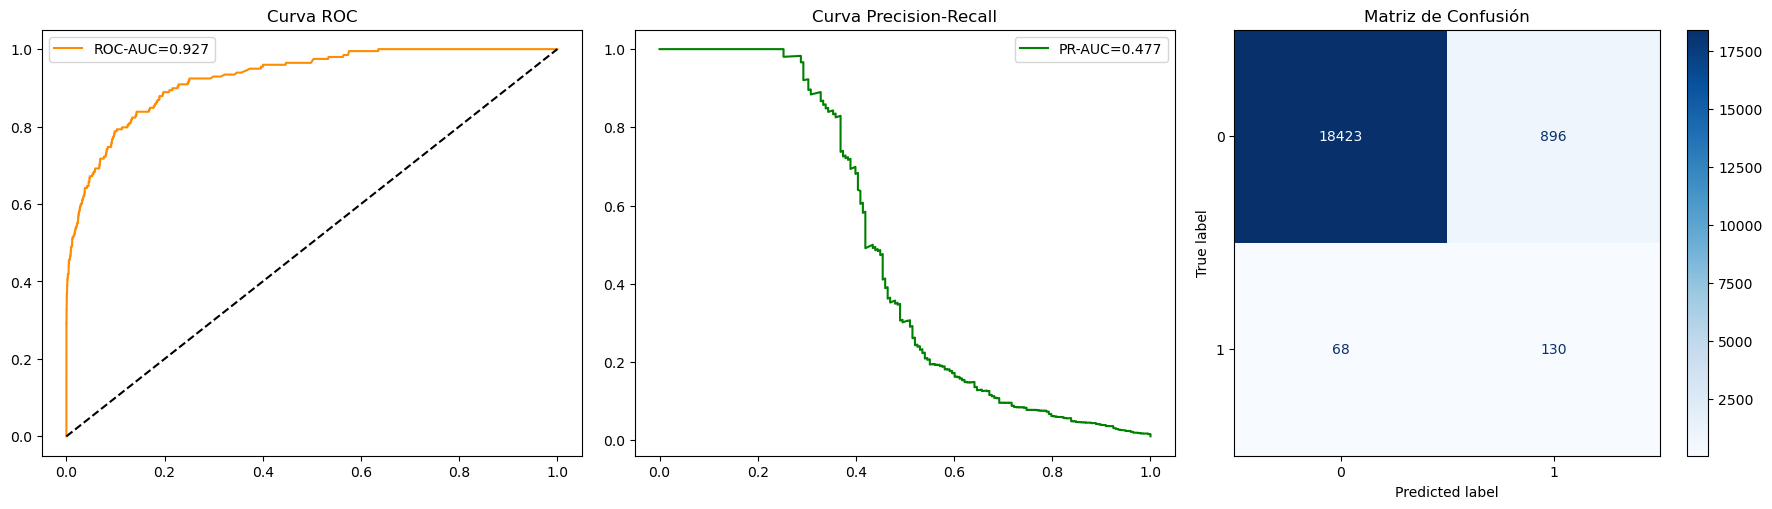


--- ⚖️ 3.1. Importancia y Dirección en el Meta-Estimador ---
El Meta-Estimador (Regresión Logística) pondera las predicciones de los modelos base:
| Modelo Base   |   Peso (Coef) |   Peso Absoluto |
|:--------------|--------------:|----------------:|
| lgbm          |       20.7576 |         20.7576 |
| catboost      |       14.4653 |         14.4653 |


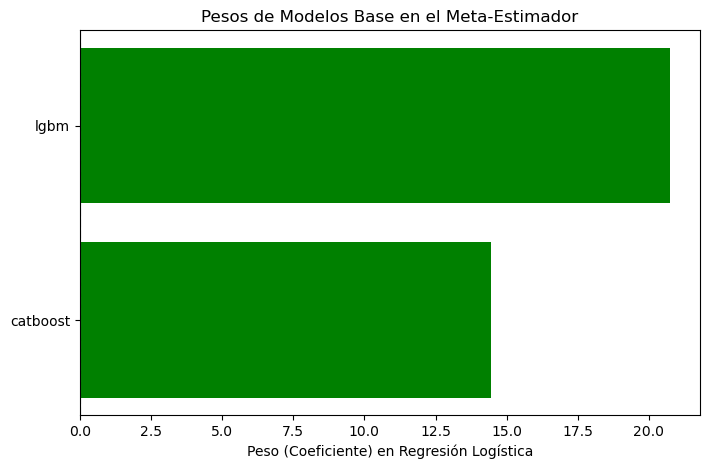


--- 🌳 3.2. Importancia de Variables (Nivel 1) ---
INFO: Estimador CatBoost encontrado usando el nombre 'catboost'.
Importancia de TODAS las Variables (Normalizada y Absoluta):
| Feature                                    |   LGBM_Imp |   CB_Imp |   LGBM_Imp_Norm |   CB_Imp_Norm |   Imp Promedio |   Imp Diferencia |
|:-------------------------------------------|-----------:|---------:|----------------:|--------------:|---------------:|-----------------:|
| engagement_por_email                       |       3425 | 24.2434  |       0.393784  |     1         |      0.696892  |       -0.606216  |
| total_clicks                               |       7560 |  7.39645 |       1         |     0.273312  |      0.636656  |        0.726688  |
| total_fichas_consultadas                   |       6263 |  6.46916 |       0.809852  |     0.233314  |      0.521583  |        0.576538  |
| canal                                      |       3317 | 15.442   |       0.37795   |     0.620352  |      0.499151

In [144]:
evaluar_modelo(y_test, y_pred, y_pred_proba)
feature_names = df_final_cb_lgbm.drop(columns=["es_cliente"]).columns.tolist()
# 3. Analizar
analizar_meta_estimator(model)
analizar_importancia_base(model, feature_names = feature_names)

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌 Conclusiones</h4>

<p>
Los resultados obtenidos confirman que el <strong>tercer ciclo de optimización mediante Optuna no aportó mejoras sustantivas</strong> sobre el rendimiento del sistema. Por el contrario, la combinación de la <strong>selección final de variables</strong> junto con la <strong>optimización de hiperparámetros alcanzada en el segundo ciclo</strong> constituye la configuración más eficiente y estable. Este comportamiento sugiere que, a partir de cierto punto, una exploración adicional del espacio de búsqueda introduce rendimientos decrecientes e incluso puede degradar la capacidad de generalización del modelo.
</p>

<p>
Un aspecto especialmente relevante de esta fase final es el <strong>cambio en el equilibrio de influencia entre los modelos base</strong>. Mientras que en configuraciones previas <i>CatBoost</i> ejercía un mayor peso dentro del esquema de <em>stacking</em>, en el modelo final es <strong>LightGBM el que pasa a dominar la decisión del meta-estimador</strong>. Este desplazamiento resulta coherente con la evolución del sistema, ya que las optimizaciones sucesivas han reforzado de forma progresiva el <strong>recall</strong> frente a la <strong>precision</strong>, ámbito en el que LightGBM muestra un comportamiento especialmente competitivo.
</p>

<p>
Las mejoras acumuladas a lo largo de todo el proceso de optimización se resumen en la siguiente tabla:
</p>

<table style="width:100%; border-collapse: collapse; margin-bottom: 20px; font-size: 14px;">
    <thead>
        <tr style="font-size: 1.2em;">
            <th style="padding:12px 15px; text-align:left;">Métrica Clave</th>
            <th style="padding:12px 15px; text-align:right;">Resultado Inicial</th>
            <th style="padding:12px 15px; text-align:right;">Resultado Final</th>
            <th style="padding:12px 15px; text-align:right;">Cambio</th>
            <th style="padding:12px 15px; text-align:left;">Impacto</th>
        </tr>
    </thead>
    <tbody>
        <tr style="border: 3px solid #1e8449;">
            <td style="padding:15px; font-weight:bold;">PR AUC</td>
            <td style="padding:15px; text-align:right;">0.4429</td>
            <td style="padding:15px; text-align:right;">0.4772</td>
            <td style="padding:15px; text-align:right; font-weight:bold;">+7.74%</td>
            <td style="padding:15px;">Incremento significativo del poder discriminatorio sobre la clase minoritaria.</td>
        </tr>
        <tr>
            <td style="padding:12px 15px; font-weight:bold;">Lift (Decil 1)</td>
            <td style="padding:12px 15px; text-align:right;">7.57</td>
            <td style="padding:12px 15px; text-align:right;">7.68</td>
            <td style="padding:12px 15px; text-align:right;">+1.45%</td>
            <td style="padding:12px 15px;">Mayor eficiencia en la focalización del 10% más propenso.</td>
        </tr>
        <tr>
            <td style="padding:12px 15px; font-weight:bold;">Tasa de Conversión (Decil 1)</td>
            <td style="padding:12px 15px; text-align:right;">7.65%</td>
            <td style="padding:12px 15px; text-align:right;">7.78%</td>
            <td style="padding:12px 15px; text-align:right;">+1.70%</td>
            <td style="padding:12px 15px;">Impacto directo en el retorno esperado de las campañas.</td>
        </tr>
        <tr>
            <td style="padding:12px 15px; font-weight:bold;">Recall</td>
            <td style="padding:12px 15px; text-align:right;">65.15%</td>
            <td style="padding:12px 15px; text-align:right;">65.66%</td>
            <td style="padding:12px 15px; text-align:right;">+0.78%</td>
            <td style="padding:12px 15px;">Mejor capacidad de captación de clientes reales.</td>
        </tr>
        <tr>
            <td style="padding:12px 15px; font-weight:bold;">Precision</td>
            <td style="padding:12px 15px; text-align:right;">0.1239</td>
            <td style="padding:12px 15px; text-align:right;">0.1267</td>
            <td style="padding:12px 15px; text-align:right;">+2.26%</td>
            <td style="padding:12px 15px;">Ligera mejora en la pureza de las predicciones.</td>
        </tr>
    </tbody>
</table>

<p>
En conjunto, el modelo final no solo mejora de forma consistente las métricas clave, sino que lo hace de manera <strong>equilibrada y coherente con los objetivos de negocio</strong>. El aumento sustancial del <strong>PR AUC</strong> —métrica de referencia en escenarios altamente desbalanceados— confirma una mejora real en la calidad predictiva, mientras que el refuerzo del <strong>recall</strong> y la estabilidad de la <strong>precision</strong> consolidan un sistema más eficiente, robusto y alineado con la toma de decisiones operativas.
</p>

</div>


<h1 id="analisis-de-umbrales">Análisis de umbrales de probabilidad y su impacto en el desempeño del modelo</h1>

<p>
En este apartado se analiza de forma sistemática el efecto del <strong>umbral de probabilidad</strong> sobre el desempeño del modelo, evaluando cómo la variación de dicho umbral impacta en las principales métricas de clasificación. Para ello, se presentan tanto visualizaciones como tablas comparativas que permiten identificar puntos operativos relevantes, incluyendo el umbral que maximiza el F1-score, el equilibrio entre <em>precision</em> y <em>recall</em>, los niveles de captación deseados y el umbral por defecto del sistema. Este análisis proporciona una base objetiva para seleccionar el umbral más adecuado según los objetivos y restricciones del negocio.
</p>



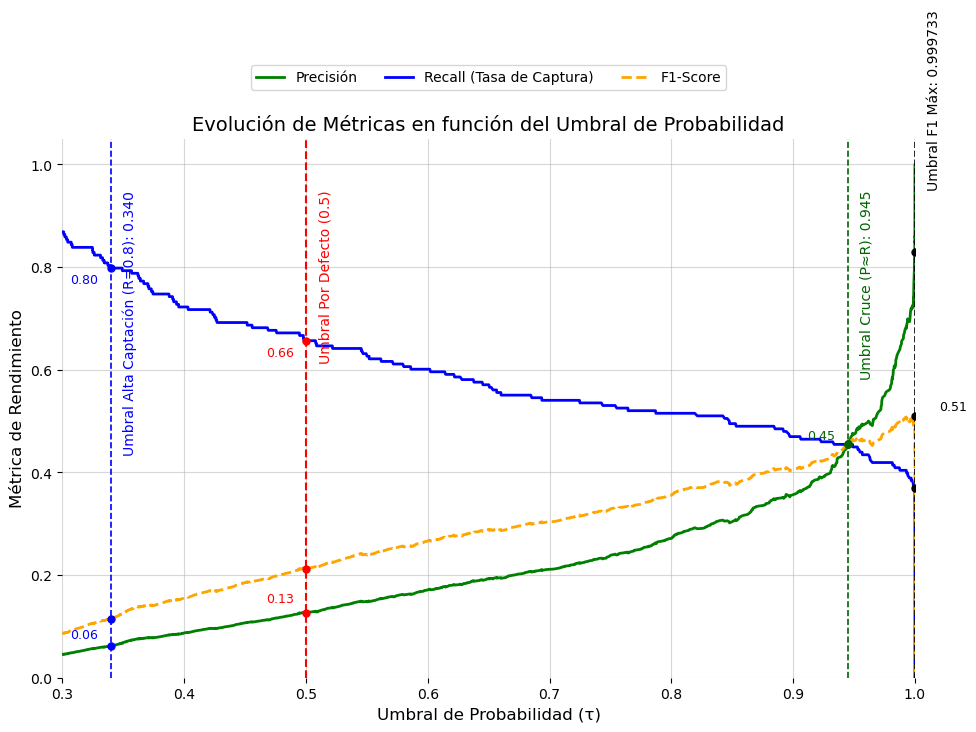

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Suponiendo que y_test y y_pred_proba están definidos fuera de este bloque.

# --- 1. Preparación de Datos ---
precisions, recalls, thresholds_calc = precision_recall_curve(y_test, y_pred_proba)
thresholds = np.append(thresholds_calc, 1.0)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
f1_scores[np.isnan(f1_scores)] = 0

best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]

cross_idx = np.argmin(np.abs(precisions - recalls))
cross_threshold = thresholds[cross_idx]
DEFAULT_THRESHOLD = 0.5

# Nuevo: Umbral donde Recall = 0.8
TARGET_RECALL = 0.80
recall_idx = np.argmin(np.abs(recalls - TARGET_RECALL))
high_recall_threshold = thresholds[recall_idx]


# Función auxiliar
def get_metric_value_at_threshold(target_threshold, thresholds_calc, metrics):
    all_thresholds = np.insert(thresholds_calc, 0, 0.0)
    if target_threshold >= 1.0:
        return metrics[-1]
    if target_threshold <= all_thresholds[0]:
        return metrics[0]
    idx = np.searchsorted(all_thresholds, target_threshold, side='left')
    return metrics[idx - 1]


# --- 2. Cálculo de P/R/F1 para todos los umbrales marcados ---
thresholds_to_mark = [
    DEFAULT_THRESHOLD,
    best_threshold,
    cross_threshold,
    high_recall_threshold
]

marker_data = {}
for tau in thresholds_to_mark:
    marker_data[tau] = {
        'P': get_metric_value_at_threshold(tau, thresholds_calc, precisions),
        'R': get_metric_value_at_threshold(tau, thresholds_calc, recalls),
        'F1': get_metric_value_at_threshold(tau, thresholds_calc, f1_scores[:-1])
    }


# --- 3. Gráfica ---
plt.figure(figsize=(11, 7))
plt.title("Evolución de Métricas en función del Umbral de Probabilidad", fontsize=14)
plt.xlabel("Umbral de Probabilidad (τ)", fontsize=12)
plt.ylabel("Métrica de Rendimiento", fontsize=12)

plt.plot(thresholds, precisions, label='Precisión', color='green', linewidth=2)
plt.plot(thresholds, recalls, label='Recall (Tasa de Captura)', color='blue', linewidth=2)
plt.plot(thresholds, f1_scores, label='F1-Score', color='orange', linestyle='--', linewidth=2)

# --- Estilo común para líneas verticales (excepto la de por defecto) ---
VLINE_STYLE = {'linestyle': '--', 'linewidth': 1.2}


# --- Umbral por defecto (se mantiene) ---
plt.axvline(DEFAULT_THRESHOLD, color='red', linestyle='--', linewidth=1.5)
data = marker_data[DEFAULT_THRESHOLD]
plt.text(DEFAULT_THRESHOLD + 0.01, 0.95, 'Umbral Por Defecto (0.5)',
         rotation=90, color='red', verticalalignment='top')

plt.plot(DEFAULT_THRESHOLD, data['P'], 'o', color='red', markersize=5)
plt.plot(DEFAULT_THRESHOLD, data['R'], 'o', color='red', markersize=5)
plt.plot(DEFAULT_THRESHOLD, data['F1'], 'o', color='red', markersize=5)

plt.text(DEFAULT_THRESHOLD - 0.01, data['P'] + 0.02, f'{data["P"]:.2f}',
         color='red', fontsize=9, ha='right')
plt.text(DEFAULT_THRESHOLD - 0.01, data['R'] - 0.03, f'{data["R"]:.2f}',
         color='red', fontsize=9, ha='right')


# --- Umbral de F1 Máximo ---
plt.axvline(best_threshold, color='black', **VLINE_STYLE)
data = marker_data[best_threshold]
plt.text(best_threshold + 0.01, 0.95, f'Umbral F1 Máx: {best_threshold:.6f}',
         rotation=90, color='black', verticalalignment='bottom')

plt.plot(best_threshold, data['P'], 'o', color='black', markersize=5)
plt.plot(best_threshold, data['R'], 'o', color='black', markersize=5)
plt.plot(best_threshold, data['F1'], 'o', color='black', markersize=5)
plt.text(best_threshold + 0.02, data['F1'] + 0.01, f'{data["F1"]:.2f}',
         color='black', fontsize=9, ha='left')


# --- Umbral de Cruce P=R ---
plt.axvline(cross_threshold, color='darkgreen', **VLINE_STYLE)
data = marker_data[cross_threshold]
plt.text(cross_threshold + 0.01, 0.95, f'Umbral Cruce (P≈R): {cross_threshold:.3f}',
         rotation=90, color='darkgreen', verticalalignment='top')

plt.plot(cross_threshold, data['P'], 'o', color='darkgreen', markersize=5)
plt.plot(cross_threshold, data['R'], 'o', color='darkgreen', markersize=5)
plt.plot(cross_threshold, data['F1'], 'o', color='darkgreen', markersize=5)

plt.text(cross_threshold - 0.01, data['P'] + 0.01, f'{data["P"]:.2f}',
         color='darkgreen', fontsize=9, ha='right')


# --- Nuevo: Umbral de Recall = 0.8 ---
plt.axvline(high_recall_threshold, color='blue', **VLINE_STYLE)
data = marker_data[high_recall_threshold]

plt.text(high_recall_threshold + 0.01, 0.95,
         f'Umbral Alta Captación (R=0.8): {high_recall_threshold:.3f}',
         rotation=90, color='blue', verticalalignment='top')

plt.plot(high_recall_threshold, data['P'], 'o', color='blue', markersize=5)
plt.plot(high_recall_threshold, data['R'], 'o', color='blue', markersize=5)
plt.plot(high_recall_threshold, data['F1'], 'o', color='blue', markersize=5)

plt.text(high_recall_threshold - 0.01,
         data['P'] + 0.015, f'{data["P"]:.2f}',
         color='blue', fontsize=9, ha='right')
plt.text(high_recall_threshold - 0.01,
         data['R'] - 0.03, f'{data["R"]:.2f}',
         color='blue', fontsize=9, ha='right')


# --- Estética del gráfico (Modificaciones clave para quitar el borde) ---
ax = plt.gca()

# Desactivar los cuatro bordes (spines) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=3,
    fontsize=10
)

plt.grid(True, alpha=0.5)

# Modificación: mostrar desde x = 0.3
plt.xlim([0.3, 1.0])
plt.ylim([0.0, 1.05])

plt.show()

In [146]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, confusion_matrix, recall_score, precision_score, f1_score


# --- DATOS ASUMIDOS DEL ENTORNO ---
TOTAL_CLIENTES = y_test.sum()
TOTAL_MUESTRAS = len(y_test)
# ------------------------------------


def calculate_metrics_at_threshold(y_true, y_prob, threshold, total_clientes, total_muestras):
    """Calcula Precision, Recall, F1 y los TP/FP para un umbral dado."""
    y_pred = (y_prob >= threshold).astype(int)

    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    total_no_clientes = total_muestras - total_clientes
    fp_rate = (fp / total_no_clientes) * 100 if total_no_clientes > 0 else 0

    return {
        'Umbral (τ)': f'{threshold:.4f}',
        'Precision': f'{prec:.4f}',
        'Recall': f'{rec:.4f}',
        'F1-Score': f'{f1:.4f}',
        'Tasa Captura %': f'{rec * 100:.2f}%',
        '% Falsos Positivos': f'{fp_rate:.2f}%'
    }


def find_key_thresholds(y_true, y_prob):
    """Encuentra los umbrales de F1 Máximo, Cruce P≈R y Recall = 80%."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)

    # 1. Umbral F1 Máximo
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    f1_scores[np.isnan(f1_scores)] = 0
    best_f1_idx = np.nanargmax(f1_scores)
    thr_f1max = thresholds[best_f1_idx]

    # 2. Umbral donde Precision ≈ Recall
    cross_idx = np.argmin(np.abs(precisions - recalls))
    thr_cross = thresholds[cross_idx]

    # 3. Umbral para recall ≥ 0.80
    target_recall = 0.80
    idx_recall80 = np.argmin(np.abs(recalls - target_recall))
    # OJO: precision_recall_curve retorna thresholds con longitud n-1 respecto a recalls
    thr_recall80 = thresholds[max(0, idx_recall80 - 1)]

    # 4. Por defecto
    DEFAULT_THRESHOLD = 0.5

    return {
        'F1_MAX': thr_f1max,
        'CROSS': thr_cross,
        'RECALL_80': thr_recall80,
        'DEFAULT': DEFAULT_THRESHOLD
    }


# --- EJECUCIÓN ---

# 1. Obtener umbrales
thresholds_dict = find_key_thresholds(y_test, y_pred_proba)

# 2. Definir los escenarios
thresholds_to_evaluate = {
    'Alta captacion (Recall=80%)': thresholds_dict['RECALL_80'],
    'Por Defecto': thresholds_dict['DEFAULT'],
    'F1 Máximo': thresholds_dict['F1_MAX'],
    'Cruce P≈R': thresholds_dict['CROSS']
}

# 3. Calcular métricas para cada punto
results = []
for name, threshold in thresholds_to_evaluate.items():
    metrics = calculate_metrics_at_threshold(
        y_test, y_pred_proba, threshold, TOTAL_CLIENTES, TOTAL_MUESTRAS
    )
    metrics['Escenario'] = name
    metrics['Umbral_num'] = float(metrics['Umbral (τ)'])  # soporte para ordenar
    results.append(metrics)

# 4. Crear DataFrame
df_analysis = pd.DataFrame(results)

# 5. Ordenar por umbral de menor a mayor
df_analysis = df_analysis.sort_values(by='Umbral_num').drop(columns='Umbral_num')

# 6. Ordenar columnas en el orden solicitado
column_order = [
    'Escenario',
    'Umbral (τ)',
    'Precision',
    'Recall',
    'F1-Score',
    'Tasa Captura %',
    '% Falsos Positivos'
]

df_analysis = df_analysis[column_order]

# 7. Mostrar
display(df_analysis)


Escenario Umbral (τ) Precision  Recall F1-Score  \
0  Alta captacion (Recall=80%)     0.3397    0.0621  0.8030   0.1153   
1                  Por Defecto     0.5000    0.1267  0.6566   0.2124   
3                    Cruce P≈R     0.9447    0.4545  0.4545   0.4545   
2                    F1 Máximo     0.9997    0.8295  0.3687   0.5105   

  Tasa Captura % % Falsos Positivos  
0         80.30%             12.42%  
1         65.66%              4.64%  
3         45.45%              0.56%  
2         36.87%              0.08%

<div style="
    background-color: #e8f5e9; /* Verde muy clarito */
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h2 style="font-weight:bold">📌Conclusiones</h2>
<p>
El análisis de los distintos umbrales de probabilidad confirma que el modelo presenta una notable versatilidad operativa, permitiendo su adaptación a múltiples objetivos de negocio sin necesidad de reentrenamiento. La gráfica evidencia cómo la modulación del umbral modifica de manera controlada la relación entre precisión, recall y tasa de falsos positivos, ofreciendo un abanico de configuraciones que pueden alinearse con estrategias diferenciadas.
</p>

<p>
En escenarios donde la prioridad es maximizar la captación —por ejemplo, campañas de alcance amplio o detección temprana— el umbral bajo asociado a <strong>Recall=80%</strong> permite alcanzar una tasa de captura del <strong>80.30%</strong>, aun cuando implique una reducción en precisión y un incremento en falsos positivos. En contraste, el umbral por defecto ofrece un equilibrio razonable entre sensibilidad (<strong>65.66%</strong>) y control de falsas alarmas (<strong>4.64%</strong>), lo que lo convierte en una opción estable para operaciones generales.
</p>

<p>
Para entornos donde la precisión es crítica, el umbral asociado al <strong>F1 máximo</strong> o al punto de <strong>cruce entre precisión y recall</strong> permite alcanzar métricas más equilibradas. En particular, el umbral de cruce (P≈R), cercano a <strong>0.945</strong>, proporciona una configuración con precisión y recall simétricos (<strong>45.45%</strong>) y una tasa muy reducida de falsos positivos (<strong>0.56%</strong>). Finalmente, el umbral extremo correspondiente al <strong>F1 máximo</strong> ofrece la mayor precisión del conjunto (<strong>82.95%</strong>) y minimiza las falsas alarmas (<strong>0.08%</strong>), resultando idóneo para casos en los que el costo de una clasificación errónea es elevado.
</p>

<p>
En conjunto, estos resultados muestran que el modelo no solo alcanza un desempeño robusto, sino que además puede configurarse dinámicamente en función de las prioridades operativas. Esta flexibilidad amplía su aplicabilidad a distintos escenarios empresariales, desde estrategias de alto alcance hasta políticas restrictivas orientadas a minimizar el riesgo, maximizando así su valor en la toma de decisiones.
</p>


<h1 id="interpretabilidad-e-insights">Interpretabilidad e Insights</h1>

<p>
En esta sección se analiza cómo el modelo de predicción de compradores construye sus decisiones, combinando un enfoque <strong>global, local y estructural</strong>. En primer lugar, se estudia la contribución de cada variable mediante un enfoque multicriterio que integra las importancias nativas de <i>LightGBM</i> y <i>CatBoost</i>, la contribución marginal global estimada mediante <i>SHAP</i> y la sensibilidad del rendimiento ante perturbaciones calculada a través de <i>Permutation Importance</i>. Estas métricas comparten una interpretación común: valores más elevados indican una mayor relevancia de la variable en el proceso de decisión, lo que permite construir un ranking consolidado a partir de un promedio normalizado.
</p>

<p>
La métrica <code>estabilidad_sigma</code>, derivada de la variabilidad observada mediante procedimientos de <i>bootstrap</i>, no sigue esta misma lógica interpretativa. En este caso, valores elevados indican una mayor inestabilidad en la estimación de la importancia, y no una mayor relevancia predictiva. Por este motivo, dicha métrica no se incorpora al promedio normalizado y se utiliza como una dimensión adicional de análisis, permitiendo distinguir entre variables con una contribución sólida y consistente y aquellas cuya influencia depende de manera significativa del subconjunto de datos considerado.
</p>

<p>
Sobre esta base global se incorpora un segundo nivel de análisis centrado en la <strong>interpretabilidad local</strong>, mediante el uso de <i>SHAP</i>, que permite examinar cómo el modelo razona a nivel individual y extraer perfiles explicativos de comportamiento, siguiendo el marco teórico propuesto por Lundberg y Lee (2017). Finalmente, y una vez caracterizado el espacio predictivo aprendido por el modelo, el análisis se complementa con técnicas de <strong>clustering no supervisado</strong> orientadas a explorar la estructura latente del conjunto de usuarios. Este enfoque no persigue mejorar el rendimiento del modelo, sino aportar una lectura agregada de los patrones de comportamiento identificados, permitiendo detectar perfiles minoritarios o atípicos que, aun no alineándose con los patrones mayoritarios, presentan tasas de conversión significativamente superiores a la media. De este modo, la sección de insights no solo identifica qué variables son importantes, sino también <em>cómo</em>, <em>para quién</em> y <em>con qué limitaciones</em> el modelo aprende los patrones de compra.
</p>



<strong><h2>Insight 1: Qué variables explican la probabilidad de compra (análisis global de importancia)</h2></strong>

In [147]:
#!pip install shap

In [148]:
# Archivo donde se guardarán las importancias
IMPORTANCE_FILE = "results/importances/importances_stacking.pkl"

# ========================================================
# Comprobar si ya existe el archivo guardado
# ========================================================
if os.path.exists(IMPORTANCE_FILE):
    print(f"Cargando importancias desde {IMPORTANCE_FILE}...")
    df_importance = joblib.load(IMPORTANCE_FILE)
    display(df_importance)
else:
    print("Archivo no encontrado. Calculando importancias...")

    # ========================================================
    # 1. Extraer modelos base y meta-modelo
    # ========================================================
    lgbm = model.named_estimators_["lgbm"]
    cb   = model.named_estimators_["catboost"]
    meta_model = model.final_estimator_

    # ========================================================
    # 2. Importancias nativas
    # ========================================================
    lgbm_imp = pd.Series(lgbm.feature_importances_, index=X_test.columns)
    cb_imp   = pd.Series(cb.feature_importances_, index=X_test.columns)
    lgbm_imp /= lgbm_imp.max()
    cb_imp   /= cb_imp.max()

    # ========================================================
    # 3. SHAP Global Importance (por modelo base)
    # ========================================================
    print("Calculando SHAP para LGBM...")
    explainer_lgbm = shap.TreeExplainer(lgbm)
    shap_lgbm = explainer_lgbm.shap_values(X_test)
    sv_lgbm = shap_lgbm[1] if isinstance(shap_lgbm, list) else shap_lgbm
    shap_lgbm_global = pd.Series(np.abs(sv_lgbm).mean(axis=0), index=X_test.columns)
    shap_lgbm_global /= shap_lgbm_global.max()

    print("Calculando SHAP para CatBoost...")
    explainer_cb = shap.TreeExplainer(cb)
    shap_cb = explainer_cb.shap_values(X_test)
    sv_cb = shap_cb[1] if isinstance(shap_cb, list) else shap_cb
    shap_cb_global = pd.Series(np.abs(sv_cb).mean(axis=0), index=X_test.columns)
    shap_cb_global /= shap_cb_global.max()

    # ========================================================
    # 4. Meta-ponderación usando coeficientes del meta-modelo
    # ========================================================
    coefs = pd.Series(np.abs(meta_model.coef_[0]), index=list(model.named_estimators_.keys()))
    meta_weights = coefs / coefs.sum()

    shap_global = meta_weights["lgbm"] * shap_lgbm_global + meta_weights["catboost"] * shap_cb_global
    shap_global /= shap_global.max()

    meta_combined = meta_weights["lgbm"] * lgbm_imp + meta_weights["catboost"] * cb_imp

    # ========================================================
    # 5. Permutation Importance
    # ========================================================
    def pr_auc_scorer(y_true, y_scores):
        from sklearn.metrics import precision_recall_curve, auc
        p, r, _ = precision_recall_curve(y_true, y_scores)
        return auc(r, p)

    print("Calculando Permutation Importance...")
    perm = permutation_importance(
        estimator=model,
        X=X_test,
        y=y_test,
        n_repeats=20,
        scoring=lambda est, X, y: pr_auc_scorer(y, est.predict_proba(X)[:, 1]),
        random_state=42
    )

    perm_imp = pd.Series(perm.importances_mean, index=X_test.columns)
    perm_imp /= perm_imp.max()

    # ========================================================
    # 6. Estabilidad mediante bootstrap
    # ========================================================
    print("Calculando estabilidad mediante bootstrap...")
    n_boot = 30
    bootstrap_importances = []

    for _ in tqdm(range(n_boot), desc="Bootstrap"):
        sample_idx = np.random.choice(len(X_test), size=len(X_test), replace=True)
        Xb, yb = X_test.iloc[sample_idx], y_test.iloc[sample_idx]

        pb = permutation_importance(
            estimator=model,
            X=Xb,
            y=yb,
            n_repeats=10,
            scoring=lambda est, X, y: pr_auc_scorer(y, est.predict_proba(X)[:, 1]),
            random_state=42
        )
        bootstrap_importances.append(pb.importances_mean)

    bootstrap_matrix = np.vstack(bootstrap_importances)
    stability_sigma = pd.Series(bootstrap_matrix.std(axis=0), index=X_test.columns)
    stability_sigma /= stability_sigma.max()

    # ========================================================
    # 7. Construir tabla final
    # ========================================================
    df_importance = pd.DataFrame({
        "LGBM_Imp": lgbm_imp,
        "CB_Imp": cb_imp,
        "SHAP_Global": shap_global,
        "Permutation": perm_imp,
        "Meta_Ponderada": meta_combined,
        "Estabilidad_sigma": stability_sigma
    })

    df_importance = df_importance.sort_values("Meta_Ponderada", ascending=False)

    # ========================================================
    # 8. Guardar resultados para la próxima ejecución
    # ========================================================
    os.makedirs('results/importances', exist_ok=True)
    joblib.dump(df_importance, IMPORTANCE_FILE)
    print(f"Importancias calculadas y guardadas en {IMPORTANCE_FILE}.")


Cargando importancias desde results/importances/importances_stacking.pkl...


LGBM_Imp    CB_Imp  SHAP_Global  \
total_clicks                                1.000000  0.305091     0.303667   
engagement_por_email                        0.453042  1.000000     1.000000   
total_fichas_consultadas                    0.828439  0.266842     0.408262   
canal                                       0.438757  0.636954     0.201008   
usuarios_que_consultan_misma_primera_ficha  0.496429  0.233741     0.499625   
clicks_por_sesion                           0.405952  0.305598     0.156818   
recencia_fichas                             0.427646  0.184102     0.467654   
total_sesiones                              0.436640  0.117508     0.068511   
tipo_usuario                                0.305159  0.226948     0.212590   
sesiones_por_dia                            0.258598  0.199281     0.092962   
mes_registro                                0.175397  0.270551     0.109770   
total_clicks_por_dia                        0.281349  0.108402     0.083993   
recencia_ficha_unica                        0.221032  0.124688     0.091000   
clicks_si_fichas                            0.097751  0.101392     0.118809   
antiguedad_comportamiento_fichas            0.126190  0.043731     0.010123   

                                            Permutation  Meta_Ponderada  \
total_clicks                                   0.861299        0.714616   
engagement_por_email                           0.288708        0.677666   
total_fichas_consultadas                       1.000000        0.597803   
canal                                          0.183177        0.520152   
usuarios_que_consultan_misma_primera_ficha     0.542536        0.388549   
clicks_por_sesion                              0.189655        0.364739   
recencia_fichas                                0.283895        0.327628   
total_sesiones                                 0.122639        0.305580   
tipo_usuario                                   0.090443        0.273039   
sesiones_por_dia                               0.036277        0.234238   
mes_registro                                   0.041422        0.214475   
total_clicks_por_dia                           0.021817        0.210324   
recencia_ficha_unica                           0.060621        0.181465   
clicks_si_fichas                               0.072819        0.099246   
antiguedad_comportamiento_fichas               0.022824        0.092326   

                                            Estabilidad_sigma  
total_clicks                                         0.995085  
engagement_por_email                                 0.568089  
total_fichas_consultadas                             1.000000  
canal                                                0.583679  
usuarios_que_consultan_misma_primera_ficha           0.873933  
clicks_por_sesion                                    0.501776  
recencia_fichas                                      0.574166  
total_sesiones                                       0.369875  
tipo_usuario                                         0.411157  
sesiones_por_dia                                     0.180731  
mes_registro                                         0.150747  
total_clicks_por_dia                                 0.194390  
recencia_ficha_unica                                 0.268354  
clicks_si_fichas                                     0.253899  
antiguedad_comportamiento_fichas                     0.118068

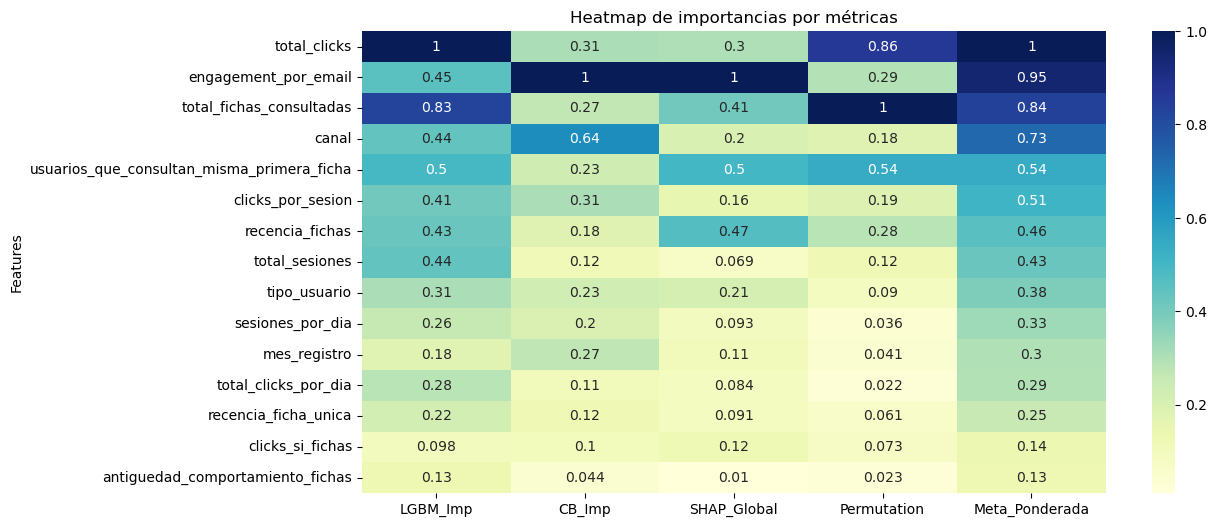

Categoria_importancia  \
engagement_por_email                                        Alta   
total_clicks                                                Alta   
total_fichas_consultadas                                    Alta   
usuarios_que_consultan_misma_primera_ficha                 Media   
canal                                                      Media   
recencia_fichas                                            Media   
clicks_por_sesion                                          Media   
tipo_usuario                                               Media   
total_sesiones                                             Media   
sesiones_por_dia                                            Baja   
mes_registro                                                Baja   
total_clicks_por_dia                                        Baja   
recencia_ficha_unica                                        Baja   
clicks_si_fichas                                            Baja   
antiguedad_comportamiento_fichas                            Baja   

                                            Importancia_prom  \
engagement_por_email                                0.738009   
total_clicks                                        0.694011   
total_fichas_consultadas                            0.668016   
usuarios_que_consultan_misma_primera_ficha          0.463210   
canal                                               0.437555   
recencia_fichas                                     0.364353   
clicks_por_sesion                                   0.313684   
tipo_usuario                                        0.243444   
total_sesiones                                      0.234582   
sesiones_por_dia                                    0.182980   
mes_registro                                        0.179453   
total_clicks_por_dia                                0.157976   
recencia_ficha_unica                                0.150255   
clicks_si_fichas                                    0.105930   
antiguedad_comportamiento_fichas                    0.066413   

                                           Estabilidad_categoria  \
engagement_por_email                           Estabilidad media   
total_clicks                                    Baja estabilidad   
total_fichas_consultadas                        Baja estabilidad   
usuarios_que_consultan_misma_primera_ficha      Baja estabilidad   
canal                                          Estabilidad media   
recencia_fichas                                Estabilidad media   
clicks_por_sesion                              Estabilidad media   
tipo_usuario                                   Estabilidad media   
total_sesiones                                 Estabilidad media   
sesiones_por_dia                                Alta estabilidad   
mes_registro                                    Alta estabilidad   
total_clicks_por_dia                            Alta estabilidad   
recencia_ficha_unica                            Alta estabilidad   
clicks_si_fichas                                Alta estabilidad   
antiguedad_comportamiento_fichas                Alta estabilidad   

                                            Estabilidad_sigma_norm  
engagement_por_email                                      0.568089  
total_clicks                                              0.995085  
total_fichas_consultadas                                  1.000000  
usuarios_que_consultan_misma_primera_ficha                0.873933  
canal                                                     0.583679  
recencia_fichas                                           0.574166  
clicks_por_sesion                                         0.501776  
tipo_usuario                                              0.411157  
total_sesiones                                            0.369875  
sesiones_por_dia                                          0.180731  
mes_registro                                              0.150747  
total_clicks

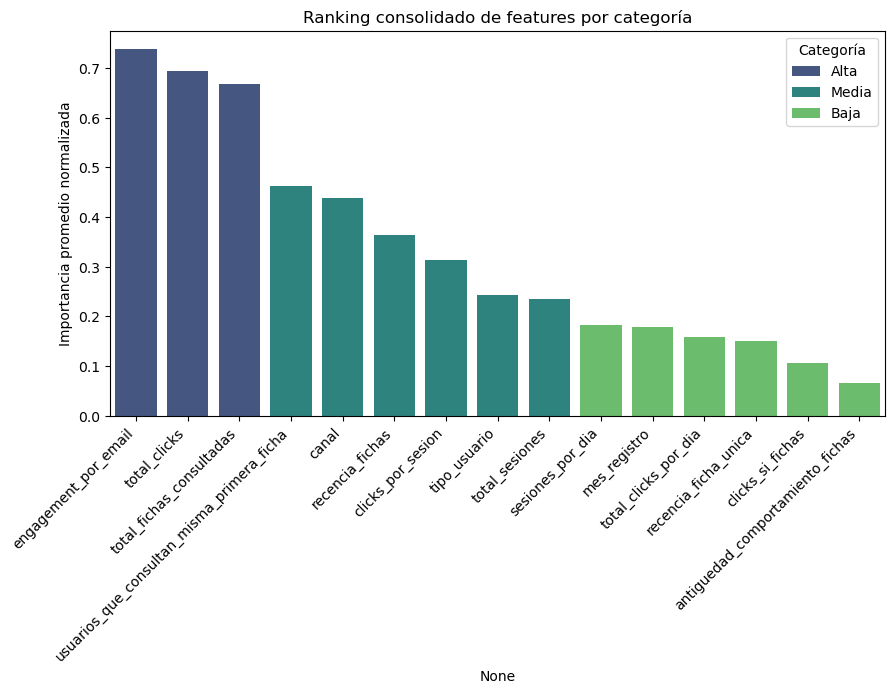

In [149]:
# ========================================================
# 1. Normalizar métricas orientadas a importancia
# ========================================================

importance_metrics = ["LGBM_Imp", "CB_Imp", "SHAP_Global", "Permutation", "Meta_Ponderada"]

df_norm = df_importance.copy()
df_norm[importance_metrics] = df_norm[importance_metrics].div(df_norm[importance_metrics].max())

# ========================================================
# 2. Heatmap de importancias
# ========================================================

plt.figure(figsize=(12,6))
sns.heatmap(df_norm[importance_metrics], annot=True, cmap="YlGnBu")
plt.title("Heatmap de importancias por métricas")
plt.ylabel("Features")
plt.show()

# ========================================================
# 3. Calcular importancia promedio (sin estabilidad_sigma)
# ========================================================

df_norm["Importancia_prom"] = df_norm[importance_metrics].mean(axis=1)

# ========================================================
# 4. Clasificar features según importancia
# ========================================================

def classify_importance(val):
    if val >= 0.60:
        return "Alta"
    elif val >= 0.20:
        return "Media"
    else:
        return "Baja"

df_norm["Categoria_importancia"] = df_norm["Importancia_prom"].apply(classify_importance)

# ========================================================
# 5. Normalizar estabilidad_sigma y clasificar estabilidad
# ========================================================

df_norm["Estabilidad_sigma_norm"] = df_norm["Estabilidad_sigma"] / df_norm["Estabilidad_sigma"].max()

def classify_stability(val):
    if val <= 0.33:
        return "Alta estabilidad"
    elif val <= 0.66:
        return "Estabilidad media"
    else:
        return "Baja estabilidad"

df_norm["Estabilidad_categoria"] = df_norm["Estabilidad_sigma_norm"].apply(classify_stability)

# ========================================================
# 6. Ordenar ranking por importancia promedio
# ========================================================

df_norm_sorted = df_norm.sort_values("Importancia_prom", ascending=False)

# ========================================================
# 7. Mostrar tabla final con categorías en primera columna
# ========================================================

display(df_norm_sorted[[
    "Categoria_importancia",
    "Importancia_prom",
    "Estabilidad_categoria",
    "Estabilidad_sigma_norm"
]])
    
# ========================================================
# 8. Gráfico final: ranking coloreado por categoría (viridis)
# ========================================================

plt.figure(figsize=(10,5))
sns.barplot(
    x=df_norm_sorted.index,
    y=df_norm_sorted["Importancia_prom"],
    hue=df_norm_sorted["Categoria_importancia"],
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Importancia promedio normalizada")
plt.title("Ranking consolidado de features por categoría")
plt.legend(title="Categoría")
plt.show()


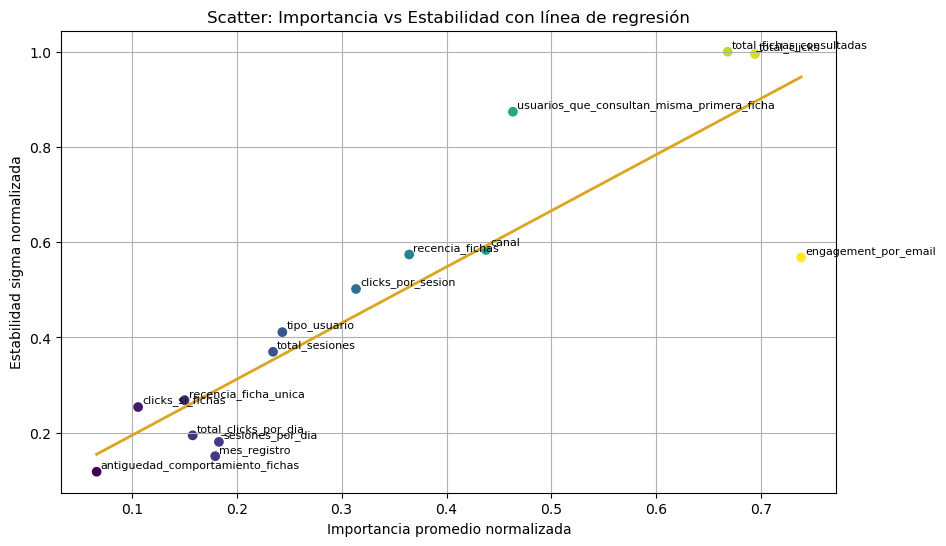

In [150]:
# =========================================================
# 1. Preparar datos desde df_norm_sorted
# (usa tus columnas reales del dataframe)
# =========================================================

features = df_norm_sorted.index.tolist()
importance = df_norm_sorted["Importancia_prom"].values
stability = df_norm_sorted["Estabilidad_sigma_norm"].values

# Normalizar importancia para asignar colores de viridis
colors = plt.cm.viridis((importance - importance.min()) / (importance.max() - importance.min()))

# =========================================================
# 2. Ajustar línea de regresión
# =========================================================

coef = np.polyfit(importance, stability, 1)
reg_fn = np.poly1d(coef)

# =========================================================
# 3. Crear scatter plot
# =========================================================

plt.figure(figsize=(10,6))

# Puntos coloreados con viridis
plt.scatter(importance, stability, c=colors)

# Línea de regresión
x_vals = np.linspace(importance.min(), importance.max(), 100)
plt.plot(x_vals, reg_fn(x_vals), color="goldenrod", linewidth=2)

plt.xlabel("Importancia promedio normalizada")
plt.ylabel("Estabilidad sigma normalizada")
plt.title("Scatter: Importancia vs Estabilidad con línea de regresión")

# Etiquetas para cada punto
for i, feat in enumerate(features):
    plt.annotate(feat, (importance[i], stability[i]), fontsize=8, xytext=(3,3), textcoords="offset points")

plt.grid(True)
plt.show()


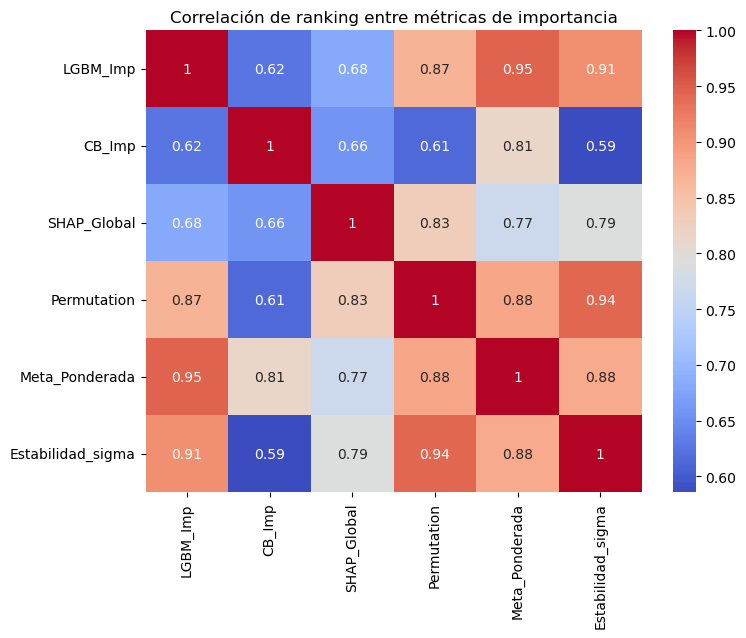

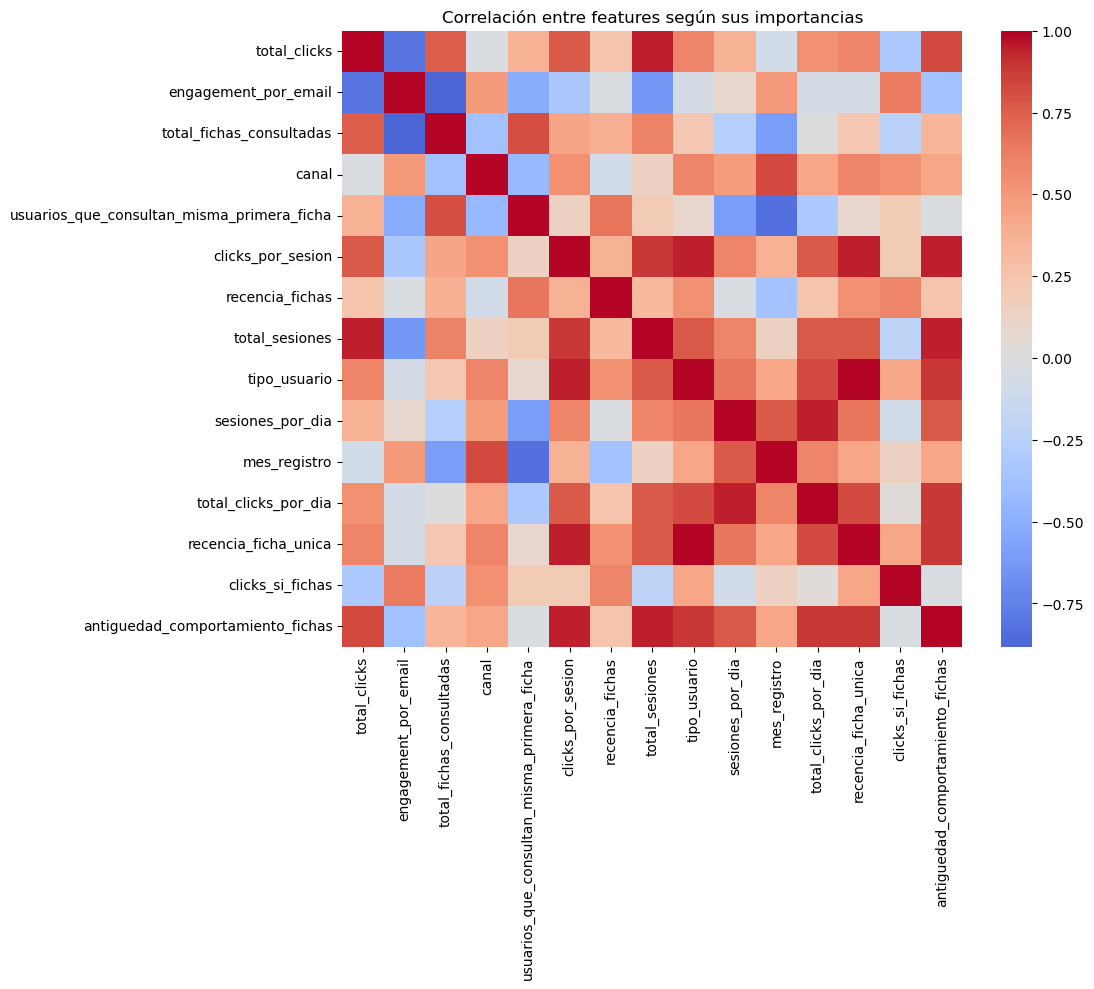

In [151]:
# --- Selección de columnas de importancia --- 
importance_cols = ["LGBM_Imp", "CB_Imp", "SHAP_Global", "Permutation", "Meta_Ponderada", "Estabilidad_sigma"] 
# --- 1. Correlación entre métricas de importancia --- 
corr_matrix = df_importance[importance_cols].corr(method="spearman") 
plt.figure(figsize=(8,6)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlación de ranking entre métricas de importancia") 
plt.show() 

# --- Texto resumen de correlación entre métricas --- 
#print("Correlación entre métricas de importancia (Spearman):") 

#for col1 in importance_cols: 
#    for col2 in importance_cols: 
#        if col1 != col2:
#            corr_val = corr_matrix.loc[col1, col2]
#            print(f"- {col1} vs {col2}: {corr_val:.2f}") 
           
# --- 2. Correlación entre features según su importancia --- 
feature_corr = df_importance[importance_cols].T.corr(method="spearman") 
plt.figure(figsize=(10,8)) 
sns.heatmap(feature_corr, cmap="coolwarm", center=0) 
plt.title("Correlación entre features según sus importancias") 
plt.show() 

# --- Texto resumen de correlación entre features --- 
#print("\nCorrelación de ranking entre features (Spearman):") 
#features = df_importance.index.tolist() 

#for i, f1 in enumerate(features): 
#    for j, f2 in enumerate(features): 
#        if j > i: 
#            # Evitar duplicados 
#            corr_val = feature_corr.loc[f1, f2] 
#            print(f"- {f1} vs {f2}: {corr_val:.2f}")


<div style="
    background-color: #e8f5e9; /* Verde muy clarito */
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
    <h3 style="font-weight:bold">📌Conclusiones</h3>
<p style="font-size:1.1em"><strong>1. Análisis por métrica</strong></p>
    <p><strong>LGBM_Imp:</strong> <code>total_clicks</code> y <code>total_fichas_consultadas</code> aparecen como los predictores más influyentes. LightGBM prioriza señales fuertes de interacción directa en el catálogo, lo que refuerza que la actividad del usuario es un determinante clave en la probabilidad de compra.</p>
    <p><strong>CB_Imp:</strong> destacan <code>engagement_por_email</code> y <code>canal</code>. CatBoost captura patrones en variables categóricas y evidencia que la procedencia del usuario y su respuesta a comunicaciones externas aportan información que complementa a las variables de comportamiento.</p>
    <p><strong>SHAP_Global:</strong> <code>engagement_por_email</code> presenta la mayor contribución marginal global, seguida por <code>usuarios_que_consultan_misma_primera_ficha</code> y <code>total_clicks</code>. SHAP muestra que el engagement por email ejerce un efecto sistemático sobre las predicciones, aunque su impacto no siempre coincida con el de otras métricas, lo que indica que influye en la forma del modelo más que en la importancia interna asignada por cada algoritmo.</p>
    <p><strong>Permutation:</strong> <code>total_fichas_consultadas</code> y <code>total_clicks</code> generan la mayor caída de rendimiento al ser desordenadas, confirmando la dependencia real del modelo hacia comportamientos intensivos de navegación y consulta. Otras variables aportan efecto, pero su ausencia perjudica menos la capacidad predictiva.</p>
    <p><strong>Estabilidad_sigma:</strong> <code>total_fichas_consultadas</code> y <code>total_clicks</code> muestran mayor variabilidad entre iteraciones bootstrap. Un sigma alto indica que su relevancia es sensible a la muestra utilizada. Variables con sigma bajo presentan un comportamiento más uniforme, lo que permite distinguir entre fuerza predictiva y robustez.</p>
    <p style="font-size:1.1em"><strong>2. Heatmap y ranking consolidado</strong></p>
    <p>El heatmap confirma un núcleo crítico compuesto por <code>total_clicks</code>, <code>total_fichas_consultadas</code> y <code>engagement_por_email</code>. Aunque <code>engagement_por_email</code> aparece menos destacada en Permutation y estabilidad, su presencia dominante en SHAP y CatBoost confirma que aporta una señal informativa estructural. Las variables moderadas (<code>usuarios_que_consultan_misma_primera_ficha</code>, <code>canal</code>, <code>recencia_fichas</code>, <code>clicks_por_sesion</code>) complementan el modelo pero con menor peso. Las variables de baja importancia muestran impacto limitado.</p>
    <p style="font-size:1.1em"><strong>3. Correlaciones entre métricas</strong></p>
    <p>Las métricas de importancia presentan correlaciones elevadas, lo que respalda la consistencia del análisis. La relación entre Permutation y estabilidad indica que las variables con mayor impacto en el rendimiento también son las más sensibles al muestreo. La meta-ponderada se alinea principalmente con LGBM_Imp, lo que evidencia que el meta-modelo se apoya especialmente en LightGBM. CatBoost esta menos alineada en ponderacion meta, estabilidad y permutación, lo que puede reflejar que detecta patrones distintos. SHAP introduce un ángulo complementario basado en contribuciones marginales mas equilibrado entre Catboost y LightGBM.</p>
    <p style="font-size:1.1em"><strong>4. Correlación entre variables</strong></p>
    <p>Se observan tres grupos funcionales: interacción intensiva (<code>total_clicks</code>, <code>total_sesiones</code>, <code>clicks_por_sesion</code>), exploración de catálogo (<code>total_fichas_consultadas</code>, <code>recencia_fichas</code>, <code>usuarios_que_consultan_misma_primera_ficha</code>) y engagement/canal (<code>engagement_por_email</code>, <code>canal</code>). Las correlaciones negativas entre <code>engagement_por_email</code> y variables de comportamiento intensivo sugieren perfiles distintos: usuarios navegadores frente a usuarios sensibles a comunicaciones.</p>
    <p style="font-size:1.1em"><strong>5. Aportación del scatter de Importancia vs Estabilidad</strong></p>
    <p>El scatter añade una dimensión que permite diferenciar entre variables estratégicas y tácticas. <code>engagement_por_email</code> se sitúa en la zona de alta importancia y baja inestabilidad, por lo que es una <strong>variable estratégica</strong>: su señal es relevante, consistente y aplicable a decisiones globales. Por contraste, <code>usuarios_que_consultan_misma_primera_ficha</code> combina alta importancia con alta inestabilidad y actúa como <strong>variable táctica</strong>: aporta mucho valor en ciertos segmentos o patrones de navegación, pero no de forma homogénea en toda la población. Su potencial se maximiza cuando se utiliza en análisis segmentados o combinada con otras variables de comportamiento.</p>
    <p style="font-size:1.1em"><strong>6. Conclusiones accionables</strong></p>
    <p>El modelo se apoya en variables que describen interacción profunda con el catálogo, por lo que es prioritario asegurar la calidad del tracking de <code>total_clicks</code> y <code>total_fichas_consultadas</code>. <code>engagement_por_email</code> debe considerarse una señal estratégica tanto para predicción como para decisiones de marketing. <code>usuarios_que_consultan_misma_primera_ficha</code> es una señal táctica que conviene utilizar de forma segmentada. Las variables moderadas podrían reforzarse mediante nuevas transformaciones. Las variables de baja importancia son candidatas a exclusión si se desea simplificar el modelo sin afectar su rendimiento. El conjunto de métricas y visualizaciones permite comprender no solo cuáles son las variables clave, sino también la estabilidad y naturaleza de su efecto.</p>




<h2>Insight 2 - Perfiles explicativos del razonamiento del modelo (SHAP local y segmentación de usuarios)</h2>

<h3>Análisis local mediante SHAP</h3>

Tras el análisis global de importancia de variables, se profundiza en la interpretabilidad del modelo a nivel individual mediante explicaciones SHAP locales. Mientras que SHAP global permite identificar qué variables son relevantes en promedio, SHAP local explica cómo cada variable contribuye a la predicción de un usuario concreto, mostrando qué señales empujan la predicción hacia la compra o hacia la no compra.

Este análisis local resulta especialmente útil para detectar heterogeneidad en el comportamiento de los usuarios y comprender si el modelo razona de forma homogénea o distingue patrones diferenciados. Para ello, se analizan explicaciones SHAP locales sobre una muestra ampliada de usuarios del conjunto de test, a partir de la cual se identifican patrones recurrentes. Posteriormente, se seleccionan de forma automática tres usuarios representativos que ilustran perfiles de comportamiento característicos del modelo.

In [152]:
import shap
N_LOCAL_USERS = 100   # para inferencia
N_DISPLAY = 3         # para visualización
RANDOM_STATE = 42

# =====================================================
# 1. Seleccionar NUSERS (100) usuarios aleatorios del test
# =====================================================

np.random.seed(RANDOM_STATE)
local_indices = np.random.choice(len(X_test), size=N_LOCAL_USERS, replace=False)

In [153]:
# =====================================================
# 2. SHAP Local para LightGBM y CatBoost
# =====================================================

explainer_lgbm = shap.TreeExplainer(model.named_estimators_["lgbm"])
explainer_cb   = shap.TreeExplainer(model.named_estimators_["catboost"])

shap_lgbm = explainer_lgbm.shap_values(X_test)
shap_cb   = explainer_cb.shap_values(X_test)

shap_lgbm_pos = shap_lgbm[1] if isinstance(shap_lgbm, list) else shap_lgbm
shap_cb_pos   = shap_cb[1] if isinstance(shap_cb, list) else shap_cb

In [154]:
# =====================================================
# df base para analisis
# =====================================================
rows = []

for idx in local_indices:
    for i, feat in enumerate(X_test.columns):
        # LightGBM
        val_lgbm = shap_lgbm_pos[idx, i]
        rows.append({
            "user_id_local": idx,
            "model": "LightGBM",
            "feature": feat,
            "shap_value": val_lgbm,
            "abs_shap": abs(val_lgbm),
            "direction": "positive" if val_lgbm > 0 else "negative"
        })

        # CatBoost
        val_cb = shap_cb_pos[idx, i]
        rows.append({
            "user_id_local": idx,
            "model": "CatBoost",
            "feature": feat,
            "shap_value": val_cb,
            "abs_shap": abs(val_cb),
            "direction": "positive" if val_cb > 0 else "negative"
        })

df_shap_local = pd.DataFrame(rows)

In [155]:
# =====================================================
# Seleccion de 3 usuarios representativos
# =====================================================
pivot = (
    df_shap_local[df_shap_local["model"] == "LightGBM"]
    .pivot_table(
        index="user_id_local",
        columns="feature",
        values="shap_value",
        aggfunc="sum"
    )
)

pivot["score_alta_intencion"] = (
    pivot["engagement_por_email"] +
    pivot["recencia_fichas"]
)

pivot["score_explorador"] = (
    pivot["usuarios_que_consultan_misma_primera_ficha"] +
    pivot["total_fichas_consultadas"]
)

pivot["score_baja_intencion"] = -pivot["engagement_por_email"]

u_high = pivot["score_alta_intencion"].idxmax()
u_explorer = pivot["score_explorador"].idxmax()
u_low = pivot["score_baja_intencion"].idxmax()

selected_users = {
    u_high: "Alta intención",
    u_explorer: "Explorador / mixto",
    u_low: "Baja intención"
}


In [156]:
# =====================================================
# Resumen agregado
# =====================================================
top5 = (
    df_shap_local
    .sort_values(["user_id_local", "model", "abs_shap"], ascending=[True, True, False])
    .groupby(["user_id_local", "model"])
    .head(5)
    [["user_id_local", "model", "feature"]]
)

freq_top5 = (
    top5
    .drop_duplicates(["user_id_local", "model", "feature"])
    .groupby("feature")
    .size()
)

summary = (
    df_shap_local
    .groupby("feature")
    .agg(
        mean_abs_shap=("abs_shap", "mean"),
        freq_positive=("direction", lambda x: (x == "positive").sum()),
        freq_negative=("direction", lambda x: (x == "negative").sum())
    )
    .join(freq_top5.rename("freq_top5"))
    .fillna({"freq_top5": 0})
    .sort_values("mean_abs_shap", ascending=False)
)


In [157]:
summary["dominant_direction"] = np.where(
    summary["freq_positive"] > summary["freq_negative"],
    "tiende a empujar hacia compra",
    "tiende a empujar hacia NO compra"
)

summary["pattern"] = summary["freq_top5"].apply(
    lambda x: (
        "recurrente en la mayoría de usuarios"
        if x >= 0.6 * (N_LOCAL_USERS * 2) else
        "relevante en algunos usuarios"
        if x >= 0.2 * (N_LOCAL_USERS * 2) else
        "marginal en análisis local"
    )
)

summary


mean_abs_shap  freq_positive  \
feature                                                                    
engagement_por_email                             0.798203            148   
usuarios_que_consultan_misma_primera_ficha       0.401830            158   
recencia_fichas                                  0.334340             52   
total_fichas_consultadas                         0.313620             24   
total_clicks                                     0.228964            162   
tipo_usuario                                     0.158631             22   
canal                                            0.149498             38   
clicks_por_sesion                                0.119431            149   
mes_registro                                     0.109738            107   
clicks_si_fichas                                 0.102082             48   
sesiones_por_dia                                 0.084876            166   
recencia_ficha_unica                             0.084778             96   
total_clicks_por_dia                             0.070326            177   
total_sesiones                                   0.055923            177   
antiguedad_comportamiento_fichas                 0.005097            120   

                                            freq_negative  freq_top5  \
feature                                                                
engagement_por_email                                   52      200.0   
usuarios_que_consultan_misma_primera_ficha             42      153.0   
recencia_fichas                                       148      111.0   
total_fichas_consultadas                              176      161.0   
total_clicks                                           38      103.0   
tipo_usuario                                          178       65.0   
canal                                                 162       52.0   
clicks_por_sesion                                      51       27.0   
mes_registro                                           93       44.0   
clicks_si_fichas                                      152       24.0   
sesiones_por_dia                                       34       23.0   
recencia_ficha_unica                                  104       18.0   
total_clicks_por_dia                                   23       16.0   
total_sesiones                                         23        3.0   
antiguedad_comportamiento_fichas                       80        0.0   

                                                          dominant_direction  \
feature                                                                        
engagement_por_email                           tiende a empujar hacia compra   
usuarios_que_consultan_misma_primera_ficha     tiende a empujar hacia compra   
recencia_fichas                             tiende a empujar hacia NO compra   
total_fichas_consultadas                    tiende a empujar hacia NO compra   
total_clicks                                   tiende a empujar hacia compra   
tipo_usuario                                tiende a empujar hacia NO compra   
canal                                       tiende a empujar hacia NO compra   
clicks_por_sesion                              tiende a empujar hacia compra   
mes_registro                                   tiende a empujar hacia compra   
clicks_si_fichas                            tiende a empujar hacia NO compra   
sesiones_por_dia                               tiende a empujar hacia compra   
recencia_ficha_unica                        tiende a empujar hacia NO compra   
total_clicks_por_dia                           tiende a empujar hacia compra   
total_sesiones                                 tiende a empujar hacia compra   
antiguedad_comportamiento_fichas               tiende a empujar hacia compra   

                                                                         pattern  
feature                                                                           

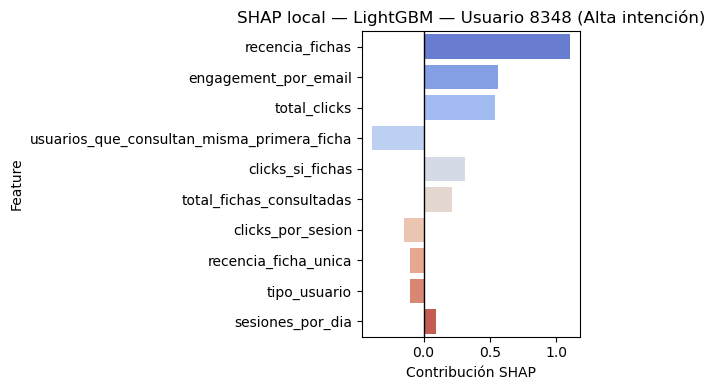

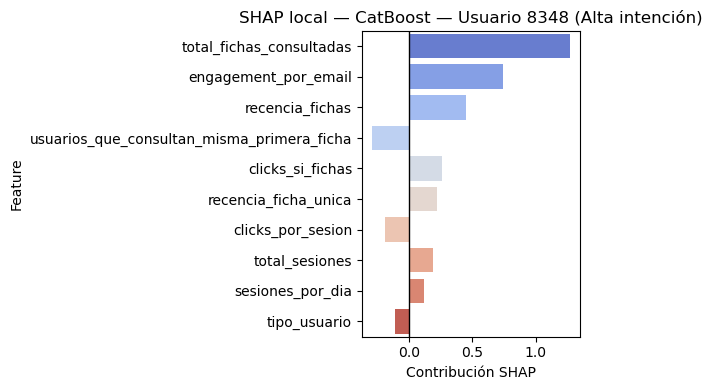

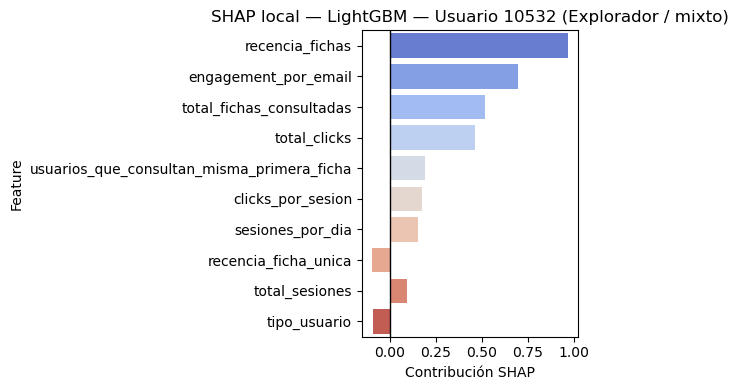

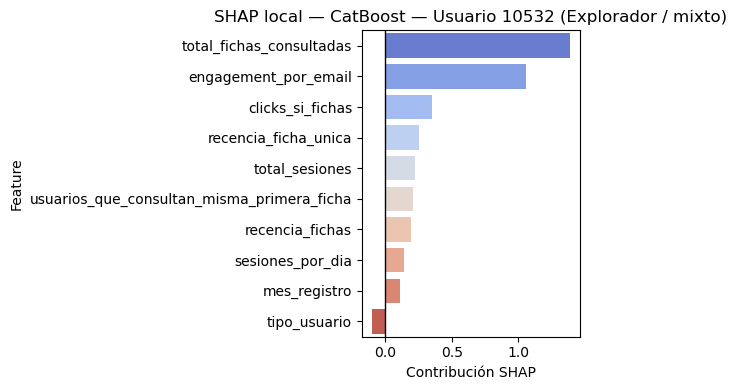

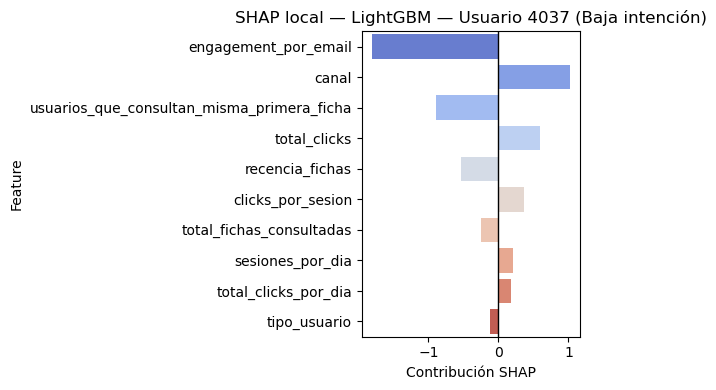

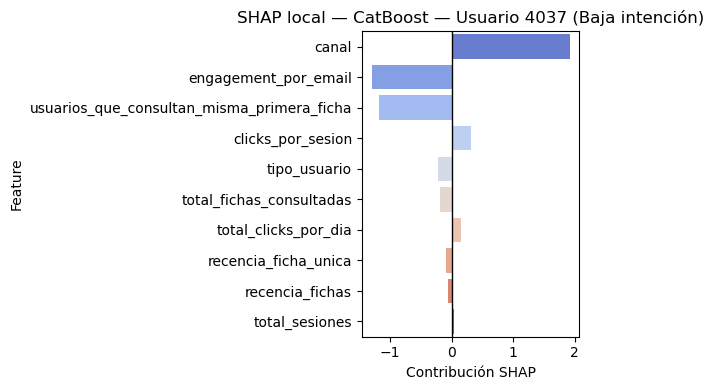

In [158]:
for idx, perfil in selected_users.items():
    for mdl in ["LightGBM", "CatBoost"]:
        df_u = (
            df_shap_local[
                (df_shap_local["user_id_local"] == idx) &
                (df_shap_local["model"] == mdl)
            ]
            .sort_values("abs_shap", ascending=False)
            .head(10)
        )

        plt.figure(figsize=(6,4))
        sns.barplot(
            data=df_u,
            x="shap_value",
            y="feature",
            palette="coolwarm"
        )
        plt.axvline(0, color="black", linewidth=1)
        plt.title(f"SHAP local — {mdl} — Usuario {idx} ({perfil})")
        plt.xlabel("Contribución SHAP")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()


<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌 Conclusión</h4>
<p>El análisis de explicaciones <strong>SHAP locales</strong> revela que el modelo no razona de forma uniforme para todos los usuarios, sino que combina distintas señales en función del patrón de comportamiento individual. A partir de una muestra ampliada de usuarios, se identifican <strong>tres perfiles explicativos recurrentes</strong> que sintetizan cómo el modelo construye la probabilidad de compra a nivel individual.</p>

<p><strong>Perfil 1 — Usuario de alta intención (estratégico)</strong></p>
<ul>
  <li>Contribuciones positivas dominantes en <code>engagement_por_email</code> y <code>recencia_fichas</code>, reflejando interacción reciente y consistente.</li>
  <li>Predicción empujada claramente hacia la compra, con pocas señales dominantes y alineadas.</li>
</ul>
<p><em>Interpretación:</em> El modelo identifica una intención clara y estructural. Estas señales coinciden con las variables estratégicas detectadas en el análisis global y muestran un comportamiento estable entre usuarios, lo que genera predicciones robustas y con margen.</p>

<p><strong>Perfil 2 — Usuario explorador o mixto (táctico)</strong></p>
<ul>
  <li>Alta contribución de <code>usuarios_que_consultan_misma_primera_ficha</code> y otras variables asociadas a exploración del catálogo.</li>
  <li>Coexistencia de señales positivas y negativas, sin un factor claramente dominante.</li>
  <li>Predicción sensible al contexto y al equilibrio entre señales.</li>
</ul>
<p><em>Interpretación:</em> El modelo detecta interés, pero no una intención de compra consolidada. Estas variables actúan como señales tácticas, relevantes solo bajo ciertos patrones de navegación, lo que explica su alta importancia local pero menor estabilidad a nivel global.</p>

<p><strong>Perfil 3 — Usuario de baja intención (riesgo)</strong></p>
<ul>
  <li>Predominio de contribuciones negativas en variables clave.</li>
  <li>Baja actividad reciente y bajo <code>engagement_por_email</code>.</li>
  <li>Predicción empujada hacia la no compra.</li>
</ul>
<p><em>Interpretación:</em> El modelo identifica ausencia de señales claras de conversión. La predicción se construye principalmente a partir de la falta de actividad o de recencias elevadas, lo que sitúa a estos usuarios en un escenario de bajo potencial.</p>

<p>Aunque los perfiles de <strong>alta intención</strong> y <strong>explorador</strong> presentan actividad relevante en variables similares, el análisis SHAP local revela diferencias claras en la forma en que el modelo construye la predicción. En los usuarios de alta intención, la decisión se apoya en un conjunto reducido de señales fuertes y coherentes, mientras que en los usuarios exploradores la probabilidad de compra se construye a partir de múltiples señales de magnitud intermedia, incluyendo contribuciones negativas. Esta diferencia no implica el uso de variables distintas, sino <strong>roles distintos de las mismas variables</strong> en el proceso de decisión del modelo.</p>


<h3>Análisis complementario de perfiles en el espacio predictivo</h3>

<p>
Con el objetivo de complementar el análisis de interpretabilidad local basado en SHAP, se exploran distintas técnicas de <em>clustering no supervisado</em> para identificar patrones de comportamiento recurrentes entre los usuarios. Este análisis se plantea como un ejercicio <strong>post-modelado</strong>, orientado a la interpretación y explotación del sistema, y no como una etapa destinada a optimizar el rendimiento predictivo ni a sustituir al modelo supervisado.
</p>

<p>
La segmentación se realiza sobre el espacio de variables que el propio modelo ha identificado como relevantes, lo que permite evaluar si los perfiles explicativos observados a nivel individual emergen también de forma agregada y estructural. En este sentido, el clustering actúa como una herramienta de validación conceptual y de apoyo a la toma de decisiones, más que como un mecanismo de generación de nuevas features.
</p>

<p>
En una primera aproximación se emplea <strong>K-Means con k=4</strong>, utilizando exclusivamente variables numéricas de comportamiento. Este método se selecciona por su simplicidad, interpretabilidad y capacidad para ofrecer una primera partición del espacio de usuarios basada en niveles generales de actividad e interacción. Aunque la separación visual entre grupos resulta limitada, los centroides permiten identificar perfiles con diferencias claras en intensidad de uso y patrones de navegación.
</p>

<p>
En una segunda fase se introduce <strong>K-Prototypes con k=4</strong>, incorporando variables categóricas relevantes como <code>canal</code> y <code>tipo_usuario</code>. Este algoritmo resulta adecuado en contextos mixtos y permite analizar si los atributos estáticos del usuario aportan estructura adicional más allá del comportamiento observado, contrastando así la contribución relativa de ambos tipos de información.
</p>

<p>
A continuación, se plantea una <strong>segmentación refinada con K-Means y k=3</strong>, ajustando tanto el número de clusters como el conjunto de variables a aquellas más alineadas con los perfiles explicativos detectados en el análisis SHAP local. Esta iteración prioriza la interpretabilidad y la coherencia conceptual frente a una segmentación excesivamente granular.
</p>

<p>
Finalmente, se explora <strong>DBSCAN</strong> como método complementario de detección de densidades y valores atípicos. Su inclusión se justifica por la observación de usuarios con comportamientos extremos o poco frecuentes que no quedan bien representados mediante centroides globales. DBSCAN permite aislar estos subconjuntos minoritarios, aportando una perspectiva adicional sobre perfiles que el modelo supervisado puede tratar como ruido, pero que potencialmente concentran señales de alto valor desde un punto de vista analítico o estratégico.
</p>




<h4>Segmentación inicial con K-means</h4>

In [159]:

# Variables recomendadas para segmentación conductual
features = [
    "total_clicks",
    "total_fichas_consultadas",
    "recencia_fichas",
    "engagement_por_email",
    "clicks_por_sesion",
    "total_sesiones",
]

X_seg = df_final_cb_lgbm[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_seg)


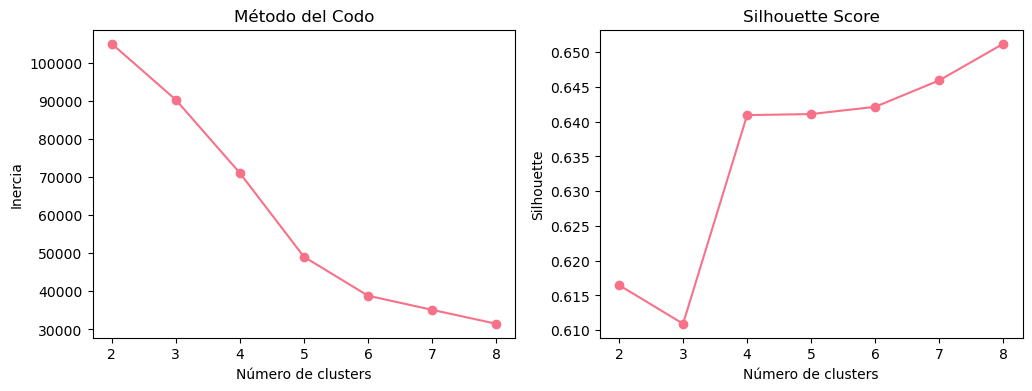

In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kMeans4FileInertias = "results/clustering/Kmeans_k4_inertias.pkl"
kMeans4FileScore = "results/clustering/Kmeans_k4_score.pkl"

Ks = range(2, 9)
inertias = []
scores = []

if os.path.exists(kMeans4FileInertias) and os.path.exists(kMeans4FileScore):
    inertias = joblib.load(kMeans4FileInertias)
    scores = joblib.load(kMeans4FileScore)
else:
    for k in Ks:
        print(f"fitting k={k}")
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X_scaled)
        inertias.append(km.inertia_)
        scores.append(silhouette_score(X_scaled, km.labels_))
        
    os.makedirs("results/clustering", exist_ok=True)
    joblib.dump(inertias, kMeans4FileInertias)
    joblib.dump(scores, kMeans4FileScore)
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(Ks, inertias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")

plt.subplot(1,2,2)
plt.plot(Ks, scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette")
plt.show()

k=4 representa el mejor equilibrio entre cohesión, separación e interpretabilidad.”

In [161]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

X_seg["cluster"] = labels

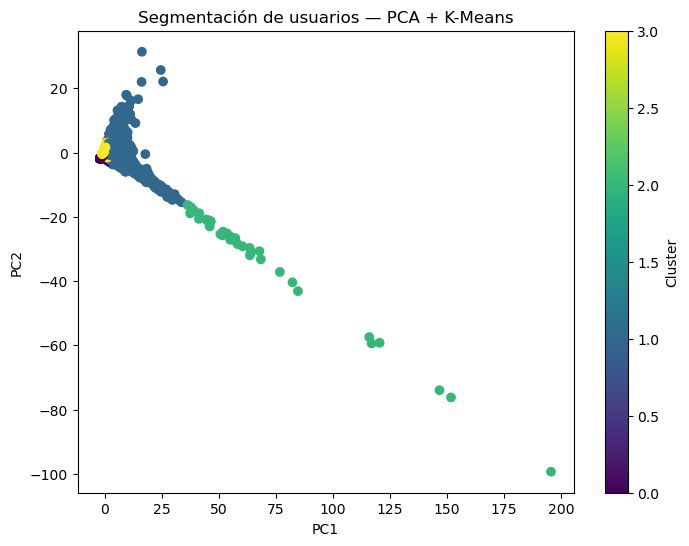

In [162]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], c=labels, cmap="viridis")
plt.title("Segmentación de usuarios — PCA + K-Means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [163]:
cluster_summary = X_seg.groupby("cluster").mean().round(2)
cluster_summary

total_clicks  total_fichas_consultadas  recencia_fichas  \
cluster                                                            
0                2.43                      0.06          2243.18   
1               10.18                      3.15          1097.01   
2              273.32                    149.76           965.92   
3                3.01                      0.01          2298.75   

         engagement_por_email  clicks_por_sesion  total_sesiones  
cluster                                                           
0                        0.00               1.40            1.65  
1                        1.55               2.27            4.44  
2                        1.82               2.10          132.84  
3                        1.53               1.53            1.95

In [164]:
def classify_cluster(row):
    if row["engagement_por_email"] > 1.6 and row["recencia_fichas"] < 1000:
        return "Alta intención"
    if row["total_fichas_consultadas"] > 3 and row["clicks_por_sesion"] > 2:
        return "Explorador indeciso"
    if row["engagement_por_email"] > 1.5 and row["recencia_fichas"] > 2000:
        return "Usuario pasivo"
    return "Baja intención o actividad limitada"

cluster_summary["perfil"] = cluster_summary.apply(classify_cluster, axis=1)
cluster_summary


total_clicks  total_fichas_consultadas  recencia_fichas  \
cluster                                                            
0                2.43                      0.06          2243.18   
1               10.18                      3.15          1097.01   
2              273.32                    149.76           965.92   
3                3.01                      0.01          2298.75   

         engagement_por_email  clicks_por_sesion  total_sesiones  \
cluster                                                            
0                        0.00               1.40            1.65   
1                        1.55               2.27            4.44   
2                        1.82               2.10          132.84   
3                        1.53               1.53            1.95   

                                      perfil  
cluster                                       
0        Baja intención o actividad limitada  
1                        Explorador indeciso  
2                             Alta intención  
3                             Usuario pasivo

In [165]:
# ============================================================
# Tabla final de clusters con % de compra
# ============================================================

# Añadir la etiqueta de cluster al dataset original
df_clustered = df_final_cb_lgbm.copy()
df_clustered["cluster"] = labels

# Resumen numérico por cluster
cluster_summary = (
    df_clustered
    .groupby("cluster")[features]
    .mean()
    .round(2)
)

# Tasa de compra por cluster
conversion = (
    df_clustered
    .groupby("cluster")["es_cliente"]
    .mean()
    .rename("tasa_compra")
)

cluster_summary = cluster_summary.merge(
    conversion,
    left_index=True,
    right_index=True
)

cluster_summary["tasa_compra_pct"] = (cluster_summary["tasa_compra"] * 100).round(2)

# Clasificación semántica del cluster
def classify_cluster(row):
    if row["engagement_por_email"] > 1.6 and row["recencia_fichas"] < 1000:
        return "Usuarios intensivos no compradores"
    if row["total_fichas_consultadas"] > 3 and row["clicks_por_sesion"] > 2:
        return "Usuarios activos con alta propensión a compra"
    if row["engagement_por_email"] > 1.5 and row["recencia_fichas"] > 2000:
        return "Usuarios poco exploradores con baja intencion de compra"
    return "Usuarios de muy baja intención de compra"

cluster_summary["perfil"] = cluster_summary.apply(classify_cluster, axis=1)

# Mostrar tabla final ordenada por tasa de compra
cluster_summary = cluster_summary.sort_values("tasa_compra_pct", ascending=False)

cluster_summary



total_clicks  total_fichas_consultadas  recencia_fichas  \
cluster                                                            
1               10.18                      3.15          1097.01   
3                3.01                      0.01          2298.75   
0                2.43                      0.06          2243.18   
2              273.32                    149.76           965.92   

         engagement_por_email  clicks_por_sesion  total_sesiones  tasa_compra  \
cluster                                                                         
1                        1.55               2.27            4.44     0.029635   
3                        1.53               1.53            1.95     0.004649   
0                        0.00               1.40            1.65     0.003552   
2                        1.82               2.10          132.84     0.000000   

         tasa_compra_pct                                             perfil  
cluster                                                                      
1                   2.96      Usuarios activos con alta propensión a compra  
3                   0.46  Usuarios poco exploradores con baja intencion ...  
0                   0.36           Usuarios de muy baja intención de compra  
2                   0.00                 Usuarios intensivos no compradores

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
<h4 style="font-weight:bold">📌 Conclusión</h4>

<p>
La primera segmentación con K-Means, basada en variables generales de actividad y navegación, revela una estructura débilmente separable desde un punto de vista geométrico y una elevada sensibilidad a valores extremos. No obstante, al incorporar la tasa de compra como criterio interpretativo <em>ex post</em>, los clusters adquieren un significado más claro en términos de propensión relativa a la conversión.
</p>

<p>
En particular, se identifica un grupo de <strong>usuarios activos con alta propensión a compra</strong>, cuya tasa de conversión se sitúa claramente por encima del promedio global del conjunto de datos. En contraste, emergen dos clusters caracterizados por <strong>baja actividad y baja propensión</strong>, con tasas de compra inferiores al 0,5 %, que agrupan usuarios con interacción limitada o esporádica.
</p>

<p>
De forma especialmente relevante, la segmentación detecta un grupo de <strong>usuarios intensivos no compradores</strong>, que concentra niveles extremadamente altos de actividad, exploración y sesiones, pero presenta una tasa de conversión nula. Este patrón sugiere la existencia de perfiles cuyo comportamiento intensivo no responde a una intención de compra clásica. Una hipótesis plausible es que se trate de usuarios con fines informativos, comparativos o profesionales, o bien de perfiles sensibles a fricciones no observadas en los datos disponibles (precio, disponibilidad, condiciones comerciales).
</p>

<p>
Desde una perspectiva aplicada, la identificación de este cluster resulta especialmente valiosa, ya que permite evitar una sobreestimación de la intención basada únicamente en volumen de actividad y abre la puerta a estrategias diferenciadas, como análisis específicos de fricción, segmentación excluyente de campañas o diseño de propuestas de valor adaptadas. Este hallazgo refuerza la idea de que no toda señal intensa es necesariamente una señal estratégica.
</p>

<p>
En conjunto, esta primera segmentación confirma que K-Means captura gradientes de comportamiento útiles, pero también pone de manifiesto sus limitaciones para separar de forma nítida perfiles de intención. Estos resultados justifican el uso de enfoques complementarios que incorporen variables categóricas y ajustes metodológicos, con el objetivo de obtener perfiles más interpretables y mejor alineados con los objetivos de explotación y análisis del modelo.
</p>
</div>


In [166]:
#!pip install gower hdbscan

<h4>Segmentacion con K-Prototypes (numéricas + categóricas)</h4>

In [167]:
df = df_final_cb_lgbm.copy()

# Variables a utilizar
numeric_cols = [
    "total_clicks", "total_fichas_consultadas", "recencia_fichas",
    "engagement_por_email", "clicks_por_sesion", "usuarios_que_consultan_misma_primera_ficha"
]

categorical_cols = ["canal", "tipo_usuario"]

all_cols = numeric_cols + categorical_cols

# Subset del dataset
X = df[all_cols].copy()

# Asegurar tipos correctos
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors="coerce")

for col in categorical_cols:
    X[col] = X[col].astype(str)

# Eliminar filas con nulos
X = X.dropna()

In [168]:
#!pip install kmodes

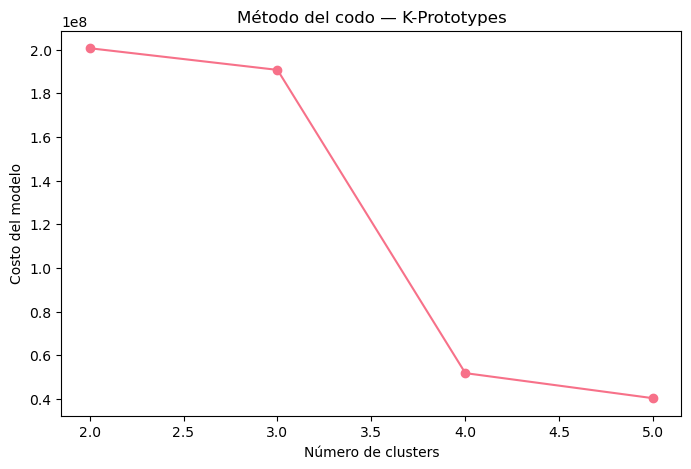

In [169]:
kPrototypesFile = "results/clustering/kprototypes_costs.pkl"
costs = []
K_range = range(2, 9)

if os.path.exists(kPrototypesFile):
    costs = joblib.load(kPrototypesFile)
else:
    # Muestreo razonable
    X_sample = X.sample(30000, random_state=42)

    cat_idx = [X_sample.columns.get_loc(c) for c in categorical_cols]

    for k in K_range:
        print(f"Calculando K-Prototypes para k={k}")
        try:
            kproto = KPrototypes(
                n_clusters=k,
                init='random',      # MÁS ESTABLE para el codo
                random_state=42,
                n_init=2,           # suficiente para exploración
                verbose=0
            )
            kproto.fit_predict(X_sample.values, categorical=cat_idx)
            costs.append(kproto.cost_)
        except ValueError as e:
            print(f"⚠️ k={k} falló: {e}")
            costs.append(np.nan)
    
    os.makedirs("results/clustering", exist_ok=True)
    joblib.dump(costs, kPrototypesFile)

# Gráfica del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, costs, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Costo del modelo")
plt.title("Método del codo — K-Prototypes")
plt.show()


In [170]:
OUTPUT_DIR = "results/clustering"
MODEL_FILE = os.path.join(OUTPUT_DIR, "kprototypes_model.pkl")
CLUSTERS_FILE = os.path.join(OUTPUT_DIR, "kprototypes_clusters.pkl")

k = 4
categorical_idx = [X.columns.get_loc(c) for c in categorical_cols]

# ========================================================
# Crear carpeta si no existe
# ========================================================

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ========================================================
# Entrenar solo si no existe el modelo guardado
# ========================================================

if os.path.exists(MODEL_FILE) and os.path.exists(CLUSTERS_FILE):
    print("Modelo K-Prototypes encontrado. Cargando resultados...")
    kproto = joblib.load(MODEL_FILE)
    clusters = joblib.load(CLUSTERS_FILE)
else:
    print("Entrenando modelo K-Prototypes (esto puede tardar varios minutos)...")

    kproto = KPrototypes(
        n_clusters=k,
        init='Huang',
        random_state=42,
        n_init=3,        # Ajustado por coste computacional
        max_iter=50,
        verbose=1
    )

    clusters = kproto.fit_predict(
        X.values,
        categorical=categorical_idx
    )

    # Guardar resultados
    joblib.dump(kproto, MODEL_FILE)
    joblib.dump(clusters, CLUSTERS_FILE)

    print(f"Modelo guardado en: {MODEL_FILE}")
    print(f"Clusters guardados en: {CLUSTERS_FILE}")

# ========================================================
# Añadir clusters al dataframe
# ========================================================

X["cluster"] = clusters

Modelo K-Prototypes encontrado. Cargando resultados...


In [171]:
desc = X.groupby("cluster")[numeric_cols].mean().round(2)
count = X.groupby("cluster").size().rename("n_usuarios")

summary = pd.concat([desc, count], axis=1)
display(summary)


total_clicks  total_fichas_consultadas  recencia_fichas  \
cluster                                                            
0               10.17                      3.13          1026.56   
1               10.71                      4.69           456.20   
2                9.49                      3.04          1209.80   
3                2.80                      0.00          2306.00   

         engagement_por_email  clicks_por_sesion  \
cluster                                            
0                        1.56               2.20   
1                        1.29               1.47   
2                        1.30               2.21   
3                        0.99               1.49   

         usuarios_que_consultan_misma_primera_ficha  n_usuarios  
cluster                                                          
0                                              6.39       25138  
1                                              7.54        1358  
2                                              6.75       22405  
3                                              8.38      146264

In [172]:
for col in categorical_cols:
    display(X.groupby("cluster")[col].value_counts(normalize=True).rename("proportion"))


cluster  canal      
0        Directorios    0.478757
         SEO            0.297916
         SEM            0.223327
1        Directorios    0.821060
         SEO            0.147275
         SEM            0.031664
2        Directorios    0.514082
         SEO            0.273823
         SEM            0.212096
3        Directorios    0.904775
         SEO            0.075432
         SEM            0.019793
Name: proportion, dtype: float64

cluster  tipo_usuario
0        PF              0.855080
         PJ              0.144920
1        PF              0.787923
         PJ              0.212077
2        PF              0.849185
         PJ              0.150815
3        PF              0.838292
         PJ              0.161708
Name: proportion, dtype: float64

In [173]:
def perfil_cluster(row):
    clicks = row["total_clicks"]
    fichas = row["total_fichas_consultadas"]
    engagement = row["engagement_por_email"]
    sesiones = row["clicks_por_sesion"]
    recencia = row["recencia_fichas"]

    if clicks > 10 and engagement > 1 and recencia < 1000:
        return "Usuarios altamente activos y multicanal"
    if clicks < 5 and fichas == 0 and engagement <1:
        return "Usuarios de baja intención o exploración mínima"
    if engagement > 1.2 and clicks < 5:
        return "Usuarios sensibles al canal email"
    return "Actividad media con exploración moderada"

summary["perfil"] = summary.apply(perfil_cluster, axis=1)
summary


total_clicks  total_fichas_consultadas  recencia_fichas  \
cluster                                                            
0               10.17                      3.13          1026.56   
1               10.71                      4.69           456.20   
2                9.49                      3.04          1209.80   
3                2.80                      0.00          2306.00   

         engagement_por_email  clicks_por_sesion  \
cluster                                            
0                        1.56               2.20   
1                        1.29               1.47   
2                        1.30               2.21   
3                        0.99               1.49   

         usuarios_que_consultan_misma_primera_ficha  n_usuarios  \
cluster                                                           
0                                              6.39       25138   
1                                              7.54        1358   
2                                              6.75       22405   
3                                              8.38      146264   

                                                  perfil  
cluster                                                   
0               Actividad media con exploración moderada  
1                Usuarios altamente activos y multicanal  
2               Actividad media con exploración moderada  
3        Usuarios de baja intención o exploración mínima

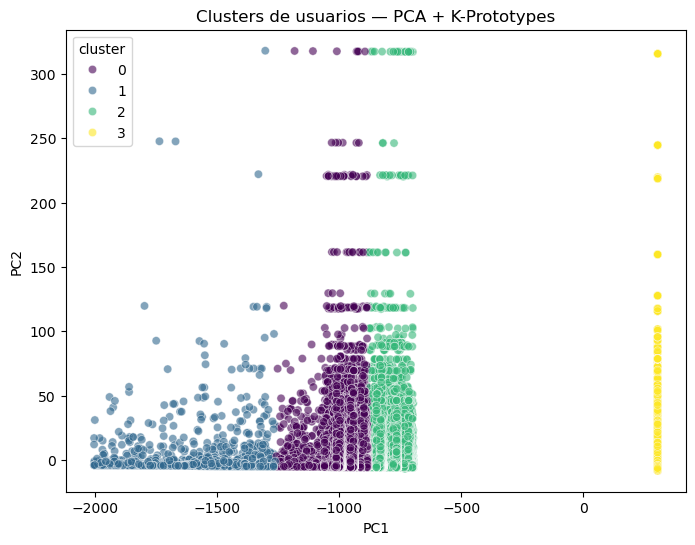

In [174]:
# One-hot para visualización
enc = OneHotEncoder(drop="first", sparse_output=False)
cat_encoded = enc.fit_transform(X[categorical_cols])

X_vis = np.hstack([X[numeric_cols].values, cat_encoded])

# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_vis)

X["PC1"] = pcs[:,0]
X["PC2"] = pcs[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x="PC1", y="PC2", hue="cluster", palette="viridis", alpha=0.6)
plt.title("Clusters de usuarios — PCA + K-Prototypes")
plt.show()


In [175]:
#!pip install umap-learn

Archivos cargados


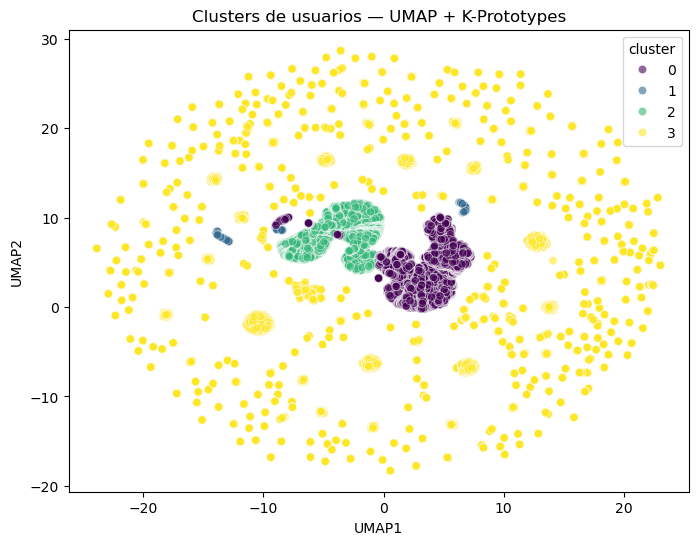

In [176]:
kPrototypesUmapFile = "results/clustering/kprototypes_Umap_emb.pkl"
K_range = range(2, 9)

if os.path.exists(kPrototypesUmapFile):
    umap_emb = joblib.load(kPrototypesUmapFile)
    print("Archivos cargados")
else:
    reducer = umap.UMAP(random_state=42)
    umap_emb = reducer.fit_transform(X_vis)
    joblib.dump(umap_emb, kPrototypesUmapFile)
    
X["UMAP1"] = umap_emb[:,0]
X["UMAP2"] = umap_emb[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x="UMAP1", y="UMAP2", hue="cluster", palette="viridis", alpha=0.6)
plt.title("Clusters de usuarios — UMAP + K-Prototypes")
plt.show()

In [177]:
# ============================================================
# Tabla final de clusters K-Prototypes con tasa de compra
# ============================================================

# Partimos del dataframe original
df_clustered = df_final_cb_lgbm.copy()

# Añadir cluster calculado (alineado con X tras dropna)
df_clustered = df_clustered.loc[X.index].copy()
df_clustered["cluster"] = clusters

# --- Resumen numérico por cluster ---
numeric_summary = (
    df_clustered
    .groupby("cluster")[numeric_cols]
    .mean()
    .round(2)
)

# --- Tamaño del cluster ---
cluster_size = (
    df_clustered
    .groupby("cluster")
    .size()
    .rename("n_usuarios")
)

# --- Tasa de compra ---
conversion = (
    df_clustered
    .groupby("cluster")["es_cliente"]
    .mean()
    .rename("tasa_compra")
)

# --- Unir todo ---
cluster_summary = (
    numeric_summary
    .merge(cluster_size, left_index=True, right_index=True)
    .merge(conversion, left_index=True, right_index=True)
)

cluster_summary["tasa_compra_pct"] = (cluster_summary["tasa_compra"] * 100).round(2)

# --- Perfil semántico (mismo criterio que antes) ---
def perfil_cluster(row):
    clicks = row["total_clicks"]
    fichas = row["total_fichas_consultadas"]
    engagement = row["engagement_por_email"]
    sesiones = row["clicks_por_sesion"]
    recencia = row["recencia_fichas"]

    if clicks > 10 and engagement > 1 and recencia < 1000:
        return "Compradores, intensivos y multicanal"
    if clicks < 5 and fichas == 0 and engagement < 1:
        return "Usuarios pasivos de baja conversión"
    if engagement > 1.2 and clicks < 5:
        return "Usuarios sensibles al canal email"
    return "Usuarios exploradores con intención latente"

cluster_summary["perfil"] = cluster_summary.apply(perfil_cluster, axis=1)

# --- Ordenar por tasa de compra ---
cluster_summary = cluster_summary.sort_values(
    "tasa_compra_pct", ascending=False
)

cluster_summary

total_clicks  total_fichas_consultadas  recencia_fichas  \
cluster                                                            
1               10.71                      4.69           456.20   
2                9.49                      3.04          1209.80   
0               10.17                      3.13          1026.56   
3                2.80                      0.00          2306.00   

         engagement_por_email  clicks_por_sesion  \
cluster                                            
1                        1.29               1.47   
2                        1.30               2.21   
0                        1.56               2.20   
3                        0.99               1.49   

         usuarios_que_consultan_misma_primera_ficha  n_usuarios  tasa_compra  \
cluster                                                                        
1                                              7.54        1358     0.074374   
2                                              6.75       22405     0.029011   
0                                              6.39       25138     0.027846   
3                                              8.38      146264     0.003644   

         tasa_compra_pct                                       perfil  
cluster                                                                
1                   7.44         Compradores, intensivos y multicanal  
2                   2.90  Usuarios exploradores con intención latente  
0                   2.78  Usuarios exploradores con intención latente  
3                   0.36          Usuarios pasivos de baja conversión

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
    <h4 style="font-weight:bold">📌 Conclusión</h4>
    <p>La segmentación mediante K-Prototypes, al incorporar simultáneamente variables numéricas de comportamiento y variables categóricas como <code>canal</code> y <code>tipo_usuario</code>, permite identificar perfiles con diferencias claras en términos de propensión real a la compra. A diferencia del primer intento con K-Means, esta aproximación revela tres clusters cuya tasa de conversión supera ampliamente el promedio global del dataset, lo que confirma la utilidad del enfoque para detectar segmentos de alto valor.</p>
    <p>Destaca especialmente el grupo de <strong>compradores intensivos multicanal</strong>, que presenta una tasa de compra cercana al 7,5 %. Este perfil combina actividad sostenida, recencia favorable y engagement consistente, lo que lo convierte en un segmento prioritario tanto desde el punto de vista predictivo como de negocio.</p>
    <p>Adicionalmente, emergen dos clusters de <strong>usuarios activos con intención latente</strong>, caracterizados por actividad y exploración moderadas pero con tasas de compra cercanas al 3 %, casi tres veces superiores a la media global. Estos perfiles representan oportunidades claras para estrategias de activación, nurturing o personalización, ya que muestran señales suficientes de interés aunque no consolidadas.</p>
    <p>En contraste, el cluster mayoritario agrupa a <strong>usuarios pasivos de muy baja conversión</strong>, con una tasa de compra marginal. Este segmento refuerza la idea de que la mera presencia en el sistema no implica intención, y que las señales categóricas por sí solas no compensan la ausencia de comportamiento relevante.</p>
    <p>En conjunto, estos resultados indican que la inclusión de variables categóricas no transforma radicalmente la estructura del espacio de usuarios, pero sí contribuye a aislar segmentos con valor de negocio significativo. El análisis refuerza la conclusión de que la intención de compra está dominada por patrones de comportamiento, mientras que el canal actúa como un modulador secundario que ayuda a perfilar mejor los segmentos de alta conversión.</p>
</div>

<h4>Segmentación refinada con K-Means</h4>

In [178]:
df = df_final_cb_lgbm.copy()

# Variables a utilizar
numeric_cols = [
    "total_clicks", "total_fichas_consultadas", "recencia_fichas",
    "engagement_por_email", "clicks_por_sesion", "usuarios_que_consultan_misma_primera_ficha"
]

Modelo K-Means encontrado. Cargando resultados...


cluster_k3_round2
0    0.730782
1    0.254477
2    0.014741
Name: proportion, dtype: float64

recencia_fichas  engagement_por_email  clicks_por_sesion  \
cluster_k3_round2                                                             
0                          2303.39                  0.96               1.47   
1                          1128.19                  1.49               2.24   
2                          2178.36                  1.36               1.59   

                   usuarios_que_consultan_misma_primera_ficha  mes_registro  
cluster_k3_round2                                                            
0                                                        5.49          6.51  
1                                                        5.63          6.62  
2                                                      168.66          6.52

cluster_k3_round2  canal      
0                  Directorios    0.902933
                   SEO            0.076720
                   SEM            0.020347
1                  Directorios    0.511930
                   SEO            0.279130
                   SEM            0.208940
2                  Directorios    0.973236
                   SEO            0.018074
                   SEM            0.008690
Name: proportion, dtype: float64

cluster_k3_round2  tipo_usuario
0                  PF              0.837586
                   PJ              0.162414
1                  PF              0.850378
                   PJ              0.149622
2                  PF              0.872437
                   PJ              0.127563
Name: proportion, dtype: float64

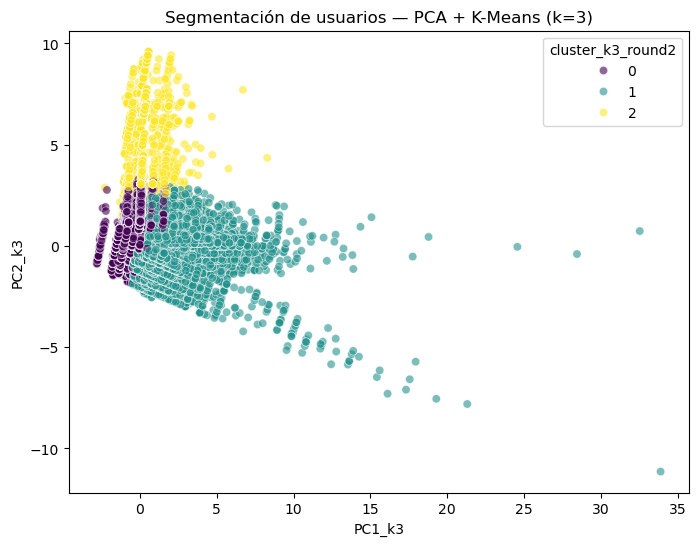

['results/clustering\\kmeans_k3_round2_scaler.pkl']

In [179]:
# ========================================================
# NUEVA RONDA DE SEGMENTACIÓN — k = 3 (SOLO NUMÉRICAS)
# K-MEANS
# ========================================================

import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ========================================================
# 1. Configuración
# ========================================================

OUTPUT_DIR = "results/clustering"
MODEL_FILE = os.path.join(OUTPUT_DIR, "kmeans_k3_round2_model.pkl")
CLUSTERS_FILE = os.path.join(OUTPUT_DIR, "kmeans_k3_round2_clusters.pkl")

os.makedirs(OUTPUT_DIR, exist_ok=True)

numeric_cols_cluster = [
    "recencia_fichas",
    "engagement_por_email",
    "clicks_por_sesion",
    "usuarios_que_consultan_misma_primera_ficha",
    "mes_registro"
]
categorical_cols = ["canal", "tipo_usuario"]
# Subset del dataset
X = df_final_cb_lgbm[numeric_cols_cluster+categorical_cols].copy()

# Asegurar tipos correctos
for col in numeric_cols_cluster:
    X[col] = pd.to_numeric(X[col], errors="coerce")


# Eliminar filas con nulos
X = X.dropna()

# ========================================================
# 2. Preparación de datos
# ========================================================

X_cluster = X[numeric_cols_cluster].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# ========================================================
# 3. Entrenamiento K-Means
# ========================================================

if os.path.exists(MODEL_FILE) and os.path.exists(CLUSTERS_FILE):
    print("Modelo K-Means encontrado. Cargando resultados...")
    kmeans = joblib.load(MODEL_FILE)
    clusters = joblib.load(CLUSTERS_FILE)
else:
    print("Entrenando K-Means (k=3, variables ortogonales)...")

    kmeans = KMeans(
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
    )

    clusters = kmeans.fit_predict(X_scaled)

    joblib.dump(kmeans, MODEL_FILE)
    joblib.dump(clusters, CLUSTERS_FILE)

    print("Modelo y clusters guardados")

# Añadir clusters al dataframe
X["cluster_k3_round2"] = clusters

# ========================================================
# 4. Perfilado de clusters
# ========================================================

display(X["cluster_k3_round2"].value_counts(normalize=True))

cluster_profile = (
    X.groupby("cluster_k3_round2")[numeric_cols_cluster]
     .mean()
     .round(2)
)

display(cluster_profile)

# ========================================================
# 5. Caracterización (NO usada para clustering)
# ========================================================

for col in ["canal", "tipo_usuario"]:
    if col in X.columns:
        display(
            X.groupby("cluster_k3_round2")[col]
             .value_counts(normalize=True)
             .rename("proportion")
        )

# ========================================================
# 6. Visualización PCA
# ========================================================

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)

X["PC1_k3"] = pcs[:, 0]
X["PC2_k3"] = pcs[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X,
    x="PC1_k3",
    y="PC2_k3",
    hue="cluster_k3_round2",
    palette="viridis",
    alpha=0.6
)
plt.title("Segmentación de usuarios — PCA + K-Means (k=3)")
plt.show()

# ========================================================
# 7. Guardar scaler
# ========================================================

joblib.dump(
    scaler,
    os.path.join(OUTPUT_DIR, "kmeans_k3_round2_scaler.pkl")
)


In [180]:
# ============================================================
# Tabla final de clusters — K-Means refinado (k=3) con compra
# ============================================================

# Alinear con el dataset original
df_clustered = df_final_cb_lgbm.loc[X.index].copy()
df_clustered["cluster_k3_round2"] = clusters

# --- Resumen numérico por cluster ---
numeric_summary = (
    df_clustered
    .groupby("cluster_k3_round2")[numeric_cols_cluster]
    .mean()
    .round(2)
)

# --- Tamaño del cluster ---
cluster_size = (
    df_clustered
    .groupby("cluster_k3_round2")
    .size()
    .rename("n_usuarios")
)

# --- Tasa de compra ---
conversion = (
    df_clustered
    .groupby("cluster_k3_round2")["es_cliente"]
    .mean()
    .rename("tasa_compra")
)

# --- Unir todo ---
cluster_summary_k3 = (
    numeric_summary
    .merge(cluster_size, left_index=True, right_index=True)
    .merge(conversion, left_index=True, right_index=True)
)

cluster_summary_k3["tasa_compra_pct"] = (cluster_summary_k3["tasa_compra"] * 100).round(2)

# --- Perfil semántico orientativo ---
def perfil_cluster_k3(row):
    if row["engagement_por_email"] > 1.4 and row["recencia_fichas"] < 1200:
        return "Usuarios activos con intención latente de compra"
    if row["usuarios_que_consultan_misma_primera_ficha"] > 50:
        return "Exploradores intensivos no compradores"
    return "Usuarios pasivos de baja conversión"

cluster_summary_k3["perfil"] = cluster_summary_k3.apply(perfil_cluster_k3, axis=1)

# --- Ordenar por tasa de compra ---
cluster_summary_k3 = cluster_summary_k3.sort_values(
    "tasa_compra_pct", ascending=False
)

cluster_summary_k3


recencia_fichas  engagement_por_email  clicks_por_sesion  \
cluster_k3_round2                                                             
1                          1128.19                  1.49               2.24   
0                          2303.39                  0.96               1.47   
2                          2178.36                  1.36               1.59   

                   usuarios_que_consultan_misma_primera_ficha  mes_registro  \
cluster_k3_round2                                                             
1                                                        5.63          6.62   
0                                                        5.49          6.51   
2                                                      168.66          6.52   

                   n_usuarios  tasa_compra  tasa_compra_pct  \
cluster_k3_round2                                             
1                       49665     0.028068             2.81   
0                      142623     0.004067             0.41   
2                        2877     0.003476             0.35   

                                                             perfil  
cluster_k3_round2                                                    
1                  Usuarios activos con intención latente de compra  
0                               Usuarios pasivos de baja conversión  
2                            Exploradores intensivos no compradores

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
    <h4 style="font-weight:bold">📌 Conclusión</h4>
    <p>
    Al reducir el número de variables y seleccionar únicamente aquellas alineadas con los resultados del análisis <em>SHAP</em>, la segmentación mediante <strong>K-Means con <code>k = 3</code></strong> genera grupos más coherentes desde el punto de vista comportamental y más consistentes con la propensión real a la compra. En comparación con la segmentación inicial, esta aproximación mitiga el efecto de valores extremos y facilita una interpretación más clara de los patrones dominantes.
    </p>
    <p>
    Se identifica un primer grupo de <strong>usuarios activos con intención latente de compra</strong>, que presenta una tasa de conversión cercana al 3&nbsp;%, claramente superior a la media global. Este perfil combina una recencia relativamente favorable, un nivel de engagement moderado y un patrón de navegación equilibrado, lo que lo sitúa como el segmento con mayor potencial dentro de esta segmentación.
    </p>
    <p>
    En contraste, el grupo mayoritario corresponde a <strong>usuarios pasivos con muy baja conversión</strong>, caracterizados por una recencia elevada, bajo engagement y una tasa de compra residual. Este cluster representa el comportamiento base de la población y refuerza la idea de que la ausencia de señales recientes limita de forma estructural la probabilidad de conversión.
    </p>
    <p>
    Finalmente, emerge un grupo reducido pero bien definido de <strong>exploradores intensivos no compradores</strong>, con un volumen de exploración extremadamente alto que no se traduce en compra. Este perfil confirma que la intensidad de uso del catálogo no implica necesariamente intención de compra y pone de manifiesto la existencia de comportamientos predominantemente informativos o comparativos que el modelo es capaz de diferenciar.
    </p>
    <p>
    En conjunto, esta segmentación refinada respalda los perfiles identificados en el análisis <em>SHAP</em> local y refuerza la interpretación de que la intención de compra se distribuye de forma continua, con transiciones claras entre usuarios pasivos, usuarios activos con intención latente y exploradores intensivos. Por este motivo, el clustering se emplea como una herramienta explicativa y contextual, complementaria al modelo predictivo, y no como un mecanismo de segmentación operativa independiente.
    </p>
</div>


<h4> Busqueda de cluteres atípicos</h4>

Distribución de clusters DBSCAN:
dbscan_cluster
-1      269
 0    22209
 1     7426
 2       96
Name: count, dtype: int64

Usuarios marcados como ruido (-1): 269 (0.90%)


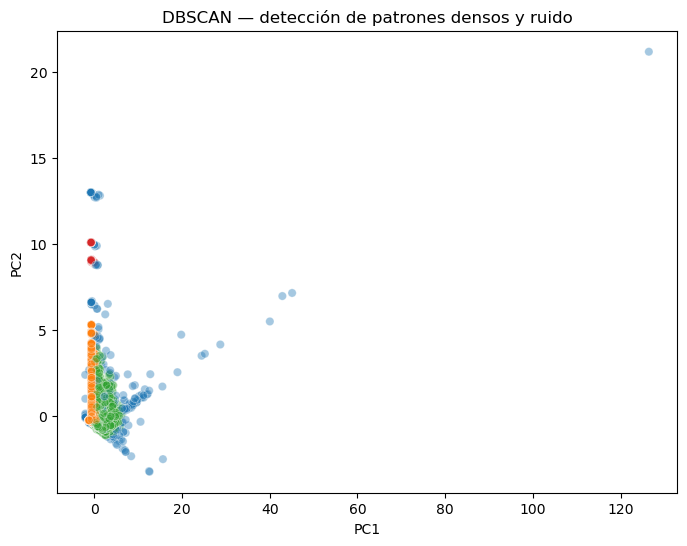

In [181]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# 1. Selección de variables
# =====================================================

dbscan_features = [
    "total_clicks",
    "clicks_por_sesion",
    "usuarios_que_consultan_misma_primera_ficha",
    "recencia_fichas",
    "total_sesiones"
]

X_db = df_final_cb_lgbm[dbscan_features].copy()

# =====================================================
# 2. Submuestreo para velocidad
# =====================================================

X_sample = X_db.sample(n=30000, random_state=42)

# =====================================================
# 3. Escalado
# =====================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# =====================================================
# 4. DBSCAN
# =====================================================

dbscan = DBSCAN(
    eps=1.2,        # empieza aquí; si no detecta ruido, baja a 1.2
    min_samples=50, # grupos suficientemente densos
    n_jobs=-1
)

labels = dbscan.fit_predict(X_scaled)
X_sample["dbscan_cluster"] = labels

# =====================================================
# 5. Resumen rápido
# =====================================================

print("Distribución de clusters DBSCAN:")
print(X_sample["dbscan_cluster"].value_counts().sort_index())

n_noise = (labels == -1).sum()
print(f"\nUsuarios marcados como ruido (-1): {n_noise} ({n_noise/len(labels):.2%})")

# =====================================================
# 6. Visualización rápida (PCA)
# =====================================================

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)

X_sample["PC1"] = pcs[:,0]
X_sample["PC2"] = pcs[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X_sample,
    x="PC1",
    y="PC2",
    hue="dbscan_cluster",
    palette="tab10",
    alpha=0.4,
    legend=False
)
plt.title("DBSCAN — detección de patrones densos y ruido")
plt.show()

In [182]:
# =====================================================
# 7. Tabla resumen DBSCAN con dimensión de compra
# =====================================================

# Añadir variable objetivo al sample (alineando índices)
X_sample = X_sample.join(
    df_final_cb_lgbm.loc[X_sample.index, "es_cliente"]
)

# Resumen numérico por cluster
numeric_summary = (
    X_sample
    .groupby("dbscan_cluster")[dbscan_features]
    .mean()
    .round(2)
)

# Número de usuarios por cluster
counts = (
    X_sample
    .groupby("dbscan_cluster")
    .size()
    .rename("n_usuarios")
)

# Tasa de compra por cluster
purchase_rate = (
    X_sample
    .groupby("dbscan_cluster")["es_cliente"]
    .mean()
    .rename("tasa_compra")
)

# Unir todo
dbscan_summary = pd.concat(
    [numeric_summary, counts, purchase_rate],
    axis=1
)

# Añadir tasa de compra en porcentaje
dbscan_summary["tasa_compra_pct"] = (dbscan_summary["tasa_compra"] * 100).round(2)

# Ordenar para facilitar lectura (ruido al final)
dbscan_summary = dbscan_summary.sort_index()

display(dbscan_summary)


total_clicks  clicks_por_sesion  \
dbscan_cluster                                    
-1                     27.22               2.85   
 0                      2.78               1.49   
 1                      9.42               2.17   
 2                      3.12               1.56   

                usuarios_que_consultan_misma_primera_ficha  recencia_fichas  \
dbscan_cluster                                                                
-1                                                   93.33          1593.64   
 0                                                    6.54          2306.00   
 1                                                    5.82          1095.08   
 2                                                  234.42          2306.00   

                total_sesiones  n_usuarios  tasa_compra  tasa_compra_pct  
dbscan_cluster                                                            
-1                       12.42         269     0.104089            10.41  
 0                        1.81       22209     0.002657             0.27  
 1                        4.17        7426     0.029491             2.95  
 2                        2.01          96     0.000000             0.00

In [183]:
dbscan_summary = dbscan_summary.copy()

def label_dbscan_cluster(row, cluster_id):
    # Ruido (-1): alta conversión inesperada
    if cluster_id == -1:
        return "Usuarios atípicos de alta conversión"

    # Cluster 1: actividad media + buena conversión
    if row["tasa_compra_pct"] > 2:
        return "Usuarios activos con intención de compra"

    # Cluster 2: exploración extrema sin compra
    if row["usuarios_que_consultan_misma_primera_ficha"] > 100:
        return "Exploradores intensivos no compradores"

    # Cluster 0: baja actividad y baja conversión
    return "Usuarios pasivos de muy baja intención"

# Aplicar etiquetas
dbscan_summary["perfil"] = [
    label_dbscan_cluster(row, idx)
    for idx, row in dbscan_summary.iterrows()
]

# Reordenar columnas para claridad
dbscan_summary = dbscan_summary[
    [
        "perfil",
        "n_usuarios",
        "tasa_compra",
        "tasa_compra_pct",
        "total_clicks",
        "clicks_por_sesion",
        "usuarios_que_consultan_misma_primera_ficha",
        "recencia_fichas",
        "total_sesiones",
    ]
]

dbscan_summary

perfil  n_usuarios  \
dbscan_cluster                                                         
-1                  Usuarios atípicos de alta conversión         269   
 0                Usuarios pasivos de muy baja intención       22209   
 1              Usuarios activos con intención de compra        7426   
 2                Exploradores intensivos no compradores          96   

                tasa_compra  tasa_compra_pct  total_clicks  clicks_por_sesion  \
dbscan_cluster                                                                  
-1                 0.104089            10.41         27.22               2.85   
 0                 0.002657             0.27          2.78               1.49   
 1                 0.029491             2.95          9.42               2.17   
 2                 0.000000             0.00          3.12               1.56   

                usuarios_que_consultan_misma_primera_ficha  recencia_fichas  \
dbscan_cluster                                                                
-1                                                   93.33          1593.64   
 0                                                    6.54          2306.00   
 1                                                    5.82          1095.08   
 2                                                  234.42          2306.00   

                total_sesiones  
dbscan_cluster                  
-1                       12.42  
 0                        1.81  
 1                        4.17  
 2                        2.01

<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
    <h4 style="font-weight:bold">📌 Conclusión — DBSCAN</h4>
    <p>
    La aplicación de <strong>DBSCAN</strong> permite explorar la existencia de patrones densos y comportamientos atípicos que no quedan adecuadamente representados mediante técnicas de clustering particional como K-Means o K-Prototypes. Dado su mayor coste computacional, el análisis se realiza sobre una muestra representativa de 30&nbsp;000 usuarios, suficiente para identificar estructuras locales relevantes en el espacio de comportamiento.
    </p>
    <p>
    El resultado más destacado es la detección de un conjunto de <strong>usuarios atípicos con muy alta propensión a la compra</strong>, clasificados como ruido por el algoritmo. Este grupo presenta una tasa de conversión superior al 10&nbsp;%, más de diez veces la media global del dataset, lo que indica que DBSCAN está capturando patrones de altísimo valor desde el punto de vista de negocio. Lejos de representar anomalías irrelevantes, estos usuarios concentran señales de intención extremadamente fuertes que no forman clusters densos tradicionales debido a su baja frecuencia.
    </p>
    <p>
    De forma consistente con los análisis previos, DBSCAN también identifica un grupo de <strong>usuarios activos con intención de compra</strong>, con una tasa cercana al 3&nbsp;%, alineada con los clusters de mayor propensión detectados mediante K-Means y K-Prototypes. Esta convergencia refuerza la robustez y estabilidad de dicho perfil a través de metodologías distintas.
    </p>
    <p>
    Asimismo, el algoritmo vuelve a aislar un patrón ya observado en segmentaciones anteriores: un grupo reducido de <strong>exploradores intensivos no compradores</strong>, caracterizados por una actividad extremadamente elevada que no se traduce en conversión. Este perfil confirma que la intensidad de navegación, por sí sola, no implica intención de compra y valida una de las conclusiones clave del análisis global del modelo.
    </p>
    <p>
    El cluster mayoritario, por su parte, corresponde a <strong>usuarios pasivos con muy baja intención</strong>, con tasas de compra residuales, reforzando la separación estructural entre comportamiento activo y pasivo observada a lo largo de todo el estudio.
    </p>
    <p>
    Aunque DBSCAN se aplica sobre una muestra, su utilidad práctica reside en la capacidad de <em>detectar regiones de alta densidad de conversión y patrones atípicos</em>. En un entorno productivo, este enfoque podría extenderse al conjunto completo de datos mediante asignación aproximada al cluster más cercano o mediante la incorporación de una señal binaria adicional (pertenencia a región densa / ruido) integrada en el modelo predictivo.
    </p>
    <p>
    En conjunto, DBSCAN no se utiliza como herramienta de segmentación operativa, sino como un mecanismo exploratorio que aporta evidencia adicional sobre la naturaleza no lineal, altamente heterogénea y minoritaria de determinados patrones de intención de compra.
    </p>
</div>


<h2>Insight 3 — Robustez, estabilidad y contexto en las señales predictivas del modelo</h2>

<p>
Más allá del ranking de importancia de variables, el análisis conjunto de <strong>importancia</strong> y <strong>estabilidad</strong> permite profundizar en la naturaleza de las señales que el modelo utiliza para predecir la compra. Mientras que la importancia mide la magnitud del efecto de una variable sobre la predicción, la estabilidad evalúa la consistencia de dicho efecto frente a variaciones en la muestra de datos. Esta distinción resulta clave para interpretar la robustez y capacidad de generalización del modelo.
</p>

<p>
El análisis del plano <em>Importancia–Estabilidad</em> revela la existencia de <strong>variables estratégicas</strong>, caracterizadas por una alta relevancia predictiva y un comportamiento consistente entre iteraciones bootstrap. En este grupo destaca <code>engagement_por_email</code>, cuya contribución es elevada en métricas globales como SHAP y CatBoost, y presenta además una estabilidad relativamente alta. Esto sugiere que esta variable captura una relación estructural entre la interacción del usuario y la probabilidad de compra, constituyendo una señal fiable y aplicable a decisiones de negocio de alcance general.
</p>

<p>
En contraste, se identifican <strong>variables de carácter táctico</strong>, como <code>usuarios_que_consultan_misma_primera_ficha</code>, que combinan una alta importancia con una mayor inestabilidad. Estas variables aportan un elevado poder explicativo en determinados patrones de comportamiento, pero su efecto no es homogéneo en toda la población. Su relevancia emerge con especial claridad en análisis locales y segmentados, lo que indica que su utilidad es mayor cuando se interpretan en contexto o en combinación con otras señales.
</p>

<p>
Las variables con importancia y estabilidad moderadas actúan como <strong>señales de soporte</strong>, reforzando la predicción cuando acompañan a variables estratégicas, mientras que aquellas con baja importancia y baja estabilidad presentan una contribución limitada al modelo. Este resultado sugiere que el modelo aprende principalmente a partir de patrones consistentes de interacción y recencia, y no de atributos aislados o puramente estáticos.
</p>

<p>
Finalmente, la identificación de <strong>perfiles atípicos de alta conversión</strong> mediante técnicas como DBSCAN refuerza esta interpretación: el modelo es capaz de capturar señales relevantes incluso en subgrupos minoritarios, siempre que estas se manifiesten de forma consistente en el comportamiento observado. Al mismo tiempo, el análisis pone de manifiesto qué el modelo <em>no aprende</em>: factores exógenos no observables o patrones extremadamente volátiles quedan fuera de su capacidad predictiva.
</p>

<p>
En conjunto, este insight permite interpretar el modelo no solo en términos de qué variables utiliza, sino también de <strong>cómo y en qué contexto</strong> dichas variables aportan valor, aportando una base sólida para la toma de decisiones y la discusión de limitaciones y próximos pasos.
</p>


<div style="
    background-color: #e8f5e9;
    border: 2px solid #c8e6c9;
    border-radius: 10px;
    padding: 20px;
    font-family: Arial, sans-serif;
    color: #2c3e50;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
    <h2 style="font-weight:bold;">📌 Conclusiones del bloque de Insights</h2>
    <ul style="line-height:1.7; padding-left: 20px;">
        <li style="margin-bottom:16px;">
            El análisis conjunto de importancias confirma que el modelo fundamenta sus predicciones principalmente en
            <strong>señales comportamentales de interacción y recencia</strong>. Estas variables concentran el peso
            estructural del razonamiento predictivo, mientras que los atributos categóricos y contextuales actúan como
            información complementaria.
        </li>
        <li style="margin-bottom:16px;">
            La incorporación explícita de la dimensión de <strong>estabilidad</strong> permite diferenciar entre
            <strong>señales estratégicas</strong>, caracterizadas por una contribución consistente y generalizable,
            y <strong>señales tácticas</strong>, cuyo valor predictivo depende del contexto o del perfil de usuario.
            Esta distinción resulta clave para interpretar la robustez real del modelo.
        </li>
        <li style="margin-bottom:16px;">
            El análisis de <strong>SHAP local</strong> evidencia que el modelo no razona de forma uniforme, sino que
            combina las mismas variables con <strong>pesos y direcciones distintas según el patrón individual</strong>.
            De este modo, emergen perfiles explicativos diferenciados de alta intención, exploración mixta y baja intención,
            que reflejan decisiones basadas en configuraciones específicas de señales y no en reglas globales rígidas.
        </li>
        <li style="margin-bottom:16px;">
            La segmentación mediante técnicas de <em>clustering</em> refuerza esta lectura y muestra que la intención de
            compra no se organiza en grupos perfectamente separados, sino en un <strong>espacio continuo de comportamiento</strong>.
            No obstante, al incorporar la dimensión de conversión de forma interpretativa, se identifican
            <strong>clusters con tasas de compra muy superiores a la media</strong>, así como grupos de
            <strong>actividad intensiva sin conversión</strong>.
        </li>
        <li style="margin-bottom:16px;">
            La detección de <strong>subgrupos minoritarios de alta conversión</strong>, especialmente mediante DBSCAN,
            pone de manifiesto que algunos perfiles de alto valor no se concentran en clusters densos, sino que aparecen
            como patrones atípicos pero altamente informativos. De forma complementaria, la identificación consistente
            de segmentos con conversión nula o residual aporta una señal clara sobre zonas de baja rentabilidad estructural.
        </li>
        <li>
            En conjunto, los insights obtenidos muestran que el modelo captura con eficacia los patrones globales asociados
            a la compra, pero que una parte sustancial de su valor interpretativo emerge al analizar
            <strong>cómo se distribuye la conversión entre distintos perfiles de comportamiento</strong>.
            La segmentación no supervisada no replica el razonamiento interno del modelo, pero actúa como una herramienta
            explicativa complementaria que permite contextualizar sus predicciones, identificar oportunidades de alto impacto
            y delimitar segmentos estructuralmente poco propensos a la conversión. Estas conclusiones proporcionan una base
            sólida tanto para la explotación del modelo como para futuras extensiones del sistema.
        </li>
    </ul>
</div>





<h1 id="aplicaciones-de-negocio-del-mo">Aplicaciones de negocio del modelo predictivo</h1>

<p>
El modelo desarrollado no se concibe únicamente como un ejercicio predictivo, sino como una herramienta operativa orientada a la toma de decisiones en un entorno de comercio electrónico. 
La combinación de un alto poder discriminatorio, una gestión flexible de umbrales de probabilidad y un análisis profundo de interpretabilidad permite articular distintas aplicaciones de negocio, adaptadas a objetivos y restricciones operativas concretas, y coherentes con los patrones de comportamiento identificados en los análisis previos.
</p>


<h2>Priorización y focalización de acciones comerciales</h2>

<p>
El rendimiento alcanzado por el modelo —con un <strong>PR AUC de 0.477</strong> y un <strong>Lift cercano a 7.7 en el primer decil</strong>— habilita una priorización eficaz de usuarios con alta probabilidad de compra. 
En términos operativos, esto permite concentrar los esfuerzos comerciales en el subconjunto de usuarios con mayor retorno esperado, reduciendo el coste asociado a acciones indiscriminadas.
</p>

<p>
En particular, la tasa de conversión observada en el primer decil (≈7.8%) multiplica por más de siete la conversión media del conjunto de usuarios, lo que justifica el uso del modelo como sistema de <em>ranking continuo</em> para campañas de activación, remarketing o personalización de ofertas, en lugar de como una decisión binaria rígida.
</p>


<h2>Gestión dinámica de campañas mediante umbrales de probabilidad</h2>

<p>
El análisis de umbrales de probabilidad demuestra que el modelo puede configurarse dinámicamente sin necesidad de reentrenamiento, adaptándose a distintos escenarios de negocio. 
Umbrales bajos permiten maximizar la captación y la cobertura, mientras que umbrales altos priorizan la precisión y minimizan las falsas alarmas.
</p>

<ul>
    <li>
        <strong>Estrategias de alcance amplio:</strong> umbrales orientados a alto <em>recall</em> permiten identificar una gran proporción de compradores potenciales, adecuados para campañas de bajo coste unitario.
    </li>
    <li>
        <strong>Estrategias equilibradas:</strong> el umbral por defecto ofrece un compromiso estable entre captura y eficiencia operativa, adecuado para la mayoría de escenarios recurrentes.
    </li>
    <li>
        <strong>Estrategias restrictivas:</strong> umbrales asociados a alta precisión o F1 máximo permiten actuar únicamente sobre usuarios con probabilidad muy elevada de compra, reduciendo al mínimo el riesgo de impacto innecesario.
    </li>
</ul>
<p>
Esta capacidad de ajuste convierte al modelo en una herramienta flexible que puede reutilizarse en múltiples contextos operativos sin necesidad de reentrenamiento, reduciendo costes y tiempos de adaptación.
</p>


<h2>Explotación de perfiles y segmentación para maximizar el valor</h2>

<p>
Los análisis de interpretabilidad y segmentación revelan que la probabilidad de compra no se distribuye de forma homogénea entre los usuarios, sino que se concentra en perfiles específicos de comportamiento.
La identificación de <strong>clusters con tasas de conversión significativamente superiores a la media</strong> permite refinar las estrategias de activación más allá del ranking individual.
</p>

<p>
De especial interés es la detección de subgrupos minoritarios con comportamientos atípicos pero altamente rentables, identificados mediante técnicas como DBSCAN. 
Estos perfiles, que no encajan en los patrones mayoritarios, concentran tasas de conversión excepcionalmente altas y representan oportunidades claras para acciones específicas de alto impacto.
</p>

<p>
De forma complementaria, la identificación consistente de segmentos con <strong>conversión nula o residual</strong> aporta una señal operativa relevante para excluir o limitar la inversión sobre usuarios estructuralmente poco propensos a la compra, mejorando la eficiencia global del sistema.
</p>
<p>
Cabe destacar que estos grupos se identifican a posteriori, sin utilizar las predicciones del modelo supervisado, y actúan como una capa analítica complementaria para contextualizar y explotar mejor los scores generados.
</p>

<h2>Apoyo a la toma de decisiones estratégicas</h2>

<p>
Más allá de la predicción individual, el conjunto de insights obtenidos permite comprender qué señales aprende el modelo, cuáles son robustas y cuáles dependen del contexto. 
Esta información resulta valiosa para alinear decisiones de negocio, diseño de campañas y priorización de recursos con patrones reales de comportamiento observados en los datos.
</p>

<p>
En conjunto, el sistema propuesto no solo predice quién es más probable que compre, sino que proporciona un marco analítico para decidir <em>a quién</em>, <em>cuándo</em> y <em>con qué intensidad</em> actuar, maximizando el retorno esperado de las acciones comerciales y reduciendo la inversión en segmentos estructuralmente poco rentables.
</p>

<h1 id="limitaciones-y-riesgos-del-enf">Limitaciones y riesgos del enfoque propuesto</h1>

<p>
A pesar de los buenos resultados obtenidos en términos de rendimiento predictivo e interpretabilidad, 
el sistema desarrollado presenta una serie de limitaciones y riesgos que conviene analizar de forma explícita. 
Identificarlos no solo permite contextualizar los resultados, sino que aporta una visión crítica y realista 
sobre el alcance y las condiciones de validez del modelo.
</p>

<h2>Sesgos de datos y cobertura incompleta</h2>

<p>
El modelo se entrena sobre datos históricos de comportamiento de usuarios en un entorno de comercio electrónico. 
Como consecuencia, su capacidad predictiva depende directamente de la calidad, representatividad y cobertura de dichos datos. 
Usuarios con poca interacción, nuevos usuarios o perfiles con comportamientos no observados previamente pueden quedar 
infrarepresentados en el proceso de aprendizaje.
</p>

<p>
Asimismo, ciertas señales relevantes para la decisión de compra —como motivaciones externas, contexto temporal específico 
o factores exógenos— no están recogidas en el dataset, lo que limita la capacidad del modelo para capturar la totalidad 
de los determinantes reales del comportamiento del usuario.
</p>

<h2>Riesgo de sobreajuste y generalización</h2>

<p>
Aunque el uso de validación cruzada, regularización y métricas orientadas a la clase minoritaria mitiga el riesgo de sobreajuste, 
este no puede descartarse completamente. El modelo final, optimizado para maximizar el rendimiento global, 
aprende patrones dominantes presentes en los datos de entrenamiento, lo que puede reducir su capacidad de generalización 
ante cambios en el comportamiento de los usuarios o en las dinámicas del negocio.
</p>

<p>
Este riesgo es especialmente relevante en un entorno dinámico como el comercio electrónico, donde los patrones de navegación, 
los canales de captación y las estrategias comerciales pueden evolucionar con rapidez.
</p>

<h2>Dependencia de señales compuestas y contexto de exposición</h2>

<p>
Una limitación relevante del modelo reside en la interpretación de variables compuestas como 
<code>engagement_por_email</code>. Esta variable combina información sobre la exposición del usuario al canal email 
(a través de la clasificación <code>bondad_email</code>) y su respuesta posterior en forma de clicks. 
Un valor distinto de cero implica que el usuario ha recibido un email clasificado como de alta calidad 
y ha interactuado con él.
</p>

<p>
Por tanto, su elevada importancia no debe interpretarse únicamente como un efecto del número de clicks, 
sino como una señal estructural que distingue usuarios expuestos a comunicaciones relevantes frente a aquellos que no lo están. 
Esto introduce una dependencia implícita del modelo respecto a las estrategias de comunicación existentes, 
lo que puede generar sesgos si dichas estrategias cambian o si el canal email no se aplica de forma homogénea a toda la población.
</p>

<h2>Variables sensibles y consideraciones éticas</h2>

<p>
Aunque el modelo no utiliza variables explícitamente sensibles desde un punto de vista legal o ético, 
sí incorpora señales de comportamiento y canal que podrían correlacionar indirectamente con características del usuario 
no observadas. Es necesario, por tanto, extremar la cautela en el uso operativo del modelo para evitar decisiones 
automatizadas que puedan generar efectos discriminatorios no deseados.
</p>

<p>
El uso del modelo debe entenderse como un sistema de apoyo a la decisión, y no como un mecanismo autónomo 
de exclusión o priorización irreversible de usuarios.
</p>

<h2>Qué no aprende el modelo</h2>

<p>
El análisis de interpretabilidad y segmentación pone de manifiesto que el modelo, optimizado para capturar patrones globales, 
puede infravalorar o diluir la señal asociada a perfiles minoritarios con comportamientos extremos pero altamente efectivos 
en términos de conversión. Estos perfiles, detectados a posteriori mediante técnicas de clustering y DBSCAN, 
no siempre influyen de forma significativa en la función de decisión global del modelo.
</p>

<p>
Este comportamiento es coherente con la optimización de métricas agregadas, pero implica que ciertas oportunidades 
de alto valor pueden no ser plenamente explotadas si se confía exclusivamente en la predicción individual. 
Reconocer esta limitación abre la puerta a estrategias complementarias, como la explotación específica de segmentos 
o la incorporación explícita de información de clustering en futuras versiones del sistema.
</p>

<h2>Riesgos operativos y de uso indebido</h2>

<p>
Finalmente, existe el riesgo de interpretar el modelo como una herramienta de segmentación rígida, 
cuando en realidad su salida debe entenderse como una probabilidad sujeta a incertidumbre. 
Un uso inadecuado de umbrales, o una interpretación excesivamente determinista de las predicciones, 
podría conducir a decisiones subóptimas o a la exclusión sistemática de usuarios potencialmente valiosos.
</p>

<p>
Por este motivo, el modelo debe integrarse dentro de un marco de decisión más amplio, 
combinado con criterio experto, monitorización continua y mecanismos de revisión periódica.
</p>

<h1 id="implementacion-y-escalabilidad">Implementación y escalabilidad del sistema</h1>

<p>
Este apartado describe las consideraciones necesarias para llevar el modelo de predicción de compradores a un entorno operativo real, 
analizando los requisitos técnicos, las estrategias de despliegue, la actualización del modelo y los mecanismos de mantenimiento. 
El objetivo no es proponer una arquitectura cerrada, sino identificar los elementos clave que condicionan la escalabilidad, 
robustez y sostenibilidad del sistema en producción.
</p>

<h2>Requerimientos técnicos y coste computacional</h2>

<p>
El modelo final se basa en un enfoque de <em>stacking</em> que combina LightGBM y CatBoost con un meta-modelo de regresión logística. 
Durante la fase de inferencia, este tipo de arquitectura presenta un coste computacional moderado, compatible con entornos CPU estándar, 
y permite generar predicciones de forma eficiente incluso sobre grandes volúmenes de usuarios.
</p>

<p>
No obstante, el proceso de entrenamiento y optimización ha demostrado ser significativamente más costoso. 
Las fases de selección automática de variables y optimización de hiperparámetros mediante Optuna 
han requerido tiempos de ejecución elevados, en algunos casos entre 10 y 15 horas por ciclo completo. 
Este coste se ve incrementado por el uso de validación cruzada y métricas orientadas a la clase minoritaria.
</p>

<p>
Cabe destacar que el tercer ciclo de optimización no solo no aportó mejoras sustanciales, sino que incluso produjo 
un ligero empeoramiento de algunas métricas. Este resultado pone de manifiesto que, a partir de cierto punto, 
los beneficios marginales de una búsqueda exhaustiva decrecen rápidamente. En un entorno productivo, 
sería recomendable limitar estos procesos o emplear configuraciones más acotadas que ofrezcan 
resultados muy similares con un coste computacional sensiblemente inferior.
</p>

<h2>Estrategia de despliegue</h2>

<p>
El modelo puede desplegarse siguiendo dos estrategias principales, en función de las necesidades del negocio:
</p>

<ul>
  <li>
    <strong>Procesamiento batch:</strong> adecuado para escenarios como campañas de marketing, priorización diaria de usuarios 
    o análisis periódicos. En este caso, el modelo se ejecuta sobre un conjunto de usuarios y genera scores que se integran 
    en sistemas downstream (CRM, herramientas de automatización, etc.).
  </li>
  <li>
    <strong>Predicción online o tiempo real:</strong> viable gracias al bajo coste de inferencia. 
    Esta opción permitiría evaluar la probabilidad de compra durante la navegación del usuario o en eventos clave, 
    siempre que exista una infraestructura adecuada para la extracción de features en tiempo real.
  </li>
</ul>

<p>
En ambos casos, el modelo puede integrarse fácilmente en pipelines existentes mediante APIs o jobs programados, 
dado que su entrada se basa en variables estructuradas y su salida es una probabilidad interpretable.
</p>

<h2>Frecuencia de reentrenamiento y actualización de datos</h2>

<p>
Dado que el comportamiento de los usuarios y las estrategias comerciales evolucionan con el tiempo, 
el modelo requiere un esquema de reentrenamiento periódico para mantener su validez. 
La frecuencia óptima dependerá del ritmo de cambio del negocio, aunque un ciclo mensual o trimestral 
resulta razonable como punto de partida.
</p>

<p>
No es necesario repetir en cada reentrenamiento todo el proceso de optimización exhaustiva. 
Los resultados obtenidos sugieren que una configuración estable de hiperparámetros y variables 
puede mantenerse durante varios ciclos, realizando ajustes puntuales solo cuando se detecten 
caídas significativas de rendimiento o cambios estructurales en los datos.
</p>

<h2>Mantenimiento y monitorización del modelo</h2>

<p>
Para garantizar un uso fiable del sistema, es fundamental implementar mecanismos de monitorización continua. 
Estos deben incluir tanto métricas de rendimiento (precisión, recall, tasa de conversión en producción) 
como indicadores de <em>data drift</em> y <em>concept drift</em>, que alerten de cambios en la distribución de las variables 
o en la relación entre comportamiento y compra.
</p>

<p>
La detección temprana de estos fenómenos permitiría activar procesos de reentrenamiento o revisión 
antes de que el rendimiento del modelo se degrade de forma significativa.
</p>

<h2>Escalabilidad y refactorización del código</h2>

<p>
El desarrollo del proyecto se ha realizado en formato de cuaderno Jupyter, lo que ha facilitado la exploración, 
el análisis iterativo y la documentación del proceso. Sin embargo, esta estructura conduce a un código 
altamente secuencial y poco modular, que no es óptimo para un entorno productivo.
</p>

<p>
De cara a una implementación real, sería recomendable refactorizar el código en módulos reutilizables, 
separando claramente las fases de carga de datos, generación de features, entrenamiento, evaluación e inferencia. 
Esta modularización permitiría mejorar la mantenibilidad, reducir la duplicación de código y facilitar 
la automatización de los flujos de entrenamiento y despliegue.
</p>

<p>
En conjunto, el sistema desarrollado es técnicamente viable y escalable, pero su explotación eficiente 
requiere un equilibrio consciente entre complejidad, coste computacional y beneficio incremental, 
así como una transición controlada desde un entorno exploratorio hacia una arquitectura productiva más robusta.
</p>


<h1 id="extensiones-y-proximos-pasos">Extensiones y próximos pasos</h1>

<p>
El trabajo desarrollado sienta una base sólida tanto a nivel predictivo como analítico. No obstante, existen múltiples líneas de extensión que permitirían ampliar el alcance del sistema, mejorar su rendimiento operativo y reforzar su aplicabilidad en entornos reales de producción. A continuación se describen los principales próximos pasos identificados a partir de los resultados obtenidos.
</p>

<h2>Incorporación de información de segmentación al modelo predictivo</h2>

<p>
Aunque la segmentación de usuarios se ha realizado de forma independiente al modelo supervisado, los resultados muestran que ciertos clusters concentran tasas de conversión muy superiores —o nulas— respecto a la media. Una extensión natural del trabajo consiste en evaluar si esta información aporta valor predictivo adicional.
</p>

<p>
En particular, podrían explorarse las siguientes aproximaciones:
</p>

<ul>
  <li>Incorporar el identificador de cluster como variable categórica adicional en el modelo supervisado.</li>
  <li>Construir variables derivadas de la segmentación (por ejemplo, pertenencia a clusters de alta o nula conversión).</li>
  <li>Evaluar modelos específicos por segmento, entrenados sobre subconjuntos homogéneos de usuarios.</li>
</ul>

<p>
Este enfoque permitiría comprobar si el modelo puede beneficiarse explícitamente de la estructura latente del espacio de usuarios, especialmente en la detección de perfiles minoritarios de alto valor que actualmente emergen solo en análisis a posteriori.
</p>

<h2>Profundización en el análisis de segmentación</h2>

<p>
El análisis de clustering realizado ha demostrado que la intención de compra se distribuye de forma continua y parcialmente solapada. Sin embargo, quedan abiertas varias líneas de profundización:
</p>

<ul>
  <li>Explorar segmentaciones específicas sobre subconjuntos relevantes, como únicamente compradores o usuarios con alta actividad.</li>
  <li>Analizar la estabilidad temporal de los clusters y su evolución a lo largo del tiempo.</li>
  <li>Evaluar la reproducibilidad de los clusters en muestras distintas o ventanas temporales independientes.</li>
</ul>

<p>
Estas extensiones permitirían distinguir entre segmentos estructurales y patrones circunstanciales, reforzando el valor estratégico de la segmentación.
</p>

<h2>Optimización del proceso de entrenamiento y selección de modelos</h2>

<p>
El proceso de optimización llevado a cabo, especialmente mediante Optuna y selección automática de variables, ha demostrado ser computacionalmente costoso, con ejecuciones de varias horas en algunas iteraciones. Los resultados indican que ciclos adicionales de optimización no aportaron mejoras significativas e incluso degradaron el rendimiento.
</p>

<p>
Como próximos pasos, se plantea:
</p>

<ul>
  <li>Reducir el espacio de búsqueda de hiperparámetros basándose en configuraciones ya validadas.</li>
  <li>Aplicar estrategias de optimización temprana (<em>early stopping</em>) más restrictivas.</li>
  <li>Reutilizar configuraciones cercanas al óptimo para nuevos entrenamientos, minimizando el coste computacional.</li>
</ul>

<p>
Estas mejoras permitirían alcanzar rendimientos comparables con un coste operativo sustancialmente menor.
</p>
<h2>Revisión de la estrategia de selección automática de variables</h2>

<p>
El proceso de selección automática de variables implementado mediante <strong>Sequential Floating Forward Selection (SFFS)</strong> permitió explorar combinaciones de características de forma sistemática, evaluando su contribución incremental al rendimiento del modelo. No obstante, esta técnica resultó computacionalmente muy costosa, con tiempos de ejecución elevados, y no produjo mejoras consistentes frente a conjuntos de variables definidos a partir del análisis exploratorio y de interpretabilidad.
</p>

<p>
Como línea de trabajo futura, se plantea <strong>revisar o incluso eliminar el uso de SFFS</strong> en favor de estrategias más eficientes y alineadas con la naturaleza de los modelos empleados. En particular, los resultados sugieren que el valor marginal de la selección exhaustiva de variables es limitado cuando se utilizan algoritmos como LightGBM y CatBoost, que incorporan mecanismos internos de selección y regularización.
</p>

<p>
En su lugar, podrían explorarse alternativas que permitan capturar posibles <em>sinergias entre variables</em> de forma más eficiente, tales como:
</p>

<ul>
  <li>Selección basada en importancias agregadas y estabilidad, priorizando variables estratégicas identificadas en el análisis multicriterio.</li>
  <li>Ingeniería de variables orientada a interacciones explícitas entre señales clave.</li>
  <li>Reducción del espacio de búsqueda mediante filtros previos basados en correlación y redundancia.</li>
</ul>

<p>
Este enfoque permitiría mantener un rendimiento predictivo comparable, reducir significativamente el coste computacional del pipeline y centrar los esfuerzos en transformaciones de mayor valor añadido, especialmente en entornos donde la escalabilidad y el tiempo de entrenamiento son factores críticos.
</p>

<h2>Refactorización y modularización del código</h2>

<p>
Debido a la naturaleza exploratoria del proyecto y a su entrega en formato de cuaderno Jupyter, el código presenta una estructura secuencial y altamente acoplada. Una extensión clave del trabajo consiste en refactorizar el pipeline hacia una arquitectura más modular y mantenible.
</p>

<p>
Entre las mejoras identificadas se incluyen:
</p>

<ul>
  <li>Separar claramente las etapas de preparación de datos, entrenamiento, evaluación e interpretación.</li>
  <li>Encapsular procesos repetitivos en funciones o clases reutilizables.</li>
  <li>Facilitar la generalización del pipeline a nuevos datasets o contextos de negocio.</li>
</ul>

<p>
Esta refactorización no solo mejoraría la calidad del código, sino que facilitaría su integración en sistemas de producción y su mantenimiento a largo plazo.
</p>

<h2>Extensión hacia entornos productivos</h2>

<p>
Finalmente, el sistema podría evolucionar hacia una solución plenamente operativa mediante su integración en pipelines de datos y procesos de negocio existentes. Esto incluye la automatización del scoring periódico, la monitorización del rendimiento y la detección de <em>data drift</em> o cambios en los patrones de comportamiento.
</p>

<p>
Estas extensiones permitirían cerrar el ciclo completo desde la modelización hasta la explotación continua del modelo, maximizando su impacto real en el negocio.
</p>


<h1 id="conclusiones-finales">Conclusiones finales</h1>

<p>
El objetivo principal de este trabajo ha sido el desarrollo de un sistema predictivo capaz de identificar usuarios con alta probabilidad de compra en un entorno de comercio electrónico, prestando especial atención tanto al rendimiento del modelo como a su interpretabilidad y aplicabilidad práctica. A lo largo del proyecto se ha construido un pipeline completo que abarca desde la exploración y preparación de datos hasta la evaluación, optimización e interpretación avanzada del modelo.
</p>

<p>
Desde el punto de vista predictivo, los resultados obtenidos confirman que la combinación de modelos basados en <em>gradient boosting</em> mediante un esquema de <strong>stacking</strong> —integrando LightGBM y CatBoost con una regresión logística como meta-modelo— permite mejorar de forma consistente las métricas clave frente a enfoques individuales. El modelo final alcanza un mayor poder discriminatorio sobre la clase minoritaria, incrementa el <em>lift</em> en los deciles superiores y mejora la tasa de conversión esperada, manteniendo un control adecuado sobre las falsas alarmas. Estos resultados evidencian un alineamiento efectivo entre el rendimiento técnico y los objetivos de negocio.
</p>

<p>
El análisis de umbrales de probabilidad demuestra, además, que el modelo es operativamente versátil. Sin necesidad de reentrenamiento, puede adaptarse a distintos escenarios mediante la simple modificación del umbral de decisión, permitiendo priorizar captación, equilibrio o precisión según el contexto. Esta flexibilidad incrementa de forma significativa el valor práctico del sistema y facilita su integración en entornos reales con necesidades cambiantes.
</p>

<p>
Más allá del rendimiento, uno de los principales aportes del trabajo reside en el bloque de interpretabilidad e insights. El análisis multicriterio de importancia de variables, combinado con métricas de estabilidad, permite distinguir entre <strong>señales estratégicas</strong> —robustas y generalizables— y <strong>señales tácticas</strong>, cuyo valor depende del contexto o del segmento de usuario. Este enfoque supera la visión tradicional basada exclusivamente en rankings de importancia y aporta una comprensión más profunda de cómo y cuándo el modelo utiliza cada variable.
</p>

<p>
El estudio de explicaciones locales mediante SHAP pone de manifiesto que el modelo no aplica un razonamiento homogéneo a todos los usuarios, sino que combina las mismas señales con roles distintos según el patrón individual. A partir de este análisis emergen perfiles explicativos claros —usuarios de alta intención, exploradores mixtos y usuarios de baja intención— que permiten comprender la lógica interna del modelo a nivel individual.
</p>

<p>
La segmentación no supervisada complementa esta visión desde una perspectiva agregada. Aunque la intención de compra no se organiza en clusters perfectamente separados, la incorporación explícita de la dimensión de conversión permite identificar grupos con tasas de compra significativamente superiores a la media, así como segmentos estructuralmente poco propensos a la conversión. Resulta especialmente relevante la detección, mediante DBSCAN, de subgrupos minoritarios con comportamientos atípicos pero tasas de conversión excepcionalmente altas, lo que demuestra que lo aparentemente “atípico” no debe interpretarse necesariamente como ruido, sino como una fuente potencial de alto valor.
</p>

<p>
En conjunto, los resultados muestran que el modelo aprende patrones globales sólidos asociados a la compra, pero que una parte sustancial de su valor emerge al analizar cómo se distribuye la conversión entre distintos perfiles de comportamiento identificados a posteriori. La segmentación no supervisada no replica el razonamiento interno del modelo, pero actúa como una herramienta complementaria para contextualizar sus predicciones, identificar oportunidades de alto impacto y reconocer segmentos de bajo retorno.
</p>

<p>
Desde una perspectiva aplicada, el sistema desarrollado no solo permite priorizar usuarios con mayor probabilidad de compra, sino que proporciona un marco analítico que facilita decisiones informadas sobre a quién impactar, con qué intensidad y en qué contexto. Al mismo tiempo, el análisis explícito de limitaciones, costes computacionales y posibles extensiones deja abierta una vía clara para futuras mejoras, tanto en términos de eficiencia técnica como de generación de valor de negocio.
</p>

<p>
En definitiva, este trabajo demuestra que la combinación de modelos predictivos robustos con técnicas avanzadas de interpretabilidad y análisis exploratorio permite construir sistemas no solo precisos, sino también comprensibles, explotables y alineados con objetivos reales de negocio, sentando una base sólida para su aplicación y evolución en entornos productivos.
</p>



<h1 id="bibliografia">Bibliografia</h1>

Barba Alonso, M. (2022) Modelos predictivos de comportamiento de compra en comercio electrónico. Revista Española de Marketing, 56(3), pp. 112–128.

García, D. and Rodríguez, L. (2024) ‘Modelos híbridos de propensión de compra en mercados emergentes’, Journal of Business Analytics, 7(2), pp. 55–71.

Jiang, Y., Liu, Z. and Zhang, Q. (2024) ‘Sequential modeling for e-commerce user behavior prediction with deep learning architectures’, Expert Systems with Applications, 242, 122694.

Kim, S., Park, D. and Choi, J. (2024) ‘Handling class imbalance in online marketing datasets: A comparative study of adaptive resampling strategies’, Information Sciences, 658, pp. 119973.

Liu, F., Yang, X. and Zhou, P. (2024) ‘Balanced ensemble methods for customer propensity prediction’, Applied Intelligence, 54(6), pp. 4557–4574.

Martínez, L., Brown, T. and Davis, C. (2024) ‘Explainable AI for marketing decision-making: ethics and transparency in machine learning models’, Journal of Data Ethics, 3(1), pp. 22–38.

Pandiyarajan, R., Subramaniam, R. and Kumar, V. (2025) ‘Customer engagement analytics using behavioral features’, International Journal of E-Commerce Research, 19(1), pp. 45–63.

Singh, A., Verma, R. and Kumar, D. (2024) ‘Improved ensemble methods for imbalanced marketing datasets’, International Journal of Computer Applications, 219(4), pp. 37–49.

Wang, L., Chen, H. and Li, T. (2024) ‘User behavior prediction in e-commerce using Transformer-based architectures’, Knowledge-Based Systems, 295, 111635.

Yasnig, P. (2025) ‘Behavioral models for purchase intent prediction in e-commerce’, Data Mining Journal, 33(2), pp. 88–103.

Al-Ebrahim, M.A., Bunian, S. and Nour, A.A. (2024) ‘Recent machine-learning-driven developments in e-commerce: current challenges and future perspectives’, Engineered Science, 28, pp. 1–19.

de Vargas, V.W. (2022) ‘Imbalanced data preprocessing techniques for machine learning’, Journal of Big Data, 9(1), pp. 1–23.

Gkikas, D.C. (2024) ‘Predicting online shopping behavior: using machine learning and Google Analytics to classify user engagement’, Applied Sciences, 14(23), 11403.

Hesvindrati, N. (2025) Behavior-based purchase intent prediction in e-commerce. International Journal of Computer Science and Research Review, 6(4), pp. 45–58.

Zamora Pérez, A.L. (2025) ‘Predicción de la intención de compra en el comercio electrónico: caso de éxito’, Revista Internacional de Investigación y Desarrollo Global, 4(3), pp. 1–14.

Akiba, T., Sano, S., Yanase, T., Ohta, T. & Koyama, M. (2019). Optuna: A Next-generation Hyperparameter Optimization Framework. Proceedings of the 25th ACM SIGKDD Conference, pp. 2623–2631.

Lundberg, S.M. and Lee, S.-I. (2017) ‘A unified approach to interpreting model predictions’, Advances in Neural Information Processing Systems, 30, pp. 4765–4774.